In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(rc = {'figure.figsize': (16,8)})
import os 
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import Pipeline

from sklearn.feature_selection import RFECV

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from tqdm.notebook import tqdm
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
#回归模型模块
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


#分类模型模块
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC, LinearSVC

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Exploratory Data Analysis

In [2]:
alldata = pd.read_csv('hotel_bookings.csv')
alldata.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [3]:
label = pd.DataFrame(alldata['is_canceled'])
#drop is_canceld col because it is our y label
train= alldata.drop(columns = ['is_canceled'])
train

hotel  lead_time  arrival_date_year arrival_date_month  \
0       Resort Hotel        342               2015               July   
1       Resort Hotel        737               2015               July   
2       Resort Hotel          7               2015               July   
3       Resort Hotel         13               2015               July   
4       Resort Hotel         14               2015               July   
...              ...        ...                ...                ...   
119385    City Hotel         23               2017             August   
119386    City Hotel        102               2017             August   
119387    City Hotel         34               2017             August   
119388    City Hotel        109               2017             August   
119389    City Hotel        205               2017             August   

        arrival_date_week_number  arrival_date_day_of_month  \
0                             27                          1   
1                             27                          1   
2                             27                          1   
3                             27                          1   
4                             27                          1   
...                          ...                        ...   
119385                        35                         30   
119386                        35                         31   
119387                        35                         31   
119388                        35                         31   
119389                        35                         29   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                             0                     0       2       0.0  ...   
1                             0                     0       2       0.0  ...   
2                             0                     1       1       0.0  ...   
3                             0                     1       1       0.0  ...   
4                             0                     2       2       0.0  ...   
...                         ...                   ...     ...       ...  ...   
119385                        2                     5       2       0.0  ...   
119386                        2                     5       3       0.0  ...   
119387                        2                     5       2       0.0  ...   
119388                        2                     5       2       0.0  ...   
119389                        2                     7       2       0.0  ...   

        deposit_type  agent company days_in_waiting_list customer_type  \
0         No Deposit    NaN     NaN                    0     Transient   
1         No Deposit    NaN     NaN                    0     Transient   
2         No Deposit    NaN     NaN                    0     Transient   
3         No Deposit  304.0     NaN                    0     Transient   
4         No Deposit  240.0     NaN                    0     Transient   
...              ...    ...     ...                  ...           ...   
119385    No Deposit  394.0     NaN                    0     Transient   
119386    No Deposit    9.0     NaN                    0     Transient   
119387    No Deposit    9.0     NaN                    0     Transient   
119388    No Deposit   89.0     NaN                    0     Transient   
119389    No Deposit    9.0     NaN                    0     Transient   

           adr  required_car_parking_spaces  total_of_special_requests  \
0         0.00                            0                          0   
1         0.00                            0                          0   
2        75.00                            0                          0   
3        75.00                            0                          0   
4        98.00                            0                          1   
...        ...                          ...                        ...   
119385   96.1

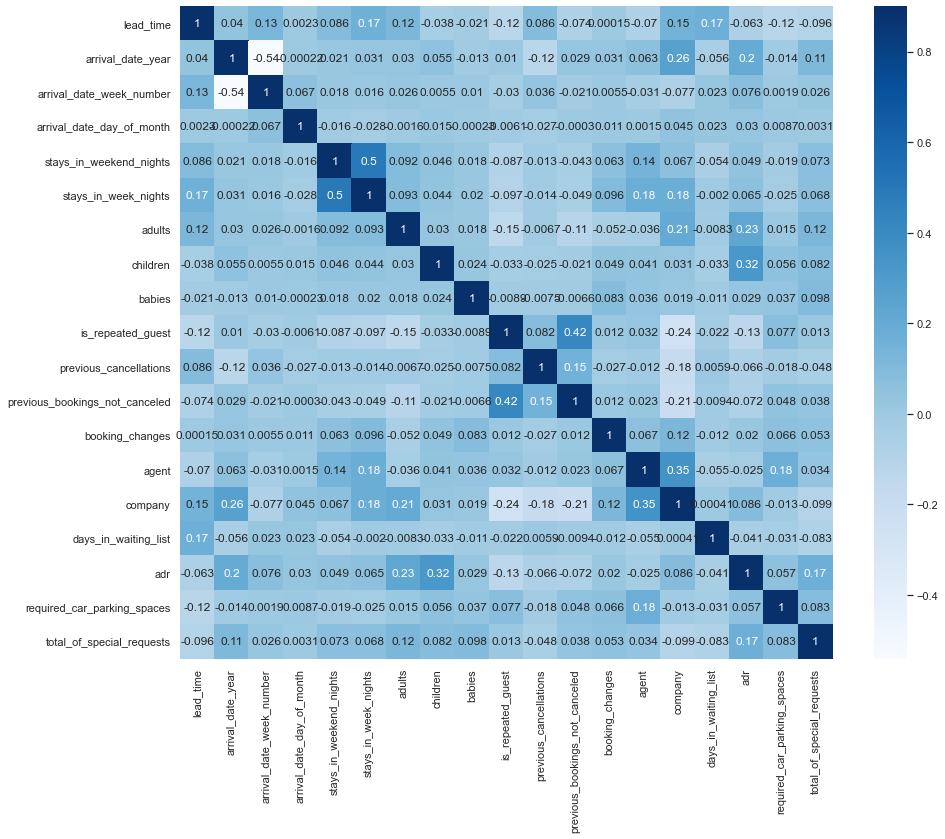

In [4]:
corr = train.corr()
plt.subplots(figsize = (15,12))
sns.heatmap(corr, vmax = 0.9, cmap = 'Blues', square = True, annot = True)

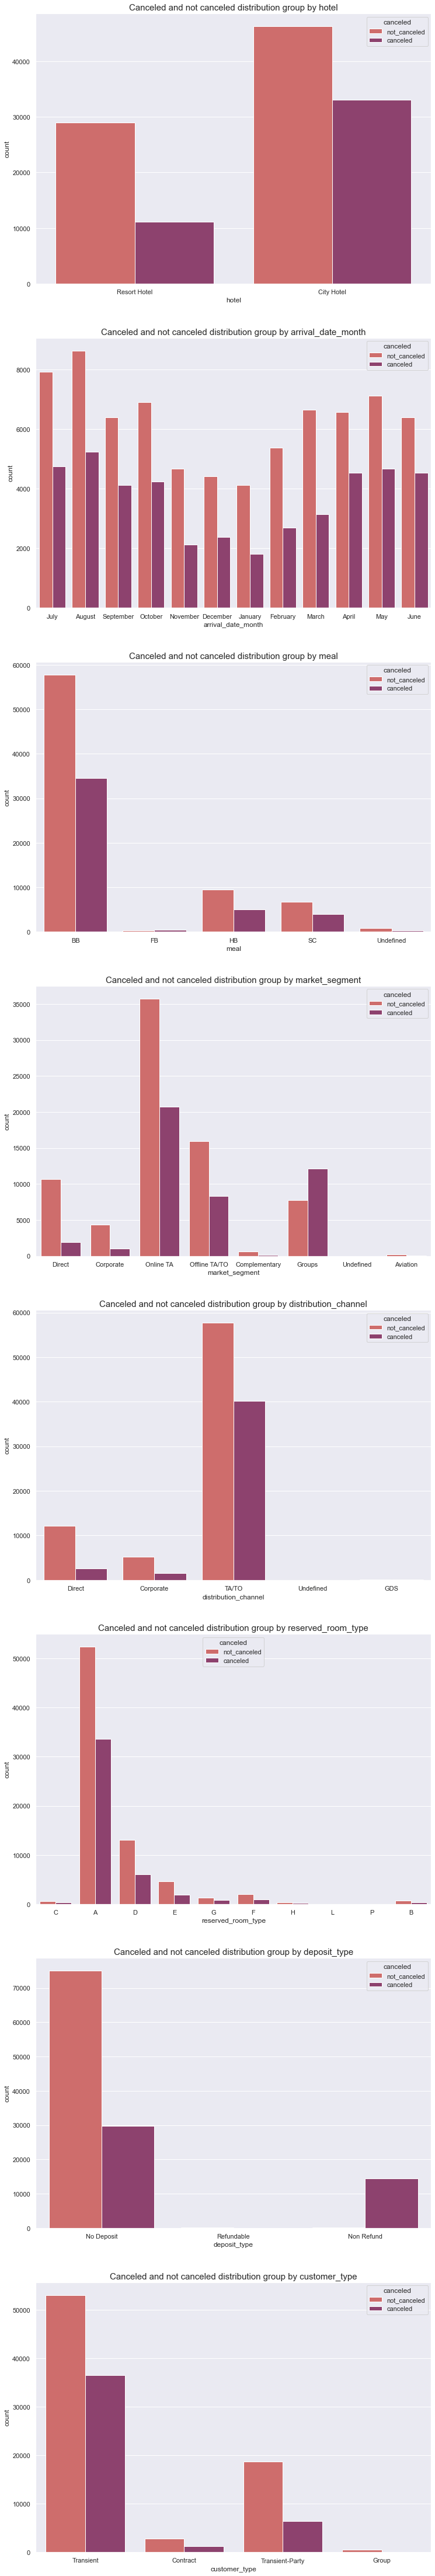

In [5]:
draw_col = ['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type',
 'deposit_type', 'customer_type']
alldata['canceled'] = alldata['is_canceled'].apply(lambda x: 'canceled' if x ==1 else 'not_canceled')

fig, axs = plt.subplots(nrows = 8, ncols = 1, figsize = (8, 80))
plt.subplots_adjust(right = 1.3)

for i, feature in enumerate(draw_col):
    sns.countplot(x = feature, hue = 'canceled', data = alldata, palette = "flare", ax = axs[i])
    axs[i].set_title(f'Canceled and not canceled distribution group by {feature}', fontsize = 15)

In [6]:
#check for missing value
print(train.isnull().sum())
print('The customers are from {} agents'.format(train['agent'].nunique()))
print('The customers are from {} companies'.format(train['company'].nunique()))

hotel                                  0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_

In [7]:
#check for the correlation 
a = alldata.corr()['is_canceled'].abs().sort_values(ascending = False)
a

is_canceled                       1.000000
lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
agent                             0.083114
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
company                           0.020642
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005048
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

In [8]:
# if the col is not in the list of correlation it means that it's useless, therefore, we drop it
use_list = [x for x in a.index]
all_col = [x for x in alldata.columns]
uselesscol = list(set(all_col) - set(use_list))
uselesscol

['canceled',
 'deposit_type',
 'distribution_channel',
 'reservation_status',
 'assigned_room_type',
 'reserved_room_type',
 'country',
 'customer_type',
 'hotel',
 'arrival_date_month',
 'market_segment',
 'reservation_status_date',
 'meal']

In [9]:
uselesscol = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']
train = train.drop(columns = uselesscol)

In [10]:
#our new train data
train.head(5)

hotel  lead_time arrival_date_month  arrival_date_week_number  \
0  Resort Hotel        342               July                        27   
1  Resort Hotel        737               July                        27   
2  Resort Hotel          7               July                        27   
3  Resort Hotel         13               July                        27   
4  Resort Hotel         14               July                        27   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                     0   
1                          1                        0                     0   
2                          1                        0                     1   
3                          1                        0                     1   
4                          1                        0                     2   

   adults  children  babies  ... previous_bookings_not_canceled  \
0       2       0.0       0  ...                              0   
1       2       0.0       0  ...                              0   
2       1       0.0       0  ...                              0   
3       1       0.0       0  ...                              0   
4       2       0.0       0  ...                              0   

  reserved_room_type deposit_type  agent  company  customer_type   adr  \
0                  C   No Deposit    NaN      NaN      Transient   0.0   
1                  C   No Deposit    NaN      NaN      Transient   0.0   
2                  A   No Deposit    NaN      NaN      Transient  75.0   
3                  A   No Deposit  304.0      NaN      Transient  75.0   
4                  A   No Deposit  240.0      NaN      Transient  98.0   

  required_car_parking_spaces  total_of_special_requests  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          1   

   reservation_status_date  
0               2015-07-01  
1               2015-07-01  
2               2015-07-02  
3               2015-07-02  
4               2015-07-03  

[5 rows x 25 columns]

In [11]:
#we need to fill the value of agent 
train.isnull().sum()

hotel                                  0
lead_time                              0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
deposit_type                           0
agent                              16340
company                           112593
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_stat

In [12]:
#company has too many missing value therefore we simply drop it
train = train.drop(columns = 'company')
train['agent'] = train['agent'].fillna(value = round(train['agent'].mean(), 0))
train['children'] = train['children'].fillna(value = round(train['children'].mean(), 0))

In [13]:
#all missing values are gone!
train.isnull().sum()

hotel                             0
lead_time                         0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
deposit_type                      0
agent                             0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status_date           0
dtype: int64

In [14]:
cols = numeric
is_canceled = alldata['is_canceled'] == 1

fig, axs = plt.subplots(nrows = 15, ncols = 1, figsize = (10, 160))
plt.subplots_adjust(right = 1.3)

for i, feature in enumerate(cols):
    #~is_canceled => not canceled 
    sns.distplot(train[~is_canceled][feature], label='Not Canceled', hist=True, color='red', ax=axs[i])
    sns.distplot(train[is_canceled][feature], label = 'Is Canceled', hist = True, color = 'cornflowerblue', ax = axs[i])
    axs[i].legend(loc = 'upper right', prop={'size':20})
    axs[i].set_xlabel('')
    axs[i].set_title('Distribution of {} Feature'.format(feature), size=20, y=1.05)

NameError: name 'numeric' is not defined

# Data Enginerring

In [ ]:
#normalize the data

In [16]:
normalize_col = ['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'agent', 'adr']

In [17]:
for i in normalize_col:
    print(f'The skew is {train[i].skew()}')
    print(f'The kurtosis is {train[i].kurt()}')
    print('\n')

The skew is 1.3465498727254268
The kurtosis is 1.6964488485585467


The skew is -0.010014326041540811
The kurtosis is -0.9860771763295451


The skew is -0.0020004539786149557
The kurtosis is -1.1871683187282633


The skew is 1.1713502089137036
The kurtosis is 0.46545736299603035


The skew is 10.53021398218952
The kurtosis is 1013.1898508588167




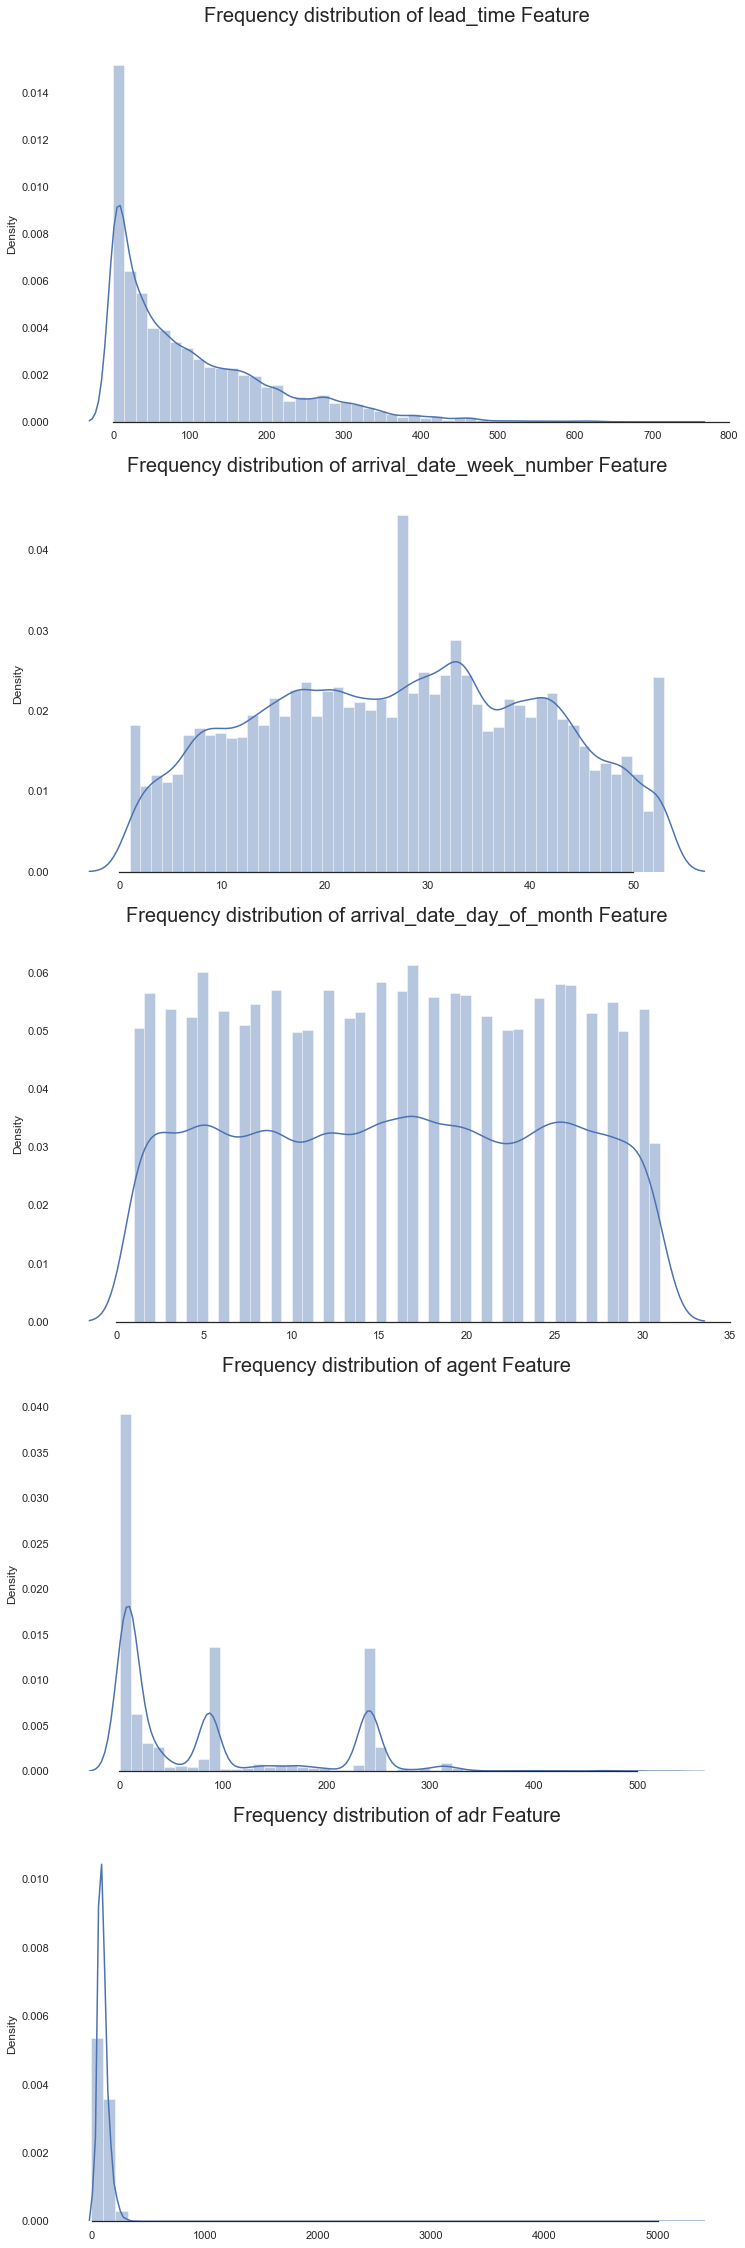

In [18]:
#before normalize
sns.set_style("white")
sns.set_color_codes(palette='deep')
fig, axs = plt.subplots(nrows = 5, ncols = 1, figsize = (8, 40))
plt.subplots_adjust(right = 1.3)

for i, feature in enumerate(normalize_col):
    #~is_canceled => not canceled 
    sns.distplot(train[feature], color="b", ax = axs[i]);
    axs[i].set_xlabel('')
    axs[i].set_title('Frequency distribution of {} Feature'.format(feature), size=20, y=1.05)

sns.despine(trim=True, left=True)
plt.show()

In [19]:
train['lead_time'] = np.log1p(train['lead_time'])
train['arrival_date_week_number'] = np.log1p(train['arrival_date_week_number'])
train['arrival_date_day_of_month'] = np.log1p(train['arrival_date_day_of_month'])
train['agent'] = np.log1p(train['agent'])
train['adr'] = np.log1p(train['adr'])

In [20]:
for i in normalize_col:
    print(f'The skew after normalization is {train[i].skew()}')
    print(f'The kurtosis after normalization is {train[i].kurt()}')
    print('\n')

The skew after normalization is -0.8737477184147513
The kurtosis after normalization is -0.0809160369311166


The skew after normalization is -1.2896955868678488
The kurtosis after normalization is 1.5970370442875432


The skew after normalization is -0.9943367577392241
The kurtosis after normalization is 0.195452384755602


The skew after normalization is -0.023121055456213645
The kurtosis after normalization is -1.2644173472851132


The skew after normalization is -3.74052317260321
The kurtosis after normalization is 20.42954393887599




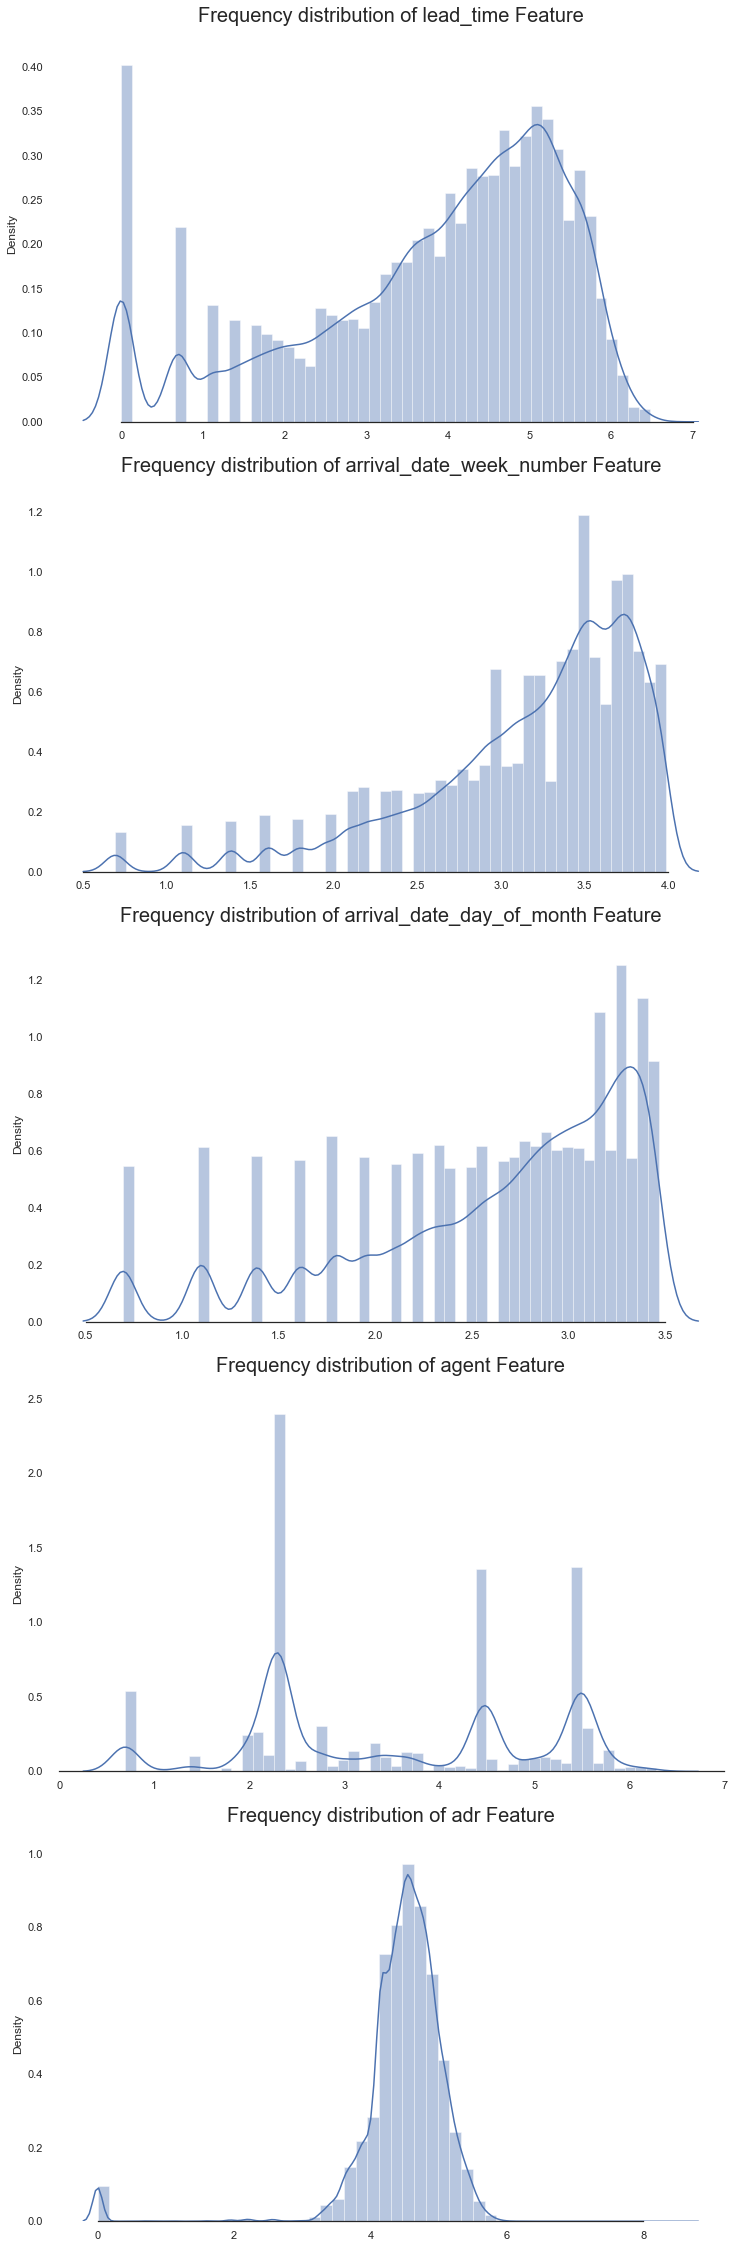

In [21]:
#after normalize
sns.set_style("white")
sns.set_color_codes(palette='deep')
fig, axs = plt.subplots(nrows = 5, ncols = 1, figsize = (8, 40))
plt.subplots_adjust(right = 1.3)

for i, feature in enumerate(normalize_col):
    #~is_canceled => not canceled 
    sns.distplot(train[feature], color="b", ax = axs[i]);
    axs[i].set_xlabel('')
    axs[i].set_title('Frequency distribution of {} Feature'.format(feature), size=20, y=1.05)

sns.despine(trim=True, left=True)
plt.show()

In [22]:
train['reservation_status_date'] = pd.to_datetime(train['reservation_status_date'])

train['year'] = train['reservation_status_date'].dt.year
train['month'] = train['reservation_status_date'].dt.month
train['day'] = train['reservation_status_date'].dt.day

In [23]:
#we see big improvement now we can proceed 
#now transfer all categorical_col to dummy variable
categorical_col = ['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type',
 'deposit_type', 'customer_type', 'reservation_status_date']
train['hotel'] = train['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

train['meal'] = train['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

train['market_segment'] = train['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

train['distribution_channel'] = train['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

train['reserved_room_type'] = train['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

train['deposit_type'] = train['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

train['customer_type'] = train['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

train['year'] = train['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})


In [24]:
train['reserved_room_type'] = train['reserved_room_type'].fillna(round(train['reserved_room_type'].mean(), 0))
train['adr'] = train['adr'].fillna(round(train['adr'].mean(), 0))

In [25]:
train.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

In [26]:
#we use stratifiedkfold for this case, it gave same proportion of label for both train and test set
skf = StratifiedKFold(n_splits = 8, random_state = 20, shuffle = True)
togetherY = label
for train_index, test_index in skf.split(train, togetherY):
    X_train, X_test = train.iloc[train_index], train.iloc[test_index]
    y_train, y_test = togetherY.iloc[train_index], togetherY.iloc[test_index]
    

In [27]:
baseline_alg = [RandomForestClassifier(), AdaBoostClassifier(), XGBClassifier(), CatBoostClassifier(), LGBMClassifier()]

In [93]:
def Baseline_recall_score(X, y, X2, y2):
    #Algorithm models
    MLA = [AdaBoostClassifier(),ExtraTreesClassifier(), GradientBoostingClassifier(),RandomForestClassifier(), 
          XGBClassifier(), CatBoostClassifier(), LGBMClassifier(), LogisticRegressionCV()]
    #result list
    MLA_compare={}
    #Confirm Random number to assure the iterativeness of the results
    for alg in tqdm(MLA):
        alg.random_state = 22
        MLA_name = alg.__class__.__name__
        alg.fit(X, y)
        predictions = alg.predict(X2)
        recalls = recall_score(predictions, y2)
        MLA_compare[MLA_name] = recalls
    scores = pd.Series(MLA_compare)
    
    return scores.sort_values(ascending = False)

  0%|          | 0/8 [00:00<?, ?it/s]

[20:56:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.074996
0:	learn: 0.6391726	total: 14.4ms	remaining: 14.4s
1:	learn: 0.5898458	total: 27.4ms	remaining: 13.7s
2:	learn: 0.5525664	total: 38.7ms	remaining: 12.9s
3:	learn: 0.5297577	total: 48.6ms	remaining: 12.1s
4:	learn: 0.5079836	total: 58.9ms	remaining: 11.7s
5:	learn: 0.4887137	total: 68.6ms	remaining: 11.4s
6:	learn: 0.4742556	total: 78.4ms	remaining: 11.1s
7:	learn: 0.4568601	total: 89.5ms	remaining: 11.1s
8:	learn: 0.4461577	total: 99.9ms	remaining: 11s
9:	learn: 0.4282714	total: 110ms	remaining: 10.9s
10:	learn: 0.4205927	total: 121ms	remaining: 10.8s
11:	learn: 0.4141089	total: 131ms	remaining: 10.8s
12:	learn: 0.4031021	total: 141ms	remaining: 10.7s


155:	learn: 0.0928950	total: 1.78s	remaining: 9.61s
156:	learn: 0.0921590	total: 1.79s	remaining: 9.61s
157:	learn: 0.0920588	total: 1.8s	remaining: 9.6s
158:	learn: 0.0909173	total: 1.81s	remaining: 9.6s
159:	learn: 0.0907651	total: 1.83s	remaining: 9.6s
160:	learn: 0.0904498	total: 1.84s	remaining: 9.59s
161:	learn: 0.0902094	total: 1.85s	remaining: 9.59s
162:	learn: 0.0893294	total: 1.87s	remaining: 9.59s
163:	learn: 0.0890200	total: 1.88s	remaining: 9.58s
164:	learn: 0.0883187	total: 1.9s	remaining: 9.59s
165:	learn: 0.0877794	total: 1.91s	remaining: 9.59s
166:	learn: 0.0874025	total: 1.92s	remaining: 9.59s
167:	learn: 0.0869681	total: 1.94s	remaining: 9.59s
168:	learn: 0.0868661	total: 1.95s	remaining: 9.59s
169:	learn: 0.0864363	total: 1.96s	remaining: 9.59s
170:	learn: 0.0860538	total: 1.98s	remaining: 9.59s
171:	learn: 0.0853751	total: 1.99s	remaining: 9.59s
172:	learn: 0.0849856	total: 2s	remaining: 9.59s
173:	learn: 0.0848900	total: 2.02s	remaining: 9.58s
174:	learn: 0.084744

315:	learn: 0.0496734	total: 3.92s	remaining: 8.48s
316:	learn: 0.0495915	total: 3.93s	remaining: 8.46s
317:	learn: 0.0494694	total: 3.94s	remaining: 8.45s
318:	learn: 0.0491955	total: 3.96s	remaining: 8.44s
319:	learn: 0.0489950	total: 3.97s	remaining: 8.43s
320:	learn: 0.0487689	total: 3.98s	remaining: 8.42s
321:	learn: 0.0484926	total: 4s	remaining: 8.42s
322:	learn: 0.0482450	total: 4.01s	remaining: 8.41s
323:	learn: 0.0480878	total: 4.03s	remaining: 8.4s
324:	learn: 0.0479879	total: 4.04s	remaining: 8.39s
325:	learn: 0.0477303	total: 4.05s	remaining: 8.38s
326:	learn: 0.0476545	total: 4.07s	remaining: 8.37s
327:	learn: 0.0474031	total: 4.08s	remaining: 8.36s
328:	learn: 0.0472228	total: 4.09s	remaining: 8.35s
329:	learn: 0.0470861	total: 4.11s	remaining: 8.35s
330:	learn: 0.0469979	total: 4.12s	remaining: 8.34s
331:	learn: 0.0468981	total: 4.14s	remaining: 8.33s
332:	learn: 0.0466187	total: 4.15s	remaining: 8.32s
333:	learn: 0.0465633	total: 4.17s	remaining: 8.31s
334:	learn: 0.04

483:	learn: 0.0283823	total: 5.88s	remaining: 6.27s
484:	learn: 0.0282978	total: 5.89s	remaining: 6.26s
485:	learn: 0.0281735	total: 5.91s	remaining: 6.25s
486:	learn: 0.0280144	total: 5.92s	remaining: 6.24s
487:	learn: 0.0278690	total: 5.93s	remaining: 6.23s
488:	learn: 0.0277304	total: 5.95s	remaining: 6.21s
489:	learn: 0.0276936	total: 5.96s	remaining: 6.2s
490:	learn: 0.0276335	total: 5.97s	remaining: 6.19s
491:	learn: 0.0275978	total: 5.98s	remaining: 6.18s
492:	learn: 0.0275814	total: 5.99s	remaining: 6.16s
493:	learn: 0.0274737	total: 6.01s	remaining: 6.15s
494:	learn: 0.0274109	total: 6.02s	remaining: 6.14s
495:	learn: 0.0273946	total: 6.03s	remaining: 6.13s
496:	learn: 0.0272633	total: 6.04s	remaining: 6.11s
497:	learn: 0.0271554	total: 6.05s	remaining: 6.1s
498:	learn: 0.0271452	total: 6.07s	remaining: 6.09s
499:	learn: 0.0271113	total: 6.08s	remaining: 6.08s
500:	learn: 0.0270787	total: 6.09s	remaining: 6.07s
501:	learn: 0.0269740	total: 6.1s	remaining: 6.05s
502:	learn: 0.0

654:	learn: 0.0167997	total: 7.81s	remaining: 4.12s
655:	learn: 0.0167784	total: 7.83s	remaining: 4.11s
656:	learn: 0.0166969	total: 7.84s	remaining: 4.09s
657:	learn: 0.0166842	total: 7.86s	remaining: 4.08s
658:	learn: 0.0166324	total: 7.87s	remaining: 4.07s
659:	learn: 0.0165819	total: 7.88s	remaining: 4.06s
660:	learn: 0.0165520	total: 7.89s	remaining: 4.05s
661:	learn: 0.0165240	total: 7.91s	remaining: 4.04s
662:	learn: 0.0164653	total: 7.92s	remaining: 4.02s
663:	learn: 0.0164512	total: 7.93s	remaining: 4.01s
664:	learn: 0.0164034	total: 7.94s	remaining: 4s
665:	learn: 0.0163815	total: 7.95s	remaining: 3.99s
666:	learn: 0.0163566	total: 7.96s	remaining: 3.97s
667:	learn: 0.0163454	total: 7.97s	remaining: 3.96s
668:	learn: 0.0162851	total: 7.98s	remaining: 3.95s
669:	learn: 0.0162052	total: 7.99s	remaining: 3.94s
670:	learn: 0.0161381	total: 8.01s	remaining: 3.92s
671:	learn: 0.0160811	total: 8.02s	remaining: 3.91s
672:	learn: 0.0160083	total: 8.03s	remaining: 3.9s
673:	learn: 0.01

819:	learn: 0.0108423	total: 9.76s	remaining: 2.14s
820:	learn: 0.0108367	total: 9.78s	remaining: 2.13s
821:	learn: 0.0108280	total: 9.79s	remaining: 2.12s
822:	learn: 0.0108179	total: 9.8s	remaining: 2.11s
823:	learn: 0.0107768	total: 9.81s	remaining: 2.1s
824:	learn: 0.0107483	total: 9.82s	remaining: 2.08s
825:	learn: 0.0106941	total: 9.83s	remaining: 2.07s
826:	learn: 0.0106863	total: 9.84s	remaining: 2.06s
827:	learn: 0.0106647	total: 9.85s	remaining: 2.05s
828:	learn: 0.0106578	total: 9.87s	remaining: 2.04s
829:	learn: 0.0106487	total: 9.88s	remaining: 2.02s
830:	learn: 0.0106205	total: 9.89s	remaining: 2.01s
831:	learn: 0.0105645	total: 9.9s	remaining: 2s
832:	learn: 0.0105147	total: 9.92s	remaining: 1.99s
833:	learn: 0.0104831	total: 9.93s	remaining: 1.98s
834:	learn: 0.0104126	total: 9.94s	remaining: 1.96s
835:	learn: 0.0104009	total: 9.95s	remaining: 1.95s
836:	learn: 0.0103922	total: 9.96s	remaining: 1.94s
837:	learn: 0.0103745	total: 9.97s	remaining: 1.93s
838:	learn: 0.0103

978:	learn: 0.0082686	total: 11.5s	remaining: 246ms
979:	learn: 0.0082681	total: 11.5s	remaining: 234ms
980:	learn: 0.0082528	total: 11.5s	remaining: 223ms
981:	learn: 0.0082483	total: 11.5s	remaining: 211ms
982:	learn: 0.0082363	total: 11.5s	remaining: 199ms
983:	learn: 0.0082302	total: 11.5s	remaining: 187ms
984:	learn: 0.0082172	total: 11.5s	remaining: 176ms
985:	learn: 0.0082146	total: 11.5s	remaining: 164ms
986:	learn: 0.0082049	total: 11.6s	remaining: 152ms
987:	learn: 0.0081848	total: 11.6s	remaining: 141ms
988:	learn: 0.0081479	total: 11.6s	remaining: 129ms
989:	learn: 0.0081170	total: 11.6s	remaining: 117ms
990:	learn: 0.0081141	total: 11.6s	remaining: 105ms
991:	learn: 0.0080838	total: 11.6s	remaining: 93.6ms
992:	learn: 0.0080678	total: 11.6s	remaining: 81.9ms
993:	learn: 0.0080527	total: 11.6s	remaining: 70.2ms
994:	learn: 0.0080459	total: 11.6s	remaining: 58.5ms
995:	learn: 0.0080341	total: 11.7s	remaining: 46.8ms
996:	learn: 0.0079870	total: 11.7s	remaining: 35.1ms
997:	l

Text(0.5, 1.0, 'Recall Score of Different Models')

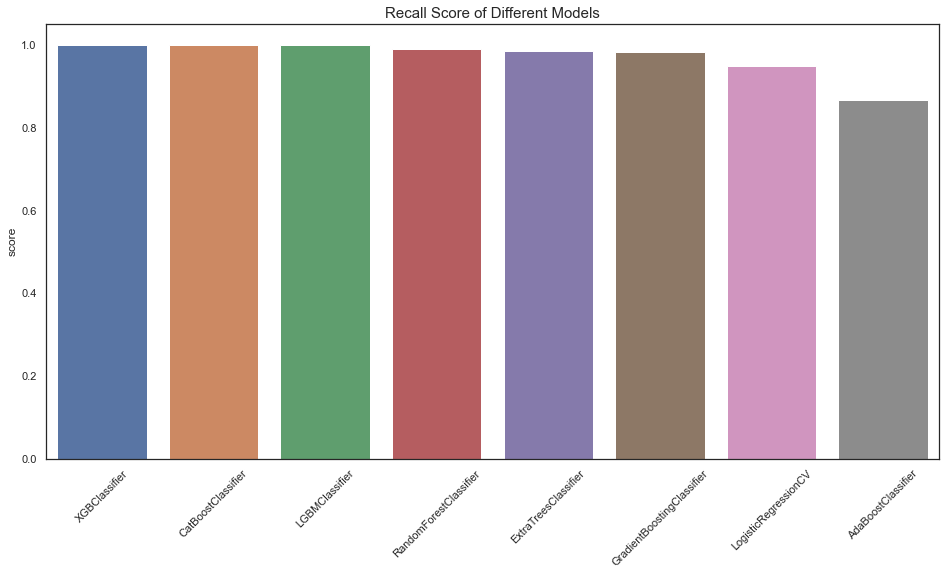

In [94]:
recalls = pd.DataFrame(Baseline_recall_score(X_train, y_train, X_test, y_test))
recalls.columns = ['score']
sns.barplot(x = recalls.index, y = recalls.score)
plt.xticks(rotation=45)
plt.title('Recall Score of Different Models', fontsize = 15)

In [95]:
def Baseline_f1_score(X, y, X2, y2):
    #Algorithm models
    MLA = [AdaBoostClassifier(),ExtraTreesClassifier(), GradientBoostingClassifier(),RandomForestClassifier(), 
          XGBClassifier(), CatBoostClassifier(), LGBMClassifier(), LogisticRegressionCV()]
    #result list
    MLA_compare={}
    #Confirm Random number to assure the iterativeness of the results
    for alg in tqdm(MLA):
        alg.random_state = 22
        MLA_name = alg.__class__.__name__
        alg.fit(X, y)
        predictions = alg.predict(X2)
        f1scores = f1_score(predictions, y2)
        MLA_compare[MLA_name] = f1scores
    scores = pd.Series(MLA_compare)
    
    return scores.sort_values(ascending = False)

  0%|          | 0/8 [00:00<?, ?it/s]

[20:58:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.074996
0:	learn: 0.6391726	total: 14.1ms	remaining: 14.1s
1:	learn: 0.5898458	total: 27.4ms	remaining: 13.7s
2:	learn: 0.5525664	total: 37.7ms	remaining: 12.5s
3:	learn: 0.5297577	total: 48ms	remaining: 11.9s
4:	learn: 0.5079836	total: 59.6ms	remaining: 11.9s
5:	learn: 0.4887137	total: 70.1ms	remaining: 11.6s
6:	learn: 0.4742556	total: 80.6ms	remaining: 11.4s
7:	learn: 0.4568601	total: 91.1ms	remaining: 11.3s
8:	learn: 0.4461577	total: 102ms	remaining: 11.2s
9:	learn: 0.4282714	total: 112ms	remaining: 11.1s
10:	learn: 0.4205927	total: 124ms	remaining: 11.2s
11:	learn: 0.4141089	total: 137ms	remaining: 11.3s
12:	learn: 0.4031021	total: 149ms	remaining: 11.3s
1

163:	learn: 0.0890200	total: 1.94s	remaining: 9.87s
164:	learn: 0.0883187	total: 1.95s	remaining: 9.86s
165:	learn: 0.0877794	total: 1.96s	remaining: 9.85s
166:	learn: 0.0874025	total: 1.97s	remaining: 9.83s
167:	learn: 0.0869681	total: 1.98s	remaining: 9.81s
168:	learn: 0.0868661	total: 1.99s	remaining: 9.8s
169:	learn: 0.0864363	total: 2s	remaining: 9.79s
170:	learn: 0.0860538	total: 2.02s	remaining: 9.78s
171:	learn: 0.0853751	total: 2.03s	remaining: 9.77s
172:	learn: 0.0849856	total: 2.04s	remaining: 9.76s
173:	learn: 0.0848900	total: 2.05s	remaining: 9.74s
174:	learn: 0.0847441	total: 2.06s	remaining: 9.73s
175:	learn: 0.0842735	total: 2.08s	remaining: 9.73s
176:	learn: 0.0841872	total: 2.09s	remaining: 9.72s
177:	learn: 0.0837640	total: 2.1s	remaining: 9.71s
178:	learn: 0.0836440	total: 2.11s	remaining: 9.7s
179:	learn: 0.0833690	total: 2.15s	remaining: 9.79s
180:	learn: 0.0830723	total: 2.16s	remaining: 9.76s
181:	learn: 0.0827873	total: 2.17s	remaining: 9.74s
182:	learn: 0.0819

322:	learn: 0.0482450	total: 3.7s	remaining: 7.75s
323:	learn: 0.0480878	total: 3.71s	remaining: 7.74s
324:	learn: 0.0479879	total: 3.72s	remaining: 7.72s
325:	learn: 0.0477303	total: 3.73s	remaining: 7.71s
326:	learn: 0.0476545	total: 3.74s	remaining: 7.7s
327:	learn: 0.0474031	total: 3.75s	remaining: 7.69s
328:	learn: 0.0472228	total: 3.76s	remaining: 7.67s
329:	learn: 0.0470861	total: 3.77s	remaining: 7.66s
330:	learn: 0.0469979	total: 3.78s	remaining: 7.64s
331:	learn: 0.0468981	total: 3.79s	remaining: 7.63s
332:	learn: 0.0466187	total: 3.8s	remaining: 7.62s
333:	learn: 0.0465633	total: 3.81s	remaining: 7.61s
334:	learn: 0.0463241	total: 3.83s	remaining: 7.59s
335:	learn: 0.0462529	total: 3.84s	remaining: 7.58s
336:	learn: 0.0461844	total: 3.85s	remaining: 7.57s
337:	learn: 0.0460898	total: 3.86s	remaining: 7.57s
338:	learn: 0.0458788	total: 3.87s	remaining: 7.55s
339:	learn: 0.0457144	total: 3.88s	remaining: 7.54s
340:	learn: 0.0454726	total: 3.9s	remaining: 7.53s
341:	learn: 0.04

490:	learn: 0.0276335	total: 5.85s	remaining: 6.06s
491:	learn: 0.0275978	total: 5.86s	remaining: 6.05s
492:	learn: 0.0275814	total: 5.87s	remaining: 6.04s
493:	learn: 0.0274737	total: 5.88s	remaining: 6.03s
494:	learn: 0.0274109	total: 5.89s	remaining: 6.01s
495:	learn: 0.0273946	total: 5.9s	remaining: 6s
496:	learn: 0.0272633	total: 5.92s	remaining: 5.99s
497:	learn: 0.0271554	total: 5.93s	remaining: 5.97s
498:	learn: 0.0271452	total: 5.94s	remaining: 5.96s
499:	learn: 0.0271113	total: 5.95s	remaining: 5.95s
500:	learn: 0.0270787	total: 5.96s	remaining: 5.94s
501:	learn: 0.0269740	total: 5.98s	remaining: 5.93s
502:	learn: 0.0268562	total: 5.99s	remaining: 5.92s
503:	learn: 0.0267519	total: 6s	remaining: 5.91s
504:	learn: 0.0266532	total: 6.02s	remaining: 5.9s
505:	learn: 0.0265498	total: 6.03s	remaining: 5.88s
506:	learn: 0.0264623	total: 6.04s	remaining: 5.88s
507:	learn: 0.0263455	total: 6.06s	remaining: 5.87s
508:	learn: 0.0263170	total: 6.07s	remaining: 5.86s
509:	learn: 0.026304

661:	learn: 0.0165240	total: 8.02s	remaining: 4.09s
662:	learn: 0.0164653	total: 8.03s	remaining: 4.08s
663:	learn: 0.0164512	total: 8.05s	remaining: 4.07s
664:	learn: 0.0164034	total: 8.06s	remaining: 4.06s
665:	learn: 0.0163815	total: 8.07s	remaining: 4.05s
666:	learn: 0.0163566	total: 8.08s	remaining: 4.04s
667:	learn: 0.0163454	total: 8.1s	remaining: 4.02s
668:	learn: 0.0162851	total: 8.11s	remaining: 4.01s
669:	learn: 0.0162052	total: 8.12s	remaining: 4s
670:	learn: 0.0161381	total: 8.13s	remaining: 3.99s
671:	learn: 0.0160811	total: 8.14s	remaining: 3.97s
672:	learn: 0.0160083	total: 8.16s	remaining: 3.96s
673:	learn: 0.0159572	total: 8.17s	remaining: 3.95s
674:	learn: 0.0159112	total: 8.18s	remaining: 3.94s
675:	learn: 0.0158613	total: 8.19s	remaining: 3.93s
676:	learn: 0.0158465	total: 8.2s	remaining: 3.91s
677:	learn: 0.0158301	total: 8.22s	remaining: 3.9s
678:	learn: 0.0157806	total: 8.23s	remaining: 3.89s
679:	learn: 0.0157263	total: 8.24s	remaining: 3.88s
680:	learn: 0.0157

836:	learn: 0.0103922	total: 10.2s	remaining: 1.98s
837:	learn: 0.0103745	total: 10.2s	remaining: 1.97s
838:	learn: 0.0103697	total: 10.2s	remaining: 1.96s
839:	learn: 0.0103668	total: 10.2s	remaining: 1.95s
840:	learn: 0.0103531	total: 10.2s	remaining: 1.94s
841:	learn: 0.0103416	total: 10.2s	remaining: 1.92s
842:	learn: 0.0102973	total: 10.3s	remaining: 1.91s
843:	learn: 0.0102567	total: 10.3s	remaining: 1.9s
844:	learn: 0.0102315	total: 10.3s	remaining: 1.89s
845:	learn: 0.0102085	total: 10.3s	remaining: 1.87s
846:	learn: 0.0101953	total: 10.3s	remaining: 1.86s
847:	learn: 0.0101470	total: 10.3s	remaining: 1.85s
848:	learn: 0.0101367	total: 10.3s	remaining: 1.84s
849:	learn: 0.0101233	total: 10.3s	remaining: 1.82s
850:	learn: 0.0101056	total: 10.4s	remaining: 1.81s
851:	learn: 0.0100959	total: 10.4s	remaining: 1.8s
852:	learn: 0.0100669	total: 10.4s	remaining: 1.79s
853:	learn: 0.0100425	total: 10.4s	remaining: 1.78s
854:	learn: 0.0100179	total: 10.4s	remaining: 1.76s
855:	learn: 0.

Text(0.5, 1.0, 'F1 Score of Different Models')

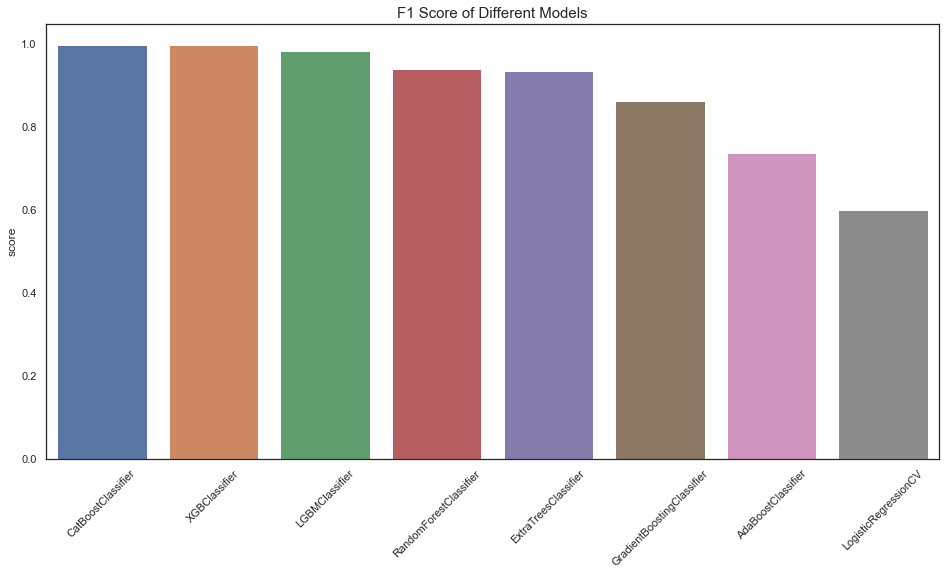

In [96]:
f1 = pd.DataFrame(Baseline_f1_score(X_train, y_train, X_test, y_test))
f1.columns = ['score']
sns.barplot(x = f1.index, y = f1.score)
plt.xticks(rotation=45)
plt.title('F1 Score of Different Models', fontsize = 15)

In [97]:
def Baseline_precision_score(X, y, X2, y2):
    #Algorithm models
    MLA = [AdaBoostClassifier(),ExtraTreesClassifier(), GradientBoostingClassifier(),RandomForestClassifier(), 
          XGBClassifier(), CatBoostClassifier(), LGBMClassifier(), LogisticRegressionCV()]
    #result list
    MLA_compare={}
    #Confirm Random number to assure the iterativeness of the results
    for alg in tqdm(MLA):
        alg.random_state = 22
        MLA_name = alg.__class__.__name__
        alg.fit(X, y)
        predictions = alg.predict(X2)
        precisions = precision_score(predictions, y2)
        MLA_compare[MLA_name] = precisions
    scores = pd.Series(MLA_compare)
    
    return scores.sort_values(ascending = False)



  0%|          | 0/8 [00:00<?, ?it/s]

[21:00:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.074996
0:	learn: 0.6391726	total: 19.9ms	remaining: 19.9s
1:	learn: 0.5898458	total: 33.1ms	remaining: 16.5s
2:	learn: 0.5525664	total: 47.1ms	remaining: 15.7s
3:	learn: 0.5297577	total: 59.8ms	remaining: 14.9s
4:	learn: 0.5079836	total: 72.7ms	remaining: 14.5s
5:	learn: 0.4887137	total: 84.6ms	remaining: 14s
6:	learn: 0.4742556	total: 96.5ms	remaining: 13.7s
7:	learn: 0.4568601	total: 109ms	remaining: 13.5s
8:	learn: 0.4461577	total: 122ms	remaining: 13.5s
9:	learn: 0.4282714	total: 133ms	remaining: 13.2s
10:	learn: 0.4205927	total: 144ms	remaining: 13s
11:	learn: 0.4141089	total: 154ms	remaining: 12.7s
12:	learn: 0.4031021	total: 166ms	remaining: 12.6s
13:	

161:	learn: 0.0902094	total: 2.17s	remaining: 11.2s
162:	learn: 0.0893294	total: 2.18s	remaining: 11.2s
163:	learn: 0.0890200	total: 2.2s	remaining: 11.2s
164:	learn: 0.0883187	total: 2.21s	remaining: 11.2s
165:	learn: 0.0877794	total: 2.23s	remaining: 11.2s
166:	learn: 0.0874025	total: 2.24s	remaining: 11.2s
167:	learn: 0.0869681	total: 2.25s	remaining: 11.2s
168:	learn: 0.0868661	total: 2.27s	remaining: 11.1s
169:	learn: 0.0864363	total: 2.28s	remaining: 11.1s
170:	learn: 0.0860538	total: 2.29s	remaining: 11.1s
171:	learn: 0.0853751	total: 2.3s	remaining: 11.1s
172:	learn: 0.0849856	total: 2.31s	remaining: 11.1s
173:	learn: 0.0848900	total: 2.33s	remaining: 11s
174:	learn: 0.0847441	total: 2.34s	remaining: 11s
175:	learn: 0.0842735	total: 2.35s	remaining: 11s
176:	learn: 0.0841872	total: 2.37s	remaining: 11s
177:	learn: 0.0837640	total: 2.38s	remaining: 11s
178:	learn: 0.0836440	total: 2.39s	remaining: 11s
179:	learn: 0.0833690	total: 2.4s	remaining: 11s
180:	learn: 0.0830723	total: 

324:	learn: 0.0479879	total: 4.31s	remaining: 8.95s
325:	learn: 0.0477303	total: 4.32s	remaining: 8.94s
326:	learn: 0.0476545	total: 4.34s	remaining: 8.93s
327:	learn: 0.0474031	total: 4.35s	remaining: 8.91s
328:	learn: 0.0472228	total: 4.36s	remaining: 8.89s
329:	learn: 0.0470861	total: 4.37s	remaining: 8.87s
330:	learn: 0.0469979	total: 4.38s	remaining: 8.86s
331:	learn: 0.0468981	total: 4.39s	remaining: 8.84s
332:	learn: 0.0466187	total: 4.4s	remaining: 8.82s
333:	learn: 0.0465633	total: 4.41s	remaining: 8.8s
334:	learn: 0.0463241	total: 4.42s	remaining: 8.78s
335:	learn: 0.0462529	total: 4.44s	remaining: 8.77s
336:	learn: 0.0461844	total: 4.45s	remaining: 8.74s
337:	learn: 0.0460898	total: 4.46s	remaining: 8.73s
338:	learn: 0.0458788	total: 4.47s	remaining: 8.71s
339:	learn: 0.0457144	total: 4.48s	remaining: 8.69s
340:	learn: 0.0454726	total: 4.49s	remaining: 8.67s
341:	learn: 0.0451609	total: 4.5s	remaining: 8.65s
342:	learn: 0.0450969	total: 4.51s	remaining: 8.64s
343:	learn: 0.0

490:	learn: 0.0276335	total: 6.25s	remaining: 6.49s
491:	learn: 0.0275978	total: 6.27s	remaining: 6.47s
492:	learn: 0.0275814	total: 6.28s	remaining: 6.46s
493:	learn: 0.0274737	total: 6.29s	remaining: 6.44s
494:	learn: 0.0274109	total: 6.3s	remaining: 6.42s
495:	learn: 0.0273946	total: 6.31s	remaining: 6.41s
496:	learn: 0.0272633	total: 6.32s	remaining: 6.39s
497:	learn: 0.0271554	total: 6.33s	remaining: 6.38s
498:	learn: 0.0271452	total: 6.34s	remaining: 6.37s
499:	learn: 0.0271113	total: 6.35s	remaining: 6.35s
500:	learn: 0.0270787	total: 6.36s	remaining: 6.34s
501:	learn: 0.0269740	total: 6.37s	remaining: 6.32s
502:	learn: 0.0268562	total: 6.38s	remaining: 6.31s
503:	learn: 0.0267519	total: 6.39s	remaining: 6.29s
504:	learn: 0.0266532	total: 6.4s	remaining: 6.28s
505:	learn: 0.0265498	total: 6.41s	remaining: 6.26s
506:	learn: 0.0264623	total: 6.42s	remaining: 6.25s
507:	learn: 0.0263455	total: 6.44s	remaining: 6.23s
508:	learn: 0.0263170	total: 6.45s	remaining: 6.22s
509:	learn: 0.

659:	learn: 0.0165819	total: 8.25s	remaining: 4.25s
660:	learn: 0.0165520	total: 8.26s	remaining: 4.24s
661:	learn: 0.0165240	total: 8.27s	remaining: 4.22s
662:	learn: 0.0164653	total: 8.28s	remaining: 4.21s
663:	learn: 0.0164512	total: 8.29s	remaining: 4.2s
664:	learn: 0.0164034	total: 8.3s	remaining: 4.18s
665:	learn: 0.0163815	total: 8.31s	remaining: 4.17s
666:	learn: 0.0163566	total: 8.32s	remaining: 4.16s
667:	learn: 0.0163454	total: 8.34s	remaining: 4.14s
668:	learn: 0.0162851	total: 8.35s	remaining: 4.13s
669:	learn: 0.0162052	total: 8.36s	remaining: 4.12s
670:	learn: 0.0161381	total: 8.37s	remaining: 4.11s
671:	learn: 0.0160811	total: 8.38s	remaining: 4.09s
672:	learn: 0.0160083	total: 8.4s	remaining: 4.08s
673:	learn: 0.0159572	total: 8.41s	remaining: 4.07s
674:	learn: 0.0159112	total: 8.43s	remaining: 4.06s
675:	learn: 0.0158613	total: 8.44s	remaining: 4.05s
676:	learn: 0.0158465	total: 8.45s	remaining: 4.03s
677:	learn: 0.0158301	total: 8.47s	remaining: 4.02s
678:	learn: 0.0

833:	learn: 0.0104831	total: 10.2s	remaining: 2.03s
834:	learn: 0.0104126	total: 10.2s	remaining: 2.02s
835:	learn: 0.0104009	total: 10.2s	remaining: 2.01s
836:	learn: 0.0103922	total: 10.2s	remaining: 2s
837:	learn: 0.0103745	total: 10.3s	remaining: 1.98s
838:	learn: 0.0103697	total: 10.3s	remaining: 1.97s
839:	learn: 0.0103668	total: 10.3s	remaining: 1.96s
840:	learn: 0.0103531	total: 10.3s	remaining: 1.94s
841:	learn: 0.0103416	total: 10.3s	remaining: 1.93s
842:	learn: 0.0102973	total: 10.3s	remaining: 1.92s
843:	learn: 0.0102567	total: 10.3s	remaining: 1.91s
844:	learn: 0.0102315	total: 10.3s	remaining: 1.89s
845:	learn: 0.0102085	total: 10.3s	remaining: 1.88s
846:	learn: 0.0101953	total: 10.3s	remaining: 1.87s
847:	learn: 0.0101470	total: 10.4s	remaining: 1.86s
848:	learn: 0.0101367	total: 10.4s	remaining: 1.84s
849:	learn: 0.0101233	total: 10.4s	remaining: 1.83s
850:	learn: 0.0101056	total: 10.4s	remaining: 1.82s
851:	learn: 0.0100959	total: 10.4s	remaining: 1.81s
852:	learn: 0.0

Text(0.5, 1.0, 'precisions Score of Different Models')

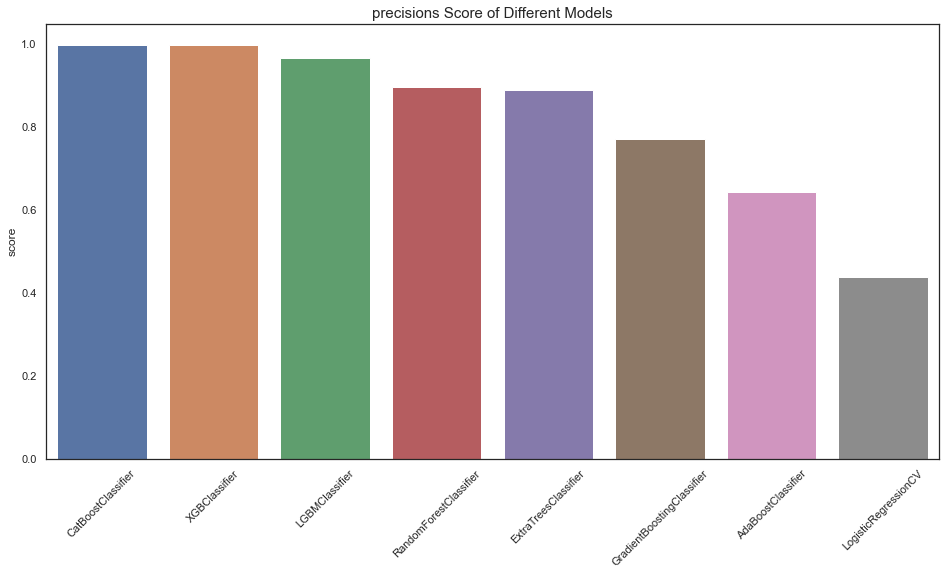

In [98]:
precisions = pd.DataFrame(Baseline_precision_score(X_train, y_train, X_test, y_test))
precisions.columns = ['score']
sns.barplot(x = precisions.index, y = precisions.score)
plt.xticks(rotation=45)
plt.title('precisions Score of Different Models', fontsize = 15)

In [99]:
def sumup(df1, df2, df3):
    sum_list = []
    for i in df1.index:
        summation = 0
        summation = np.sum(df1.iloc[df1.index == i]['score'].values + 
                           df2.iloc[df2.index == i]['score'].values + 
                           df3.iloc[df3.index == i]['score'].values)/3
        sum_list.append(summation)
    return sum_list

combination = pd.DataFrame(sumup(f1, recalls, precisions), index = f1.index)
combination.columns = ['score']
combination = combination.sort_values(by = 'score', ascending = False)
combination

score
CatBoostClassifier          0.998552
XGBClassifier               0.997646
LGBMClassifier              0.982436
RandomForestClassifier      0.941069
ExtraTreesClassifier        0.936033
GradientBoostingClassifier  0.871590
AdaBoostClassifier          0.748357
LogisticRegressionCV        0.661287

Text(0.5, 1.0, 'Combination Score of Different Models')

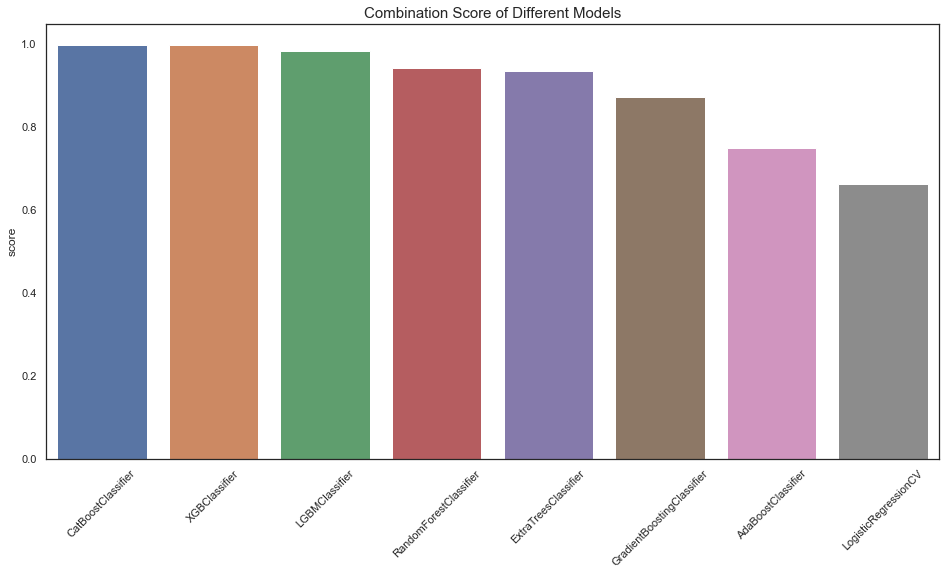

In [100]:
sns.barplot(x = combination.index, y = combination.score)
plt.xticks(rotation=45)
plt.title('Combination Score of Different Models', fontsize = 15)

# After comparison we decide to go with catboostclassifier

In [69]:
class SubestimatorOfStacking():
    #write a class to determine the best parameter

    def __init__(self, alg, param_grid, random_state = 0, n_jobs = None):
        
        self.alg = alg
        self.param_grid = param_grid
        self.random_state = random_state
        self.n_jobs = n_jobs
    
    def fit(self, X, y, cols, rfecv = False):
        self.X_train = X
        self.y_train = y
        self.dfcols = cols
        self.rfecv = rfecv
        self.grid = GridSearchCV(self.alg, self.param_grid, cv = 5, scoring = 'precision')
        self.grid.n_jobs = self.n_jobs
        self.grid.fit(self.X_train, self.y_train)
        self.best_estimator_ = self.grid.best_estimator_
        self.best_params = self.grid.best_params_
        print('The best score after gridsearch is ' + str(self.grid.best_score_)+ '.'
             )
        if self.rfecv:
            self.rfecv = RFECV(self.best_estimator_, min_features_to_select = int(self.X_train.shape[1]/2), 
                               cv = 5)
            self.rfecv.fit(self.X_train, self.y_train)
            self.best_features_ = self.dfcols.columns[self.rfecv.get_support()]
            print('The best score after RFECV is' + str(self.rfecv.grid_scores_.max()) + '.')
            print('The number of selected features is '+str(self.rfecv.n_features_) + '.')
            print('If you want get the top features, please use self.best_features_.')
        self.cv_results_ = pd.DataFrame(self.grid.cv_results_)
        self.cv_results_heatmap_ = self.cv_results_.pivot_table(values = 'mean_test_score', 
                                                                columns = self.cv_results_.columns[4],
                                                                 index = self.cv_results_.columns[5])
        sns.heatmap(self.cv_results_heatmap_, annot = True)
        print()
        return self
    
    def stacking(self, X, y, X_test, Nfolds = 5):
        self.X_train = X.values
        self.y_train = y
        self.X_test = X_test.values
        self.NFolds = Nfolds
        ntrain = self.X_train.shape[0]
        ntest = self.X_test.shape[0]
        self.oof_train = np.zeros((ntrain,))
        self.foof_test = np.zeros((ntest, ))
        oof_test_df = np.empty((self.NFolds, ntest))
        kf = KFold(n_splits = self.NFolds, shuffle = True)

        for i, (train_index, test_index) in enumerate(kf.split(self.X_train)):
            X_tr = self.X_train[train_index]
            y_tr = self.y_train[train_index]
            X_te = self.X_train[test_index]
            
            self.best_estimator_.fit(X_tr, y_tr)
            y_te = self.best_estimator_.predict(X_te)
            self.oof_train[test_index] = y_te
            oof_test_df[i, :] = self.best_estimator_.predict(X_test)
        
        self.oof_test = oof_test_df.mean(axis = 0)
        self.oof_train = self.oof_train.reshape(-1, 1)
        self.oof_test = self.oof_test.reshape(-1, 1)
        return self.oof_train, self.oof_test
        
        self.oof_train = self.oof_train.reshape(-1, 1)
        return self.oof_train
    
    def fit_predict(self, X, y, test):
        self.best_estimator_.fit(X, y)
        return self.best_estimator_.predict(test)   

Learning rate set to 0.128736
0:	learn: 0.5870586	total: 34.5ms	remaining: 17.2s
1:	learn: 0.5305753	total: 42.9ms	remaining: 10.7s
2:	learn: 0.4926796	total: 51.2ms	remaining: 8.48s
3:	learn: 0.4630280	total: 59.1ms	remaining: 7.33s
4:	learn: 0.4444805	total: 67.6ms	remaining: 6.69s
5:	learn: 0.4235035	total: 75.6ms	remaining: 6.22s
6:	learn: 0.4099865	total: 83.1ms	remaining: 5.86s
7:	learn: 0.4004374	total: 91.1ms	remaining: 5.6s
8:	learn: 0.3863966	total: 98.8ms	remaining: 5.39s
9:	learn: 0.3739283	total: 107ms	remaining: 5.25s
10:	learn: 0.3673383	total: 114ms	remaining: 5.09s
11:	learn: 0.3603229	total: 122ms	remaining: 4.96s
12:	learn: 0.3530687	total: 129ms	remaining: 4.85s
13:	learn: 0.3428724	total: 137ms	remaining: 4.77s
14:	learn: 0.3344785	total: 145ms	remaining: 4.7s
15:	learn: 0.3283093	total: 155ms	remaining: 4.67s
16:	learn: 0.3174082	total: 163ms	remaining: 4.63s
17:	learn: 0.3146427	total: 172ms	remaining: 4.61s
18:	learn: 0.3120587	total: 184ms	remaining: 4.66s
19:	

166:	learn: 0.0659742	total: 1.49s	remaining: 2.96s
167:	learn: 0.0651518	total: 1.5s	remaining: 2.96s
168:	learn: 0.0642874	total: 1.5s	remaining: 2.95s
169:	learn: 0.0634798	total: 1.52s	remaining: 2.94s
170:	learn: 0.0634029	total: 1.52s	remaining: 2.94s
171:	learn: 0.0626860	total: 1.54s	remaining: 2.93s
172:	learn: 0.0624756	total: 1.55s	remaining: 2.92s
173:	learn: 0.0622390	total: 1.55s	remaining: 2.91s
174:	learn: 0.0621193	total: 1.56s	remaining: 2.9s
175:	learn: 0.0619381	total: 1.57s	remaining: 2.9s
176:	learn: 0.0616689	total: 1.58s	remaining: 2.89s
177:	learn: 0.0611979	total: 1.59s	remaining: 2.88s
178:	learn: 0.0611146	total: 1.6s	remaining: 2.87s
179:	learn: 0.0609290	total: 1.61s	remaining: 2.87s
180:	learn: 0.0608417	total: 1.62s	remaining: 2.86s
181:	learn: 0.0604699	total: 1.63s	remaining: 2.85s
182:	learn: 0.0603625	total: 1.64s	remaining: 2.84s
183:	learn: 0.0602590	total: 1.65s	remaining: 2.84s
184:	learn: 0.0599438	total: 1.66s	remaining: 2.83s
185:	learn: 0.059

329:	learn: 0.0319549	total: 2.83s	remaining: 1.46s
330:	learn: 0.0317974	total: 2.84s	remaining: 1.45s
331:	learn: 0.0315487	total: 2.85s	remaining: 1.44s
332:	learn: 0.0315039	total: 2.86s	remaining: 1.43s
333:	learn: 0.0313321	total: 2.87s	remaining: 1.43s
334:	learn: 0.0311595	total: 2.88s	remaining: 1.42s
335:	learn: 0.0311359	total: 2.88s	remaining: 1.41s
336:	learn: 0.0310832	total: 2.89s	remaining: 1.4s
337:	learn: 0.0310071	total: 2.9s	remaining: 1.39s
338:	learn: 0.0309525	total: 2.9s	remaining: 1.38s
339:	learn: 0.0307974	total: 2.91s	remaining: 1.37s
340:	learn: 0.0307043	total: 2.92s	remaining: 1.36s
341:	learn: 0.0305829	total: 2.93s	remaining: 1.35s
342:	learn: 0.0304756	total: 2.93s	remaining: 1.34s
343:	learn: 0.0304552	total: 2.94s	remaining: 1.33s
344:	learn: 0.0300128	total: 2.95s	remaining: 1.32s
345:	learn: 0.0297898	total: 2.96s	remaining: 1.32s
346:	learn: 0.0296014	total: 2.96s	remaining: 1.31s
347:	learn: 0.0295616	total: 2.97s	remaining: 1.3s
348:	learn: 0.02

489:	learn: 0.0172308	total: 4.12s	remaining: 84.1ms
490:	learn: 0.0172099	total: 4.13s	remaining: 75.7ms
491:	learn: 0.0170849	total: 4.14s	remaining: 67.3ms
492:	learn: 0.0169739	total: 4.15s	remaining: 58.9ms
493:	learn: 0.0169127	total: 4.15s	remaining: 50.5ms
494:	learn: 0.0168036	total: 4.16s	remaining: 42.1ms
495:	learn: 0.0167416	total: 4.17s	remaining: 33.6ms
496:	learn: 0.0165777	total: 4.18s	remaining: 25.2ms
497:	learn: 0.0164427	total: 4.19s	remaining: 16.8ms
498:	learn: 0.0163813	total: 4.2s	remaining: 8.41ms
499:	learn: 0.0162750	total: 4.2s	remaining: 0us
Learning rate set to 0.128736
0:	learn: 0.6084300	total: 28.2ms	remaining: 14.1s
1:	learn: 0.5517614	total: 38.2ms	remaining: 9.52s
2:	learn: 0.5105568	total: 48.2ms	remaining: 7.98s
3:	learn: 0.4856978	total: 57ms	remaining: 7.07s
4:	learn: 0.4644474	total: 65.1ms	remaining: 6.44s
5:	learn: 0.4417669	total: 72.7ms	remaining: 5.99s
6:	learn: 0.4314240	total: 80.3ms	remaining: 5.65s
7:	learn: 0.4052386	total: 87.9ms	rem

167:	learn: 0.0629263	total: 1.35s	remaining: 2.66s
168:	learn: 0.0628663	total: 1.36s	remaining: 2.66s
169:	learn: 0.0623757	total: 1.36s	remaining: 2.65s
170:	learn: 0.0618699	total: 1.37s	remaining: 2.64s
171:	learn: 0.0614941	total: 1.38s	remaining: 2.63s
172:	learn: 0.0614124	total: 1.39s	remaining: 2.62s
173:	learn: 0.0612654	total: 1.4s	remaining: 2.61s
174:	learn: 0.0608693	total: 1.4s	remaining: 2.61s
175:	learn: 0.0607426	total: 1.41s	remaining: 2.6s
176:	learn: 0.0604170	total: 1.42s	remaining: 2.59s
177:	learn: 0.0599808	total: 1.43s	remaining: 2.58s
178:	learn: 0.0596325	total: 1.43s	remaining: 2.57s
179:	learn: 0.0592259	total: 1.44s	remaining: 2.56s
180:	learn: 0.0591181	total: 1.45s	remaining: 2.55s
181:	learn: 0.0589985	total: 1.46s	remaining: 2.54s
182:	learn: 0.0586625	total: 1.46s	remaining: 2.53s
183:	learn: 0.0585394	total: 1.47s	remaining: 2.53s
184:	learn: 0.0581891	total: 1.48s	remaining: 2.52s
185:	learn: 0.0579549	total: 1.49s	remaining: 2.51s
186:	learn: 0.0

331:	learn: 0.0312605	total: 2.65s	remaining: 1.34s
332:	learn: 0.0312374	total: 2.66s	remaining: 1.33s
333:	learn: 0.0312165	total: 2.67s	remaining: 1.32s
334:	learn: 0.0311320	total: 2.67s	remaining: 1.32s
335:	learn: 0.0310642	total: 2.68s	remaining: 1.31s
336:	learn: 0.0309852	total: 2.69s	remaining: 1.3s
337:	learn: 0.0309281	total: 2.7s	remaining: 1.29s
338:	learn: 0.0307418	total: 2.71s	remaining: 1.28s
339:	learn: 0.0305694	total: 2.71s	remaining: 1.28s
340:	learn: 0.0304042	total: 2.72s	remaining: 1.27s
341:	learn: 0.0302429	total: 2.73s	remaining: 1.26s
342:	learn: 0.0302363	total: 2.73s	remaining: 1.25s
343:	learn: 0.0299578	total: 2.74s	remaining: 1.24s
344:	learn: 0.0299413	total: 2.75s	remaining: 1.24s
345:	learn: 0.0297086	total: 2.76s	remaining: 1.23s
346:	learn: 0.0295328	total: 2.77s	remaining: 1.22s
347:	learn: 0.0294341	total: 2.77s	remaining: 1.21s
348:	learn: 0.0292372	total: 2.78s	remaining: 1.2s
349:	learn: 0.0292302	total: 2.79s	remaining: 1.2s
350:	learn: 0.02

Learning rate set to 0.128737
0:	learn: 0.6024174	total: 19.5ms	remaining: 9.73s
1:	learn: 0.5375490	total: 26.9ms	remaining: 6.71s
2:	learn: 0.4955245	total: 34.6ms	remaining: 5.73s
3:	learn: 0.4668018	total: 42.4ms	remaining: 5.25s
4:	learn: 0.4423921	total: 51.6ms	remaining: 5.1s
5:	learn: 0.4273309	total: 59ms	remaining: 4.85s
6:	learn: 0.4115502	total: 67.5ms	remaining: 4.75s
7:	learn: 0.3899374	total: 75.8ms	remaining: 4.66s
8:	learn: 0.3794334	total: 82.7ms	remaining: 4.51s
9:	learn: 0.3720493	total: 90.1ms	remaining: 4.41s
10:	learn: 0.3589024	total: 97.8ms	remaining: 4.35s
11:	learn: 0.3472124	total: 106ms	remaining: 4.29s
12:	learn: 0.3377702	total: 113ms	remaining: 4.25s
13:	learn: 0.3277788	total: 121ms	remaining: 4.2s
14:	learn: 0.3172347	total: 129ms	remaining: 4.18s
15:	learn: 0.3138389	total: 137ms	remaining: 4.14s
16:	learn: 0.3028887	total: 144ms	remaining: 4.09s
17:	learn: 0.2969797	total: 151ms	remaining: 4.04s
18:	learn: 0.2845911	total: 160ms	remaining: 4.04s
19:	

168:	learn: 0.0652262	total: 1.51s	remaining: 2.96s
169:	learn: 0.0650726	total: 1.52s	remaining: 2.95s
170:	learn: 0.0647752	total: 1.53s	remaining: 2.94s
171:	learn: 0.0643898	total: 1.54s	remaining: 2.93s
172:	learn: 0.0642938	total: 1.54s	remaining: 2.92s
173:	learn: 0.0642404	total: 1.55s	remaining: 2.91s
174:	learn: 0.0638386	total: 1.56s	remaining: 2.9s
175:	learn: 0.0632428	total: 1.57s	remaining: 2.89s
176:	learn: 0.0630008	total: 1.58s	remaining: 2.88s
177:	learn: 0.0628024	total: 1.58s	remaining: 2.87s
178:	learn: 0.0623010	total: 1.59s	remaining: 2.86s
179:	learn: 0.0619432	total: 1.6s	remaining: 2.85s
180:	learn: 0.0618573	total: 1.61s	remaining: 2.84s
181:	learn: 0.0616429	total: 1.62s	remaining: 2.83s
182:	learn: 0.0612687	total: 1.63s	remaining: 2.82s
183:	learn: 0.0606646	total: 1.64s	remaining: 2.81s
184:	learn: 0.0602194	total: 1.65s	remaining: 2.81s
185:	learn: 0.0598143	total: 1.66s	remaining: 2.8s
186:	learn: 0.0593512	total: 1.67s	remaining: 2.79s
187:	learn: 0.0

337:	learn: 0.0322399	total: 3.02s	remaining: 1.45s
338:	learn: 0.0321921	total: 3.03s	remaining: 1.44s
339:	learn: 0.0320124	total: 3.04s	remaining: 1.43s
340:	learn: 0.0318945	total: 3.05s	remaining: 1.42s
341:	learn: 0.0317922	total: 3.06s	remaining: 1.41s
342:	learn: 0.0316676	total: 3.07s	remaining: 1.4s
343:	learn: 0.0315237	total: 3.08s	remaining: 1.4s
344:	learn: 0.0313219	total: 3.09s	remaining: 1.39s
345:	learn: 0.0311279	total: 3.1s	remaining: 1.38s
346:	learn: 0.0310626	total: 3.1s	remaining: 1.37s
347:	learn: 0.0309641	total: 3.11s	remaining: 1.36s
348:	learn: 0.0308951	total: 3.12s	remaining: 1.35s
349:	learn: 0.0307263	total: 3.13s	remaining: 1.34s
350:	learn: 0.0305541	total: 3.14s	remaining: 1.33s
351:	learn: 0.0304919	total: 3.14s	remaining: 1.32s
352:	learn: 0.0303915	total: 3.15s	remaining: 1.31s
353:	learn: 0.0302010	total: 3.16s	remaining: 1.3s
354:	learn: 0.0301667	total: 3.17s	remaining: 1.29s
355:	learn: 0.0301047	total: 3.17s	remaining: 1.28s
356:	learn: 0.030

498:	learn: 0.0181696	total: 4.3s	remaining: 8.61ms
499:	learn: 0.0180616	total: 4.3s	remaining: 0us
Learning rate set to 0.128737
0:	learn: 0.6132581	total: 18.8ms	remaining: 9.4s
1:	learn: 0.5388071	total: 26.8ms	remaining: 6.66s
2:	learn: 0.4944542	total: 34.5ms	remaining: 5.72s
3:	learn: 0.4624826	total: 42.2ms	remaining: 5.24s
4:	learn: 0.4395863	total: 50.4ms	remaining: 4.99s
5:	learn: 0.4231094	total: 58.1ms	remaining: 4.78s
6:	learn: 0.4082119	total: 68.6ms	remaining: 4.83s
7:	learn: 0.3991995	total: 78.5ms	remaining: 4.83s
8:	learn: 0.3909219	total: 89ms	remaining: 4.86s
9:	learn: 0.3690762	total: 99.1ms	remaining: 4.86s
10:	learn: 0.3529524	total: 110ms	remaining: 4.9s
11:	learn: 0.3479482	total: 121ms	remaining: 4.92s
12:	learn: 0.3400756	total: 134ms	remaining: 5.02s
13:	learn: 0.3256583	total: 143ms	remaining: 4.98s
14:	learn: 0.3167942	total: 153ms	remaining: 4.96s
15:	learn: 0.3094521	total: 163ms	remaining: 4.93s
16:	learn: 0.3032816	total: 173ms	remaining: 4.91s
17:	le

161:	learn: 0.0658675	total: 1.61s	remaining: 3.37s
162:	learn: 0.0656658	total: 1.62s	remaining: 3.36s
163:	learn: 0.0652631	total: 1.63s	remaining: 3.35s
164:	learn: 0.0651592	total: 1.64s	remaining: 3.33s
165:	learn: 0.0648838	total: 1.65s	remaining: 3.32s
166:	learn: 0.0647214	total: 1.66s	remaining: 3.31s
167:	learn: 0.0645513	total: 1.67s	remaining: 3.29s
168:	learn: 0.0644224	total: 1.67s	remaining: 3.28s
169:	learn: 0.0640167	total: 1.68s	remaining: 3.27s
170:	learn: 0.0638313	total: 1.69s	remaining: 3.25s
171:	learn: 0.0636887	total: 1.7s	remaining: 3.24s
172:	learn: 0.0633264	total: 1.71s	remaining: 3.22s
173:	learn: 0.0632735	total: 1.71s	remaining: 3.21s
174:	learn: 0.0629120	total: 1.72s	remaining: 3.2s
175:	learn: 0.0626145	total: 1.73s	remaining: 3.18s
176:	learn: 0.0625338	total: 1.74s	remaining: 3.17s
177:	learn: 0.0622577	total: 1.74s	remaining: 3.15s
178:	learn: 0.0617538	total: 1.75s	remaining: 3.14s
179:	learn: 0.0612731	total: 1.76s	remaining: 3.13s
180:	learn: 0.

334:	learn: 0.0320634	total: 3.31s	remaining: 1.63s
335:	learn: 0.0320184	total: 3.32s	remaining: 1.62s
336:	learn: 0.0318199	total: 3.33s	remaining: 1.61s
337:	learn: 0.0317887	total: 3.34s	remaining: 1.6s
338:	learn: 0.0315554	total: 3.35s	remaining: 1.59s
339:	learn: 0.0313410	total: 3.36s	remaining: 1.58s
340:	learn: 0.0312415	total: 3.36s	remaining: 1.57s
341:	learn: 0.0310655	total: 3.37s	remaining: 1.56s
342:	learn: 0.0310119	total: 3.38s	remaining: 1.55s
343:	learn: 0.0307909	total: 3.39s	remaining: 1.54s
344:	learn: 0.0307638	total: 3.4s	remaining: 1.53s
345:	learn: 0.0307067	total: 3.41s	remaining: 1.52s
346:	learn: 0.0305945	total: 3.42s	remaining: 1.51s
347:	learn: 0.0305788	total: 3.43s	remaining: 1.5s
348:	learn: 0.0305495	total: 3.44s	remaining: 1.49s
349:	learn: 0.0303856	total: 3.45s	remaining: 1.48s
350:	learn: 0.0302392	total: 3.46s	remaining: 1.47s
351:	learn: 0.0301774	total: 3.47s	remaining: 1.46s
352:	learn: 0.0299696	total: 3.47s	remaining: 1.45s
353:	learn: 0.0

493:	learn: 0.0178659	total: 4.62s	remaining: 56.2ms
494:	learn: 0.0178320	total: 4.63s	remaining: 46.8ms
495:	learn: 0.0177312	total: 4.64s	remaining: 37.5ms
496:	learn: 0.0176700	total: 4.66s	remaining: 28.1ms
497:	learn: 0.0176469	total: 4.67s	remaining: 18.7ms
498:	learn: 0.0176214	total: 4.68s	remaining: 9.37ms
499:	learn: 0.0175902	total: 4.69s	remaining: 0us
Learning rate set to 0.128737
0:	learn: 0.6220589	total: 68.9ms	remaining: 34.4s
1:	learn: 0.5553740	total: 80.9ms	remaining: 20.1s
2:	learn: 0.5105029	total: 91.8ms	remaining: 15.2s
3:	learn: 0.4821024	total: 102ms	remaining: 12.7s
4:	learn: 0.4624644	total: 111ms	remaining: 11s
5:	learn: 0.4480172	total: 120ms	remaining: 9.85s
6:	learn: 0.4329340	total: 129ms	remaining: 9.07s
7:	learn: 0.4136585	total: 144ms	remaining: 8.85s
8:	learn: 0.4026375	total: 152ms	remaining: 8.29s
9:	learn: 0.3894844	total: 160ms	remaining: 7.86s
10:	learn: 0.3828510	total: 168ms	remaining: 7.47s
11:	learn: 0.3745004	total: 176ms	remaining: 7.15s

160:	learn: 0.0690909	total: 1.57s	remaining: 3.31s
161:	learn: 0.0689658	total: 1.58s	remaining: 3.3s
162:	learn: 0.0687728	total: 1.59s	remaining: 3.29s
163:	learn: 0.0686740	total: 1.6s	remaining: 3.28s
164:	learn: 0.0685268	total: 1.61s	remaining: 3.27s
165:	learn: 0.0681599	total: 1.62s	remaining: 3.26s
166:	learn: 0.0679269	total: 1.63s	remaining: 3.25s
167:	learn: 0.0675278	total: 1.64s	remaining: 3.25s
168:	learn: 0.0672607	total: 1.65s	remaining: 3.23s
169:	learn: 0.0667927	total: 1.66s	remaining: 3.23s
170:	learn: 0.0664365	total: 1.67s	remaining: 3.22s
171:	learn: 0.0657093	total: 1.68s	remaining: 3.21s
172:	learn: 0.0654943	total: 1.69s	remaining: 3.2s
173:	learn: 0.0652085	total: 1.7s	remaining: 3.19s
174:	learn: 0.0649079	total: 1.71s	remaining: 3.18s
175:	learn: 0.0642502	total: 1.72s	remaining: 3.17s
176:	learn: 0.0641721	total: 1.74s	remaining: 3.17s
177:	learn: 0.0637510	total: 1.75s	remaining: 3.16s
178:	learn: 0.0634876	total: 1.76s	remaining: 3.15s
179:	learn: 0.06

339:	learn: 0.0303918	total: 3.31s	remaining: 1.56s
340:	learn: 0.0303438	total: 3.32s	remaining: 1.55s
341:	learn: 0.0302996	total: 3.33s	remaining: 1.54s
342:	learn: 0.0301578	total: 3.35s	remaining: 1.53s
343:	learn: 0.0300450	total: 3.35s	remaining: 1.52s
344:	learn: 0.0298723	total: 3.37s	remaining: 1.51s
345:	learn: 0.0298203	total: 3.38s	remaining: 1.5s
346:	learn: 0.0297136	total: 3.38s	remaining: 1.49s
347:	learn: 0.0296869	total: 3.39s	remaining: 1.48s
348:	learn: 0.0296336	total: 3.4s	remaining: 1.47s
349:	learn: 0.0295866	total: 3.41s	remaining: 1.46s
350:	learn: 0.0293926	total: 3.42s	remaining: 1.45s
351:	learn: 0.0293580	total: 3.43s	remaining: 1.44s
352:	learn: 0.0292681	total: 3.44s	remaining: 1.43s
353:	learn: 0.0291213	total: 3.45s	remaining: 1.42s
354:	learn: 0.0289715	total: 3.46s	remaining: 1.41s
355:	learn: 0.0288672	total: 3.47s	remaining: 1.4s
356:	learn: 0.0286527	total: 3.48s	remaining: 1.39s
357:	learn: 0.0285155	total: 3.48s	remaining: 1.38s
358:	learn: 0.0

Learning rate set to 0.128736
0:	learn: 0.5816080	total: 79.7ms	remaining: 39.8s
1:	learn: 0.5211600	total: 90.9ms	remaining: 22.6s
2:	learn: 0.4829643	total: 102ms	remaining: 16.9s
3:	learn: 0.4518564	total: 114ms	remaining: 14.1s
4:	learn: 0.4277461	total: 124ms	remaining: 12.3s
5:	learn: 0.4059546	total: 134ms	remaining: 11.1s
6:	learn: 0.3869654	total: 143ms	remaining: 10.1s
7:	learn: 0.3721407	total: 153ms	remaining: 9.4s
8:	learn: 0.3502702	total: 163ms	remaining: 8.88s
9:	learn: 0.3411082	total: 172ms	remaining: 8.45s
10:	learn: 0.3358605	total: 181ms	remaining: 8.04s
11:	learn: 0.3306123	total: 190ms	remaining: 7.72s
12:	learn: 0.3159199	total: 200ms	remaining: 7.48s
13:	learn: 0.3007943	total: 210ms	remaining: 7.3s
14:	learn: 0.2940642	total: 219ms	remaining: 7.09s
15:	learn: 0.2800644	total: 228ms	remaining: 6.89s
16:	learn: 0.2715629	total: 238ms	remaining: 6.75s
17:	learn: 0.2583700	total: 246ms	remaining: 6.6s
18:	learn: 0.2450605	total: 255ms	remaining: 6.45s
19:	learn: 0

162:	learn: 0.0480128	total: 1.72s	remaining: 3.56s
163:	learn: 0.0477237	total: 1.73s	remaining: 3.54s
164:	learn: 0.0473378	total: 1.74s	remaining: 3.54s
165:	learn: 0.0470367	total: 1.75s	remaining: 3.53s
166:	learn: 0.0469613	total: 1.76s	remaining: 3.52s
167:	learn: 0.0467798	total: 1.77s	remaining: 3.5s
168:	learn: 0.0465736	total: 1.78s	remaining: 3.49s
169:	learn: 0.0462223	total: 1.79s	remaining: 3.48s
170:	learn: 0.0460568	total: 1.8s	remaining: 3.47s
171:	learn: 0.0457458	total: 1.82s	remaining: 3.46s
172:	learn: 0.0454163	total: 1.83s	remaining: 3.45s
173:	learn: 0.0452925	total: 1.84s	remaining: 3.45s
174:	learn: 0.0447133	total: 1.85s	remaining: 3.44s
175:	learn: 0.0445737	total: 1.86s	remaining: 3.43s
176:	learn: 0.0441854	total: 1.87s	remaining: 3.42s
177:	learn: 0.0436970	total: 1.88s	remaining: 3.4s
178:	learn: 0.0435975	total: 1.89s	remaining: 3.39s
179:	learn: 0.0433596	total: 1.9s	remaining: 3.38s
180:	learn: 0.0429306	total: 1.91s	remaining: 3.37s
181:	learn: 0.04

321:	learn: 0.0194946	total: 3.43s	remaining: 1.9s
322:	learn: 0.0194395	total: 3.44s	remaining: 1.89s
323:	learn: 0.0194022	total: 3.45s	remaining: 1.87s
324:	learn: 0.0192908	total: 3.46s	remaining: 1.86s
325:	learn: 0.0191949	total: 3.47s	remaining: 1.85s
326:	learn: 0.0191651	total: 3.48s	remaining: 1.84s
327:	learn: 0.0190957	total: 3.49s	remaining: 1.83s
328:	learn: 0.0189835	total: 3.5s	remaining: 1.82s
329:	learn: 0.0189327	total: 3.51s	remaining: 1.81s
330:	learn: 0.0188972	total: 3.52s	remaining: 1.79s
331:	learn: 0.0186519	total: 3.53s	remaining: 1.78s
332:	learn: 0.0184963	total: 3.54s	remaining: 1.77s
333:	learn: 0.0183262	total: 3.55s	remaining: 1.76s
334:	learn: 0.0183071	total: 3.56s	remaining: 1.75s
335:	learn: 0.0181933	total: 3.56s	remaining: 1.74s
336:	learn: 0.0181194	total: 3.57s	remaining: 1.73s
337:	learn: 0.0180873	total: 3.58s	remaining: 1.72s
338:	learn: 0.0179477	total: 3.59s	remaining: 1.71s
339:	learn: 0.0178375	total: 3.6s	remaining: 1.7s
340:	learn: 0.01

486:	learn: 0.0093028	total: 5.13s	remaining: 137ms
487:	learn: 0.0092691	total: 5.14s	remaining: 126ms
488:	learn: 0.0092137	total: 5.16s	remaining: 116ms
489:	learn: 0.0091877	total: 5.17s	remaining: 106ms
490:	learn: 0.0091604	total: 5.18s	remaining: 95.1ms
491:	learn: 0.0091097	total: 5.2s	remaining: 84.5ms
492:	learn: 0.0090673	total: 5.21s	remaining: 74ms
493:	learn: 0.0090166	total: 5.22s	remaining: 63.4ms
494:	learn: 0.0089774	total: 5.23s	remaining: 52.9ms
495:	learn: 0.0089673	total: 5.24s	remaining: 42.3ms
496:	learn: 0.0089456	total: 5.26s	remaining: 31.7ms
497:	learn: 0.0089230	total: 5.26s	remaining: 21.1ms
498:	learn: 0.0088602	total: 5.28s	remaining: 10.6ms
499:	learn: 0.0087717	total: 5.29s	remaining: 0us
Learning rate set to 0.128736
0:	learn: 0.5984918	total: 28.3ms	remaining: 14.1s
1:	learn: 0.5435792	total: 37.7ms	remaining: 9.38s
2:	learn: 0.5004575	total: 46.1ms	remaining: 7.64s
3:	learn: 0.4752434	total: 55.4ms	remaining: 6.86s
4:	learn: 0.4425899	total: 64ms	re

150:	learn: 0.0533414	total: 1.52s	remaining: 3.52s
151:	learn: 0.0532308	total: 1.53s	remaining: 3.51s
152:	learn: 0.0523672	total: 1.54s	remaining: 3.51s
153:	learn: 0.0521656	total: 1.55s	remaining: 3.49s
154:	learn: 0.0517550	total: 1.56s	remaining: 3.48s
155:	learn: 0.0514749	total: 1.57s	remaining: 3.47s
156:	learn: 0.0512437	total: 1.58s	remaining: 3.46s
157:	learn: 0.0508604	total: 1.59s	remaining: 3.44s
158:	learn: 0.0503450	total: 1.6s	remaining: 3.43s
159:	learn: 0.0496979	total: 1.61s	remaining: 3.42s
160:	learn: 0.0495274	total: 1.62s	remaining: 3.41s
161:	learn: 0.0494211	total: 1.63s	remaining: 3.39s
162:	learn: 0.0492791	total: 1.64s	remaining: 3.38s
163:	learn: 0.0490213	total: 1.64s	remaining: 3.37s
164:	learn: 0.0487563	total: 1.65s	remaining: 3.36s
165:	learn: 0.0484207	total: 1.66s	remaining: 3.35s
166:	learn: 0.0481129	total: 1.67s	remaining: 3.34s
167:	learn: 0.0480338	total: 1.69s	remaining: 3.33s
168:	learn: 0.0474845	total: 1.7s	remaining: 3.33s
169:	learn: 0.

321:	learn: 0.0212036	total: 3.19s	remaining: 1.76s
322:	learn: 0.0209715	total: 3.2s	remaining: 1.75s
323:	learn: 0.0207391	total: 3.21s	remaining: 1.74s
324:	learn: 0.0205503	total: 3.22s	remaining: 1.73s
325:	learn: 0.0205127	total: 3.23s	remaining: 1.72s
326:	learn: 0.0204493	total: 3.24s	remaining: 1.71s
327:	learn: 0.0204049	total: 3.25s	remaining: 1.7s
328:	learn: 0.0203190	total: 3.26s	remaining: 1.69s
329:	learn: 0.0202350	total: 3.27s	remaining: 1.68s
330:	learn: 0.0201066	total: 3.28s	remaining: 1.67s
331:	learn: 0.0200718	total: 3.29s	remaining: 1.66s
332:	learn: 0.0199288	total: 3.3s	remaining: 1.65s
333:	learn: 0.0199211	total: 3.31s	remaining: 1.64s
334:	learn: 0.0198690	total: 3.32s	remaining: 1.64s
335:	learn: 0.0198205	total: 3.33s	remaining: 1.63s
336:	learn: 0.0196620	total: 3.34s	remaining: 1.61s
337:	learn: 0.0195678	total: 3.35s	remaining: 1.6s
338:	learn: 0.0194572	total: 3.36s	remaining: 1.6s
339:	learn: 0.0194375	total: 3.37s	remaining: 1.59s
340:	learn: 0.019

496:	learn: 0.0096878	total: 5.12s	remaining: 30.9ms
497:	learn: 0.0096784	total: 5.13s	remaining: 20.6ms
498:	learn: 0.0096293	total: 5.14s	remaining: 10.3ms
499:	learn: 0.0095774	total: 5.15s	remaining: 0us
Learning rate set to 0.128737
0:	learn: 0.5998455	total: 43.9ms	remaining: 21.9s
1:	learn: 0.5326870	total: 53.8ms	remaining: 13.4s
2:	learn: 0.4905701	total: 63.1ms	remaining: 10.5s
3:	learn: 0.4449898	total: 73.3ms	remaining: 9.09s
4:	learn: 0.4245475	total: 83.6ms	remaining: 8.27s
5:	learn: 0.3905733	total: 93.5ms	remaining: 7.7s
6:	learn: 0.3747391	total: 104ms	remaining: 7.35s
7:	learn: 0.3662275	total: 113ms	remaining: 6.95s
8:	learn: 0.3539776	total: 121ms	remaining: 6.62s
9:	learn: 0.3352382	total: 130ms	remaining: 6.37s
10:	learn: 0.3174555	total: 139ms	remaining: 6.16s
11:	learn: 0.3081747	total: 147ms	remaining: 5.98s
12:	learn: 0.2980825	total: 156ms	remaining: 5.85s
13:	learn: 0.2916342	total: 182ms	remaining: 6.31s
14:	learn: 0.2797183	total: 191ms	remaining: 6.18s
1

164:	learn: 0.0489506	total: 1.82s	remaining: 3.69s
165:	learn: 0.0486434	total: 1.83s	remaining: 3.68s
166:	learn: 0.0484233	total: 1.84s	remaining: 3.67s
167:	learn: 0.0480870	total: 1.85s	remaining: 3.66s
168:	learn: 0.0474670	total: 1.86s	remaining: 3.65s
169:	learn: 0.0472250	total: 1.87s	remaining: 3.63s
170:	learn: 0.0470695	total: 1.88s	remaining: 3.62s
171:	learn: 0.0467453	total: 1.89s	remaining: 3.6s
172:	learn: 0.0464737	total: 1.9s	remaining: 3.59s
173:	learn: 0.0459340	total: 1.91s	remaining: 3.57s
174:	learn: 0.0458476	total: 1.92s	remaining: 3.56s
175:	learn: 0.0457843	total: 1.93s	remaining: 3.55s
176:	learn: 0.0454144	total: 1.94s	remaining: 3.53s
177:	learn: 0.0452287	total: 1.94s	remaining: 3.52s
178:	learn: 0.0450503	total: 1.95s	remaining: 3.5s
179:	learn: 0.0448775	total: 1.96s	remaining: 3.49s
180:	learn: 0.0446665	total: 1.97s	remaining: 3.47s
181:	learn: 0.0443396	total: 1.98s	remaining: 3.46s
182:	learn: 0.0440273	total: 1.99s	remaining: 3.45s
183:	learn: 0.0

332:	learn: 0.0198377	total: 3.56s	remaining: 1.78s
333:	learn: 0.0196982	total: 3.57s	remaining: 1.77s
334:	learn: 0.0196408	total: 3.58s	remaining: 1.76s
335:	learn: 0.0195844	total: 3.59s	remaining: 1.75s
336:	learn: 0.0195336	total: 3.6s	remaining: 1.74s
337:	learn: 0.0195133	total: 3.61s	remaining: 1.73s
338:	learn: 0.0195083	total: 3.62s	remaining: 1.72s
339:	learn: 0.0193607	total: 3.63s	remaining: 1.71s
340:	learn: 0.0191926	total: 3.64s	remaining: 1.7s
341:	learn: 0.0190702	total: 3.65s	remaining: 1.69s
342:	learn: 0.0188609	total: 3.66s	remaining: 1.67s
343:	learn: 0.0186514	total: 3.67s	remaining: 1.66s
344:	learn: 0.0185734	total: 3.68s	remaining: 1.65s
345:	learn: 0.0185223	total: 3.69s	remaining: 1.64s
346:	learn: 0.0183537	total: 3.7s	remaining: 1.63s
347:	learn: 0.0183343	total: 3.71s	remaining: 1.62s
348:	learn: 0.0182252	total: 3.72s	remaining: 1.61s
349:	learn: 0.0181200	total: 3.73s	remaining: 1.6s
350:	learn: 0.0179633	total: 3.74s	remaining: 1.59s
351:	learn: 0.01

491:	learn: 0.0103450	total: 5.11s	remaining: 83.1ms
492:	learn: 0.0103364	total: 5.12s	remaining: 72.7ms
493:	learn: 0.0102870	total: 5.13s	remaining: 62.3ms
494:	learn: 0.0102251	total: 5.14s	remaining: 51.9ms
495:	learn: 0.0102129	total: 5.15s	remaining: 41.5ms
496:	learn: 0.0102037	total: 5.16s	remaining: 31.1ms
497:	learn: 0.0101883	total: 5.17s	remaining: 20.8ms
498:	learn: 0.0101051	total: 5.18s	remaining: 10.4ms
499:	learn: 0.0100812	total: 5.19s	remaining: 0us
Learning rate set to 0.128737
0:	learn: 0.5948062	total: 64.4ms	remaining: 32.1s
1:	learn: 0.5342597	total: 77.7ms	remaining: 19.4s
2:	learn: 0.4697848	total: 90.9ms	remaining: 15.1s
3:	learn: 0.4320357	total: 103ms	remaining: 12.8s
4:	learn: 0.4105883	total: 113ms	remaining: 11.2s
5:	learn: 0.3946505	total: 136ms	remaining: 11.2s
6:	learn: 0.3708820	total: 145ms	remaining: 10.2s
7:	learn: 0.3578749	total: 154ms	remaining: 9.47s
8:	learn: 0.3488809	total: 164ms	remaining: 8.92s
9:	learn: 0.3386868	total: 172ms	remaining:

160:	learn: 0.0514643	total: 1.59s	remaining: 3.36s
161:	learn: 0.0513122	total: 1.6s	remaining: 3.35s
162:	learn: 0.0511825	total: 1.61s	remaining: 3.34s
163:	learn: 0.0511123	total: 1.62s	remaining: 3.33s
164:	learn: 0.0505464	total: 1.63s	remaining: 3.31s
165:	learn: 0.0501566	total: 1.64s	remaining: 3.3s
166:	learn: 0.0501030	total: 1.65s	remaining: 3.29s
167:	learn: 0.0500094	total: 1.66s	remaining: 3.28s
168:	learn: 0.0496599	total: 1.67s	remaining: 3.26s
169:	learn: 0.0495121	total: 1.67s	remaining: 3.25s
170:	learn: 0.0493929	total: 1.68s	remaining: 3.24s
171:	learn: 0.0490333	total: 1.69s	remaining: 3.22s
172:	learn: 0.0487793	total: 1.7s	remaining: 3.21s
173:	learn: 0.0483009	total: 1.71s	remaining: 3.2s
174:	learn: 0.0480322	total: 1.72s	remaining: 3.19s
175:	learn: 0.0476140	total: 1.73s	remaining: 3.18s
176:	learn: 0.0475259	total: 1.74s	remaining: 3.17s
177:	learn: 0.0471975	total: 1.74s	remaining: 3.15s
178:	learn: 0.0470793	total: 1.75s	remaining: 3.14s
179:	learn: 0.04

330:	learn: 0.0201847	total: 3.29s	remaining: 1.68s
331:	learn: 0.0200336	total: 3.3s	remaining: 1.67s
332:	learn: 0.0198647	total: 3.31s	remaining: 1.66s
333:	learn: 0.0198403	total: 3.32s	remaining: 1.65s
334:	learn: 0.0198217	total: 3.33s	remaining: 1.64s
335:	learn: 0.0197743	total: 3.34s	remaining: 1.63s
336:	learn: 0.0196685	total: 3.35s	remaining: 1.62s
337:	learn: 0.0195326	total: 3.36s	remaining: 1.61s
338:	learn: 0.0193158	total: 3.37s	remaining: 1.6s
339:	learn: 0.0191950	total: 3.38s	remaining: 1.59s
340:	learn: 0.0190783	total: 3.39s	remaining: 1.58s
341:	learn: 0.0189228	total: 3.4s	remaining: 1.57s
342:	learn: 0.0188076	total: 3.4s	remaining: 1.56s
343:	learn: 0.0187683	total: 3.41s	remaining: 1.55s
344:	learn: 0.0187493	total: 3.42s	remaining: 1.54s
345:	learn: 0.0187179	total: 3.43s	remaining: 1.53s
346:	learn: 0.0186933	total: 3.44s	remaining: 1.52s
347:	learn: 0.0185895	total: 3.45s	remaining: 1.51s
348:	learn: 0.0185290	total: 3.46s	remaining: 1.5s
349:	learn: 0.018

0:	learn: 0.6136968	total: 52ms	remaining: 25.9s
1:	learn: 0.5478831	total: 61.2ms	remaining: 15.3s
2:	learn: 0.4999584	total: 70.8ms	remaining: 11.7s
3:	learn: 0.4693192	total: 80.3ms	remaining: 9.96s
4:	learn: 0.4434735	total: 89.6ms	remaining: 8.87s
5:	learn: 0.4266537	total: 100ms	remaining: 8.24s
6:	learn: 0.4147796	total: 111ms	remaining: 7.8s
7:	learn: 0.4000952	total: 121ms	remaining: 7.45s
8:	learn: 0.3819935	total: 134ms	remaining: 7.34s
9:	learn: 0.3656650	total: 148ms	remaining: 7.23s
10:	learn: 0.3555844	total: 159ms	remaining: 7.07s
11:	learn: 0.3465451	total: 172ms	remaining: 6.99s
12:	learn: 0.3375858	total: 182ms	remaining: 6.84s
13:	learn: 0.3332268	total: 193ms	remaining: 6.71s
14:	learn: 0.3297086	total: 203ms	remaining: 6.55s
15:	learn: 0.3156066	total: 213ms	remaining: 6.45s
16:	learn: 0.3053552	total: 225ms	remaining: 6.39s
17:	learn: 0.3023108	total: 238ms	remaining: 6.36s
18:	learn: 0.2884714	total: 250ms	remaining: 6.32s
19:	learn: 0.2717293	total: 260ms	remai

166:	learn: 0.0528203	total: 1.59s	remaining: 3.18s
167:	learn: 0.0525823	total: 1.61s	remaining: 3.18s
168:	learn: 0.0524214	total: 1.62s	remaining: 3.17s
169:	learn: 0.0517840	total: 1.63s	remaining: 3.16s
170:	learn: 0.0516197	total: 1.64s	remaining: 3.15s
171:	learn: 0.0513078	total: 1.65s	remaining: 3.14s
172:	learn: 0.0511208	total: 1.66s	remaining: 3.13s
173:	learn: 0.0506303	total: 1.67s	remaining: 3.12s
174:	learn: 0.0503460	total: 1.68s	remaining: 3.12s
175:	learn: 0.0500520	total: 1.69s	remaining: 3.11s
176:	learn: 0.0496325	total: 1.7s	remaining: 3.1s
177:	learn: 0.0490546	total: 1.71s	remaining: 3.1s
178:	learn: 0.0488187	total: 1.73s	remaining: 3.1s
179:	learn: 0.0484500	total: 1.74s	remaining: 3.09s
180:	learn: 0.0483856	total: 1.75s	remaining: 3.08s
181:	learn: 0.0482102	total: 1.76s	remaining: 3.08s
182:	learn: 0.0478203	total: 1.77s	remaining: 3.07s
183:	learn: 0.0477020	total: 1.78s	remaining: 3.07s
184:	learn: 0.0475559	total: 1.8s	remaining: 3.06s
185:	learn: 0.047

327:	learn: 0.0214606	total: 3.14s	remaining: 1.65s
328:	learn: 0.0214276	total: 3.15s	remaining: 1.64s
329:	learn: 0.0214056	total: 3.16s	remaining: 1.63s
330:	learn: 0.0213508	total: 3.17s	remaining: 1.62s
331:	learn: 0.0212168	total: 3.17s	remaining: 1.61s
332:	learn: 0.0210027	total: 3.18s	remaining: 1.6s
333:	learn: 0.0208277	total: 3.19s	remaining: 1.59s
334:	learn: 0.0207803	total: 3.2s	remaining: 1.58s
335:	learn: 0.0205934	total: 3.21s	remaining: 1.57s
336:	learn: 0.0204205	total: 3.22s	remaining: 1.56s
337:	learn: 0.0203583	total: 3.23s	remaining: 1.55s
338:	learn: 0.0202862	total: 3.23s	remaining: 1.54s
339:	learn: 0.0202140	total: 3.24s	remaining: 1.53s
340:	learn: 0.0200179	total: 3.25s	remaining: 1.52s
341:	learn: 0.0199662	total: 3.26s	remaining: 1.51s
342:	learn: 0.0198563	total: 3.27s	remaining: 1.5s
343:	learn: 0.0197091	total: 3.28s	remaining: 1.49s
344:	learn: 0.0196408	total: 3.29s	remaining: 1.48s
345:	learn: 0.0195898	total: 3.3s	remaining: 1.47s
346:	learn: 0.01

Learning rate set to 0.128736
0:	learn: 0.5784813	total: 52.7ms	remaining: 26.3s
1:	learn: 0.5126099	total: 63.5ms	remaining: 15.8s
2:	learn: 0.4689453	total: 74.3ms	remaining: 12.3s
3:	learn: 0.4339786	total: 84.7ms	remaining: 10.5s
4:	learn: 0.4120667	total: 96.2ms	remaining: 9.52s
5:	learn: 0.3844127	total: 107ms	remaining: 8.79s
6:	learn: 0.3739817	total: 117ms	remaining: 8.23s
7:	learn: 0.3548644	total: 127ms	remaining: 7.81s
8:	learn: 0.3367043	total: 137ms	remaining: 7.47s
9:	learn: 0.3250150	total: 146ms	remaining: 7.15s
10:	learn: 0.3126563	total: 156ms	remaining: 6.92s
11:	learn: 0.2989118	total: 165ms	remaining: 6.72s
12:	learn: 0.2856329	total: 176ms	remaining: 6.6s
13:	learn: 0.2670516	total: 188ms	remaining: 6.53s
14:	learn: 0.2479605	total: 200ms	remaining: 6.47s
15:	learn: 0.2370703	total: 210ms	remaining: 6.34s
16:	learn: 0.2247090	total: 221ms	remaining: 6.27s
17:	learn: 0.2141595	total: 232ms	remaining: 6.2s
18:	learn: 0.2050697	total: 242ms	remaining: 6.12s
19:	lear

166:	learn: 0.0361442	total: 1.76s	remaining: 3.5s
167:	learn: 0.0360844	total: 1.77s	remaining: 3.49s
168:	learn: 0.0359204	total: 1.78s	remaining: 3.48s
169:	learn: 0.0358770	total: 1.79s	remaining: 3.47s
170:	learn: 0.0358446	total: 1.8s	remaining: 3.46s
171:	learn: 0.0355585	total: 1.81s	remaining: 3.45s
172:	learn: 0.0354385	total: 1.82s	remaining: 3.44s
173:	learn: 0.0350357	total: 1.83s	remaining: 3.43s
174:	learn: 0.0347729	total: 1.84s	remaining: 3.41s
175:	learn: 0.0346838	total: 1.85s	remaining: 3.4s
176:	learn: 0.0344670	total: 1.86s	remaining: 3.39s
177:	learn: 0.0340337	total: 1.87s	remaining: 3.38s
178:	learn: 0.0338459	total: 1.88s	remaining: 3.37s
179:	learn: 0.0334940	total: 1.89s	remaining: 3.36s
180:	learn: 0.0334291	total: 1.9s	remaining: 3.35s
181:	learn: 0.0332117	total: 1.91s	remaining: 3.33s
182:	learn: 0.0329173	total: 1.92s	remaining: 3.32s
183:	learn: 0.0328359	total: 1.93s	remaining: 3.31s
184:	learn: 0.0325784	total: 1.94s	remaining: 3.3s
185:	learn: 0.032

333:	learn: 0.0118396	total: 3.52s	remaining: 1.75s
334:	learn: 0.0118192	total: 3.54s	remaining: 1.74s
335:	learn: 0.0117541	total: 3.55s	remaining: 1.73s
336:	learn: 0.0116360	total: 3.56s	remaining: 1.72s
337:	learn: 0.0116090	total: 3.57s	remaining: 1.71s
338:	learn: 0.0115908	total: 3.58s	remaining: 1.7s
339:	learn: 0.0115514	total: 3.59s	remaining: 1.69s
340:	learn: 0.0114541	total: 3.6s	remaining: 1.68s
341:	learn: 0.0114337	total: 3.61s	remaining: 1.67s
342:	learn: 0.0113628	total: 3.62s	remaining: 1.66s
343:	learn: 0.0112744	total: 3.63s	remaining: 1.65s
344:	learn: 0.0112330	total: 3.64s	remaining: 1.64s
345:	learn: 0.0112073	total: 3.66s	remaining: 1.63s
346:	learn: 0.0111663	total: 3.67s	remaining: 1.62s
347:	learn: 0.0111386	total: 3.68s	remaining: 1.61s
348:	learn: 0.0111012	total: 3.69s	remaining: 1.6s
349:	learn: 0.0110074	total: 3.7s	remaining: 1.59s
350:	learn: 0.0109732	total: 3.72s	remaining: 1.58s
351:	learn: 0.0109268	total: 3.73s	remaining: 1.57s
352:	learn: 0.01

0:	learn: 0.5938338	total: 28.9ms	remaining: 14.4s
1:	learn: 0.5320732	total: 39.5ms	remaining: 9.83s
2:	learn: 0.4910033	total: 49.5ms	remaining: 8.19s
3:	learn: 0.4479309	total: 59.6ms	remaining: 7.39s
4:	learn: 0.4282020	total: 70ms	remaining: 6.93s
5:	learn: 0.4113700	total: 82ms	remaining: 6.75s
6:	learn: 0.3987888	total: 94.5ms	remaining: 6.66s
7:	learn: 0.3732782	total: 108ms	remaining: 6.62s
8:	learn: 0.3576162	total: 121ms	remaining: 6.58s
9:	learn: 0.3399440	total: 133ms	remaining: 6.52s
10:	learn: 0.3317444	total: 145ms	remaining: 6.47s
11:	learn: 0.3128739	total: 159ms	remaining: 6.46s
12:	learn: 0.2983750	total: 171ms	remaining: 6.4s
13:	learn: 0.2823243	total: 184ms	remaining: 6.4s
14:	learn: 0.2637023	total: 197ms	remaining: 6.36s
15:	learn: 0.2431495	total: 208ms	remaining: 6.31s
16:	learn: 0.2375632	total: 220ms	remaining: 6.26s
17:	learn: 0.2235455	total: 231ms	remaining: 6.19s
18:	learn: 0.2121329	total: 242ms	remaining: 6.13s
19:	learn: 0.2033919	total: 252ms	remain

176:	learn: 0.0338398	total: 1.94s	remaining: 3.55s
177:	learn: 0.0334530	total: 1.96s	remaining: 3.54s
178:	learn: 0.0331987	total: 1.97s	remaining: 3.53s
179:	learn: 0.0330691	total: 1.98s	remaining: 3.52s
180:	learn: 0.0329844	total: 1.99s	remaining: 3.51s
181:	learn: 0.0328475	total: 2.01s	remaining: 3.5s
182:	learn: 0.0326832	total: 2.02s	remaining: 3.5s
183:	learn: 0.0324682	total: 2.03s	remaining: 3.49s
184:	learn: 0.0324232	total: 2.04s	remaining: 3.48s
185:	learn: 0.0321726	total: 2.05s	remaining: 3.47s
186:	learn: 0.0320891	total: 2.07s	remaining: 3.46s
187:	learn: 0.0319128	total: 2.08s	remaining: 3.45s
188:	learn: 0.0315822	total: 2.09s	remaining: 3.44s
189:	learn: 0.0312762	total: 2.1s	remaining: 3.42s
190:	learn: 0.0311573	total: 2.11s	remaining: 3.42s
191:	learn: 0.0310537	total: 2.12s	remaining: 3.4s
192:	learn: 0.0308148	total: 2.14s	remaining: 3.4s
193:	learn: 0.0306419	total: 2.15s	remaining: 3.4s
194:	learn: 0.0301979	total: 2.17s	remaining: 3.39s
195:	learn: 0.0301

338:	learn: 0.0122635	total: 3.67s	remaining: 1.74s
339:	learn: 0.0122175	total: 3.68s	remaining: 1.73s
340:	learn: 0.0120860	total: 3.69s	remaining: 1.72s
341:	learn: 0.0120556	total: 3.7s	remaining: 1.71s
342:	learn: 0.0119130	total: 3.71s	remaining: 1.7s
343:	learn: 0.0118573	total: 3.72s	remaining: 1.69s
344:	learn: 0.0118384	total: 3.73s	remaining: 1.68s
345:	learn: 0.0117238	total: 3.74s	remaining: 1.66s
346:	learn: 0.0116707	total: 3.75s	remaining: 1.65s
347:	learn: 0.0116471	total: 3.76s	remaining: 1.64s
348:	learn: 0.0115972	total: 3.77s	remaining: 1.63s
349:	learn: 0.0115388	total: 3.78s	remaining: 1.62s
350:	learn: 0.0115283	total: 3.79s	remaining: 1.61s
351:	learn: 0.0114656	total: 3.8s	remaining: 1.6s
352:	learn: 0.0113749	total: 3.81s	remaining: 1.59s
353:	learn: 0.0112897	total: 3.82s	remaining: 1.57s
354:	learn: 0.0112014	total: 3.83s	remaining: 1.56s
355:	learn: 0.0111851	total: 3.84s	remaining: 1.55s
356:	learn: 0.0111318	total: 3.85s	remaining: 1.54s
357:	learn: 0.01

498:	learn: 0.0056463	total: 5.39s	remaining: 10.8ms
499:	learn: 0.0056101	total: 5.4s	remaining: 0us
Learning rate set to 0.128737
0:	learn: 0.5890847	total: 16.4ms	remaining: 8.21s
1:	learn: 0.5050387	total: 28ms	remaining: 6.98s
2:	learn: 0.4643842	total: 39.7ms	remaining: 6.58s
3:	learn: 0.4296414	total: 51ms	remaining: 6.33s
4:	learn: 0.4028423	total: 62.4ms	remaining: 6.18s
5:	learn: 0.3841627	total: 73.7ms	remaining: 6.07s
6:	learn: 0.3704390	total: 83.8ms	remaining: 5.9s
7:	learn: 0.3503131	total: 96.5ms	remaining: 5.94s
8:	learn: 0.3206046	total: 109ms	remaining: 5.93s
9:	learn: 0.3134788	total: 122ms	remaining: 5.96s
10:	learn: 0.3049671	total: 132ms	remaining: 5.86s
11:	learn: 0.2909229	total: 144ms	remaining: 5.85s
12:	learn: 0.2763451	total: 158ms	remaining: 5.9s
13:	learn: 0.2684502	total: 169ms	remaining: 5.87s
14:	learn: 0.2552468	total: 182ms	remaining: 5.88s
15:	learn: 0.2520330	total: 194ms	remaining: 5.88s
16:	learn: 0.2451204	total: 207ms	remaining: 5.87s
17:	learn

166:	learn: 0.0364174	total: 1.83s	remaining: 3.65s
167:	learn: 0.0363101	total: 1.84s	remaining: 3.64s
168:	learn: 0.0359598	total: 1.85s	remaining: 3.63s
169:	learn: 0.0356155	total: 1.87s	remaining: 3.62s
170:	learn: 0.0350910	total: 1.88s	remaining: 3.62s
171:	learn: 0.0346299	total: 1.89s	remaining: 3.61s
172:	learn: 0.0344127	total: 1.91s	remaining: 3.6s
173:	learn: 0.0343539	total: 1.92s	remaining: 3.59s
174:	learn: 0.0341133	total: 1.93s	remaining: 3.59s
175:	learn: 0.0337966	total: 1.94s	remaining: 3.58s
176:	learn: 0.0334304	total: 1.96s	remaining: 3.57s
177:	learn: 0.0333856	total: 1.97s	remaining: 3.56s
178:	learn: 0.0332040	total: 1.98s	remaining: 3.56s
179:	learn: 0.0330362	total: 2s	remaining: 3.55s
180:	learn: 0.0328133	total: 2.01s	remaining: 3.54s
181:	learn: 0.0327474	total: 2.02s	remaining: 3.53s
182:	learn: 0.0327023	total: 2.04s	remaining: 3.52s
183:	learn: 0.0325554	total: 2.05s	remaining: 3.52s
184:	learn: 0.0322655	total: 2.06s	remaining: 3.51s
185:	learn: 0.03

338:	learn: 0.0126332	total: 3.78s	remaining: 1.79s
339:	learn: 0.0125409	total: 3.79s	remaining: 1.78s
340:	learn: 0.0124458	total: 3.81s	remaining: 1.77s
341:	learn: 0.0124308	total: 3.82s	remaining: 1.76s
342:	learn: 0.0123726	total: 3.83s	remaining: 1.75s
343:	learn: 0.0122990	total: 3.84s	remaining: 1.74s
344:	learn: 0.0121954	total: 3.85s	remaining: 1.73s
345:	learn: 0.0121718	total: 3.86s	remaining: 1.72s
346:	learn: 0.0121321	total: 3.87s	remaining: 1.71s
347:	learn: 0.0120618	total: 3.88s	remaining: 1.7s
348:	learn: 0.0119428	total: 3.89s	remaining: 1.68s
349:	learn: 0.0119068	total: 3.9s	remaining: 1.67s
350:	learn: 0.0118606	total: 3.91s	remaining: 1.66s
351:	learn: 0.0118380	total: 3.93s	remaining: 1.65s
352:	learn: 0.0117571	total: 3.94s	remaining: 1.64s
353:	learn: 0.0116633	total: 3.95s	remaining: 1.63s
354:	learn: 0.0115778	total: 3.96s	remaining: 1.62s
355:	learn: 0.0115010	total: 3.97s	remaining: 1.6s
356:	learn: 0.0114886	total: 3.98s	remaining: 1.59s
357:	learn: 0.0

496:	learn: 0.0072429	total: 5.52s	remaining: 33.3ms
497:	learn: 0.0072429	total: 5.53s	remaining: 22.2ms
498:	learn: 0.0072429	total: 5.54s	remaining: 11.1ms
499:	learn: 0.0072429	total: 5.55s	remaining: 0us
Learning rate set to 0.128737
0:	learn: 0.5917842	total: 31.4ms	remaining: 15.7s
1:	learn: 0.5181540	total: 42.9ms	remaining: 10.7s
2:	learn: 0.4595008	total: 53.4ms	remaining: 8.84s
3:	learn: 0.4319514	total: 63.5ms	remaining: 7.87s
4:	learn: 0.3946961	total: 74.2ms	remaining: 7.35s
5:	learn: 0.3730545	total: 85.9ms	remaining: 7.08s
6:	learn: 0.3608205	total: 97.1ms	remaining: 6.84s
7:	learn: 0.3349290	total: 108ms	remaining: 6.67s
8:	learn: 0.3247655	total: 119ms	remaining: 6.51s
9:	learn: 0.3180475	total: 129ms	remaining: 6.34s
10:	learn: 0.3067308	total: 140ms	remaining: 6.21s
11:	learn: 0.2993396	total: 150ms	remaining: 6.1s
12:	learn: 0.2855922	total: 159ms	remaining: 5.97s
13:	learn: 0.2746862	total: 169ms	remaining: 5.87s
14:	learn: 0.2702695	total: 180ms	remaining: 5.81s


158:	learn: 0.0416081	total: 1.85s	remaining: 3.97s
159:	learn: 0.0411372	total: 1.86s	remaining: 3.96s
160:	learn: 0.0409682	total: 1.87s	remaining: 3.95s
161:	learn: 0.0403917	total: 1.89s	remaining: 3.94s
162:	learn: 0.0400051	total: 1.9s	remaining: 3.92s
163:	learn: 0.0395953	total: 1.91s	remaining: 3.91s
164:	learn: 0.0393436	total: 1.92s	remaining: 3.9s
165:	learn: 0.0389835	total: 1.93s	remaining: 3.89s
166:	learn: 0.0387241	total: 1.94s	remaining: 3.88s
167:	learn: 0.0384535	total: 1.96s	remaining: 3.87s
168:	learn: 0.0379766	total: 1.97s	remaining: 3.86s
169:	learn: 0.0377572	total: 1.98s	remaining: 3.84s
170:	learn: 0.0375001	total: 1.99s	remaining: 3.83s
171:	learn: 0.0370472	total: 2s	remaining: 3.82s
172:	learn: 0.0367742	total: 2.02s	remaining: 3.81s
173:	learn: 0.0365731	total: 2.03s	remaining: 3.8s
174:	learn: 0.0363850	total: 2.04s	remaining: 3.79s
175:	learn: 0.0359726	total: 2.06s	remaining: 3.79s
176:	learn: 0.0358033	total: 2.07s	remaining: 3.78s
177:	learn: 0.0356

332:	learn: 0.0133163	total: 3.99s	remaining: 2s
333:	learn: 0.0132595	total: 4s	remaining: 1.99s
334:	learn: 0.0131971	total: 4.01s	remaining: 1.98s
335:	learn: 0.0131364	total: 4.02s	remaining: 1.96s
336:	learn: 0.0131035	total: 4.03s	remaining: 1.95s
337:	learn: 0.0130461	total: 4.04s	remaining: 1.94s
338:	learn: 0.0129906	total: 4.05s	remaining: 1.92s
339:	learn: 0.0129768	total: 4.06s	remaining: 1.91s
340:	learn: 0.0128353	total: 4.07s	remaining: 1.9s
341:	learn: 0.0127951	total: 4.08s	remaining: 1.89s
342:	learn: 0.0127692	total: 4.09s	remaining: 1.87s
343:	learn: 0.0127390	total: 4.1s	remaining: 1.86s
344:	learn: 0.0126441	total: 4.11s	remaining: 1.84s
345:	learn: 0.0125011	total: 4.12s	remaining: 1.83s
346:	learn: 0.0124735	total: 4.13s	remaining: 1.82s
347:	learn: 0.0123894	total: 4.14s	remaining: 1.81s
348:	learn: 0.0122862	total: 4.15s	remaining: 1.79s
349:	learn: 0.0122364	total: 4.16s	remaining: 1.78s
350:	learn: 0.0121822	total: 4.17s	remaining: 1.77s
351:	learn: 0.012149

491:	learn: 0.0073610	total: 5.55s	remaining: 90.2ms
492:	learn: 0.0073537	total: 5.56s	remaining: 78.9ms
493:	learn: 0.0073412	total: 5.57s	remaining: 67.6ms
494:	learn: 0.0073206	total: 5.58s	remaining: 56.4ms
495:	learn: 0.0073130	total: 5.59s	remaining: 45.1ms
496:	learn: 0.0072690	total: 5.6s	remaining: 33.8ms
497:	learn: 0.0072688	total: 5.61s	remaining: 22.5ms
498:	learn: 0.0072686	total: 5.62s	remaining: 11.3ms
499:	learn: 0.0072635	total: 5.63s	remaining: 0us
Learning rate set to 0.128737
0:	learn: 0.6090381	total: 47.6ms	remaining: 23.7s
1:	learn: 0.5296836	total: 60.8ms	remaining: 15.1s
2:	learn: 0.4855242	total: 71.8ms	remaining: 11.9s
3:	learn: 0.4574300	total: 81.9ms	remaining: 10.2s
4:	learn: 0.4236447	total: 91.7ms	remaining: 9.08s
5:	learn: 0.4077825	total: 102ms	remaining: 8.39s
6:	learn: 0.3869709	total: 112ms	remaining: 7.89s
7:	learn: 0.3711147	total: 122ms	remaining: 7.5s
8:	learn: 0.3505777	total: 132ms	remaining: 7.21s
9:	learn: 0.3380271	total: 141ms	remaining:

152:	learn: 0.0431143	total: 1.61s	remaining: 3.64s
153:	learn: 0.0428054	total: 1.62s	remaining: 3.63s
154:	learn: 0.0423334	total: 1.63s	remaining: 3.62s
155:	learn: 0.0421635	total: 1.64s	remaining: 3.61s
156:	learn: 0.0417728	total: 1.65s	remaining: 3.61s
157:	learn: 0.0414644	total: 1.66s	remaining: 3.6s
158:	learn: 0.0412668	total: 1.67s	remaining: 3.58s
159:	learn: 0.0410162	total: 1.68s	remaining: 3.57s
160:	learn: 0.0406744	total: 1.69s	remaining: 3.56s
161:	learn: 0.0403697	total: 1.7s	remaining: 3.55s
162:	learn: 0.0401159	total: 1.71s	remaining: 3.54s
163:	learn: 0.0398941	total: 1.72s	remaining: 3.52s
164:	learn: 0.0396402	total: 1.73s	remaining: 3.51s
165:	learn: 0.0395271	total: 1.74s	remaining: 3.5s
166:	learn: 0.0391477	total: 1.75s	remaining: 3.49s
167:	learn: 0.0387887	total: 1.76s	remaining: 3.48s
168:	learn: 0.0386485	total: 1.77s	remaining: 3.47s
169:	learn: 0.0381755	total: 1.78s	remaining: 3.46s
170:	learn: 0.0379052	total: 1.79s	remaining: 3.44s
171:	learn: 0.0

321:	learn: 0.0134671	total: 3.34s	remaining: 1.84s
322:	learn: 0.0133758	total: 3.35s	remaining: 1.83s
323:	learn: 0.0133051	total: 3.36s	remaining: 1.82s
324:	learn: 0.0132813	total: 3.37s	remaining: 1.81s
325:	learn: 0.0131946	total: 3.38s	remaining: 1.8s
326:	learn: 0.0131066	total: 3.39s	remaining: 1.79s
327:	learn: 0.0130786	total: 3.4s	remaining: 1.78s
328:	learn: 0.0130561	total: 3.41s	remaining: 1.77s
329:	learn: 0.0129271	total: 3.42s	remaining: 1.76s
330:	learn: 0.0128312	total: 3.43s	remaining: 1.75s
331:	learn: 0.0126788	total: 3.44s	remaining: 1.74s
332:	learn: 0.0126417	total: 3.45s	remaining: 1.73s
333:	learn: 0.0125683	total: 3.46s	remaining: 1.72s
334:	learn: 0.0125113	total: 3.47s	remaining: 1.71s
335:	learn: 0.0124756	total: 3.48s	remaining: 1.7s
336:	learn: 0.0124149	total: 3.49s	remaining: 1.69s
337:	learn: 0.0123988	total: 3.5s	remaining: 1.68s
338:	learn: 0.0122936	total: 3.51s	remaining: 1.67s
339:	learn: 0.0122102	total: 3.52s	remaining: 1.66s
340:	learn: 0.01

494:	learn: 0.0059161	total: 5.06s	remaining: 51.1ms
495:	learn: 0.0059159	total: 5.07s	remaining: 40.9ms
496:	learn: 0.0058920	total: 5.08s	remaining: 30.7ms
497:	learn: 0.0058920	total: 5.09s	remaining: 20.4ms
498:	learn: 0.0058512	total: 5.1s	remaining: 10.2ms
499:	learn: 0.0058284	total: 5.11s	remaining: 0us
Learning rate set to 0.06818
0:	learn: 0.6312265	total: 27.6ms	remaining: 27.6s
1:	learn: 0.5890591	total: 35.5ms	remaining: 17.7s
2:	learn: 0.5529372	total: 43.3ms	remaining: 14.4s
3:	learn: 0.5272623	total: 51.2ms	remaining: 12.8s
4:	learn: 0.5069696	total: 59.2ms	remaining: 11.8s
5:	learn: 0.4912436	total: 68.7ms	remaining: 11.4s
6:	learn: 0.4774647	total: 78.2ms	remaining: 11.1s
7:	learn: 0.4625861	total: 87ms	remaining: 10.8s
8:	learn: 0.4499549	total: 94.7ms	remaining: 10.4s
9:	learn: 0.4403739	total: 105ms	remaining: 10.4s
10:	learn: 0.4299158	total: 113ms	remaining: 10.2s
11:	learn: 0.4233693	total: 122ms	remaining: 10.1s
12:	learn: 0.4157962	total: 130ms	remaining: 9.9

170:	learn: 0.1044503	total: 1.42s	remaining: 6.87s
171:	learn: 0.1038820	total: 1.43s	remaining: 6.87s
172:	learn: 0.1035239	total: 1.44s	remaining: 6.87s
173:	learn: 0.1028084	total: 1.44s	remaining: 6.86s
174:	learn: 0.1023791	total: 1.45s	remaining: 6.84s
175:	learn: 0.1018409	total: 1.46s	remaining: 6.84s
176:	learn: 0.1010288	total: 1.47s	remaining: 6.83s
177:	learn: 0.1008897	total: 1.48s	remaining: 6.82s
178:	learn: 0.1008158	total: 1.48s	remaining: 6.81s
179:	learn: 0.1000817	total: 1.49s	remaining: 6.8s
180:	learn: 0.0996064	total: 1.5s	remaining: 6.79s
181:	learn: 0.0995370	total: 1.51s	remaining: 6.78s
182:	learn: 0.0993125	total: 1.51s	remaining: 6.76s
183:	learn: 0.0991326	total: 1.52s	remaining: 6.75s
184:	learn: 0.0990385	total: 1.53s	remaining: 6.74s
185:	learn: 0.0981629	total: 1.54s	remaining: 6.73s
186:	learn: 0.0980382	total: 1.54s	remaining: 6.72s
187:	learn: 0.0977363	total: 1.55s	remaining: 6.71s
188:	learn: 0.0971987	total: 1.56s	remaining: 6.69s
189:	learn: 0.

339:	learn: 0.0626590	total: 2.75s	remaining: 5.34s
340:	learn: 0.0625415	total: 2.76s	remaining: 5.33s
341:	learn: 0.0622600	total: 2.77s	remaining: 5.33s
342:	learn: 0.0621257	total: 2.78s	remaining: 5.32s
343:	learn: 0.0619397	total: 2.78s	remaining: 5.31s
344:	learn: 0.0618641	total: 2.79s	remaining: 5.3s
345:	learn: 0.0617461	total: 2.8s	remaining: 5.29s
346:	learn: 0.0614711	total: 2.81s	remaining: 5.28s
347:	learn: 0.0612882	total: 2.81s	remaining: 5.28s
348:	learn: 0.0609891	total: 2.82s	remaining: 5.27s
349:	learn: 0.0607207	total: 2.83s	remaining: 5.26s
350:	learn: 0.0605598	total: 2.84s	remaining: 5.25s
351:	learn: 0.0602188	total: 2.85s	remaining: 5.24s
352:	learn: 0.0601671	total: 2.85s	remaining: 5.23s
353:	learn: 0.0598677	total: 2.86s	remaining: 5.22s
354:	learn: 0.0598169	total: 2.87s	remaining: 5.21s
355:	learn: 0.0596312	total: 2.88s	remaining: 5.21s
356:	learn: 0.0595763	total: 2.89s	remaining: 5.2s
357:	learn: 0.0594084	total: 2.89s	remaining: 5.19s
358:	learn: 0.0

502:	learn: 0.0411932	total: 4.06s	remaining: 4.01s
503:	learn: 0.0410392	total: 4.07s	remaining: 4s
504:	learn: 0.0410116	total: 4.08s	remaining: 4s
505:	learn: 0.0409252	total: 4.09s	remaining: 3.99s
506:	learn: 0.0408944	total: 4.09s	remaining: 3.98s
507:	learn: 0.0408416	total: 4.1s	remaining: 3.97s
508:	learn: 0.0407869	total: 4.11s	remaining: 3.96s
509:	learn: 0.0407397	total: 4.12s	remaining: 3.95s
510:	learn: 0.0406181	total: 4.12s	remaining: 3.95s
511:	learn: 0.0405611	total: 4.13s	remaining: 3.94s
512:	learn: 0.0405049	total: 4.14s	remaining: 3.93s
513:	learn: 0.0404725	total: 4.14s	remaining: 3.92s
514:	learn: 0.0404324	total: 4.15s	remaining: 3.91s
515:	learn: 0.0404088	total: 4.16s	remaining: 3.9s
516:	learn: 0.0403926	total: 4.17s	remaining: 3.89s
517:	learn: 0.0403877	total: 4.17s	remaining: 3.88s
518:	learn: 0.0403201	total: 4.18s	remaining: 3.88s
519:	learn: 0.0402051	total: 4.19s	remaining: 3.87s
520:	learn: 0.0400950	total: 4.2s	remaining: 3.86s
521:	learn: 0.0399783

669:	learn: 0.0283808	total: 5.39s	remaining: 2.65s
670:	learn: 0.0283563	total: 5.4s	remaining: 2.65s
671:	learn: 0.0283088	total: 5.41s	remaining: 2.64s
672:	learn: 0.0282750	total: 5.41s	remaining: 2.63s
673:	learn: 0.0281795	total: 5.42s	remaining: 2.62s
674:	learn: 0.0281426	total: 5.43s	remaining: 2.61s
675:	learn: 0.0280827	total: 5.44s	remaining: 2.61s
676:	learn: 0.0280395	total: 5.45s	remaining: 2.6s
677:	learn: 0.0280244	total: 5.45s	remaining: 2.59s
678:	learn: 0.0280039	total: 5.46s	remaining: 2.58s
679:	learn: 0.0278904	total: 5.47s	remaining: 2.57s
680:	learn: 0.0278234	total: 5.48s	remaining: 2.56s
681:	learn: 0.0277088	total: 5.49s	remaining: 2.56s
682:	learn: 0.0277009	total: 5.49s	remaining: 2.55s
683:	learn: 0.0276735	total: 5.5s	remaining: 2.54s
684:	learn: 0.0275989	total: 5.51s	remaining: 2.53s
685:	learn: 0.0275157	total: 5.52s	remaining: 2.52s
686:	learn: 0.0274937	total: 5.52s	remaining: 2.52s
687:	learn: 0.0274107	total: 5.53s	remaining: 2.51s
688:	learn: 0.0

829:	learn: 0.0204104	total: 6.71s	remaining: 1.37s
830:	learn: 0.0203661	total: 6.72s	remaining: 1.37s
831:	learn: 0.0203002	total: 6.73s	remaining: 1.36s
832:	learn: 0.0202857	total: 6.74s	remaining: 1.35s
833:	learn: 0.0202672	total: 6.74s	remaining: 1.34s
834:	learn: 0.0202411	total: 6.75s	remaining: 1.33s
835:	learn: 0.0202183	total: 6.76s	remaining: 1.32s
836:	learn: 0.0201849	total: 6.76s	remaining: 1.32s
837:	learn: 0.0201746	total: 6.77s	remaining: 1.31s
838:	learn: 0.0201663	total: 6.78s	remaining: 1.3s
839:	learn: 0.0201528	total: 6.79s	remaining: 1.29s
840:	learn: 0.0201410	total: 6.79s	remaining: 1.28s
841:	learn: 0.0201068	total: 6.8s	remaining: 1.28s
842:	learn: 0.0200345	total: 6.81s	remaining: 1.27s
843:	learn: 0.0200136	total: 6.82s	remaining: 1.26s
844:	learn: 0.0199571	total: 6.82s	remaining: 1.25s
845:	learn: 0.0198956	total: 6.83s	remaining: 1.24s
846:	learn: 0.0198791	total: 6.84s	remaining: 1.24s
847:	learn: 0.0198722	total: 6.84s	remaining: 1.23s
848:	learn: 0.

996:	learn: 0.0153504	total: 8.21s	remaining: 24.7ms
997:	learn: 0.0153277	total: 8.21s	remaining: 16.5ms
998:	learn: 0.0152555	total: 8.23s	remaining: 8.23ms
999:	learn: 0.0152189	total: 8.24s	remaining: 0us
Learning rate set to 0.06818
0:	learn: 0.6444397	total: 46.1ms	remaining: 46s
1:	learn: 0.6005563	total: 55.5ms	remaining: 27.7s
2:	learn: 0.5682172	total: 65ms	remaining: 21.6s
3:	learn: 0.5463660	total: 76.3ms	remaining: 19s
4:	learn: 0.5276464	total: 86.2ms	remaining: 17.2s
5:	learn: 0.5105008	total: 96.5ms	remaining: 16s
6:	learn: 0.4985166	total: 106ms	remaining: 15s
7:	learn: 0.4871333	total: 115ms	remaining: 14.3s
8:	learn: 0.4770093	total: 124ms	remaining: 13.7s
9:	learn: 0.4639061	total: 133ms	remaining: 13.2s
10:	learn: 0.4498111	total: 142ms	remaining: 12.8s
11:	learn: 0.4402576	total: 152ms	remaining: 12.5s
12:	learn: 0.4321130	total: 161ms	remaining: 12.2s
13:	learn: 0.4258158	total: 171ms	remaining: 12s
14:	learn: 0.4200345	total: 181ms	remaining: 11.9s
15:	learn: 0.

174:	learn: 0.0999292	total: 1.55s	remaining: 7.33s
175:	learn: 0.0998067	total: 1.56s	remaining: 7.32s
176:	learn: 0.0997085	total: 1.57s	remaining: 7.31s
177:	learn: 0.0993948	total: 1.58s	remaining: 7.29s
178:	learn: 0.0992541	total: 1.59s	remaining: 7.28s
179:	learn: 0.0990801	total: 1.6s	remaining: 7.27s
180:	learn: 0.0985489	total: 1.6s	remaining: 7.26s
181:	learn: 0.0981271	total: 1.61s	remaining: 7.25s
182:	learn: 0.0975834	total: 1.62s	remaining: 7.23s
183:	learn: 0.0972544	total: 1.63s	remaining: 7.22s
184:	learn: 0.0967576	total: 1.64s	remaining: 7.21s
185:	learn: 0.0966881	total: 1.64s	remaining: 7.19s
186:	learn: 0.0964990	total: 1.65s	remaining: 7.17s
187:	learn: 0.0959688	total: 1.66s	remaining: 7.16s
188:	learn: 0.0958977	total: 1.67s	remaining: 7.15s
189:	learn: 0.0956365	total: 1.67s	remaining: 7.13s
190:	learn: 0.0952599	total: 1.68s	remaining: 7.12s
191:	learn: 0.0951343	total: 1.69s	remaining: 7.1s
192:	learn: 0.0949665	total: 1.69s	remaining: 7.08s
193:	learn: 0.0

346:	learn: 0.0609307	total: 3s	remaining: 5.65s
347:	learn: 0.0606993	total: 3.01s	remaining: 5.64s
348:	learn: 0.0605814	total: 3.02s	remaining: 5.63s
349:	learn: 0.0602568	total: 3.03s	remaining: 5.63s
350:	learn: 0.0602289	total: 3.04s	remaining: 5.62s
351:	learn: 0.0600645	total: 3.05s	remaining: 5.61s
352:	learn: 0.0596891	total: 3.06s	remaining: 5.61s
353:	learn: 0.0593640	total: 3.07s	remaining: 5.59s
354:	learn: 0.0592489	total: 3.07s	remaining: 5.59s
355:	learn: 0.0591692	total: 3.08s	remaining: 5.58s
356:	learn: 0.0589556	total: 3.09s	remaining: 5.57s
357:	learn: 0.0588832	total: 3.1s	remaining: 5.56s
358:	learn: 0.0588377	total: 3.11s	remaining: 5.55s
359:	learn: 0.0587944	total: 3.12s	remaining: 5.54s
360:	learn: 0.0586856	total: 3.13s	remaining: 5.53s
361:	learn: 0.0585690	total: 3.13s	remaining: 5.52s
362:	learn: 0.0585402	total: 3.14s	remaining: 5.51s
363:	learn: 0.0581486	total: 3.15s	remaining: 5.5s
364:	learn: 0.0581000	total: 3.16s	remaining: 5.49s
365:	learn: 0.057

507:	learn: 0.0416017	total: 4.32s	remaining: 4.19s
508:	learn: 0.0415511	total: 4.33s	remaining: 4.18s
509:	learn: 0.0414778	total: 4.34s	remaining: 4.17s
510:	learn: 0.0414277	total: 4.35s	remaining: 4.16s
511:	learn: 0.0413302	total: 4.36s	remaining: 4.15s
512:	learn: 0.0413039	total: 4.36s	remaining: 4.14s
513:	learn: 0.0412962	total: 4.37s	remaining: 4.13s
514:	learn: 0.0412695	total: 4.38s	remaining: 4.12s
515:	learn: 0.0411049	total: 4.39s	remaining: 4.11s
516:	learn: 0.0410413	total: 4.39s	remaining: 4.1s
517:	learn: 0.0408896	total: 4.4s	remaining: 4.1s
518:	learn: 0.0407265	total: 4.41s	remaining: 4.09s
519:	learn: 0.0405940	total: 4.42s	remaining: 4.08s
520:	learn: 0.0404615	total: 4.42s	remaining: 4.07s
521:	learn: 0.0404069	total: 4.43s	remaining: 4.06s
522:	learn: 0.0403950	total: 4.44s	remaining: 4.05s
523:	learn: 0.0403074	total: 4.45s	remaining: 4.04s
524:	learn: 0.0401985	total: 4.46s	remaining: 4.03s
525:	learn: 0.0401815	total: 4.46s	remaining: 4.02s
526:	learn: 0.0

676:	learn: 0.0301733	total: 5.64s	remaining: 2.69s
677:	learn: 0.0300706	total: 5.65s	remaining: 2.68s
678:	learn: 0.0300393	total: 5.66s	remaining: 2.68s
679:	learn: 0.0300288	total: 5.67s	remaining: 2.67s
680:	learn: 0.0299784	total: 5.68s	remaining: 2.66s
681:	learn: 0.0298794	total: 5.69s	remaining: 2.65s
682:	learn: 0.0298311	total: 5.69s	remaining: 2.64s
683:	learn: 0.0297200	total: 5.7s	remaining: 2.63s
684:	learn: 0.0297052	total: 5.71s	remaining: 2.63s
685:	learn: 0.0296187	total: 5.72s	remaining: 2.62s
686:	learn: 0.0295490	total: 5.72s	remaining: 2.61s
687:	learn: 0.0294344	total: 5.73s	remaining: 2.6s
688:	learn: 0.0294125	total: 5.74s	remaining: 2.59s
689:	learn: 0.0293224	total: 5.75s	remaining: 2.58s
690:	learn: 0.0293032	total: 5.76s	remaining: 2.57s
691:	learn: 0.0292161	total: 5.76s	remaining: 2.56s
692:	learn: 0.0291734	total: 5.77s	remaining: 2.56s
693:	learn: 0.0291645	total: 5.78s	remaining: 2.55s
694:	learn: 0.0291437	total: 5.79s	remaining: 2.54s
695:	learn: 0.

836:	learn: 0.0223743	total: 6.93s	remaining: 1.35s
837:	learn: 0.0223086	total: 6.94s	remaining: 1.34s
838:	learn: 0.0223023	total: 6.95s	remaining: 1.33s
839:	learn: 0.0222140	total: 6.96s	remaining: 1.32s
840:	learn: 0.0221732	total: 6.97s	remaining: 1.32s
841:	learn: 0.0221657	total: 6.98s	remaining: 1.31s
842:	learn: 0.0220982	total: 6.98s	remaining: 1.3s
843:	learn: 0.0220862	total: 7s	remaining: 1.29s
844:	learn: 0.0220540	total: 7s	remaining: 1.28s
845:	learn: 0.0220439	total: 7.01s	remaining: 1.28s
846:	learn: 0.0220202	total: 7.02s	remaining: 1.27s
847:	learn: 0.0219286	total: 7.03s	remaining: 1.26s
848:	learn: 0.0218776	total: 7.04s	remaining: 1.25s
849:	learn: 0.0218132	total: 7.05s	remaining: 1.24s
850:	learn: 0.0217296	total: 7.06s	remaining: 1.24s
851:	learn: 0.0217101	total: 7.07s	remaining: 1.23s
852:	learn: 0.0216652	total: 7.07s	remaining: 1.22s
853:	learn: 0.0216482	total: 7.08s	remaining: 1.21s
854:	learn: 0.0216288	total: 7.09s	remaining: 1.2s
855:	learn: 0.021560

1:	learn: 0.5961284	total: 34.3ms	remaining: 17.1s
2:	learn: 0.5620613	total: 43.3ms	remaining: 14.4s
3:	learn: 0.5338403	total: 53.1ms	remaining: 13.2s
4:	learn: 0.5116516	total: 61.4ms	remaining: 12.2s
5:	learn: 0.4966680	total: 70ms	remaining: 11.6s
6:	learn: 0.4805276	total: 77.1ms	remaining: 10.9s
7:	learn: 0.4687215	total: 85.2ms	remaining: 10.6s
8:	learn: 0.4560000	total: 92.7ms	remaining: 10.2s
9:	learn: 0.4475316	total: 101ms	remaining: 9.98s
10:	learn: 0.4367964	total: 108ms	remaining: 9.75s
11:	learn: 0.4261956	total: 116ms	remaining: 9.55s
12:	learn: 0.4161012	total: 125ms	remaining: 9.49s
13:	learn: 0.4043031	total: 133ms	remaining: 9.37s
14:	learn: 0.3994265	total: 142ms	remaining: 9.32s
15:	learn: 0.3862358	total: 150ms	remaining: 9.21s
16:	learn: 0.3754160	total: 157ms	remaining: 9.1s
17:	learn: 0.3702287	total: 165ms	remaining: 8.99s
18:	learn: 0.3661540	total: 173ms	remaining: 8.91s
19:	learn: 0.3631697	total: 180ms	remaining: 8.82s
20:	learn: 0.3539473	total: 187ms	r

163:	learn: 0.1044025	total: 1.34s	remaining: 6.84s
164:	learn: 0.1037777	total: 1.35s	remaining: 6.83s
165:	learn: 0.1032598	total: 1.36s	remaining: 6.83s
166:	learn: 0.1031987	total: 1.37s	remaining: 6.82s
167:	learn: 0.1027838	total: 1.38s	remaining: 6.81s
168:	learn: 0.1022640	total: 1.38s	remaining: 6.8s
169:	learn: 0.1021437	total: 1.39s	remaining: 6.79s
170:	learn: 0.1021106	total: 1.4s	remaining: 6.78s
171:	learn: 0.1020484	total: 1.41s	remaining: 6.77s
172:	learn: 0.1014363	total: 1.41s	remaining: 6.76s
173:	learn: 0.1009614	total: 1.42s	remaining: 6.75s
174:	learn: 0.1007101	total: 1.43s	remaining: 6.74s
175:	learn: 0.1005904	total: 1.44s	remaining: 6.73s
176:	learn: 0.1004631	total: 1.45s	remaining: 6.72s
177:	learn: 0.1004354	total: 1.45s	remaining: 6.71s
178:	learn: 0.1003352	total: 1.46s	remaining: 6.7s
179:	learn: 0.0995645	total: 1.47s	remaining: 6.68s
180:	learn: 0.0994730	total: 1.47s	remaining: 6.67s
181:	learn: 0.0987335	total: 1.48s	remaining: 6.66s
182:	learn: 0.0

330:	learn: 0.0627597	total: 2.66s	remaining: 5.38s
331:	learn: 0.0627008	total: 2.67s	remaining: 5.37s
332:	learn: 0.0625783	total: 2.68s	remaining: 5.37s
333:	learn: 0.0623288	total: 2.69s	remaining: 5.36s
334:	learn: 0.0622748	total: 2.69s	remaining: 5.35s
335:	learn: 0.0622151	total: 2.7s	remaining: 5.34s
336:	learn: 0.0621608	total: 2.71s	remaining: 5.33s
337:	learn: 0.0620336	total: 2.72s	remaining: 5.32s
338:	learn: 0.0618059	total: 2.73s	remaining: 5.32s
339:	learn: 0.0616194	total: 2.73s	remaining: 5.31s
340:	learn: 0.0614182	total: 2.74s	remaining: 5.3s
341:	learn: 0.0612384	total: 2.75s	remaining: 5.29s
342:	learn: 0.0611808	total: 2.76s	remaining: 5.28s
343:	learn: 0.0611076	total: 2.76s	remaining: 5.27s
344:	learn: 0.0607986	total: 2.77s	remaining: 5.26s
345:	learn: 0.0607247	total: 2.78s	remaining: 5.26s
346:	learn: 0.0606197	total: 2.79s	remaining: 5.25s
347:	learn: 0.0604458	total: 2.8s	remaining: 5.24s
348:	learn: 0.0602702	total: 2.81s	remaining: 5.23s
349:	learn: 0.0

490:	learn: 0.0422672	total: 3.93s	remaining: 4.08s
491:	learn: 0.0421911	total: 3.94s	remaining: 4.07s
492:	learn: 0.0421522	total: 3.95s	remaining: 4.07s
493:	learn: 0.0421364	total: 3.96s	remaining: 4.06s
494:	learn: 0.0420097	total: 3.97s	remaining: 4.05s
495:	learn: 0.0419773	total: 3.98s	remaining: 4.04s
496:	learn: 0.0419511	total: 3.98s	remaining: 4.03s
497:	learn: 0.0418389	total: 3.99s	remaining: 4.02s
498:	learn: 0.0417624	total: 4s	remaining: 4.01s
499:	learn: 0.0417181	total: 4s	remaining: 4s
500:	learn: 0.0415962	total: 4.01s	remaining: 4s
501:	learn: 0.0415638	total: 4.02s	remaining: 3.99s
502:	learn: 0.0415405	total: 4.03s	remaining: 3.98s
503:	learn: 0.0415238	total: 4.04s	remaining: 3.97s
504:	learn: 0.0414964	total: 4.04s	remaining: 3.96s
505:	learn: 0.0413898	total: 4.05s	remaining: 3.95s
506:	learn: 0.0412703	total: 4.06s	remaining: 3.94s
507:	learn: 0.0411564	total: 4.06s	remaining: 3.94s
508:	learn: 0.0410087	total: 4.07s	remaining: 3.93s
509:	learn: 0.0409787	to

655:	learn: 0.0303785	total: 5.25s	remaining: 2.75s
656:	learn: 0.0303307	total: 5.26s	remaining: 2.75s
657:	learn: 0.0303094	total: 5.27s	remaining: 2.74s
658:	learn: 0.0302220	total: 5.28s	remaining: 2.73s
659:	learn: 0.0301600	total: 5.29s	remaining: 2.72s
660:	learn: 0.0301310	total: 5.3s	remaining: 2.72s
661:	learn: 0.0300037	total: 5.3s	remaining: 2.71s
662:	learn: 0.0299703	total: 5.31s	remaining: 2.7s
663:	learn: 0.0298794	total: 5.32s	remaining: 2.69s
664:	learn: 0.0298519	total: 5.33s	remaining: 2.68s
665:	learn: 0.0297523	total: 5.34s	remaining: 2.68s
666:	learn: 0.0296387	total: 5.35s	remaining: 2.67s
667:	learn: 0.0295303	total: 5.35s	remaining: 2.66s
668:	learn: 0.0294197	total: 5.36s	remaining: 2.65s
669:	learn: 0.0293159	total: 5.37s	remaining: 2.65s
670:	learn: 0.0292610	total: 5.38s	remaining: 2.64s
671:	learn: 0.0291963	total: 5.38s	remaining: 2.63s
672:	learn: 0.0291286	total: 5.39s	remaining: 2.62s
673:	learn: 0.0290559	total: 5.4s	remaining: 2.61s
674:	learn: 0.02

821:	learn: 0.0224300	total: 6.57s	remaining: 1.42s
822:	learn: 0.0223140	total: 6.58s	remaining: 1.41s
823:	learn: 0.0222796	total: 6.58s	remaining: 1.41s
824:	learn: 0.0221216	total: 6.59s	remaining: 1.4s
825:	learn: 0.0220440	total: 6.6s	remaining: 1.39s
826:	learn: 0.0219911	total: 6.61s	remaining: 1.38s
827:	learn: 0.0219421	total: 6.62s	remaining: 1.37s
828:	learn: 0.0219289	total: 6.62s	remaining: 1.37s
829:	learn: 0.0219049	total: 6.63s	remaining: 1.36s
830:	learn: 0.0218354	total: 6.64s	remaining: 1.35s
831:	learn: 0.0218226	total: 6.65s	remaining: 1.34s
832:	learn: 0.0217937	total: 6.66s	remaining: 1.33s
833:	learn: 0.0217753	total: 6.66s	remaining: 1.33s
834:	learn: 0.0217215	total: 6.67s	remaining: 1.32s
835:	learn: 0.0217142	total: 6.68s	remaining: 1.31s
836:	learn: 0.0216890	total: 6.69s	remaining: 1.3s
837:	learn: 0.0216698	total: 6.69s	remaining: 1.29s
838:	learn: 0.0216266	total: 6.7s	remaining: 1.28s
839:	learn: 0.0215228	total: 6.71s	remaining: 1.28s
840:	learn: 0.02

981:	learn: 0.0166003	total: 7.84s	remaining: 144ms
982:	learn: 0.0165755	total: 7.85s	remaining: 136ms
983:	learn: 0.0165494	total: 7.86s	remaining: 128ms
984:	learn: 0.0165373	total: 7.86s	remaining: 120ms
985:	learn: 0.0164836	total: 7.87s	remaining: 112ms
986:	learn: 0.0164422	total: 7.88s	remaining: 104ms
987:	learn: 0.0164277	total: 7.89s	remaining: 95.8ms
988:	learn: 0.0163978	total: 7.9s	remaining: 87.8ms
989:	learn: 0.0163770	total: 7.9s	remaining: 79.8ms
990:	learn: 0.0163416	total: 7.91s	remaining: 71.8ms
991:	learn: 0.0163160	total: 7.92s	remaining: 63.9ms
992:	learn: 0.0163000	total: 7.92s	remaining: 55.9ms
993:	learn: 0.0162402	total: 7.93s	remaining: 47.9ms
994:	learn: 0.0162298	total: 7.94s	remaining: 39.9ms
995:	learn: 0.0161836	total: 7.95s	remaining: 31.9ms
996:	learn: 0.0161683	total: 7.96s	remaining: 23.9ms
997:	learn: 0.0161509	total: 7.96s	remaining: 16ms
998:	learn: 0.0161253	total: 7.97s	remaining: 7.98ms
999:	learn: 0.0161182	total: 7.98s	remaining: 0us
Learni

157:	learn: 0.1082072	total: 1.3s	remaining: 6.96s
158:	learn: 0.1077584	total: 1.31s	remaining: 6.96s
159:	learn: 0.1071590	total: 1.33s	remaining: 6.96s
160:	learn: 0.1066373	total: 1.33s	remaining: 6.96s
161:	learn: 0.1061768	total: 1.35s	remaining: 6.96s
162:	learn: 0.1060710	total: 1.36s	remaining: 6.97s
163:	learn: 0.1060226	total: 1.37s	remaining: 6.97s
164:	learn: 0.1058038	total: 1.38s	remaining: 6.96s
165:	learn: 0.1053760	total: 1.39s	remaining: 6.96s
166:	learn: 0.1043522	total: 1.4s	remaining: 6.97s
167:	learn: 0.1042543	total: 1.41s	remaining: 6.97s
168:	learn: 0.1040098	total: 1.42s	remaining: 6.96s
169:	learn: 0.1035097	total: 1.43s	remaining: 6.96s
170:	learn: 0.1026877	total: 1.44s	remaining: 6.97s
171:	learn: 0.1022999	total: 1.45s	remaining: 6.97s
172:	learn: 0.1018992	total: 1.46s	remaining: 6.97s
173:	learn: 0.1018207	total: 1.47s	remaining: 6.97s
174:	learn: 0.1013972	total: 1.48s	remaining: 6.96s
175:	learn: 0.1011517	total: 1.49s	remaining: 6.96s
176:	learn: 0.

316:	learn: 0.0665919	total: 2.63s	remaining: 5.67s
317:	learn: 0.0664326	total: 2.64s	remaining: 5.66s
318:	learn: 0.0662591	total: 2.65s	remaining: 5.66s
319:	learn: 0.0660430	total: 2.66s	remaining: 5.65s
320:	learn: 0.0657950	total: 2.67s	remaining: 5.64s
321:	learn: 0.0656078	total: 2.67s	remaining: 5.63s
322:	learn: 0.0654772	total: 2.68s	remaining: 5.62s
323:	learn: 0.0653773	total: 2.69s	remaining: 5.61s
324:	learn: 0.0653227	total: 2.69s	remaining: 5.6s
325:	learn: 0.0651733	total: 2.7s	remaining: 5.59s
326:	learn: 0.0650929	total: 2.71s	remaining: 5.58s
327:	learn: 0.0649623	total: 2.72s	remaining: 5.57s
328:	learn: 0.0647687	total: 2.73s	remaining: 5.56s
329:	learn: 0.0645617	total: 2.73s	remaining: 5.55s
330:	learn: 0.0643914	total: 2.74s	remaining: 5.54s
331:	learn: 0.0643351	total: 2.75s	remaining: 5.53s
332:	learn: 0.0641215	total: 2.75s	remaining: 5.52s
333:	learn: 0.0640620	total: 2.76s	remaining: 5.51s
334:	learn: 0.0638941	total: 2.77s	remaining: 5.5s
335:	learn: 0.0

480:	learn: 0.0464041	total: 3.92s	remaining: 4.23s
481:	learn: 0.0463198	total: 3.93s	remaining: 4.22s
482:	learn: 0.0462931	total: 3.94s	remaining: 4.21s
483:	learn: 0.0460758	total: 3.94s	remaining: 4.21s
484:	learn: 0.0460138	total: 3.95s	remaining: 4.2s
485:	learn: 0.0459742	total: 3.96s	remaining: 4.19s
486:	learn: 0.0458542	total: 3.97s	remaining: 4.18s
487:	learn: 0.0458379	total: 3.98s	remaining: 4.17s
488:	learn: 0.0458060	total: 3.98s	remaining: 4.16s
489:	learn: 0.0456924	total: 3.99s	remaining: 4.16s
490:	learn: 0.0455723	total: 4s	remaining: 4.15s
491:	learn: 0.0454618	total: 4.01s	remaining: 4.14s
492:	learn: 0.0453694	total: 4.01s	remaining: 4.13s
493:	learn: 0.0452378	total: 4.02s	remaining: 4.12s
494:	learn: 0.0451938	total: 4.03s	remaining: 4.11s
495:	learn: 0.0451303	total: 4.04s	remaining: 4.1s
496:	learn: 0.0450828	total: 4.05s	remaining: 4.09s
497:	learn: 0.0450432	total: 4.05s	remaining: 4.09s
498:	learn: 0.0450136	total: 4.06s	remaining: 4.08s
499:	learn: 0.044

662:	learn: 0.0325381	total: 5.39s	remaining: 2.74s
663:	learn: 0.0324612	total: 5.4s	remaining: 2.73s
664:	learn: 0.0323517	total: 5.41s	remaining: 2.72s
665:	learn: 0.0323343	total: 5.41s	remaining: 2.71s
666:	learn: 0.0323091	total: 5.42s	remaining: 2.71s
667:	learn: 0.0322935	total: 5.43s	remaining: 2.7s
668:	learn: 0.0322543	total: 5.44s	remaining: 2.69s
669:	learn: 0.0322265	total: 5.45s	remaining: 2.68s
670:	learn: 0.0321929	total: 5.45s	remaining: 2.67s
671:	learn: 0.0321796	total: 5.46s	remaining: 2.67s
672:	learn: 0.0321217	total: 5.47s	remaining: 2.66s
673:	learn: 0.0319630	total: 5.48s	remaining: 2.65s
674:	learn: 0.0318635	total: 5.48s	remaining: 2.64s
675:	learn: 0.0318023	total: 5.49s	remaining: 2.63s
676:	learn: 0.0317423	total: 5.5s	remaining: 2.62s
677:	learn: 0.0316909	total: 5.51s	remaining: 2.62s
678:	learn: 0.0316035	total: 5.52s	remaining: 2.61s
679:	learn: 0.0315733	total: 5.52s	remaining: 2.6s
680:	learn: 0.0314923	total: 5.53s	remaining: 2.59s
681:	learn: 0.03

829:	learn: 0.0233477	total: 6.73s	remaining: 1.38s
830:	learn: 0.0233306	total: 6.74s	remaining: 1.37s
831:	learn: 0.0233183	total: 6.74s	remaining: 1.36s
832:	learn: 0.0232957	total: 6.75s	remaining: 1.35s
833:	learn: 0.0232294	total: 6.76s	remaining: 1.34s
834:	learn: 0.0231764	total: 6.77s	remaining: 1.34s
835:	learn: 0.0231702	total: 6.78s	remaining: 1.33s
836:	learn: 0.0231527	total: 6.78s	remaining: 1.32s
837:	learn: 0.0230704	total: 6.79s	remaining: 1.31s
838:	learn: 0.0229487	total: 6.8s	remaining: 1.3s
839:	learn: 0.0229186	total: 6.81s	remaining: 1.3s
840:	learn: 0.0229111	total: 6.82s	remaining: 1.29s
841:	learn: 0.0228756	total: 6.82s	remaining: 1.28s
842:	learn: 0.0227979	total: 6.83s	remaining: 1.27s
843:	learn: 0.0227478	total: 6.84s	remaining: 1.26s
844:	learn: 0.0227055	total: 6.85s	remaining: 1.25s
845:	learn: 0.0226146	total: 6.85s	remaining: 1.25s
846:	learn: 0.0226056	total: 6.86s	remaining: 1.24s
847:	learn: 0.0225887	total: 6.87s	remaining: 1.23s
848:	learn: 0.0

991:	learn: 0.0175671	total: 8.01s	remaining: 64.6ms
992:	learn: 0.0175470	total: 8.02s	remaining: 56.5ms
993:	learn: 0.0175006	total: 8.03s	remaining: 48.5ms
994:	learn: 0.0174617	total: 8.04s	remaining: 40.4ms
995:	learn: 0.0174027	total: 8.05s	remaining: 32.3ms
996:	learn: 0.0173201	total: 8.06s	remaining: 24.2ms
997:	learn: 0.0173155	total: 8.06s	remaining: 16.2ms
998:	learn: 0.0172680	total: 8.07s	remaining: 8.08ms
999:	learn: 0.0171846	total: 8.08s	remaining: 0us
Learning rate set to 0.06818
0:	learn: 0.6526089	total: 34.8ms	remaining: 34.8s
1:	learn: 0.6013000	total: 43.3ms	remaining: 21.6s
2:	learn: 0.5749520	total: 53.3ms	remaining: 17.7s
3:	learn: 0.5496282	total: 63.2ms	remaining: 15.7s
4:	learn: 0.5296142	total: 71.8ms	remaining: 14.3s
5:	learn: 0.5143854	total: 80ms	remaining: 13.2s
6:	learn: 0.5007557	total: 86.7ms	remaining: 12.3s
7:	learn: 0.4873533	total: 95.9ms	remaining: 11.9s
8:	learn: 0.4772873	total: 103ms	remaining: 11.4s
9:	learn: 0.4685875	total: 112ms	remainin

164:	learn: 0.1132108	total: 1.36s	remaining: 6.91s
165:	learn: 0.1127654	total: 1.37s	remaining: 6.9s
166:	learn: 0.1124358	total: 1.38s	remaining: 6.89s
167:	learn: 0.1121664	total: 1.39s	remaining: 6.88s
168:	learn: 0.1120287	total: 1.4s	remaining: 6.87s
169:	learn: 0.1113208	total: 1.41s	remaining: 6.86s
170:	learn: 0.1106416	total: 1.41s	remaining: 6.86s
171:	learn: 0.1100812	total: 1.42s	remaining: 6.85s
172:	learn: 0.1099649	total: 1.43s	remaining: 6.84s
173:	learn: 0.1095212	total: 1.44s	remaining: 6.82s
174:	learn: 0.1093465	total: 1.44s	remaining: 6.81s
175:	learn: 0.1078654	total: 1.45s	remaining: 6.8s
176:	learn: 0.1073093	total: 1.46s	remaining: 6.79s
177:	learn: 0.1070053	total: 1.47s	remaining: 6.78s
178:	learn: 0.1068352	total: 1.48s	remaining: 6.76s
179:	learn: 0.1063766	total: 1.48s	remaining: 6.75s
180:	learn: 0.1062760	total: 1.49s	remaining: 6.74s
181:	learn: 0.1059952	total: 1.5s	remaining: 6.73s
182:	learn: 0.1054432	total: 1.51s	remaining: 6.72s
183:	learn: 0.10

329:	learn: 0.0660906	total: 2.67s	remaining: 5.41s
330:	learn: 0.0660186	total: 2.68s	remaining: 5.41s
331:	learn: 0.0659665	total: 2.69s	remaining: 5.4s
332:	learn: 0.0657193	total: 2.69s	remaining: 5.4s
333:	learn: 0.0656512	total: 2.7s	remaining: 5.39s
334:	learn: 0.0655031	total: 2.71s	remaining: 5.38s
335:	learn: 0.0653584	total: 2.72s	remaining: 5.37s
336:	learn: 0.0652367	total: 2.73s	remaining: 5.36s
337:	learn: 0.0650413	total: 2.73s	remaining: 5.36s
338:	learn: 0.0649312	total: 2.74s	remaining: 5.35s
339:	learn: 0.0647344	total: 2.75s	remaining: 5.34s
340:	learn: 0.0646616	total: 2.76s	remaining: 5.33s
341:	learn: 0.0643594	total: 2.77s	remaining: 5.32s
342:	learn: 0.0641044	total: 2.77s	remaining: 5.31s
343:	learn: 0.0639081	total: 2.78s	remaining: 5.3s
344:	learn: 0.0638535	total: 2.79s	remaining: 5.3s
345:	learn: 0.0637484	total: 2.8s	remaining: 5.29s
346:	learn: 0.0636947	total: 2.8s	remaining: 5.28s
347:	learn: 0.0635748	total: 2.81s	remaining: 5.27s
348:	learn: 0.06341

490:	learn: 0.0449971	total: 3.95s	remaining: 4.1s
491:	learn: 0.0449380	total: 3.96s	remaining: 4.09s
492:	learn: 0.0448111	total: 3.97s	remaining: 4.08s
493:	learn: 0.0447933	total: 3.98s	remaining: 4.07s
494:	learn: 0.0447587	total: 3.99s	remaining: 4.07s
495:	learn: 0.0447121	total: 3.99s	remaining: 4.06s
496:	learn: 0.0446470	total: 4s	remaining: 4.05s
497:	learn: 0.0444889	total: 4.01s	remaining: 4.04s
498:	learn: 0.0444697	total: 4.01s	remaining: 4.03s
499:	learn: 0.0443004	total: 4.02s	remaining: 4.02s
500:	learn: 0.0441818	total: 4.03s	remaining: 4.01s
501:	learn: 0.0440406	total: 4.04s	remaining: 4s
502:	learn: 0.0438570	total: 4.04s	remaining: 4s
503:	learn: 0.0438005	total: 4.05s	remaining: 3.99s
504:	learn: 0.0437010	total: 4.06s	remaining: 3.98s
505:	learn: 0.0436450	total: 4.07s	remaining: 3.97s
506:	learn: 0.0436165	total: 4.07s	remaining: 3.96s
507:	learn: 0.0434956	total: 4.08s	remaining: 3.95s
508:	learn: 0.0433727	total: 4.09s	remaining: 3.94s
509:	learn: 0.0431803	

652:	learn: 0.0317910	total: 5.31s	remaining: 2.82s
653:	learn: 0.0317267	total: 5.32s	remaining: 2.81s
654:	learn: 0.0316098	total: 5.33s	remaining: 2.81s
655:	learn: 0.0315446	total: 5.34s	remaining: 2.8s
656:	learn: 0.0314073	total: 5.35s	remaining: 2.79s
657:	learn: 0.0313859	total: 5.37s	remaining: 2.79s
658:	learn: 0.0313614	total: 5.38s	remaining: 2.78s
659:	learn: 0.0312754	total: 5.38s	remaining: 2.77s
660:	learn: 0.0311731	total: 5.39s	remaining: 2.77s
661:	learn: 0.0310389	total: 5.41s	remaining: 2.76s
662:	learn: 0.0309846	total: 5.41s	remaining: 2.75s
663:	learn: 0.0309619	total: 5.42s	remaining: 2.74s
664:	learn: 0.0308731	total: 5.43s	remaining: 2.74s
665:	learn: 0.0308282	total: 5.44s	remaining: 2.73s
666:	learn: 0.0307268	total: 5.45s	remaining: 2.72s
667:	learn: 0.0306972	total: 5.46s	remaining: 2.71s
668:	learn: 0.0305682	total: 5.47s	remaining: 2.71s
669:	learn: 0.0305397	total: 5.48s	remaining: 2.7s
670:	learn: 0.0305128	total: 5.49s	remaining: 2.69s
671:	learn: 0.

817:	learn: 0.0229243	total: 7.04s	remaining: 1.57s
818:	learn: 0.0229093	total: 7.05s	remaining: 1.56s
819:	learn: 0.0228452	total: 7.06s	remaining: 1.55s
820:	learn: 0.0228208	total: 7.07s	remaining: 1.54s
821:	learn: 0.0227831	total: 7.08s	remaining: 1.53s
822:	learn: 0.0227213	total: 7.09s	remaining: 1.52s
823:	learn: 0.0226994	total: 7.1s	remaining: 1.52s
824:	learn: 0.0226782	total: 7.11s	remaining: 1.51s
825:	learn: 0.0226393	total: 7.12s	remaining: 1.5s
826:	learn: 0.0225551	total: 7.13s	remaining: 1.49s
827:	learn: 0.0224747	total: 7.14s	remaining: 1.48s
828:	learn: 0.0224358	total: 7.15s	remaining: 1.48s
829:	learn: 0.0224185	total: 7.16s	remaining: 1.47s
830:	learn: 0.0223425	total: 7.17s	remaining: 1.46s
831:	learn: 0.0222944	total: 7.18s	remaining: 1.45s
832:	learn: 0.0222782	total: 7.19s	remaining: 1.44s
833:	learn: 0.0222058	total: 7.2s	remaining: 1.43s
834:	learn: 0.0221886	total: 7.21s	remaining: 1.43s
835:	learn: 0.0221802	total: 7.22s	remaining: 1.42s
836:	learn: 0.0

989:	learn: 0.0169448	total: 8.79s	remaining: 88.8ms
990:	learn: 0.0169049	total: 8.8s	remaining: 80ms
991:	learn: 0.0168989	total: 8.82s	remaining: 71.1ms
992:	learn: 0.0168743	total: 8.83s	remaining: 62.2ms
993:	learn: 0.0167988	total: 8.84s	remaining: 53.3ms
994:	learn: 0.0167512	total: 8.85s	remaining: 44.5ms
995:	learn: 0.0167186	total: 8.86s	remaining: 35.6ms
996:	learn: 0.0166723	total: 8.87s	remaining: 26.7ms
997:	learn: 0.0166231	total: 8.88s	remaining: 17.8ms
998:	learn: 0.0165788	total: 8.89s	remaining: 8.89ms
999:	learn: 0.0165696	total: 8.89s	remaining: 0us
Learning rate set to 0.06818
0:	learn: 0.6281008	total: 53.9ms	remaining: 53.8s
1:	learn: 0.5818366	total: 64.6ms	remaining: 32.2s
2:	learn: 0.5473879	total: 76.2ms	remaining: 25.3s
3:	learn: 0.5188276	total: 88.4ms	remaining: 22s
4:	learn: 0.4975014	total: 99.3ms	remaining: 19.8s
5:	learn: 0.4800065	total: 111ms	remaining: 18.3s
6:	learn: 0.4659109	total: 121ms	remaining: 17.2s
7:	learn: 0.4501418	total: 148ms	remainin

151:	learn: 0.0915076	total: 1.82s	remaining: 10.2s
152:	learn: 0.0911235	total: 1.83s	remaining: 10.2s
153:	learn: 0.0910050	total: 1.85s	remaining: 10.1s
154:	learn: 0.0905907	total: 1.87s	remaining: 10.2s
155:	learn: 0.0901298	total: 1.88s	remaining: 10.2s
156:	learn: 0.0897963	total: 1.89s	remaining: 10.1s
157:	learn: 0.0896502	total: 1.9s	remaining: 10.1s
158:	learn: 0.0891009	total: 1.91s	remaining: 10.1s
159:	learn: 0.0889670	total: 1.93s	remaining: 10.1s
160:	learn: 0.0887189	total: 1.94s	remaining: 10.1s
161:	learn: 0.0884622	total: 1.95s	remaining: 10.1s
162:	learn: 0.0883436	total: 1.96s	remaining: 10s
163:	learn: 0.0880906	total: 1.97s	remaining: 10s
164:	learn: 0.0875565	total: 1.98s	remaining: 10s
165:	learn: 0.0873670	total: 1.99s	remaining: 9.98s
166:	learn: 0.0866850	total: 2s	remaining: 9.96s
167:	learn: 0.0865038	total: 2.01s	remaining: 9.95s
168:	learn: 0.0863709	total: 2.02s	remaining: 9.93s
169:	learn: 0.0860665	total: 2.03s	remaining: 9.92s
170:	learn: 0.0856960	

326:	learn: 0.0474401	total: 3.82s	remaining: 7.86s
327:	learn: 0.0473544	total: 3.83s	remaining: 7.85s
328:	learn: 0.0471477	total: 3.84s	remaining: 7.84s
329:	learn: 0.0470520	total: 3.85s	remaining: 7.83s
330:	learn: 0.0469677	total: 3.87s	remaining: 7.81s
331:	learn: 0.0468550	total: 3.88s	remaining: 7.8s
332:	learn: 0.0466002	total: 3.89s	remaining: 7.79s
333:	learn: 0.0464363	total: 3.9s	remaining: 7.78s
334:	learn: 0.0460624	total: 3.91s	remaining: 7.76s
335:	learn: 0.0458772	total: 3.92s	remaining: 7.75s
336:	learn: 0.0457610	total: 3.93s	remaining: 7.74s
337:	learn: 0.0456955	total: 3.94s	remaining: 7.72s
338:	learn: 0.0455902	total: 3.95s	remaining: 7.71s
339:	learn: 0.0454046	total: 3.96s	remaining: 7.7s
340:	learn: 0.0453481	total: 3.98s	remaining: 7.68s
341:	learn: 0.0452182	total: 3.99s	remaining: 7.67s
342:	learn: 0.0450255	total: 4s	remaining: 7.66s
343:	learn: 0.0449803	total: 4.01s	remaining: 7.65s
344:	learn: 0.0449396	total: 4.02s	remaining: 7.64s
345:	learn: 0.0447

486:	learn: 0.0290294	total: 5.59s	remaining: 5.89s
487:	learn: 0.0290001	total: 5.6s	remaining: 5.88s
488:	learn: 0.0289841	total: 5.61s	remaining: 5.86s
489:	learn: 0.0288299	total: 5.62s	remaining: 5.85s
490:	learn: 0.0286819	total: 5.63s	remaining: 5.84s
491:	learn: 0.0286457	total: 5.65s	remaining: 5.83s
492:	learn: 0.0285444	total: 5.66s	remaining: 5.82s
493:	learn: 0.0283947	total: 5.67s	remaining: 5.8s
494:	learn: 0.0282626	total: 5.68s	remaining: 5.79s
495:	learn: 0.0282523	total: 5.69s	remaining: 5.78s
496:	learn: 0.0282099	total: 5.7s	remaining: 5.77s
497:	learn: 0.0281281	total: 5.71s	remaining: 5.76s
498:	learn: 0.0279928	total: 5.72s	remaining: 5.75s
499:	learn: 0.0279045	total: 5.74s	remaining: 5.74s
500:	learn: 0.0277789	total: 5.75s	remaining: 5.72s
501:	learn: 0.0277125	total: 5.76s	remaining: 5.71s
502:	learn: 0.0276841	total: 5.77s	remaining: 5.7s
503:	learn: 0.0276178	total: 5.79s	remaining: 5.7s
504:	learn: 0.0275552	total: 5.8s	remaining: 5.68s
505:	learn: 0.0275

658:	learn: 0.0179069	total: 7.56s	remaining: 3.91s
659:	learn: 0.0178969	total: 7.57s	remaining: 3.9s
660:	learn: 0.0178244	total: 7.58s	remaining: 3.89s
661:	learn: 0.0177983	total: 7.59s	remaining: 3.88s
662:	learn: 0.0177836	total: 7.6s	remaining: 3.86s
663:	learn: 0.0177230	total: 7.61s	remaining: 3.85s
664:	learn: 0.0177064	total: 7.62s	remaining: 3.84s
665:	learn: 0.0176722	total: 7.63s	remaining: 3.83s
666:	learn: 0.0176363	total: 7.65s	remaining: 3.82s
667:	learn: 0.0175998	total: 7.66s	remaining: 3.81s
668:	learn: 0.0175852	total: 7.67s	remaining: 3.79s
669:	learn: 0.0175110	total: 7.68s	remaining: 3.78s
670:	learn: 0.0174252	total: 7.69s	remaining: 3.77s
671:	learn: 0.0173688	total: 7.7s	remaining: 3.76s
672:	learn: 0.0173022	total: 7.71s	remaining: 3.75s
673:	learn: 0.0172551	total: 7.72s	remaining: 3.73s
674:	learn: 0.0171728	total: 7.73s	remaining: 3.72s
675:	learn: 0.0171644	total: 7.74s	remaining: 3.71s
676:	learn: 0.0171563	total: 7.75s	remaining: 3.7s
677:	learn: 0.01

828:	learn: 0.0116288	total: 9.46s	remaining: 1.95s
829:	learn: 0.0116111	total: 9.47s	remaining: 1.94s
830:	learn: 0.0115700	total: 9.49s	remaining: 1.93s
831:	learn: 0.0115137	total: 9.5s	remaining: 1.92s
832:	learn: 0.0114929	total: 9.51s	remaining: 1.91s
833:	learn: 0.0114776	total: 9.52s	remaining: 1.9s
834:	learn: 0.0114626	total: 9.54s	remaining: 1.89s
835:	learn: 0.0114270	total: 9.56s	remaining: 1.87s
836:	learn: 0.0114160	total: 9.57s	remaining: 1.86s
837:	learn: 0.0113775	total: 9.58s	remaining: 1.85s
838:	learn: 0.0113563	total: 9.59s	remaining: 1.84s
839:	learn: 0.0113384	total: 9.6s	remaining: 1.83s
840:	learn: 0.0113134	total: 9.61s	remaining: 1.82s
841:	learn: 0.0113007	total: 9.62s	remaining: 1.8s
842:	learn: 0.0112938	total: 9.64s	remaining: 1.79s
843:	learn: 0.0112633	total: 9.65s	remaining: 1.78s
844:	learn: 0.0112122	total: 9.66s	remaining: 1.77s
845:	learn: 0.0111371	total: 9.67s	remaining: 1.76s
846:	learn: 0.0111254	total: 9.68s	remaining: 1.75s
847:	learn: 0.01

Learning rate set to 0.06818
0:	learn: 0.6379395	total: 21.2ms	remaining: 21.2s
1:	learn: 0.5940226	total: 31.6ms	remaining: 15.7s
2:	learn: 0.5632666	total: 41.9ms	remaining: 13.9s
3:	learn: 0.5388887	total: 52.4ms	remaining: 13.1s
4:	learn: 0.5164164	total: 62.9ms	remaining: 12.5s
5:	learn: 0.4989527	total: 73.4ms	remaining: 12.2s
6:	learn: 0.4816482	total: 84.4ms	remaining: 12s
7:	learn: 0.4683056	total: 95.6ms	remaining: 11.9s
8:	learn: 0.4561313	total: 105ms	remaining: 11.6s
9:	learn: 0.4449869	total: 116ms	remaining: 11.5s
10:	learn: 0.4370978	total: 126ms	remaining: 11.3s
11:	learn: 0.4284482	total: 136ms	remaining: 11.2s
12:	learn: 0.4213057	total: 147ms	remaining: 11.2s
13:	learn: 0.4108535	total: 158ms	remaining: 11.1s
14:	learn: 0.4063973	total: 169ms	remaining: 11.1s
15:	learn: 0.3933587	total: 181ms	remaining: 11.2s
16:	learn: 0.3878959	total: 194ms	remaining: 11.2s
17:	learn: 0.3848854	total: 205ms	remaining: 11.2s
18:	learn: 0.3787795	total: 216ms	remaining: 11.1s
19:	le

170:	learn: 0.0819166	total: 1.95s	remaining: 9.46s
171:	learn: 0.0817499	total: 1.97s	remaining: 9.46s
172:	learn: 0.0815765	total: 1.98s	remaining: 9.46s
173:	learn: 0.0810575	total: 1.99s	remaining: 9.45s
174:	learn: 0.0806400	total: 2s	remaining: 9.43s
175:	learn: 0.0805170	total: 2.01s	remaining: 9.41s
176:	learn: 0.0803442	total: 2.02s	remaining: 9.39s
177:	learn: 0.0801145	total: 2.03s	remaining: 9.38s
178:	learn: 0.0796876	total: 2.04s	remaining: 9.37s
179:	learn: 0.0794401	total: 2.05s	remaining: 9.36s
180:	learn: 0.0787998	total: 2.06s	remaining: 9.34s
181:	learn: 0.0786671	total: 2.08s	remaining: 9.33s
182:	learn: 0.0784011	total: 2.08s	remaining: 9.31s
183:	learn: 0.0779347	total: 2.1s	remaining: 9.3s
184:	learn: 0.0775996	total: 2.11s	remaining: 9.28s
185:	learn: 0.0774009	total: 2.12s	remaining: 9.27s
186:	learn: 0.0770174	total: 2.13s	remaining: 9.26s
187:	learn: 0.0768590	total: 2.14s	remaining: 9.25s
188:	learn: 0.0765767	total: 2.15s	remaining: 9.24s
189:	learn: 0.076

343:	learn: 0.0451397	total: 3.9s	remaining: 7.43s
344:	learn: 0.0450882	total: 3.91s	remaining: 7.42s
345:	learn: 0.0448411	total: 3.93s	remaining: 7.43s
346:	learn: 0.0447396	total: 3.94s	remaining: 7.42s
347:	learn: 0.0446032	total: 3.95s	remaining: 7.41s
348:	learn: 0.0444675	total: 3.96s	remaining: 7.39s
349:	learn: 0.0444102	total: 3.97s	remaining: 7.38s
350:	learn: 0.0441009	total: 3.98s	remaining: 7.37s
351:	learn: 0.0440743	total: 4s	remaining: 7.36s
352:	learn: 0.0439463	total: 4.01s	remaining: 7.34s
353:	learn: 0.0437574	total: 4.02s	remaining: 7.33s
354:	learn: 0.0437489	total: 4.03s	remaining: 7.32s
355:	learn: 0.0437075	total: 4.04s	remaining: 7.3s
356:	learn: 0.0436136	total: 4.05s	remaining: 7.29s
357:	learn: 0.0434199	total: 4.06s	remaining: 7.28s
358:	learn: 0.0433496	total: 4.07s	remaining: 7.26s
359:	learn: 0.0433344	total: 4.08s	remaining: 7.25s
360:	learn: 0.0431572	total: 4.09s	remaining: 7.24s
361:	learn: 0.0431314	total: 4.1s	remaining: 7.23s
362:	learn: 0.0430

516:	learn: 0.0276309	total: 5.87s	remaining: 5.48s
517:	learn: 0.0275636	total: 5.88s	remaining: 5.47s
518:	learn: 0.0274000	total: 5.89s	remaining: 5.46s
519:	learn: 0.0273848	total: 5.9s	remaining: 5.45s
520:	learn: 0.0273256	total: 5.91s	remaining: 5.44s
521:	learn: 0.0272890	total: 5.92s	remaining: 5.42s
522:	learn: 0.0271746	total: 5.93s	remaining: 5.41s
523:	learn: 0.0270812	total: 5.95s	remaining: 5.41s
524:	learn: 0.0269929	total: 5.96s	remaining: 5.4s
525:	learn: 0.0268959	total: 5.97s	remaining: 5.38s
526:	learn: 0.0267636	total: 5.99s	remaining: 5.37s
527:	learn: 0.0266947	total: 6s	remaining: 5.36s
528:	learn: 0.0265603	total: 6.01s	remaining: 5.35s
529:	learn: 0.0264880	total: 6.02s	remaining: 5.34s
530:	learn: 0.0263869	total: 6.03s	remaining: 5.33s
531:	learn: 0.0263635	total: 6.04s	remaining: 5.31s
532:	learn: 0.0263054	total: 6.05s	remaining: 5.3s
533:	learn: 0.0262844	total: 6.06s	remaining: 5.29s
534:	learn: 0.0262066	total: 6.08s	remaining: 5.28s
535:	learn: 0.0261

675:	learn: 0.0182419	total: 7.65s	remaining: 3.67s
676:	learn: 0.0182261	total: 7.66s	remaining: 3.65s
677:	learn: 0.0182064	total: 7.67s	remaining: 3.64s
678:	learn: 0.0181263	total: 7.68s	remaining: 3.63s
679:	learn: 0.0180910	total: 7.7s	remaining: 3.62s
680:	learn: 0.0180701	total: 7.71s	remaining: 3.61s
681:	learn: 0.0179761	total: 7.72s	remaining: 3.6s
682:	learn: 0.0179635	total: 7.73s	remaining: 3.59s
683:	learn: 0.0179388	total: 7.74s	remaining: 3.58s
684:	learn: 0.0179250	total: 7.76s	remaining: 3.57s
685:	learn: 0.0178638	total: 7.77s	remaining: 3.56s
686:	learn: 0.0177777	total: 7.78s	remaining: 3.54s
687:	learn: 0.0177597	total: 7.79s	remaining: 3.53s
688:	learn: 0.0177055	total: 7.8s	remaining: 3.52s
689:	learn: 0.0176938	total: 7.81s	remaining: 3.51s
690:	learn: 0.0175993	total: 7.83s	remaining: 3.5s
691:	learn: 0.0175276	total: 7.83s	remaining: 3.49s
692:	learn: 0.0174438	total: 7.85s	remaining: 3.48s
693:	learn: 0.0174135	total: 7.86s	remaining: 3.47s
694:	learn: 0.01

841:	learn: 0.0123732	total: 9.63s	remaining: 1.81s
842:	learn: 0.0123646	total: 9.64s	remaining: 1.79s
843:	learn: 0.0123584	total: 9.65s	remaining: 1.78s
844:	learn: 0.0123347	total: 9.67s	remaining: 1.77s
845:	learn: 0.0123260	total: 9.68s	remaining: 1.76s
846:	learn: 0.0122762	total: 9.69s	remaining: 1.75s
847:	learn: 0.0122645	total: 9.7s	remaining: 1.74s
848:	learn: 0.0122194	total: 9.71s	remaining: 1.73s
849:	learn: 0.0121644	total: 9.72s	remaining: 1.72s
850:	learn: 0.0121241	total: 9.73s	remaining: 1.7s
851:	learn: 0.0121055	total: 9.74s	remaining: 1.69s
852:	learn: 0.0120615	total: 9.76s	remaining: 1.68s
853:	learn: 0.0120160	total: 9.77s	remaining: 1.67s
854:	learn: 0.0119953	total: 9.78s	remaining: 1.66s
855:	learn: 0.0119406	total: 9.81s	remaining: 1.65s
856:	learn: 0.0119046	total: 9.82s	remaining: 1.64s
857:	learn: 0.0118670	total: 9.84s	remaining: 1.63s
858:	learn: 0.0118597	total: 9.85s	remaining: 1.62s
859:	learn: 0.0118431	total: 9.86s	remaining: 1.6s
860:	learn: 0.0

2:	learn: 0.5535796	total: 56.8ms	remaining: 18.9s
3:	learn: 0.5216566	total: 69.3ms	remaining: 17.3s
4:	learn: 0.4990386	total: 80.4ms	remaining: 16s
5:	learn: 0.4799072	total: 93.2ms	remaining: 15.4s
6:	learn: 0.4636732	total: 107ms	remaining: 15.2s
7:	learn: 0.4490290	total: 120ms	remaining: 14.9s
8:	learn: 0.4369551	total: 132ms	remaining: 14.5s
9:	learn: 0.4226624	total: 143ms	remaining: 14.2s
10:	learn: 0.4115386	total: 155ms	remaining: 13.9s
11:	learn: 0.3998015	total: 166ms	remaining: 13.7s
12:	learn: 0.3838003	total: 178ms	remaining: 13.5s
13:	learn: 0.3753124	total: 188ms	remaining: 13.3s
14:	learn: 0.3670264	total: 199ms	remaining: 13.1s
15:	learn: 0.3518520	total: 210ms	remaining: 12.9s
16:	learn: 0.3475135	total: 221ms	remaining: 12.8s
17:	learn: 0.3432360	total: 231ms	remaining: 12.6s
18:	learn: 0.3369020	total: 242ms	remaining: 12.5s
19:	learn: 0.3311948	total: 255ms	remaining: 12.5s
20:	learn: 0.3233713	total: 267ms	remaining: 12.4s
21:	learn: 0.3128275	total: 307ms	rem

174:	learn: 0.0818867	total: 2.02s	remaining: 9.54s
175:	learn: 0.0812367	total: 2.04s	remaining: 9.54s
176:	learn: 0.0805109	total: 2.05s	remaining: 9.53s
177:	learn: 0.0799498	total: 2.06s	remaining: 9.52s
178:	learn: 0.0798344	total: 2.07s	remaining: 9.5s
179:	learn: 0.0796909	total: 2.08s	remaining: 9.49s
180:	learn: 0.0795799	total: 2.09s	remaining: 9.47s
181:	learn: 0.0795164	total: 2.1s	remaining: 9.45s
182:	learn: 0.0792656	total: 2.11s	remaining: 9.44s
183:	learn: 0.0790416	total: 2.12s	remaining: 9.42s
184:	learn: 0.0785796	total: 2.13s	remaining: 9.4s
185:	learn: 0.0783127	total: 2.15s	remaining: 9.39s
186:	learn: 0.0779324	total: 2.16s	remaining: 9.38s
187:	learn: 0.0775508	total: 2.17s	remaining: 9.37s
188:	learn: 0.0772410	total: 2.18s	remaining: 9.35s
189:	learn: 0.0771869	total: 2.19s	remaining: 9.34s
190:	learn: 0.0771067	total: 2.2s	remaining: 9.34s
191:	learn: 0.0767982	total: 2.22s	remaining: 9.34s
192:	learn: 0.0760901	total: 2.23s	remaining: 9.34s
193:	learn: 0.07

348:	learn: 0.0447311	total: 4s	remaining: 7.47s
349:	learn: 0.0444986	total: 4.02s	remaining: 7.46s
350:	learn: 0.0442953	total: 4.03s	remaining: 7.45s
351:	learn: 0.0441712	total: 4.04s	remaining: 7.44s
352:	learn: 0.0440502	total: 4.05s	remaining: 7.43s
353:	learn: 0.0438534	total: 4.07s	remaining: 7.42s
354:	learn: 0.0436340	total: 4.08s	remaining: 7.41s
355:	learn: 0.0436017	total: 4.09s	remaining: 7.39s
356:	learn: 0.0434302	total: 4.1s	remaining: 7.38s
357:	learn: 0.0433866	total: 4.11s	remaining: 7.37s
358:	learn: 0.0431830	total: 4.12s	remaining: 7.35s
359:	learn: 0.0430332	total: 4.13s	remaining: 7.34s
360:	learn: 0.0429100	total: 4.14s	remaining: 7.33s
361:	learn: 0.0427951	total: 4.15s	remaining: 7.31s
362:	learn: 0.0427463	total: 4.17s	remaining: 7.32s
363:	learn: 0.0425866	total: 4.18s	remaining: 7.31s
364:	learn: 0.0425138	total: 4.19s	remaining: 7.29s
365:	learn: 0.0424134	total: 4.2s	remaining: 7.28s
366:	learn: 0.0422277	total: 4.22s	remaining: 7.27s
367:	learn: 0.042

522:	learn: 0.0272048	total: 5.98s	remaining: 5.46s
523:	learn: 0.0270925	total: 6s	remaining: 5.45s
524:	learn: 0.0270740	total: 6s	remaining: 5.43s
525:	learn: 0.0269665	total: 6.02s	remaining: 5.42s
526:	learn: 0.0269217	total: 6.03s	remaining: 5.41s
527:	learn: 0.0268306	total: 6.04s	remaining: 5.4s
528:	learn: 0.0267101	total: 6.05s	remaining: 5.38s
529:	learn: 0.0266189	total: 6.06s	remaining: 5.37s
530:	learn: 0.0265929	total: 6.07s	remaining: 5.36s
531:	learn: 0.0264965	total: 6.08s	remaining: 5.35s
532:	learn: 0.0264394	total: 6.09s	remaining: 5.33s
533:	learn: 0.0263968	total: 6.1s	remaining: 5.32s
534:	learn: 0.0263084	total: 6.11s	remaining: 5.31s
535:	learn: 0.0262775	total: 6.12s	remaining: 5.3s
536:	learn: 0.0260229	total: 6.13s	remaining: 5.29s
537:	learn: 0.0258888	total: 6.14s	remaining: 5.28s
538:	learn: 0.0258267	total: 6.15s	remaining: 5.26s
539:	learn: 0.0257596	total: 6.17s	remaining: 5.25s
540:	learn: 0.0256452	total: 6.18s	remaining: 5.24s
541:	learn: 0.0255626

684:	learn: 0.0182329	total: 7.75s	remaining: 3.56s
685:	learn: 0.0182090	total: 7.76s	remaining: 3.55s
686:	learn: 0.0181421	total: 7.78s	remaining: 3.54s
687:	learn: 0.0180756	total: 7.79s	remaining: 3.53s
688:	learn: 0.0180105	total: 7.8s	remaining: 3.52s
689:	learn: 0.0179929	total: 7.81s	remaining: 3.51s
690:	learn: 0.0179284	total: 7.82s	remaining: 3.5s
691:	learn: 0.0178767	total: 7.83s	remaining: 3.49s
692:	learn: 0.0178601	total: 7.85s	remaining: 3.48s
693:	learn: 0.0178471	total: 7.86s	remaining: 3.46s
694:	learn: 0.0177744	total: 7.87s	remaining: 3.45s
695:	learn: 0.0177182	total: 7.88s	remaining: 3.44s
696:	learn: 0.0177095	total: 7.89s	remaining: 3.43s
697:	learn: 0.0176992	total: 7.9s	remaining: 3.42s
698:	learn: 0.0176277	total: 7.91s	remaining: 3.41s
699:	learn: 0.0175747	total: 7.93s	remaining: 3.4s
700:	learn: 0.0175303	total: 7.94s	remaining: 3.39s
701:	learn: 0.0175230	total: 7.96s	remaining: 3.38s
702:	learn: 0.0175110	total: 7.97s	remaining: 3.37s
703:	learn: 0.01

857:	learn: 0.0120511	total: 9.71s	remaining: 1.61s
858:	learn: 0.0120018	total: 9.72s	remaining: 1.6s
859:	learn: 0.0119579	total: 9.74s	remaining: 1.58s
860:	learn: 0.0119051	total: 9.75s	remaining: 1.57s
861:	learn: 0.0118945	total: 9.76s	remaining: 1.56s
862:	learn: 0.0118825	total: 9.77s	remaining: 1.55s
863:	learn: 0.0118668	total: 9.78s	remaining: 1.54s
864:	learn: 0.0118590	total: 9.79s	remaining: 1.53s
865:	learn: 0.0118465	total: 9.8s	remaining: 1.52s
866:	learn: 0.0118277	total: 9.81s	remaining: 1.5s
867:	learn: 0.0118184	total: 9.82s	remaining: 1.49s
868:	learn: 0.0118076	total: 9.84s	remaining: 1.48s
869:	learn: 0.0117794	total: 9.84s	remaining: 1.47s
870:	learn: 0.0117434	total: 9.86s	remaining: 1.46s
871:	learn: 0.0117256	total: 9.87s	remaining: 1.45s
872:	learn: 0.0116857	total: 9.88s	remaining: 1.44s
873:	learn: 0.0116804	total: 9.89s	remaining: 1.43s
874:	learn: 0.0116503	total: 9.9s	remaining: 1.41s
875:	learn: 0.0116229	total: 9.91s	remaining: 1.4s
876:	learn: 0.011

23:	learn: 0.3096698	total: 289ms	remaining: 11.7s
24:	learn: 0.3043517	total: 301ms	remaining: 11.7s
25:	learn: 0.3003383	total: 312ms	remaining: 11.7s
26:	learn: 0.2980024	total: 323ms	remaining: 11.6s
27:	learn: 0.2962881	total: 333ms	remaining: 11.6s
28:	learn: 0.2947532	total: 343ms	remaining: 11.5s
29:	learn: 0.2904142	total: 353ms	remaining: 11.4s
30:	learn: 0.2856888	total: 364ms	remaining: 11.4s
31:	learn: 0.2841046	total: 373ms	remaining: 11.3s
32:	learn: 0.2794392	total: 383ms	remaining: 11.2s
33:	learn: 0.2746595	total: 394ms	remaining: 11.2s
34:	learn: 0.2661573	total: 403ms	remaining: 11.1s
35:	learn: 0.2621502	total: 414ms	remaining: 11.1s
36:	learn: 0.2586259	total: 425ms	remaining: 11s
37:	learn: 0.2551419	total: 435ms	remaining: 11s
38:	learn: 0.2443763	total: 445ms	remaining: 11s
39:	learn: 0.2374731	total: 456ms	remaining: 10.9s
40:	learn: 0.2342469	total: 466ms	remaining: 10.9s
41:	learn: 0.2277656	total: 478ms	remaining: 10.9s
42:	learn: 0.2259409	total: 491ms	rem

200:	learn: 0.0756579	total: 2.25s	remaining: 8.96s
201:	learn: 0.0753411	total: 2.26s	remaining: 8.95s
202:	learn: 0.0751173	total: 2.27s	remaining: 8.94s
203:	learn: 0.0747362	total: 2.29s	remaining: 8.92s
204:	learn: 0.0746579	total: 2.3s	remaining: 8.9s
205:	learn: 0.0742386	total: 2.31s	remaining: 8.9s
206:	learn: 0.0741327	total: 2.32s	remaining: 8.88s
207:	learn: 0.0738216	total: 2.33s	remaining: 8.87s
208:	learn: 0.0735044	total: 2.34s	remaining: 8.86s
209:	learn: 0.0733474	total: 2.35s	remaining: 8.84s
210:	learn: 0.0729588	total: 2.36s	remaining: 8.83s
211:	learn: 0.0725953	total: 2.37s	remaining: 8.81s
212:	learn: 0.0722283	total: 2.38s	remaining: 8.8s
213:	learn: 0.0720927	total: 2.39s	remaining: 8.78s
214:	learn: 0.0718906	total: 2.42s	remaining: 8.82s
215:	learn: 0.0717328	total: 2.43s	remaining: 8.81s
216:	learn: 0.0715394	total: 2.44s	remaining: 8.79s
217:	learn: 0.0713087	total: 2.45s	remaining: 8.79s
218:	learn: 0.0710915	total: 2.46s	remaining: 8.78s
219:	learn: 0.07

365:	learn: 0.0449349	total: 4.15s	remaining: 7.19s
366:	learn: 0.0448925	total: 4.16s	remaining: 7.17s
367:	learn: 0.0448115	total: 4.17s	remaining: 7.16s
368:	learn: 0.0445893	total: 4.18s	remaining: 7.15s
369:	learn: 0.0444554	total: 4.2s	remaining: 7.14s
370:	learn: 0.0442523	total: 4.21s	remaining: 7.13s
371:	learn: 0.0439914	total: 4.22s	remaining: 7.12s
372:	learn: 0.0437910	total: 4.23s	remaining: 7.11s
373:	learn: 0.0435914	total: 4.24s	remaining: 7.09s
374:	learn: 0.0434441	total: 4.25s	remaining: 7.08s
375:	learn: 0.0432258	total: 4.26s	remaining: 7.07s
376:	learn: 0.0430227	total: 4.27s	remaining: 7.06s
377:	learn: 0.0429754	total: 4.28s	remaining: 7.04s
378:	learn: 0.0429480	total: 4.29s	remaining: 7.03s
379:	learn: 0.0429026	total: 4.3s	remaining: 7.02s
380:	learn: 0.0428171	total: 4.31s	remaining: 7.01s
381:	learn: 0.0427030	total: 4.32s	remaining: 6.99s
382:	learn: 0.0426571	total: 4.33s	remaining: 6.98s
383:	learn: 0.0425891	total: 4.34s	remaining: 6.97s
384:	learn: 0.

527:	learn: 0.0276479	total: 5.9s	remaining: 5.28s
528:	learn: 0.0275646	total: 5.92s	remaining: 5.27s
529:	learn: 0.0274589	total: 5.93s	remaining: 5.26s
530:	learn: 0.0274075	total: 5.94s	remaining: 5.25s
531:	learn: 0.0273978	total: 5.95s	remaining: 5.24s
532:	learn: 0.0273628	total: 5.96s	remaining: 5.22s
533:	learn: 0.0273373	total: 5.97s	remaining: 5.21s
534:	learn: 0.0272319	total: 5.98s	remaining: 5.2s
535:	learn: 0.0270842	total: 5.99s	remaining: 5.19s
536:	learn: 0.0269844	total: 6s	remaining: 5.17s
537:	learn: 0.0269674	total: 6.01s	remaining: 5.16s
538:	learn: 0.0268662	total: 6.02s	remaining: 5.15s
539:	learn: 0.0268244	total: 6.03s	remaining: 5.14s
540:	learn: 0.0268022	total: 6.04s	remaining: 5.13s
541:	learn: 0.0267313	total: 6.05s	remaining: 5.12s
542:	learn: 0.0267226	total: 6.06s	remaining: 5.1s
543:	learn: 0.0265926	total: 6.07s	remaining: 5.09s
544:	learn: 0.0264622	total: 6.08s	remaining: 5.08s
545:	learn: 0.0263748	total: 6.09s	remaining: 5.07s
546:	learn: 0.0263

689:	learn: 0.0186000	total: 7.63s	remaining: 3.43s
690:	learn: 0.0184982	total: 7.65s	remaining: 3.42s
691:	learn: 0.0184640	total: 7.66s	remaining: 3.41s
692:	learn: 0.0183983	total: 7.67s	remaining: 3.4s
693:	learn: 0.0183737	total: 7.68s	remaining: 3.39s
694:	learn: 0.0183185	total: 7.69s	remaining: 3.37s
695:	learn: 0.0182980	total: 7.7s	remaining: 3.36s
696:	learn: 0.0182668	total: 7.71s	remaining: 3.35s
697:	learn: 0.0182280	total: 7.72s	remaining: 3.34s
698:	learn: 0.0182156	total: 7.73s	remaining: 3.33s
699:	learn: 0.0181299	total: 7.74s	remaining: 3.32s
700:	learn: 0.0181172	total: 7.75s	remaining: 3.31s
701:	learn: 0.0180579	total: 7.76s	remaining: 3.29s
702:	learn: 0.0179825	total: 7.77s	remaining: 3.28s
703:	learn: 0.0178920	total: 7.78s	remaining: 3.27s
704:	learn: 0.0178478	total: 7.79s	remaining: 3.26s
705:	learn: 0.0177929	total: 7.8s	remaining: 3.25s
706:	learn: 0.0177512	total: 7.81s	remaining: 3.24s
707:	learn: 0.0177466	total: 7.82s	remaining: 3.23s
708:	learn: 0.0

849:	learn: 0.0126616	total: 9.37s	remaining: 1.65s
850:	learn: 0.0126271	total: 9.38s	remaining: 1.64s
851:	learn: 0.0126137	total: 9.39s	remaining: 1.63s
852:	learn: 0.0126059	total: 9.4s	remaining: 1.62s
853:	learn: 0.0126022	total: 9.41s	remaining: 1.61s
854:	learn: 0.0125627	total: 9.42s	remaining: 1.6s
855:	learn: 0.0125346	total: 9.43s	remaining: 1.59s
856:	learn: 0.0124950	total: 9.44s	remaining: 1.57s
857:	learn: 0.0124807	total: 9.45s	remaining: 1.56s
858:	learn: 0.0124580	total: 9.46s	remaining: 1.55s
859:	learn: 0.0124350	total: 9.47s	remaining: 1.54s
860:	learn: 0.0123962	total: 9.48s	remaining: 1.53s
861:	learn: 0.0123907	total: 9.49s	remaining: 1.52s
862:	learn: 0.0123718	total: 9.5s	remaining: 1.51s
863:	learn: 0.0123535	total: 9.51s	remaining: 1.5s
864:	learn: 0.0123391	total: 9.52s	remaining: 1.49s
865:	learn: 0.0123219	total: 9.52s	remaining: 1.47s
866:	learn: 0.0122675	total: 9.53s	remaining: 1.46s
867:	learn: 0.0122512	total: 9.54s	remaining: 1.45s
868:	learn: 0.01

18:	learn: 0.3675944	total: 225ms	remaining: 11.6s
19:	learn: 0.3634984	total: 236ms	remaining: 11.6s
20:	learn: 0.3605641	total: 248ms	remaining: 11.6s
21:	learn: 0.3543004	total: 260ms	remaining: 11.6s
22:	learn: 0.3517703	total: 271ms	remaining: 11.5s
23:	learn: 0.3463742	total: 282ms	remaining: 11.5s
24:	learn: 0.3409714	total: 293ms	remaining: 11.4s
25:	learn: 0.3356265	total: 304ms	remaining: 11.4s
26:	learn: 0.3321390	total: 315ms	remaining: 11.3s
27:	learn: 0.3280814	total: 325ms	remaining: 11.3s
28:	learn: 0.3233791	total: 337ms	remaining: 11.3s
29:	learn: 0.3212638	total: 348ms	remaining: 11.2s
30:	learn: 0.3098747	total: 357ms	remaining: 11.2s
31:	learn: 0.3028741	total: 369ms	remaining: 11.2s
32:	learn: 0.3003436	total: 379ms	remaining: 11.1s
33:	learn: 0.2926092	total: 390ms	remaining: 11.1s
34:	learn: 0.2861774	total: 400ms	remaining: 11s
35:	learn: 0.2812806	total: 425ms	remaining: 11.4s
36:	learn: 0.2731629	total: 437ms	remaining: 11.4s
37:	learn: 0.2636830	total: 448ms

178:	learn: 0.0878698	total: 1.95s	remaining: 8.94s
179:	learn: 0.0872977	total: 1.96s	remaining: 8.94s
180:	learn: 0.0867086	total: 1.97s	remaining: 8.94s
181:	learn: 0.0858874	total: 1.99s	remaining: 8.93s
182:	learn: 0.0854270	total: 2s	remaining: 8.92s
183:	learn: 0.0853324	total: 2.01s	remaining: 8.9s
184:	learn: 0.0844322	total: 2.02s	remaining: 8.89s
185:	learn: 0.0842223	total: 2.03s	remaining: 8.88s
186:	learn: 0.0837065	total: 2.04s	remaining: 8.87s
187:	learn: 0.0835597	total: 2.05s	remaining: 8.85s
188:	learn: 0.0833226	total: 2.06s	remaining: 8.84s
189:	learn: 0.0832086	total: 2.07s	remaining: 8.82s
190:	learn: 0.0827949	total: 2.08s	remaining: 8.8s
191:	learn: 0.0821838	total: 2.09s	remaining: 8.79s
192:	learn: 0.0820332	total: 2.1s	remaining: 8.78s
193:	learn: 0.0815345	total: 2.11s	remaining: 8.77s
194:	learn: 0.0810074	total: 2.12s	remaining: 8.76s
195:	learn: 0.0806207	total: 2.13s	remaining: 8.74s
196:	learn: 0.0805051	total: 2.14s	remaining: 8.74s
197:	learn: 0.0801

338:	learn: 0.0490624	total: 3.67s	remaining: 7.16s
339:	learn: 0.0487559	total: 3.69s	remaining: 7.16s
340:	learn: 0.0484670	total: 3.7s	remaining: 7.15s
341:	learn: 0.0483491	total: 3.71s	remaining: 7.14s
342:	learn: 0.0481321	total: 3.72s	remaining: 7.13s
343:	learn: 0.0478547	total: 3.73s	remaining: 7.12s
344:	learn: 0.0476458	total: 3.74s	remaining: 7.1s
345:	learn: 0.0475385	total: 3.75s	remaining: 7.09s
346:	learn: 0.0473555	total: 3.76s	remaining: 7.08s
347:	learn: 0.0473205	total: 3.77s	remaining: 7.07s
348:	learn: 0.0472379	total: 3.78s	remaining: 7.05s
349:	learn: 0.0471054	total: 3.79s	remaining: 7.04s
350:	learn: 0.0469344	total: 3.8s	remaining: 7.03s
351:	learn: 0.0467795	total: 3.82s	remaining: 7.03s
352:	learn: 0.0467433	total: 3.83s	remaining: 7.02s
353:	learn: 0.0464196	total: 3.84s	remaining: 7.01s
354:	learn: 0.0462377	total: 3.85s	remaining: 7s
355:	learn: 0.0459912	total: 3.86s	remaining: 6.98s
356:	learn: 0.0457816	total: 3.87s	remaining: 6.97s
357:	learn: 0.0455

498:	learn: 0.0301617	total: 5.41s	remaining: 5.43s
499:	learn: 0.0300995	total: 5.42s	remaining: 5.42s
500:	learn: 0.0299738	total: 5.43s	remaining: 5.41s
501:	learn: 0.0298035	total: 5.44s	remaining: 5.4s
502:	learn: 0.0297307	total: 5.45s	remaining: 5.38s
503:	learn: 0.0296284	total: 5.46s	remaining: 5.37s
504:	learn: 0.0295607	total: 5.47s	remaining: 5.36s
505:	learn: 0.0294976	total: 5.48s	remaining: 5.35s
506:	learn: 0.0293845	total: 5.49s	remaining: 5.34s
507:	learn: 0.0292919	total: 5.5s	remaining: 5.33s
508:	learn: 0.0291796	total: 5.51s	remaining: 5.31s
509:	learn: 0.0291189	total: 5.52s	remaining: 5.3s
510:	learn: 0.0290329	total: 5.53s	remaining: 5.29s
511:	learn: 0.0289392	total: 5.54s	remaining: 5.28s
512:	learn: 0.0287455	total: 5.55s	remaining: 5.26s
513:	learn: 0.0286237	total: 5.56s	remaining: 5.25s
514:	learn: 0.0284831	total: 5.57s	remaining: 5.24s
515:	learn: 0.0283614	total: 5.58s	remaining: 5.23s
516:	learn: 0.0282422	total: 5.59s	remaining: 5.22s
517:	learn: 0.0

660:	learn: 0.0198444	total: 7.19s	remaining: 3.69s
661:	learn: 0.0198264	total: 7.2s	remaining: 3.67s
662:	learn: 0.0197450	total: 7.21s	remaining: 3.67s
663:	learn: 0.0196988	total: 7.22s	remaining: 3.65s
664:	learn: 0.0196424	total: 7.23s	remaining: 3.64s
665:	learn: 0.0195830	total: 7.24s	remaining: 3.63s
666:	learn: 0.0195490	total: 7.25s	remaining: 3.62s
667:	learn: 0.0194668	total: 7.26s	remaining: 3.61s
668:	learn: 0.0193638	total: 7.28s	remaining: 3.6s
669:	learn: 0.0193484	total: 7.28s	remaining: 3.59s
670:	learn: 0.0192782	total: 7.29s	remaining: 3.58s
671:	learn: 0.0192641	total: 7.31s	remaining: 3.57s
672:	learn: 0.0191861	total: 7.32s	remaining: 3.56s
673:	learn: 0.0191618	total: 7.33s	remaining: 3.54s
674:	learn: 0.0191366	total: 7.34s	remaining: 3.53s
675:	learn: 0.0190631	total: 7.35s	remaining: 3.52s
676:	learn: 0.0190341	total: 7.37s	remaining: 3.51s
677:	learn: 0.0190262	total: 7.38s	remaining: 3.5s
678:	learn: 0.0189763	total: 7.39s	remaining: 3.49s
679:	learn: 0.0

824:	learn: 0.0133279	total: 8.93s	remaining: 1.89s
825:	learn: 0.0133129	total: 8.94s	remaining: 1.88s
826:	learn: 0.0133038	total: 8.95s	remaining: 1.87s
827:	learn: 0.0132431	total: 8.96s	remaining: 1.86s
828:	learn: 0.0132037	total: 8.97s	remaining: 1.85s
829:	learn: 0.0131931	total: 8.98s	remaining: 1.84s
830:	learn: 0.0131844	total: 8.99s	remaining: 1.83s
831:	learn: 0.0131328	total: 9.01s	remaining: 1.82s
832:	learn: 0.0131101	total: 9.02s	remaining: 1.81s
833:	learn: 0.0130744	total: 9.03s	remaining: 1.8s
834:	learn: 0.0130678	total: 9.04s	remaining: 1.78s
835:	learn: 0.0130512	total: 9.05s	remaining: 1.77s
836:	learn: 0.0130055	total: 9.06s	remaining: 1.76s
837:	learn: 0.0129550	total: 9.07s	remaining: 1.75s
838:	learn: 0.0129170	total: 9.08s	remaining: 1.74s
839:	learn: 0.0128400	total: 9.09s	remaining: 1.73s
840:	learn: 0.0128079	total: 9.1s	remaining: 1.72s
841:	learn: 0.0127623	total: 9.11s	remaining: 1.71s
842:	learn: 0.0127508	total: 9.12s	remaining: 1.7s
843:	learn: 0.0

990:	learn: 0.0091422	total: 10.7s	remaining: 97ms
991:	learn: 0.0091015	total: 10.7s	remaining: 86.2ms
992:	learn: 0.0090729	total: 10.7s	remaining: 75.5ms
993:	learn: 0.0090703	total: 10.7s	remaining: 64.7ms
994:	learn: 0.0090703	total: 10.7s	remaining: 53.9ms
995:	learn: 0.0090703	total: 10.7s	remaining: 43.1ms
996:	learn: 0.0090616	total: 10.7s	remaining: 32.3ms
997:	learn: 0.0090505	total: 10.8s	remaining: 21.6ms
998:	learn: 0.0090505	total: 10.8s	remaining: 10.8ms
999:	learn: 0.0090505	total: 10.8s	remaining: 0us
Learning rate set to 0.06818
0:	learn: 0.6263328	total: 16.7ms	remaining: 16.6s
1:	learn: 0.5760581	total: 30.7ms	remaining: 15.3s
2:	learn: 0.5369222	total: 45.5ms	remaining: 15.1s
3:	learn: 0.5064763	total: 59.2ms	remaining: 14.7s
4:	learn: 0.4860943	total: 72.2ms	remaining: 14.4s
5:	learn: 0.4660555	total: 84.9ms	remaining: 14.1s
6:	learn: 0.4511155	total: 97ms	remaining: 13.8s
7:	learn: 0.4344823	total: 110ms	remaining: 13.6s
8:	learn: 0.4245148	total: 121ms	remainin

164:	learn: 0.0720189	total: 2.01s	remaining: 10.2s
165:	learn: 0.0718624	total: 2.02s	remaining: 10.2s
166:	learn: 0.0716118	total: 2.04s	remaining: 10.2s
167:	learn: 0.0709335	total: 2.05s	remaining: 10.1s
168:	learn: 0.0707225	total: 2.06s	remaining: 10.1s
169:	learn: 0.0703769	total: 2.07s	remaining: 10.1s
170:	learn: 0.0699710	total: 2.08s	remaining: 10.1s
171:	learn: 0.0697282	total: 2.09s	remaining: 10.1s
172:	learn: 0.0695004	total: 2.1s	remaining: 10s
173:	learn: 0.0692642	total: 2.11s	remaining: 10s
174:	learn: 0.0686811	total: 2.12s	remaining: 10s
175:	learn: 0.0685573	total: 2.14s	remaining: 10s
176:	learn: 0.0680645	total: 2.15s	remaining: 9.99s
177:	learn: 0.0676315	total: 2.16s	remaining: 9.98s
178:	learn: 0.0671294	total: 2.17s	remaining: 9.97s
179:	learn: 0.0669808	total: 2.19s	remaining: 9.96s
180:	learn: 0.0667627	total: 2.2s	remaining: 9.94s
181:	learn: 0.0664091	total: 2.21s	remaining: 9.95s
182:	learn: 0.0658979	total: 2.23s	remaining: 9.94s
183:	learn: 0.0657449	

324:	learn: 0.0351024	total: 4s	remaining: 8.31s
325:	learn: 0.0350651	total: 4.01s	remaining: 8.3s
326:	learn: 0.0348586	total: 4.03s	remaining: 8.29s
327:	learn: 0.0348382	total: 4.04s	remaining: 8.28s
328:	learn: 0.0346560	total: 4.06s	remaining: 8.28s
329:	learn: 0.0344219	total: 4.07s	remaining: 8.27s
330:	learn: 0.0342858	total: 4.08s	remaining: 8.25s
331:	learn: 0.0341302	total: 4.09s	remaining: 8.24s
332:	learn: 0.0339586	total: 4.11s	remaining: 8.22s
333:	learn: 0.0339017	total: 4.12s	remaining: 8.21s
334:	learn: 0.0338309	total: 4.13s	remaining: 8.2s
335:	learn: 0.0336201	total: 4.14s	remaining: 8.18s
336:	learn: 0.0334666	total: 4.15s	remaining: 8.17s
337:	learn: 0.0332603	total: 4.16s	remaining: 8.16s
338:	learn: 0.0332041	total: 4.18s	remaining: 8.14s
339:	learn: 0.0329773	total: 4.19s	remaining: 8.14s
340:	learn: 0.0327955	total: 4.2s	remaining: 8.13s
341:	learn: 0.0326249	total: 4.22s	remaining: 8.12s
342:	learn: 0.0325427	total: 4.24s	remaining: 8.11s
343:	learn: 0.0324

497:	learn: 0.0189025	total: 6.39s	remaining: 6.44s
498:	learn: 0.0187775	total: 6.4s	remaining: 6.43s
499:	learn: 0.0186743	total: 6.42s	remaining: 6.42s
500:	learn: 0.0186233	total: 6.43s	remaining: 6.41s
501:	learn: 0.0185917	total: 6.45s	remaining: 6.4s
502:	learn: 0.0185286	total: 6.46s	remaining: 6.38s
503:	learn: 0.0184978	total: 6.47s	remaining: 6.37s
504:	learn: 0.0184564	total: 6.49s	remaining: 6.36s
505:	learn: 0.0184187	total: 6.5s	remaining: 6.34s
506:	learn: 0.0183957	total: 6.51s	remaining: 6.33s
507:	learn: 0.0183198	total: 6.52s	remaining: 6.32s
508:	learn: 0.0182656	total: 6.54s	remaining: 6.31s
509:	learn: 0.0182239	total: 6.55s	remaining: 6.29s
510:	learn: 0.0181064	total: 6.56s	remaining: 6.28s
511:	learn: 0.0180731	total: 6.57s	remaining: 6.26s
512:	learn: 0.0180470	total: 6.58s	remaining: 6.25s
513:	learn: 0.0179081	total: 6.6s	remaining: 6.24s
514:	learn: 0.0178152	total: 6.61s	remaining: 6.22s
515:	learn: 0.0177277	total: 6.62s	remaining: 6.21s
516:	learn: 0.01

659:	learn: 0.0109591	total: 8.55s	remaining: 4.4s
660:	learn: 0.0109132	total: 8.56s	remaining: 4.39s
661:	learn: 0.0108776	total: 8.57s	remaining: 4.38s
662:	learn: 0.0108314	total: 8.59s	remaining: 4.37s
663:	learn: 0.0108111	total: 8.6s	remaining: 4.35s
664:	learn: 0.0107941	total: 8.62s	remaining: 4.34s
665:	learn: 0.0107420	total: 8.63s	remaining: 4.33s
666:	learn: 0.0107113	total: 8.64s	remaining: 4.32s
667:	learn: 0.0106662	total: 8.66s	remaining: 4.3s
668:	learn: 0.0106607	total: 8.67s	remaining: 4.29s
669:	learn: 0.0106274	total: 8.68s	remaining: 4.28s
670:	learn: 0.0106165	total: 8.7s	remaining: 4.26s
671:	learn: 0.0105841	total: 8.71s	remaining: 4.25s
672:	learn: 0.0105511	total: 8.72s	remaining: 4.24s
673:	learn: 0.0105396	total: 8.73s	remaining: 4.22s
674:	learn: 0.0105206	total: 8.75s	remaining: 4.21s
675:	learn: 0.0104775	total: 8.76s	remaining: 4.2s
676:	learn: 0.0104335	total: 8.78s	remaining: 4.19s
677:	learn: 0.0103837	total: 8.79s	remaining: 4.18s
678:	learn: 0.010

832:	learn: 0.0068773	total: 10.9s	remaining: 2.19s
833:	learn: 0.0068711	total: 10.9s	remaining: 2.18s
834:	learn: 0.0068652	total: 11s	remaining: 2.17s
835:	learn: 0.0068470	total: 11s	remaining: 2.15s
836:	learn: 0.0068389	total: 11s	remaining: 2.14s
837:	learn: 0.0068098	total: 11s	remaining: 2.13s
838:	learn: 0.0067829	total: 11s	remaining: 2.12s
839:	learn: 0.0067525	total: 11.1s	remaining: 2.1s
840:	learn: 0.0067316	total: 11.1s	remaining: 2.09s
841:	learn: 0.0067280	total: 11.1s	remaining: 2.08s
842:	learn: 0.0067059	total: 11.1s	remaining: 2.07s
843:	learn: 0.0067059	total: 11.1s	remaining: 2.05s
844:	learn: 0.0066983	total: 11.1s	remaining: 2.04s
845:	learn: 0.0066935	total: 11.1s	remaining: 2.03s
846:	learn: 0.0066935	total: 11.2s	remaining: 2.01s
847:	learn: 0.0066934	total: 11.2s	remaining: 2s
848:	learn: 0.0066934	total: 11.2s	remaining: 1.99s
849:	learn: 0.0066728	total: 11.2s	remaining: 1.97s
850:	learn: 0.0066509	total: 11.2s	remaining: 1.96s
851:	learn: 0.0066254	tota

993:	learn: 0.0051927	total: 13.1s	remaining: 79.2ms
994:	learn: 0.0051927	total: 13.1s	remaining: 66ms
995:	learn: 0.0051927	total: 13.1s	remaining: 52.8ms
996:	learn: 0.0051927	total: 13.2s	remaining: 39.6ms
997:	learn: 0.0051885	total: 13.2s	remaining: 26.4ms
998:	learn: 0.0051680	total: 13.2s	remaining: 13.2ms
999:	learn: 0.0051570	total: 13.2s	remaining: 0us
Learning rate set to 0.06818
0:	learn: 0.6354328	total: 40.8ms	remaining: 40.7s
1:	learn: 0.5935754	total: 57.4ms	remaining: 28.6s
2:	learn: 0.5564091	total: 72.7ms	remaining: 24.2s
3:	learn: 0.5309085	total: 89.1ms	remaining: 22.2s
4:	learn: 0.5104219	total: 102ms	remaining: 20.4s
5:	learn: 0.4927702	total: 115ms	remaining: 19.1s
6:	learn: 0.4748912	total: 128ms	remaining: 18.2s
7:	learn: 0.4561828	total: 141ms	remaining: 17.4s
8:	learn: 0.4366333	total: 154ms	remaining: 16.9s
9:	learn: 0.4227473	total: 166ms	remaining: 16.4s
10:	learn: 0.4142633	total: 178ms	remaining: 16s
11:	learn: 0.4018828	total: 189ms	remaining: 15.6s
1

161:	learn: 0.0719631	total: 2.25s	remaining: 11.6s
162:	learn: 0.0717104	total: 2.26s	remaining: 11.6s
163:	learn: 0.0707820	total: 2.28s	remaining: 11.6s
164:	learn: 0.0701839	total: 2.29s	remaining: 11.6s
165:	learn: 0.0700685	total: 2.31s	remaining: 11.6s
166:	learn: 0.0698821	total: 2.32s	remaining: 11.6s
167:	learn: 0.0697868	total: 2.34s	remaining: 11.6s
168:	learn: 0.0696501	total: 2.35s	remaining: 11.6s
169:	learn: 0.0692473	total: 2.36s	remaining: 11.5s
170:	learn: 0.0689689	total: 2.38s	remaining: 11.5s
171:	learn: 0.0686597	total: 2.39s	remaining: 11.5s
172:	learn: 0.0685129	total: 2.4s	remaining: 11.5s
173:	learn: 0.0683650	total: 2.41s	remaining: 11.5s
174:	learn: 0.0677125	total: 2.42s	remaining: 11.4s
175:	learn: 0.0674172	total: 2.44s	remaining: 11.4s
176:	learn: 0.0670374	total: 2.45s	remaining: 11.4s
177:	learn: 0.0669261	total: 2.46s	remaining: 11.4s
178:	learn: 0.0664860	total: 2.48s	remaining: 11.4s
179:	learn: 0.0661664	total: 2.49s	remaining: 11.3s
180:	learn: 0

330:	learn: 0.0345530	total: 4.42s	remaining: 8.93s
331:	learn: 0.0344685	total: 4.43s	remaining: 8.91s
332:	learn: 0.0343707	total: 4.45s	remaining: 8.9s
333:	learn: 0.0343044	total: 4.46s	remaining: 8.89s
334:	learn: 0.0341690	total: 4.47s	remaining: 8.88s
335:	learn: 0.0341340	total: 4.49s	remaining: 8.87s
336:	learn: 0.0339903	total: 4.5s	remaining: 8.86s
337:	learn: 0.0338927	total: 4.52s	remaining: 8.85s
338:	learn: 0.0337461	total: 4.53s	remaining: 8.83s
339:	learn: 0.0336119	total: 4.54s	remaining: 8.82s
340:	learn: 0.0334686	total: 4.56s	remaining: 8.81s
341:	learn: 0.0334182	total: 4.58s	remaining: 8.8s
342:	learn: 0.0333633	total: 4.59s	remaining: 8.79s
343:	learn: 0.0333187	total: 4.6s	remaining: 8.78s
344:	learn: 0.0330708	total: 4.62s	remaining: 8.77s
345:	learn: 0.0329961	total: 4.63s	remaining: 8.76s
346:	learn: 0.0328432	total: 4.65s	remaining: 8.75s
347:	learn: 0.0326859	total: 4.66s	remaining: 8.73s
348:	learn: 0.0325631	total: 4.67s	remaining: 8.72s
349:	learn: 0.03

489:	learn: 0.0201732	total: 6.61s	remaining: 6.88s
490:	learn: 0.0201409	total: 6.63s	remaining: 6.87s
491:	learn: 0.0200975	total: 6.64s	remaining: 6.86s
492:	learn: 0.0199720	total: 6.66s	remaining: 6.85s
493:	learn: 0.0199422	total: 6.67s	remaining: 6.83s
494:	learn: 0.0198181	total: 6.69s	remaining: 6.82s
495:	learn: 0.0197752	total: 6.7s	remaining: 6.81s
496:	learn: 0.0196898	total: 6.71s	remaining: 6.8s
497:	learn: 0.0196673	total: 6.73s	remaining: 6.78s
498:	learn: 0.0195552	total: 6.74s	remaining: 6.77s
499:	learn: 0.0194534	total: 6.76s	remaining: 6.76s
500:	learn: 0.0193714	total: 6.77s	remaining: 6.75s
501:	learn: 0.0193256	total: 6.79s	remaining: 6.73s
502:	learn: 0.0192210	total: 6.8s	remaining: 6.72s
503:	learn: 0.0191026	total: 6.82s	remaining: 6.71s
504:	learn: 0.0190817	total: 6.83s	remaining: 6.7s
505:	learn: 0.0189856	total: 6.85s	remaining: 6.69s
506:	learn: 0.0189372	total: 6.86s	remaining: 6.67s
507:	learn: 0.0188078	total: 6.88s	remaining: 6.66s
508:	learn: 0.01

648:	learn: 0.0121215	total: 9.01s	remaining: 4.87s
649:	learn: 0.0120777	total: 9.02s	remaining: 4.86s
650:	learn: 0.0120678	total: 9.04s	remaining: 4.84s
651:	learn: 0.0120495	total: 9.05s	remaining: 4.83s
652:	learn: 0.0120276	total: 9.06s	remaining: 4.82s
653:	learn: 0.0120226	total: 9.08s	remaining: 4.8s
654:	learn: 0.0119605	total: 9.09s	remaining: 4.79s
655:	learn: 0.0119500	total: 9.11s	remaining: 4.77s
656:	learn: 0.0119312	total: 9.12s	remaining: 4.76s
657:	learn: 0.0118759	total: 9.13s	remaining: 4.75s
658:	learn: 0.0118345	total: 9.14s	remaining: 4.73s
659:	learn: 0.0118205	total: 9.16s	remaining: 4.72s
660:	learn: 0.0118133	total: 9.17s	remaining: 4.7s
661:	learn: 0.0118002	total: 9.18s	remaining: 4.69s
662:	learn: 0.0117892	total: 9.2s	remaining: 4.67s
663:	learn: 0.0117681	total: 9.21s	remaining: 4.66s
664:	learn: 0.0117488	total: 9.22s	remaining: 4.64s
665:	learn: 0.0117344	total: 9.24s	remaining: 4.63s
666:	learn: 0.0116783	total: 9.25s	remaining: 4.62s
667:	learn: 0.0

812:	learn: 0.0078676	total: 11.4s	remaining: 2.63s
813:	learn: 0.0078537	total: 11.4s	remaining: 2.61s
814:	learn: 0.0078291	total: 11.4s	remaining: 2.6s
815:	learn: 0.0078258	total: 11.5s	remaining: 2.58s
816:	learn: 0.0078257	total: 11.5s	remaining: 2.57s
817:	learn: 0.0078172	total: 11.5s	remaining: 2.56s
818:	learn: 0.0077847	total: 11.5s	remaining: 2.54s
819:	learn: 0.0077799	total: 11.5s	remaining: 2.53s
820:	learn: 0.0077789	total: 11.5s	remaining: 2.52s
821:	learn: 0.0077408	total: 11.5s	remaining: 2.5s
822:	learn: 0.0077407	total: 11.6s	remaining: 2.48s
823:	learn: 0.0077406	total: 11.6s	remaining: 2.47s
824:	learn: 0.0077406	total: 11.6s	remaining: 2.46s
825:	learn: 0.0077274	total: 11.6s	remaining: 2.44s
826:	learn: 0.0076948	total: 11.6s	remaining: 2.43s
827:	learn: 0.0076739	total: 11.6s	remaining: 2.41s
828:	learn: 0.0076688	total: 11.6s	remaining: 2.4s
829:	learn: 0.0076479	total: 11.6s	remaining: 2.38s
830:	learn: 0.0076179	total: 11.7s	remaining: 2.37s
831:	learn: 0.0

977:	learn: 0.0061117	total: 13.6s	remaining: 306ms
978:	learn: 0.0061117	total: 13.6s	remaining: 292ms
979:	learn: 0.0061060	total: 13.6s	remaining: 278ms
980:	learn: 0.0060950	total: 13.7s	remaining: 265ms
981:	learn: 0.0060933	total: 13.7s	remaining: 251ms
982:	learn: 0.0060933	total: 13.7s	remaining: 237ms
983:	learn: 0.0060625	total: 13.7s	remaining: 223ms
984:	learn: 0.0060323	total: 13.7s	remaining: 209ms
985:	learn: 0.0060143	total: 13.7s	remaining: 195ms
986:	learn: 0.0060104	total: 13.7s	remaining: 181ms
987:	learn: 0.0059962	total: 13.8s	remaining: 167ms
988:	learn: 0.0059962	total: 13.8s	remaining: 153ms
989:	learn: 0.0059901	total: 13.8s	remaining: 139ms
990:	learn: 0.0059842	total: 13.8s	remaining: 125ms
991:	learn: 0.0059583	total: 13.8s	remaining: 111ms
992:	learn: 0.0059495	total: 13.8s	remaining: 97.5ms
993:	learn: 0.0059495	total: 13.8s	remaining: 83.6ms
994:	learn: 0.0059379	total: 13.9s	remaining: 69.6ms
995:	learn: 0.0059350	total: 13.9s	remaining: 55.7ms
996:	lea

151:	learn: 0.0780263	total: 1.99s	remaining: 11.1s
152:	learn: 0.0775882	total: 2.01s	remaining: 11.1s
153:	learn: 0.0770843	total: 2.02s	remaining: 11.1s
154:	learn: 0.0769412	total: 2.04s	remaining: 11.1s
155:	learn: 0.0766304	total: 2.05s	remaining: 11.1s
156:	learn: 0.0765141	total: 2.06s	remaining: 11.1s
157:	learn: 0.0761020	total: 2.07s	remaining: 11s
158:	learn: 0.0757898	total: 2.09s	remaining: 11s
159:	learn: 0.0753149	total: 2.1s	remaining: 11s
160:	learn: 0.0751931	total: 2.11s	remaining: 11s
161:	learn: 0.0748380	total: 2.12s	remaining: 11s
162:	learn: 0.0744496	total: 2.13s	remaining: 11s
163:	learn: 0.0741771	total: 2.15s	remaining: 10.9s
164:	learn: 0.0738935	total: 2.16s	remaining: 10.9s
165:	learn: 0.0738091	total: 2.17s	remaining: 10.9s
166:	learn: 0.0733981	total: 2.19s	remaining: 10.9s
167:	learn: 0.0728230	total: 2.2s	remaining: 10.9s
168:	learn: 0.0726209	total: 2.21s	remaining: 10.9s
169:	learn: 0.0722466	total: 2.22s	remaining: 10.8s
170:	learn: 0.0717612	tota

316:	learn: 0.0375470	total: 4.17s	remaining: 8.99s
317:	learn: 0.0373388	total: 4.18s	remaining: 8.97s
318:	learn: 0.0371826	total: 4.2s	remaining: 8.96s
319:	learn: 0.0369664	total: 4.21s	remaining: 8.95s
320:	learn: 0.0368852	total: 4.22s	remaining: 8.94s
321:	learn: 0.0367516	total: 4.24s	remaining: 8.93s
322:	learn: 0.0364489	total: 4.25s	remaining: 8.91s
323:	learn: 0.0363238	total: 4.27s	remaining: 8.9s
324:	learn: 0.0362349	total: 4.28s	remaining: 8.89s
325:	learn: 0.0360170	total: 4.29s	remaining: 8.88s
326:	learn: 0.0359400	total: 4.3s	remaining: 8.86s
327:	learn: 0.0358036	total: 4.32s	remaining: 8.85s
328:	learn: 0.0355614	total: 4.33s	remaining: 8.83s
329:	learn: 0.0354233	total: 4.34s	remaining: 8.82s
330:	learn: 0.0352996	total: 4.36s	remaining: 8.8s
331:	learn: 0.0351121	total: 4.37s	remaining: 8.8s
332:	learn: 0.0350469	total: 4.38s	remaining: 8.78s
333:	learn: 0.0348275	total: 4.4s	remaining: 8.77s
334:	learn: 0.0345739	total: 4.41s	remaining: 8.76s
335:	learn: 0.0345

481:	learn: 0.0208181	total: 6.36s	remaining: 6.83s
482:	learn: 0.0207524	total: 6.37s	remaining: 6.82s
483:	learn: 0.0207342	total: 6.38s	remaining: 6.8s
484:	learn: 0.0207047	total: 6.4s	remaining: 6.79s
485:	learn: 0.0206166	total: 6.41s	remaining: 6.78s
486:	learn: 0.0205994	total: 6.42s	remaining: 6.77s
487:	learn: 0.0205705	total: 6.44s	remaining: 6.75s
488:	learn: 0.0204032	total: 6.45s	remaining: 6.74s
489:	learn: 0.0203535	total: 6.46s	remaining: 6.73s
490:	learn: 0.0202210	total: 6.48s	remaining: 6.71s
491:	learn: 0.0200782	total: 6.49s	remaining: 6.7s
492:	learn: 0.0199704	total: 6.5s	remaining: 6.68s
493:	learn: 0.0199439	total: 6.51s	remaining: 6.67s
494:	learn: 0.0199300	total: 6.52s	remaining: 6.65s
495:	learn: 0.0199051	total: 6.53s	remaining: 6.64s
496:	learn: 0.0197979	total: 6.54s	remaining: 6.62s
497:	learn: 0.0197368	total: 6.56s	remaining: 6.61s
498:	learn: 0.0196739	total: 6.57s	remaining: 6.59s
499:	learn: 0.0196179	total: 6.58s	remaining: 6.58s
500:	learn: 0.01

648:	learn: 0.0128982	total: 8.54s	remaining: 4.62s
649:	learn: 0.0128214	total: 8.56s	remaining: 4.61s
650:	learn: 0.0127519	total: 8.57s	remaining: 4.59s
651:	learn: 0.0127259	total: 8.59s	remaining: 4.58s
652:	learn: 0.0127075	total: 8.6s	remaining: 4.57s
653:	learn: 0.0126675	total: 8.61s	remaining: 4.56s
654:	learn: 0.0126538	total: 8.63s	remaining: 4.55s
655:	learn: 0.0126022	total: 8.65s	remaining: 4.54s
656:	learn: 0.0125391	total: 8.67s	remaining: 4.52s
657:	learn: 0.0124989	total: 8.68s	remaining: 4.51s
658:	learn: 0.0124415	total: 8.7s	remaining: 4.5s
659:	learn: 0.0123876	total: 8.71s	remaining: 4.49s
660:	learn: 0.0123259	total: 8.73s	remaining: 4.48s
661:	learn: 0.0123001	total: 8.74s	remaining: 4.46s
662:	learn: 0.0122573	total: 8.76s	remaining: 4.45s
663:	learn: 0.0122054	total: 8.78s	remaining: 4.44s
664:	learn: 0.0121965	total: 8.79s	remaining: 4.43s
665:	learn: 0.0121728	total: 8.81s	remaining: 4.42s
666:	learn: 0.0121476	total: 8.82s	remaining: 4.4s
667:	learn: 0.01

817:	learn: 0.0084377	total: 10.7s	remaining: 2.39s
818:	learn: 0.0084235	total: 10.8s	remaining: 2.38s
819:	learn: 0.0083972	total: 10.8s	remaining: 2.36s
820:	learn: 0.0083876	total: 10.8s	remaining: 2.35s
821:	learn: 0.0083800	total: 10.8s	remaining: 2.34s
822:	learn: 0.0083667	total: 10.8s	remaining: 2.32s
823:	learn: 0.0083383	total: 10.8s	remaining: 2.31s
824:	learn: 0.0082968	total: 10.8s	remaining: 2.3s
825:	learn: 0.0082677	total: 10.8s	remaining: 2.28s
826:	learn: 0.0082277	total: 10.9s	remaining: 2.27s
827:	learn: 0.0081876	total: 10.9s	remaining: 2.26s
828:	learn: 0.0081603	total: 10.9s	remaining: 2.25s
829:	learn: 0.0081550	total: 10.9s	remaining: 2.23s
830:	learn: 0.0081172	total: 10.9s	remaining: 2.22s
831:	learn: 0.0080837	total: 10.9s	remaining: 2.21s
832:	learn: 0.0080789	total: 11s	remaining: 2.2s
833:	learn: 0.0080656	total: 11s	remaining: 2.18s
834:	learn: 0.0080558	total: 11s	remaining: 2.17s
835:	learn: 0.0080253	total: 11s	remaining: 2.16s
836:	learn: 0.0080156	

979:	learn: 0.0059440	total: 12.7s	remaining: 260ms
980:	learn: 0.0059212	total: 12.7s	remaining: 247ms
981:	learn: 0.0059109	total: 12.8s	remaining: 234ms
982:	learn: 0.0059037	total: 12.8s	remaining: 221ms
983:	learn: 0.0058874	total: 12.8s	remaining: 208ms
984:	learn: 0.0058641	total: 12.8s	remaining: 195ms
985:	learn: 0.0058481	total: 12.8s	remaining: 182ms
986:	learn: 0.0058413	total: 12.8s	remaining: 169ms
987:	learn: 0.0058172	total: 12.8s	remaining: 156ms
988:	learn: 0.0058167	total: 12.8s	remaining: 143ms
989:	learn: 0.0058095	total: 12.9s	remaining: 130ms
990:	learn: 0.0057974	total: 12.9s	remaining: 117ms
991:	learn: 0.0057760	total: 12.9s	remaining: 104ms
992:	learn: 0.0057624	total: 12.9s	remaining: 90.9ms
993:	learn: 0.0057602	total: 12.9s	remaining: 77.9ms
994:	learn: 0.0057424	total: 12.9s	remaining: 64.9ms
995:	learn: 0.0057326	total: 12.9s	remaining: 51.9ms
996:	learn: 0.0057186	total: 12.9s	remaining: 38.9ms
997:	learn: 0.0057117	total: 13s	remaining: 26ms
998:	learn

144:	learn: 0.0818133	total: 1.84s	remaining: 10.8s
145:	learn: 0.0815457	total: 1.85s	remaining: 10.8s
146:	learn: 0.0814179	total: 1.86s	remaining: 10.8s
147:	learn: 0.0810134	total: 1.87s	remaining: 10.8s
148:	learn: 0.0808521	total: 1.88s	remaining: 10.8s
149:	learn: 0.0803432	total: 1.9s	remaining: 10.7s
150:	learn: 0.0800361	total: 1.91s	remaining: 10.7s
151:	learn: 0.0799167	total: 1.92s	remaining: 10.7s
152:	learn: 0.0794940	total: 1.93s	remaining: 10.7s
153:	learn: 0.0792469	total: 1.94s	remaining: 10.6s
154:	learn: 0.0784758	total: 1.95s	remaining: 10.6s
155:	learn: 0.0776539	total: 1.96s	remaining: 10.6s
156:	learn: 0.0772684	total: 1.97s	remaining: 10.6s
157:	learn: 0.0766981	total: 1.98s	remaining: 10.5s
158:	learn: 0.0757780	total: 1.99s	remaining: 10.5s
159:	learn: 0.0751053	total: 2s	remaining: 10.5s
160:	learn: 0.0747357	total: 2.01s	remaining: 10.5s
161:	learn: 0.0742450	total: 2.02s	remaining: 10.5s
162:	learn: 0.0738022	total: 2.04s	remaining: 10.5s
163:	learn: 0.07

305:	learn: 0.0396033	total: 3.82s	remaining: 8.67s
306:	learn: 0.0393397	total: 3.84s	remaining: 8.66s
307:	learn: 0.0392058	total: 3.85s	remaining: 8.65s
308:	learn: 0.0389976	total: 3.89s	remaining: 8.7s
309:	learn: 0.0388822	total: 3.9s	remaining: 8.69s
310:	learn: 0.0388333	total: 3.92s	remaining: 8.68s
311:	learn: 0.0386242	total: 3.93s	remaining: 8.67s
312:	learn: 0.0383655	total: 3.94s	remaining: 8.65s
313:	learn: 0.0381799	total: 3.96s	remaining: 8.65s
314:	learn: 0.0381152	total: 3.97s	remaining: 8.64s
315:	learn: 0.0378691	total: 3.99s	remaining: 8.63s
316:	learn: 0.0376912	total: 4s	remaining: 8.62s
317:	learn: 0.0376418	total: 4.02s	remaining: 8.63s
318:	learn: 0.0375792	total: 4.04s	remaining: 8.62s
319:	learn: 0.0375475	total: 4.06s	remaining: 8.62s
320:	learn: 0.0373657	total: 4.08s	remaining: 8.63s
321:	learn: 0.0373060	total: 4.09s	remaining: 8.62s
322:	learn: 0.0371445	total: 4.11s	remaining: 8.61s
323:	learn: 0.0370399	total: 4.13s	remaining: 8.61s
324:	learn: 0.036

473:	learn: 0.0215498	total: 6.21s	remaining: 6.89s
474:	learn: 0.0215189	total: 6.22s	remaining: 6.88s
475:	learn: 0.0214820	total: 6.24s	remaining: 6.86s
476:	learn: 0.0213868	total: 6.25s	remaining: 6.85s
477:	learn: 0.0213239	total: 6.26s	remaining: 6.84s
478:	learn: 0.0212067	total: 6.27s	remaining: 6.82s
479:	learn: 0.0211461	total: 6.29s	remaining: 6.81s
480:	learn: 0.0210801	total: 6.3s	remaining: 6.8s
481:	learn: 0.0209957	total: 6.31s	remaining: 6.79s
482:	learn: 0.0209452	total: 6.33s	remaining: 6.77s
483:	learn: 0.0208462	total: 6.34s	remaining: 6.76s
484:	learn: 0.0208075	total: 6.35s	remaining: 6.74s
485:	learn: 0.0206859	total: 6.37s	remaining: 6.73s
486:	learn: 0.0205643	total: 6.38s	remaining: 6.72s
487:	learn: 0.0205221	total: 6.4s	remaining: 6.71s
488:	learn: 0.0204594	total: 6.41s	remaining: 6.7s
489:	learn: 0.0203897	total: 6.43s	remaining: 6.69s
490:	learn: 0.0203126	total: 6.44s	remaining: 6.67s
491:	learn: 0.0202778	total: 6.45s	remaining: 6.66s
492:	learn: 0.02

643:	learn: 0.0128148	total: 8.61s	remaining: 4.76s
644:	learn: 0.0127865	total: 8.63s	remaining: 4.75s
645:	learn: 0.0127665	total: 8.64s	remaining: 4.74s
646:	learn: 0.0127530	total: 8.66s	remaining: 4.72s
647:	learn: 0.0127061	total: 8.69s	remaining: 4.72s
648:	learn: 0.0126566	total: 8.7s	remaining: 4.71s
649:	learn: 0.0126047	total: 8.72s	remaining: 4.69s
650:	learn: 0.0125837	total: 8.73s	remaining: 4.68s
651:	learn: 0.0125205	total: 8.75s	remaining: 4.67s
652:	learn: 0.0124502	total: 8.76s	remaining: 4.66s
653:	learn: 0.0124311	total: 8.77s	remaining: 4.64s
654:	learn: 0.0124008	total: 8.79s	remaining: 4.63s
655:	learn: 0.0123503	total: 8.8s	remaining: 4.62s
656:	learn: 0.0123292	total: 8.82s	remaining: 4.6s
657:	learn: 0.0122443	total: 8.83s	remaining: 4.59s
658:	learn: 0.0121878	total: 8.85s	remaining: 4.58s
659:	learn: 0.0121758	total: 8.86s	remaining: 4.56s
660:	learn: 0.0121606	total: 8.87s	remaining: 4.55s
661:	learn: 0.0121432	total: 8.89s	remaining: 4.54s
662:	learn: 0.0

810:	learn: 0.0085733	total: 11s	remaining: 2.56s
811:	learn: 0.0085327	total: 11s	remaining: 2.54s
812:	learn: 0.0084981	total: 11s	remaining: 2.53s
813:	learn: 0.0084908	total: 11s	remaining: 2.52s
814:	learn: 0.0084537	total: 11s	remaining: 2.5s
815:	learn: 0.0084175	total: 11s	remaining: 2.49s
816:	learn: 0.0084123	total: 11.1s	remaining: 2.48s
817:	learn: 0.0083795	total: 11.1s	remaining: 2.46s
818:	learn: 0.0083737	total: 11.1s	remaining: 2.45s
819:	learn: 0.0083426	total: 11.1s	remaining: 2.44s
820:	learn: 0.0083368	total: 11.1s	remaining: 2.42s
821:	learn: 0.0083163	total: 11.1s	remaining: 2.41s
822:	learn: 0.0083109	total: 11.1s	remaining: 2.39s
823:	learn: 0.0083038	total: 11.1s	remaining: 2.38s
824:	learn: 0.0082951	total: 11.2s	remaining: 2.37s
825:	learn: 0.0082619	total: 11.2s	remaining: 2.35s
826:	learn: 0.0082530	total: 11.2s	remaining: 2.34s
827:	learn: 0.0082225	total: 11.2s	remaining: 2.33s
828:	learn: 0.0082151	total: 11.2s	remaining: 2.31s
829:	learn: 0.0082105	tot

981:	learn: 0.0062786	total: 13.4s	remaining: 245ms
982:	learn: 0.0062575	total: 13.4s	remaining: 231ms
983:	learn: 0.0062319	total: 13.4s	remaining: 218ms
984:	learn: 0.0062269	total: 13.4s	remaining: 204ms
985:	learn: 0.0062069	total: 13.4s	remaining: 190ms
986:	learn: 0.0061999	total: 13.4s	remaining: 177ms
987:	learn: 0.0061854	total: 13.4s	remaining: 163ms
988:	learn: 0.0061796	total: 13.5s	remaining: 150ms
989:	learn: 0.0061731	total: 13.5s	remaining: 136ms
990:	learn: 0.0061691	total: 13.5s	remaining: 122ms
991:	learn: 0.0061503	total: 13.5s	remaining: 109ms
992:	learn: 0.0061496	total: 13.5s	remaining: 95.2ms
993:	learn: 0.0061496	total: 13.5s	remaining: 81.6ms
994:	learn: 0.0061496	total: 13.5s	remaining: 68ms
995:	learn: 0.0061331	total: 13.5s	remaining: 54.4ms
996:	learn: 0.0061330	total: 13.6s	remaining: 40.8ms
997:	learn: 0.0061330	total: 13.6s	remaining: 27.2ms
998:	learn: 0.0061330	total: 13.6s	remaining: 13.6ms
999:	learn: 0.0061329	total: 13.6s	remaining: 0us
Learning 

149:	learn: 0.0830146	total: 2.28s	remaining: 12.9s
150:	learn: 0.0828717	total: 2.29s	remaining: 12.9s
151:	learn: 0.0826754	total: 2.31s	remaining: 12.9s
152:	learn: 0.0815839	total: 2.32s	remaining: 12.9s
153:	learn: 0.0811925	total: 2.33s	remaining: 12.8s
154:	learn: 0.0807962	total: 2.35s	remaining: 12.8s
155:	learn: 0.0803484	total: 2.36s	remaining: 12.8s
156:	learn: 0.0795332	total: 2.38s	remaining: 12.8s
157:	learn: 0.0792973	total: 2.39s	remaining: 12.7s
158:	learn: 0.0786016	total: 2.4s	remaining: 12.7s
159:	learn: 0.0783890	total: 2.42s	remaining: 12.7s
160:	learn: 0.0781099	total: 2.43s	remaining: 12.7s
161:	learn: 0.0777104	total: 2.44s	remaining: 12.6s
162:	learn: 0.0768882	total: 2.46s	remaining: 12.6s
163:	learn: 0.0763125	total: 2.47s	remaining: 12.6s
164:	learn: 0.0755250	total: 2.49s	remaining: 12.6s
165:	learn: 0.0752389	total: 2.51s	remaining: 12.6s
166:	learn: 0.0751439	total: 2.52s	remaining: 12.6s
167:	learn: 0.0749673	total: 2.54s	remaining: 12.6s
168:	learn: 0

312:	learn: 0.0396905	total: 4.67s	remaining: 10.2s
313:	learn: 0.0395116	total: 4.68s	remaining: 10.2s
314:	learn: 0.0393570	total: 4.7s	remaining: 10.2s
315:	learn: 0.0391038	total: 4.71s	remaining: 10.2s
316:	learn: 0.0390515	total: 4.73s	remaining: 10.2s
317:	learn: 0.0388015	total: 4.74s	remaining: 10.2s
318:	learn: 0.0386624	total: 4.76s	remaining: 10.2s
319:	learn: 0.0385600	total: 4.77s	remaining: 10.1s
320:	learn: 0.0384072	total: 4.79s	remaining: 10.1s
321:	learn: 0.0381283	total: 4.8s	remaining: 10.1s
322:	learn: 0.0379305	total: 4.82s	remaining: 10.1s
323:	learn: 0.0377775	total: 4.83s	remaining: 10.1s
324:	learn: 0.0375600	total: 4.85s	remaining: 10.1s
325:	learn: 0.0374813	total: 4.87s	remaining: 10.1s
326:	learn: 0.0373833	total: 4.88s	remaining: 10s
327:	learn: 0.0371664	total: 4.89s	remaining: 10s
328:	learn: 0.0371111	total: 4.91s	remaining: 10s
329:	learn: 0.0370726	total: 4.92s	remaining: 9.99s
330:	learn: 0.0369443	total: 4.93s	remaining: 9.97s
331:	learn: 0.036781

478:	learn: 0.0212887	total: 6.82s	remaining: 7.42s
479:	learn: 0.0211250	total: 6.84s	remaining: 7.41s
480:	learn: 0.0209512	total: 6.85s	remaining: 7.39s
481:	learn: 0.0209114	total: 6.86s	remaining: 7.37s
482:	learn: 0.0208653	total: 6.87s	remaining: 7.36s
483:	learn: 0.0207707	total: 6.88s	remaining: 7.34s
484:	learn: 0.0207323	total: 6.9s	remaining: 7.32s
485:	learn: 0.0206661	total: 6.91s	remaining: 7.3s
486:	learn: 0.0206333	total: 6.92s	remaining: 7.29s
487:	learn: 0.0205447	total: 6.93s	remaining: 7.27s
488:	learn: 0.0205207	total: 6.94s	remaining: 7.25s
489:	learn: 0.0204719	total: 6.95s	remaining: 7.24s
490:	learn: 0.0203391	total: 6.97s	remaining: 7.22s
491:	learn: 0.0202275	total: 6.98s	remaining: 7.21s
492:	learn: 0.0202104	total: 6.99s	remaining: 7.19s
493:	learn: 0.0201766	total: 7.01s	remaining: 7.18s
494:	learn: 0.0201496	total: 7.02s	remaining: 7.17s
495:	learn: 0.0200550	total: 7.04s	remaining: 7.15s
496:	learn: 0.0199738	total: 7.05s	remaining: 7.14s
497:	learn: 0.

643:	learn: 0.0125373	total: 8.99s	remaining: 4.97s
644:	learn: 0.0125220	total: 9s	remaining: 4.96s
645:	learn: 0.0125139	total: 9.02s	remaining: 4.94s
646:	learn: 0.0125029	total: 9.03s	remaining: 4.92s
647:	learn: 0.0124767	total: 9.04s	remaining: 4.91s
648:	learn: 0.0124322	total: 9.05s	remaining: 4.89s
649:	learn: 0.0123651	total: 9.06s	remaining: 4.88s
650:	learn: 0.0123477	total: 9.08s	remaining: 4.87s
651:	learn: 0.0123316	total: 9.09s	remaining: 4.85s
652:	learn: 0.0123217	total: 9.1s	remaining: 4.84s
653:	learn: 0.0123161	total: 9.11s	remaining: 4.82s
654:	learn: 0.0122711	total: 9.13s	remaining: 4.81s
655:	learn: 0.0122247	total: 9.14s	remaining: 4.79s
656:	learn: 0.0121771	total: 9.15s	remaining: 4.78s
657:	learn: 0.0121519	total: 9.17s	remaining: 4.76s
658:	learn: 0.0121420	total: 9.18s	remaining: 4.75s
659:	learn: 0.0121303	total: 9.2s	remaining: 4.74s
660:	learn: 0.0120865	total: 9.21s	remaining: 4.72s
661:	learn: 0.0120738	total: 9.22s	remaining: 4.71s
662:	learn: 0.012

815:	learn: 0.0079687	total: 11.4s	remaining: 2.56s
816:	learn: 0.0079412	total: 11.4s	remaining: 2.55s
817:	learn: 0.0079367	total: 11.4s	remaining: 2.54s
818:	learn: 0.0079150	total: 11.4s	remaining: 2.52s
819:	learn: 0.0078890	total: 11.4s	remaining: 2.51s
820:	learn: 0.0078701	total: 11.4s	remaining: 2.49s
821:	learn: 0.0078461	total: 11.5s	remaining: 2.48s
822:	learn: 0.0078092	total: 11.5s	remaining: 2.46s
823:	learn: 0.0077723	total: 11.5s	remaining: 2.45s
824:	learn: 0.0077691	total: 11.5s	remaining: 2.44s
825:	learn: 0.0077426	total: 11.5s	remaining: 2.42s
826:	learn: 0.0077162	total: 11.5s	remaining: 2.41s
827:	learn: 0.0077044	total: 11.5s	remaining: 2.39s
828:	learn: 0.0076941	total: 11.5s	remaining: 2.38s
829:	learn: 0.0076596	total: 11.5s	remaining: 2.37s
830:	learn: 0.0076364	total: 11.6s	remaining: 2.35s
831:	learn: 0.0076289	total: 11.6s	remaining: 2.34s
832:	learn: 0.0076121	total: 11.6s	remaining: 2.32s
833:	learn: 0.0075977	total: 11.6s	remaining: 2.31s
834:	learn: 

984:	learn: 0.0053836	total: 13.4s	remaining: 203ms
985:	learn: 0.0053835	total: 13.4s	remaining: 190ms
986:	learn: 0.0053836	total: 13.4s	remaining: 176ms
987:	learn: 0.0053835	total: 13.4s	remaining: 163ms
988:	learn: 0.0053835	total: 13.4s	remaining: 149ms
989:	learn: 0.0053835	total: 13.4s	remaining: 135ms
990:	learn: 0.0053834	total: 13.4s	remaining: 122ms
991:	learn: 0.0053834	total: 13.4s	remaining: 108ms
992:	learn: 0.0053834	total: 13.4s	remaining: 94.7ms
993:	learn: 0.0053797	total: 13.4s	remaining: 81.2ms
994:	learn: 0.0053546	total: 13.5s	remaining: 67.6ms
995:	learn: 0.0053546	total: 13.5s	remaining: 54.1ms
996:	learn: 0.0053546	total: 13.5s	remaining: 40.6ms
997:	learn: 0.0053546	total: 13.5s	remaining: 27.1ms
998:	learn: 0.0053546	total: 13.5s	remaining: 13.5ms
999:	learn: 0.0053509	total: 13.5s	remaining: 0us
Learning rate set to 0.047009
0:	learn: 0.6489920	total: 35.4ms	remaining: 53s
1:	learn: 0.6163347	total: 44.2ms	remaining: 33.1s
2:	learn: 0.5876063	total: 52.8ms

155:	learn: 0.1444518	total: 1.53s	remaining: 13.2s
156:	learn: 0.1437212	total: 1.54s	remaining: 13.1s
157:	learn: 0.1424681	total: 1.55s	remaining: 13.1s
158:	learn: 0.1418556	total: 1.56s	remaining: 13.1s
159:	learn: 0.1412370	total: 1.57s	remaining: 13.1s
160:	learn: 0.1405820	total: 1.58s	remaining: 13.1s
161:	learn: 0.1404645	total: 1.59s	remaining: 13.1s
162:	learn: 0.1400827	total: 1.59s	remaining: 13.1s
163:	learn: 0.1399347	total: 1.6s	remaining: 13.1s
164:	learn: 0.1395485	total: 1.61s	remaining: 13.1s
165:	learn: 0.1387083	total: 1.62s	remaining: 13s
166:	learn: 0.1379272	total: 1.63s	remaining: 13s
167:	learn: 0.1366694	total: 1.64s	remaining: 13s
168:	learn: 0.1360091	total: 1.65s	remaining: 13s
169:	learn: 0.1349285	total: 1.66s	remaining: 13s
170:	learn: 0.1343986	total: 1.67s	remaining: 13s
171:	learn: 0.1340832	total: 1.68s	remaining: 13s
172:	learn: 0.1329279	total: 1.69s	remaining: 13s
173:	learn: 0.1324737	total: 1.71s	remaining: 13s
174:	learn: 0.1322457	total: 1.

331:	learn: 0.0863618	total: 3.2s	remaining: 11.3s
332:	learn: 0.0863116	total: 3.21s	remaining: 11.3s
333:	learn: 0.0860670	total: 3.22s	remaining: 11.3s
334:	learn: 0.0858473	total: 3.23s	remaining: 11.2s
335:	learn: 0.0857665	total: 3.24s	remaining: 11.2s
336:	learn: 0.0855374	total: 3.25s	remaining: 11.2s
337:	learn: 0.0854517	total: 3.26s	remaining: 11.2s
338:	learn: 0.0853737	total: 3.27s	remaining: 11.2s
339:	learn: 0.0852388	total: 3.28s	remaining: 11.2s
340:	learn: 0.0848769	total: 3.29s	remaining: 11.2s
341:	learn: 0.0847320	total: 3.3s	remaining: 11.2s
342:	learn: 0.0846243	total: 3.31s	remaining: 11.2s
343:	learn: 0.0845459	total: 3.32s	remaining: 11.2s
344:	learn: 0.0842866	total: 3.33s	remaining: 11.1s
345:	learn: 0.0839519	total: 3.34s	remaining: 11.1s
346:	learn: 0.0838976	total: 3.34s	remaining: 11.1s
347:	learn: 0.0835461	total: 3.35s	remaining: 11.1s
348:	learn: 0.0830958	total: 3.36s	remaining: 11.1s
349:	learn: 0.0829587	total: 3.37s	remaining: 11.1s
350:	learn: 0.

498:	learn: 0.0619832	total: 4.75s	remaining: 9.53s
499:	learn: 0.0619486	total: 4.76s	remaining: 9.52s
500:	learn: 0.0616220	total: 4.77s	remaining: 9.51s
501:	learn: 0.0614281	total: 4.78s	remaining: 9.5s
502:	learn: 0.0613000	total: 4.79s	remaining: 9.49s
503:	learn: 0.0612282	total: 4.79s	remaining: 9.47s
504:	learn: 0.0610831	total: 4.8s	remaining: 9.47s
505:	learn: 0.0609734	total: 4.81s	remaining: 9.46s
506:	learn: 0.0608576	total: 4.82s	remaining: 9.45s
507:	learn: 0.0607767	total: 4.83s	remaining: 9.43s
508:	learn: 0.0607312	total: 4.84s	remaining: 9.42s
509:	learn: 0.0606882	total: 4.85s	remaining: 9.41s
510:	learn: 0.0606048	total: 4.86s	remaining: 9.4s
511:	learn: 0.0604297	total: 4.87s	remaining: 9.39s
512:	learn: 0.0603573	total: 4.87s	remaining: 9.38s
513:	learn: 0.0603261	total: 4.88s	remaining: 9.36s
514:	learn: 0.0602062	total: 4.89s	remaining: 9.35s
515:	learn: 0.0599787	total: 4.9s	remaining: 9.34s
516:	learn: 0.0599484	total: 4.91s	remaining: 9.33s
517:	learn: 0.05

674:	learn: 0.0459879	total: 6.46s	remaining: 7.89s
675:	learn: 0.0459051	total: 6.47s	remaining: 7.88s
676:	learn: 0.0458855	total: 6.48s	remaining: 7.87s
677:	learn: 0.0457766	total: 6.49s	remaining: 7.86s
678:	learn: 0.0456584	total: 6.5s	remaining: 7.85s
679:	learn: 0.0456408	total: 6.51s	remaining: 7.84s
680:	learn: 0.0455053	total: 6.51s	remaining: 7.83s
681:	learn: 0.0454828	total: 6.52s	remaining: 7.83s
682:	learn: 0.0454090	total: 6.53s	remaining: 7.82s
683:	learn: 0.0453783	total: 6.54s	remaining: 7.8s
684:	learn: 0.0452739	total: 6.55s	remaining: 7.79s
685:	learn: 0.0452389	total: 6.56s	remaining: 7.79s
686:	learn: 0.0451763	total: 6.57s	remaining: 7.78s
687:	learn: 0.0450977	total: 6.58s	remaining: 7.76s
688:	learn: 0.0450682	total: 6.59s	remaining: 7.75s
689:	learn: 0.0448618	total: 6.6s	remaining: 7.74s
690:	learn: 0.0448292	total: 6.61s	remaining: 7.73s
691:	learn: 0.0447824	total: 6.61s	remaining: 7.72s
692:	learn: 0.0447414	total: 6.62s	remaining: 7.71s
693:	learn: 0.0

834:	learn: 0.0359433	total: 7.97s	remaining: 6.34s
835:	learn: 0.0358574	total: 7.98s	remaining: 6.33s
836:	learn: 0.0357599	total: 7.99s	remaining: 6.33s
837:	learn: 0.0356978	total: 8s	remaining: 6.32s
838:	learn: 0.0356739	total: 8.01s	remaining: 6.31s
839:	learn: 0.0356562	total: 8.02s	remaining: 6.3s
840:	learn: 0.0356482	total: 8.03s	remaining: 6.29s
841:	learn: 0.0356223	total: 8.04s	remaining: 6.28s
842:	learn: 0.0355467	total: 8.04s	remaining: 6.27s
843:	learn: 0.0355046	total: 8.05s	remaining: 6.26s
844:	learn: 0.0354655	total: 8.06s	remaining: 6.25s
845:	learn: 0.0354218	total: 8.07s	remaining: 6.24s
846:	learn: 0.0353739	total: 8.08s	remaining: 6.23s
847:	learn: 0.0353552	total: 8.09s	remaining: 6.22s
848:	learn: 0.0353085	total: 8.1s	remaining: 6.21s
849:	learn: 0.0352625	total: 8.1s	remaining: 6.2s
850:	learn: 0.0352229	total: 8.11s	remaining: 6.19s
851:	learn: 0.0351934	total: 8.12s	remaining: 6.18s
852:	learn: 0.0351366	total: 8.13s	remaining: 6.17s
853:	learn: 0.03512

996:	learn: 0.0285486	total: 9.5s	remaining: 4.79s
997:	learn: 0.0285109	total: 9.51s	remaining: 4.78s
998:	learn: 0.0284399	total: 9.52s	remaining: 4.77s
999:	learn: 0.0283550	total: 9.53s	remaining: 4.76s
1000:	learn: 0.0283354	total: 9.54s	remaining: 4.75s
1001:	learn: 0.0283161	total: 9.55s	remaining: 4.74s
1002:	learn: 0.0282494	total: 9.55s	remaining: 4.73s
1003:	learn: 0.0282207	total: 9.56s	remaining: 4.72s
1004:	learn: 0.0282105	total: 9.57s	remaining: 4.71s
1005:	learn: 0.0281806	total: 9.58s	remaining: 4.7s
1006:	learn: 0.0281153	total: 9.59s	remaining: 4.69s
1007:	learn: 0.0280860	total: 9.6s	remaining: 4.68s
1008:	learn: 0.0280670	total: 9.61s	remaining: 4.67s
1009:	learn: 0.0280073	total: 9.62s	remaining: 4.67s
1010:	learn: 0.0279290	total: 9.63s	remaining: 4.66s
1011:	learn: 0.0278635	total: 9.63s	remaining: 4.64s
1012:	learn: 0.0278614	total: 9.64s	remaining: 4.63s
1013:	learn: 0.0278527	total: 9.65s	remaining: 4.63s
1014:	learn: 0.0278420	total: 9.66s	remaining: 4.62s


1154:	learn: 0.0232447	total: 11.1s	remaining: 3.31s
1155:	learn: 0.0232399	total: 11.1s	remaining: 3.3s
1156:	learn: 0.0232313	total: 11.1s	remaining: 3.29s
1157:	learn: 0.0232007	total: 11.1s	remaining: 3.28s
1158:	learn: 0.0231794	total: 11.1s	remaining: 3.27s
1159:	learn: 0.0231060	total: 11.1s	remaining: 3.26s
1160:	learn: 0.0230519	total: 11.1s	remaining: 3.25s
1161:	learn: 0.0229820	total: 11.2s	remaining: 3.24s
1162:	learn: 0.0229790	total: 11.2s	remaining: 3.23s
1163:	learn: 0.0229527	total: 11.2s	remaining: 3.23s
1164:	learn: 0.0229260	total: 11.2s	remaining: 3.22s
1165:	learn: 0.0228680	total: 11.2s	remaining: 3.21s
1166:	learn: 0.0228590	total: 11.2s	remaining: 3.2s
1167:	learn: 0.0228243	total: 11.2s	remaining: 3.19s
1168:	learn: 0.0227942	total: 11.2s	remaining: 3.18s
1169:	learn: 0.0227653	total: 11.2s	remaining: 3.17s
1170:	learn: 0.0227202	total: 11.3s	remaining: 3.16s
1171:	learn: 0.0227172	total: 11.3s	remaining: 3.15s
1172:	learn: 0.0226506	total: 11.3s	remaining: 3

1322:	learn: 0.0187901	total: 13s	remaining: 1.74s
1323:	learn: 0.0187574	total: 13.1s	remaining: 1.74s
1324:	learn: 0.0187397	total: 13.1s	remaining: 1.73s
1325:	learn: 0.0187154	total: 13.1s	remaining: 1.72s
1326:	learn: 0.0187084	total: 13.1s	remaining: 1.71s
1327:	learn: 0.0186857	total: 13.1s	remaining: 1.7s
1328:	learn: 0.0186835	total: 13.1s	remaining: 1.69s
1329:	learn: 0.0186657	total: 13.1s	remaining: 1.68s
1330:	learn: 0.0186480	total: 13.1s	remaining: 1.67s
1331:	learn: 0.0185953	total: 13.1s	remaining: 1.66s
1332:	learn: 0.0185858	total: 13.1s	remaining: 1.65s
1333:	learn: 0.0185567	total: 13.2s	remaining: 1.64s
1334:	learn: 0.0185129	total: 13.2s	remaining: 1.63s
1335:	learn: 0.0184801	total: 13.2s	remaining: 1.62s
1336:	learn: 0.0184440	total: 13.2s	remaining: 1.61s
1337:	learn: 0.0184056	total: 13.2s	remaining: 1.6s
1338:	learn: 0.0183930	total: 13.2s	remaining: 1.59s
1339:	learn: 0.0183547	total: 13.2s	remaining: 1.58s
1340:	learn: 0.0183399	total: 13.3s	remaining: 1.5

1491:	learn: 0.0153112	total: 15s	remaining: 80.4ms
1492:	learn: 0.0153003	total: 15s	remaining: 70.4ms
1493:	learn: 0.0152976	total: 15s	remaining: 60.3ms
1494:	learn: 0.0152756	total: 15s	remaining: 50.3ms
1495:	learn: 0.0152681	total: 15s	remaining: 40.2ms
1496:	learn: 0.0152549	total: 15.1s	remaining: 30.2ms
1497:	learn: 0.0152187	total: 15.1s	remaining: 20.1ms
1498:	learn: 0.0152111	total: 15.1s	remaining: 10.1ms
1499:	learn: 0.0152075	total: 15.1s	remaining: 0us
Learning rate set to 0.047009
0:	learn: 0.6585975	total: 77.1ms	remaining: 1m 55s
1:	learn: 0.6248680	total: 87.7ms	remaining: 1m 5s
2:	learn: 0.5987326	total: 98.2ms	remaining: 49s
3:	learn: 0.5792559	total: 108ms	remaining: 40.5s
4:	learn: 0.5624968	total: 118ms	remaining: 35.4s
5:	learn: 0.5471761	total: 129ms	remaining: 32.1s
6:	learn: 0.5319136	total: 140ms	remaining: 29.8s
7:	learn: 0.5210361	total: 150ms	remaining: 28s
8:	learn: 0.5107804	total: 159ms	remaining: 26.4s
9:	learn: 0.5023283	total: 170ms	remaining: 25.

156:	learn: 0.1448120	total: 1.83s	remaining: 15.6s
157:	learn: 0.1444331	total: 1.84s	remaining: 15.6s
158:	learn: 0.1430456	total: 1.85s	remaining: 15.6s
159:	learn: 0.1420725	total: 1.86s	remaining: 15.6s
160:	learn: 0.1408476	total: 1.87s	remaining: 15.6s
161:	learn: 0.1404060	total: 1.88s	remaining: 15.5s
162:	learn: 0.1393897	total: 1.89s	remaining: 15.5s
163:	learn: 0.1378379	total: 1.9s	remaining: 15.5s
164:	learn: 0.1369064	total: 1.91s	remaining: 15.5s
165:	learn: 0.1353007	total: 1.92s	remaining: 15.5s
166:	learn: 0.1350545	total: 1.93s	remaining: 15.4s
167:	learn: 0.1339377	total: 1.94s	remaining: 15.4s
168:	learn: 0.1334759	total: 1.95s	remaining: 15.4s
169:	learn: 0.1326736	total: 1.96s	remaining: 15.3s
170:	learn: 0.1318705	total: 1.97s	remaining: 15.3s
171:	learn: 0.1312341	total: 1.98s	remaining: 15.3s
172:	learn: 0.1309272	total: 1.99s	remaining: 15.3s
173:	learn: 0.1301774	total: 2.01s	remaining: 15.3s
174:	learn: 0.1294197	total: 2.02s	remaining: 15.3s
175:	learn: 0

323:	learn: 0.0850069	total: 3.38s	remaining: 12.3s
324:	learn: 0.0849238	total: 3.4s	remaining: 12.3s
325:	learn: 0.0847126	total: 3.41s	remaining: 12.3s
326:	learn: 0.0844513	total: 3.42s	remaining: 12.3s
327:	learn: 0.0842132	total: 3.42s	remaining: 12.2s
328:	learn: 0.0838735	total: 3.44s	remaining: 12.2s
329:	learn: 0.0836811	total: 3.44s	remaining: 12.2s
330:	learn: 0.0834083	total: 3.45s	remaining: 12.2s
331:	learn: 0.0833631	total: 3.46s	remaining: 12.2s
332:	learn: 0.0831607	total: 3.47s	remaining: 12.2s
333:	learn: 0.0828589	total: 3.48s	remaining: 12.2s
334:	learn: 0.0827252	total: 3.49s	remaining: 12.1s
335:	learn: 0.0825921	total: 3.5s	remaining: 12.1s
336:	learn: 0.0824886	total: 3.51s	remaining: 12.1s
337:	learn: 0.0824392	total: 3.52s	remaining: 12.1s
338:	learn: 0.0822163	total: 3.53s	remaining: 12.1s
339:	learn: 0.0818335	total: 3.54s	remaining: 12.1s
340:	learn: 0.0817904	total: 3.55s	remaining: 12.1s
341:	learn: 0.0816688	total: 3.56s	remaining: 12s
342:	learn: 0.08

485:	learn: 0.0614540	total: 4.91s	remaining: 10.2s
486:	learn: 0.0613902	total: 4.92s	remaining: 10.2s
487:	learn: 0.0612612	total: 4.93s	remaining: 10.2s
488:	learn: 0.0611827	total: 4.94s	remaining: 10.2s
489:	learn: 0.0611318	total: 4.95s	remaining: 10.2s
490:	learn: 0.0610519	total: 4.96s	remaining: 10.2s
491:	learn: 0.0610143	total: 4.96s	remaining: 10.2s
492:	learn: 0.0609708	total: 4.97s	remaining: 10.2s
493:	learn: 0.0608969	total: 4.98s	remaining: 10.1s
494:	learn: 0.0607527	total: 4.99s	remaining: 10.1s
495:	learn: 0.0605964	total: 5s	remaining: 10.1s
496:	learn: 0.0604459	total: 5.01s	remaining: 10.1s
497:	learn: 0.0602843	total: 5.02s	remaining: 10.1s
498:	learn: 0.0601718	total: 5.03s	remaining: 10.1s
499:	learn: 0.0601059	total: 5.04s	remaining: 10.1s
500:	learn: 0.0600579	total: 5.05s	remaining: 10.1s
501:	learn: 0.0599450	total: 5.06s	remaining: 10.1s
502:	learn: 0.0597930	total: 5.07s	remaining: 10s
503:	learn: 0.0596839	total: 5.07s	remaining: 10s
504:	learn: 0.05948

646:	learn: 0.0472351	total: 6.4s	remaining: 8.44s
647:	learn: 0.0471511	total: 6.41s	remaining: 8.43s
648:	learn: 0.0470385	total: 6.42s	remaining: 8.43s
649:	learn: 0.0469422	total: 6.44s	remaining: 8.42s
650:	learn: 0.0468402	total: 6.45s	remaining: 8.41s
651:	learn: 0.0467609	total: 6.46s	remaining: 8.4s
652:	learn: 0.0466604	total: 6.47s	remaining: 8.39s
653:	learn: 0.0466483	total: 6.48s	remaining: 8.38s
654:	learn: 0.0466263	total: 6.49s	remaining: 8.38s
655:	learn: 0.0465706	total: 6.5s	remaining: 8.37s
656:	learn: 0.0464985	total: 6.51s	remaining: 8.36s
657:	learn: 0.0464476	total: 6.52s	remaining: 8.35s
658:	learn: 0.0463414	total: 6.53s	remaining: 8.34s
659:	learn: 0.0462272	total: 6.54s	remaining: 8.33s
660:	learn: 0.0461343	total: 6.55s	remaining: 8.32s
661:	learn: 0.0460461	total: 6.57s	remaining: 8.31s
662:	learn: 0.0459777	total: 6.58s	remaining: 8.3s
663:	learn: 0.0459338	total: 6.59s	remaining: 8.29s
664:	learn: 0.0459277	total: 6.6s	remaining: 8.28s
665:	learn: 0.045

806:	learn: 0.0375201	total: 8.17s	remaining: 7.02s
807:	learn: 0.0374656	total: 8.18s	remaining: 7.01s
808:	learn: 0.0373756	total: 8.19s	remaining: 7s
809:	learn: 0.0373533	total: 8.2s	remaining: 6.99s
810:	learn: 0.0373489	total: 8.21s	remaining: 6.98s
811:	learn: 0.0373325	total: 8.22s	remaining: 6.97s
812:	learn: 0.0372748	total: 8.23s	remaining: 6.96s
813:	learn: 0.0372651	total: 8.24s	remaining: 6.95s
814:	learn: 0.0372504	total: 8.26s	remaining: 6.94s
815:	learn: 0.0372073	total: 8.27s	remaining: 6.93s
816:	learn: 0.0371884	total: 8.28s	remaining: 6.92s
817:	learn: 0.0371825	total: 8.29s	remaining: 6.91s
818:	learn: 0.0371328	total: 8.3s	remaining: 6.9s
819:	learn: 0.0370978	total: 8.31s	remaining: 6.89s
820:	learn: 0.0370419	total: 8.32s	remaining: 6.88s
821:	learn: 0.0369690	total: 8.34s	remaining: 6.88s
822:	learn: 0.0368538	total: 8.35s	remaining: 6.87s
823:	learn: 0.0367853	total: 8.36s	remaining: 6.86s
824:	learn: 0.0367528	total: 8.38s	remaining: 6.85s
825:	learn: 0.0366

974:	learn: 0.0305210	total: 10.1s	remaining: 5.45s
975:	learn: 0.0304873	total: 10.1s	remaining: 5.43s
976:	learn: 0.0304081	total: 10.1s	remaining: 5.42s
977:	learn: 0.0303428	total: 10.1s	remaining: 5.41s
978:	learn: 0.0303350	total: 10.2s	remaining: 5.4s
979:	learn: 0.0302896	total: 10.2s	remaining: 5.39s
980:	learn: 0.0302500	total: 10.2s	remaining: 5.38s
981:	learn: 0.0302400	total: 10.2s	remaining: 5.37s
982:	learn: 0.0302184	total: 10.2s	remaining: 5.36s
983:	learn: 0.0301690	total: 10.2s	remaining: 5.35s
984:	learn: 0.0300853	total: 10.2s	remaining: 5.34s
985:	learn: 0.0300447	total: 10.2s	remaining: 5.33s
986:	learn: 0.0299980	total: 10.2s	remaining: 5.31s
987:	learn: 0.0299505	total: 10.2s	remaining: 5.3s
988:	learn: 0.0298964	total: 10.2s	remaining: 5.29s
989:	learn: 0.0298600	total: 10.3s	remaining: 5.28s
990:	learn: 0.0298342	total: 10.3s	remaining: 5.27s
991:	learn: 0.0298255	total: 10.3s	remaining: 5.26s
992:	learn: 0.0297896	total: 10.3s	remaining: 5.25s
993:	learn: 0.

1134:	learn: 0.0245740	total: 11.7s	remaining: 3.75s
1135:	learn: 0.0245707	total: 11.7s	remaining: 3.74s
1136:	learn: 0.0245009	total: 11.7s	remaining: 3.73s
1137:	learn: 0.0244884	total: 11.7s	remaining: 3.72s
1138:	learn: 0.0244399	total: 11.7s	remaining: 3.71s
1139:	learn: 0.0243953	total: 11.7s	remaining: 3.7s
1140:	learn: 0.0243741	total: 11.7s	remaining: 3.69s
1141:	learn: 0.0243411	total: 11.7s	remaining: 3.68s
1142:	learn: 0.0243126	total: 11.7s	remaining: 3.67s
1143:	learn: 0.0242815	total: 11.7s	remaining: 3.65s
1144:	learn: 0.0242696	total: 11.8s	remaining: 3.64s
1145:	learn: 0.0242369	total: 11.8s	remaining: 3.63s
1146:	learn: 0.0242041	total: 11.8s	remaining: 3.62s
1147:	learn: 0.0241929	total: 11.8s	remaining: 3.61s
1148:	learn: 0.0241371	total: 11.8s	remaining: 3.6s
1149:	learn: 0.0241250	total: 11.8s	remaining: 3.59s
1150:	learn: 0.0240962	total: 11.8s	remaining: 3.58s
1151:	learn: 0.0240887	total: 11.8s	remaining: 3.57s
1152:	learn: 0.0240584	total: 11.8s	remaining: 3

1295:	learn: 0.0201878	total: 13.2s	remaining: 2.07s
1296:	learn: 0.0201802	total: 13.2s	remaining: 2.06s
1297:	learn: 0.0201326	total: 13.2s	remaining: 2.05s
1298:	learn: 0.0200816	total: 13.2s	remaining: 2.04s
1299:	learn: 0.0200714	total: 13.2s	remaining: 2.03s
1300:	learn: 0.0200406	total: 13.2s	remaining: 2.02s
1301:	learn: 0.0200148	total: 13.2s	remaining: 2.01s
1302:	learn: 0.0200097	total: 13.2s	remaining: 2s
1303:	learn: 0.0200051	total: 13.2s	remaining: 1.99s
1304:	learn: 0.0199885	total: 13.3s	remaining: 1.98s
1305:	learn: 0.0199343	total: 13.3s	remaining: 1.97s
1306:	learn: 0.0198890	total: 13.3s	remaining: 1.96s
1307:	learn: 0.0198713	total: 13.3s	remaining: 1.95s
1308:	learn: 0.0198463	total: 13.3s	remaining: 1.94s
1309:	learn: 0.0198307	total: 13.3s	remaining: 1.93s
1310:	learn: 0.0197958	total: 13.3s	remaining: 1.92s
1311:	learn: 0.0197865	total: 13.3s	remaining: 1.91s
1312:	learn: 0.0197723	total: 13.3s	remaining: 1.9s
1313:	learn: 0.0197617	total: 13.3s	remaining: 1.8

1452:	learn: 0.0165715	total: 14.7s	remaining: 475ms
1453:	learn: 0.0165431	total: 14.7s	remaining: 465ms
1454:	learn: 0.0165373	total: 14.7s	remaining: 455ms
1455:	learn: 0.0165330	total: 14.7s	remaining: 445ms
1456:	learn: 0.0165271	total: 14.7s	remaining: 435ms
1457:	learn: 0.0165143	total: 14.7s	remaining: 425ms
1458:	learn: 0.0165088	total: 14.7s	remaining: 414ms
1459:	learn: 0.0164884	total: 14.8s	remaining: 404ms
1460:	learn: 0.0164489	total: 14.8s	remaining: 394ms
1461:	learn: 0.0164181	total: 14.8s	remaining: 384ms
1462:	learn: 0.0164024	total: 14.8s	remaining: 374ms
1463:	learn: 0.0163801	total: 14.8s	remaining: 364ms
1464:	learn: 0.0163679	total: 14.8s	remaining: 353ms
1465:	learn: 0.0163617	total: 14.8s	remaining: 343ms
1466:	learn: 0.0163306	total: 14.8s	remaining: 333ms
1467:	learn: 0.0163265	total: 14.8s	remaining: 323ms
1468:	learn: 0.0163104	total: 14.8s	remaining: 313ms
1469:	learn: 0.0162900	total: 14.8s	remaining: 303ms
1470:	learn: 0.0162803	total: 14.8s	remaining:

123:	learn: 0.1653224	total: 1.2s	remaining: 13.3s
124:	learn: 0.1641458	total: 1.21s	remaining: 13.3s
125:	learn: 0.1632832	total: 1.22s	remaining: 13.3s
126:	learn: 0.1627189	total: 1.23s	remaining: 13.3s
127:	learn: 0.1613215	total: 1.24s	remaining: 13.3s
128:	learn: 0.1600008	total: 1.25s	remaining: 13.3s
129:	learn: 0.1595671	total: 1.26s	remaining: 13.2s
130:	learn: 0.1585565	total: 1.27s	remaining: 13.2s
131:	learn: 0.1573412	total: 1.27s	remaining: 13.2s
132:	learn: 0.1563452	total: 1.28s	remaining: 13.2s
133:	learn: 0.1555355	total: 1.29s	remaining: 13.2s
134:	learn: 0.1542848	total: 1.31s	remaining: 13.2s
135:	learn: 0.1539371	total: 1.32s	remaining: 13.2s
136:	learn: 0.1528981	total: 1.34s	remaining: 13.4s
137:	learn: 0.1521569	total: 1.35s	remaining: 13.3s
138:	learn: 0.1509766	total: 1.36s	remaining: 13.3s
139:	learn: 0.1507109	total: 1.37s	remaining: 13.3s
140:	learn: 0.1498173	total: 1.38s	remaining: 13.3s
141:	learn: 0.1487624	total: 1.39s	remaining: 13.3s
142:	learn: 0

283:	learn: 0.0940350	total: 2.73s	remaining: 11.7s
284:	learn: 0.0936542	total: 2.74s	remaining: 11.7s
285:	learn: 0.0934859	total: 2.75s	remaining: 11.7s
286:	learn: 0.0930707	total: 2.76s	remaining: 11.7s
287:	learn: 0.0929472	total: 2.77s	remaining: 11.6s
288:	learn: 0.0925737	total: 2.78s	remaining: 11.6s
289:	learn: 0.0925095	total: 2.79s	remaining: 11.6s
290:	learn: 0.0924301	total: 2.79s	remaining: 11.6s
291:	learn: 0.0924048	total: 2.8s	remaining: 11.6s
292:	learn: 0.0921540	total: 2.81s	remaining: 11.6s
293:	learn: 0.0920898	total: 2.82s	remaining: 11.6s
294:	learn: 0.0918610	total: 2.83s	remaining: 11.6s
295:	learn: 0.0918167	total: 2.84s	remaining: 11.6s
296:	learn: 0.0916057	total: 2.85s	remaining: 11.5s
297:	learn: 0.0913426	total: 2.86s	remaining: 11.5s
298:	learn: 0.0911815	total: 2.87s	remaining: 11.5s
299:	learn: 0.0910745	total: 2.87s	remaining: 11.5s
300:	learn: 0.0910539	total: 2.88s	remaining: 11.5s
301:	learn: 0.0908021	total: 2.89s	remaining: 11.5s
302:	learn: 0

443:	learn: 0.0685764	total: 4.22s	remaining: 10s
444:	learn: 0.0684562	total: 4.23s	remaining: 10s
445:	learn: 0.0682479	total: 4.24s	remaining: 10s
446:	learn: 0.0680989	total: 4.25s	remaining: 10s
447:	learn: 0.0679489	total: 4.26s	remaining: 10s
448:	learn: 0.0677502	total: 4.27s	remaining: 9.99s
449:	learn: 0.0677169	total: 4.28s	remaining: 9.98s
450:	learn: 0.0676810	total: 4.29s	remaining: 9.97s
451:	learn: 0.0675034	total: 4.3s	remaining: 9.96s
452:	learn: 0.0673360	total: 4.31s	remaining: 9.95s
453:	learn: 0.0673033	total: 4.31s	remaining: 9.94s
454:	learn: 0.0671571	total: 4.32s	remaining: 9.93s
455:	learn: 0.0670156	total: 4.33s	remaining: 9.92s
456:	learn: 0.0669380	total: 4.34s	remaining: 9.91s
457:	learn: 0.0667497	total: 4.35s	remaining: 9.9s
458:	learn: 0.0666607	total: 4.36s	remaining: 9.89s
459:	learn: 0.0665655	total: 4.37s	remaining: 9.87s
460:	learn: 0.0664653	total: 4.38s	remaining: 9.86s
461:	learn: 0.0664049	total: 4.38s	remaining: 9.85s
462:	learn: 0.0662150	to

609:	learn: 0.0510460	total: 5.93s	remaining: 8.65s
610:	learn: 0.0509077	total: 5.94s	remaining: 8.64s
611:	learn: 0.0508442	total: 5.95s	remaining: 8.64s
612:	learn: 0.0507782	total: 5.96s	remaining: 8.63s
613:	learn: 0.0507411	total: 5.97s	remaining: 8.62s
614:	learn: 0.0505147	total: 5.99s	remaining: 8.61s
615:	learn: 0.0504352	total: 6s	remaining: 8.61s
616:	learn: 0.0504179	total: 6.01s	remaining: 8.6s
617:	learn: 0.0503577	total: 6.02s	remaining: 8.59s
618:	learn: 0.0503148	total: 6.03s	remaining: 8.58s
619:	learn: 0.0502537	total: 6.04s	remaining: 8.57s
620:	learn: 0.0501181	total: 6.05s	remaining: 8.56s
621:	learn: 0.0500054	total: 6.06s	remaining: 8.55s
622:	learn: 0.0498302	total: 6.07s	remaining: 8.54s
623:	learn: 0.0497895	total: 6.08s	remaining: 8.54s
624:	learn: 0.0497265	total: 6.09s	remaining: 8.53s
625:	learn: 0.0496806	total: 6.1s	remaining: 8.52s
626:	learn: 0.0496070	total: 6.11s	remaining: 8.51s
627:	learn: 0.0495259	total: 6.12s	remaining: 8.5s
628:	learn: 0.0494

782:	learn: 0.0392844	total: 8.07s	remaining: 7.39s
783:	learn: 0.0392523	total: 8.08s	remaining: 7.38s
784:	learn: 0.0391842	total: 8.1s	remaining: 7.37s
785:	learn: 0.0391160	total: 8.11s	remaining: 7.36s
786:	learn: 0.0390742	total: 8.12s	remaining: 7.35s
787:	learn: 0.0390044	total: 8.13s	remaining: 7.34s
788:	learn: 0.0389708	total: 8.14s	remaining: 7.33s
789:	learn: 0.0389315	total: 8.15s	remaining: 7.32s
790:	learn: 0.0388515	total: 8.16s	remaining: 7.32s
791:	learn: 0.0387855	total: 8.18s	remaining: 7.31s
792:	learn: 0.0387546	total: 8.19s	remaining: 7.3s
793:	learn: 0.0387397	total: 8.2s	remaining: 7.29s
794:	learn: 0.0386591	total: 8.21s	remaining: 7.28s
795:	learn: 0.0386417	total: 8.22s	remaining: 7.27s
796:	learn: 0.0386276	total: 8.24s	remaining: 7.26s
797:	learn: 0.0385536	total: 8.24s	remaining: 7.25s
798:	learn: 0.0385228	total: 8.26s	remaining: 7.24s
799:	learn: 0.0384844	total: 8.27s	remaining: 7.23s
800:	learn: 0.0384560	total: 8.28s	remaining: 7.22s
801:	learn: 0.0

943:	learn: 0.0315445	total: 9.8s	remaining: 5.78s
944:	learn: 0.0314673	total: 9.82s	remaining: 5.76s
945:	learn: 0.0314093	total: 9.83s	remaining: 5.75s
946:	learn: 0.0313878	total: 9.84s	remaining: 5.74s
947:	learn: 0.0313249	total: 9.85s	remaining: 5.73s
948:	learn: 0.0312353	total: 9.86s	remaining: 5.72s
949:	learn: 0.0311483	total: 9.87s	remaining: 5.71s
950:	learn: 0.0311225	total: 9.88s	remaining: 5.7s
951:	learn: 0.0310671	total: 9.89s	remaining: 5.69s
952:	learn: 0.0310329	total: 9.9s	remaining: 5.68s
953:	learn: 0.0309887	total: 9.91s	remaining: 5.67s
954:	learn: 0.0309502	total: 9.92s	remaining: 5.66s
955:	learn: 0.0308877	total: 9.93s	remaining: 5.65s
956:	learn: 0.0308226	total: 9.94s	remaining: 5.64s
957:	learn: 0.0308110	total: 9.95s	remaining: 5.63s
958:	learn: 0.0307925	total: 9.96s	remaining: 5.62s
959:	learn: 0.0307754	total: 9.98s	remaining: 5.61s
960:	learn: 0.0307170	total: 9.99s	remaining: 5.6s
961:	learn: 0.0306474	total: 10s	remaining: 5.59s
962:	learn: 0.0306

1114:	learn: 0.0251777	total: 11.7s	remaining: 4.05s
1115:	learn: 0.0251501	total: 11.8s	remaining: 4.04s
1116:	learn: 0.0251311	total: 11.8s	remaining: 4.03s
1117:	learn: 0.0250934	total: 11.8s	remaining: 4.02s
1118:	learn: 0.0250594	total: 11.8s	remaining: 4.01s
1119:	learn: 0.0250239	total: 11.8s	remaining: 4s
1120:	learn: 0.0250186	total: 11.8s	remaining: 3.99s
1121:	learn: 0.0249618	total: 11.8s	remaining: 3.98s
1122:	learn: 0.0249335	total: 11.8s	remaining: 3.97s
1123:	learn: 0.0249127	total: 11.8s	remaining: 3.96s
1124:	learn: 0.0248579	total: 11.8s	remaining: 3.95s
1125:	learn: 0.0248396	total: 11.9s	remaining: 3.94s
1126:	learn: 0.0248188	total: 11.9s	remaining: 3.93s
1127:	learn: 0.0247626	total: 11.9s	remaining: 3.92s
1128:	learn: 0.0247084	total: 11.9s	remaining: 3.91s
1129:	learn: 0.0246763	total: 11.9s	remaining: 3.9s
1130:	learn: 0.0246207	total: 11.9s	remaining: 3.88s
1131:	learn: 0.0246159	total: 11.9s	remaining: 3.88s
1132:	learn: 0.0245986	total: 11.9s	remaining: 3.8

1274:	learn: 0.0203329	total: 13.5s	remaining: 2.38s
1275:	learn: 0.0202998	total: 13.5s	remaining: 2.37s
1276:	learn: 0.0202956	total: 13.5s	remaining: 2.36s
1277:	learn: 0.0202928	total: 13.5s	remaining: 2.35s
1278:	learn: 0.0202409	total: 13.5s	remaining: 2.34s
1279:	learn: 0.0201942	total: 13.6s	remaining: 2.33s
1280:	learn: 0.0201835	total: 13.6s	remaining: 2.32s
1281:	learn: 0.0201368	total: 13.6s	remaining: 2.31s
1282:	learn: 0.0201268	total: 13.6s	remaining: 2.3s
1283:	learn: 0.0201154	total: 13.6s	remaining: 2.29s
1284:	learn: 0.0200952	total: 13.6s	remaining: 2.28s
1285:	learn: 0.0200864	total: 13.6s	remaining: 2.27s
1286:	learn: 0.0200436	total: 13.6s	remaining: 2.25s
1287:	learn: 0.0200342	total: 13.6s	remaining: 2.24s
1288:	learn: 0.0199969	total: 13.6s	remaining: 2.23s
1289:	learn: 0.0199433	total: 13.7s	remaining: 2.22s
1290:	learn: 0.0199177	total: 13.7s	remaining: 2.21s
1291:	learn: 0.0198799	total: 13.7s	remaining: 2.2s
1292:	learn: 0.0198641	total: 13.7s	remaining: 2

1441:	learn: 0.0167273	total: 15.3s	remaining: 614ms
1442:	learn: 0.0167246	total: 15.3s	remaining: 603ms
1443:	learn: 0.0167132	total: 15.3s	remaining: 593ms
1444:	learn: 0.0166816	total: 15.3s	remaining: 582ms
1445:	learn: 0.0166701	total: 15.3s	remaining: 572ms
1446:	learn: 0.0166631	total: 15.3s	remaining: 561ms
1447:	learn: 0.0166449	total: 15.3s	remaining: 551ms
1448:	learn: 0.0166230	total: 15.3s	remaining: 540ms
1449:	learn: 0.0166017	total: 15.4s	remaining: 529ms
1450:	learn: 0.0165900	total: 15.4s	remaining: 519ms
1451:	learn: 0.0165655	total: 15.4s	remaining: 508ms
1452:	learn: 0.0165584	total: 15.4s	remaining: 498ms
1453:	learn: 0.0165362	total: 15.4s	remaining: 487ms
1454:	learn: 0.0165026	total: 15.4s	remaining: 476ms
1455:	learn: 0.0164828	total: 15.4s	remaining: 466ms
1456:	learn: 0.0164741	total: 15.4s	remaining: 455ms
1457:	learn: 0.0164668	total: 15.4s	remaining: 445ms
1458:	learn: 0.0164619	total: 15.5s	remaining: 434ms
1459:	learn: 0.0164259	total: 15.5s	remaining:

108:	learn: 0.1788796	total: 1.16s	remaining: 14.8s
109:	learn: 0.1783957	total: 1.18s	remaining: 14.9s
110:	learn: 0.1776716	total: 1.19s	remaining: 14.9s
111:	learn: 0.1761439	total: 1.2s	remaining: 14.9s
112:	learn: 0.1758613	total: 1.21s	remaining: 14.8s
113:	learn: 0.1743635	total: 1.22s	remaining: 14.8s
114:	learn: 0.1741143	total: 1.23s	remaining: 14.8s
115:	learn: 0.1721909	total: 1.24s	remaining: 14.8s
116:	learn: 0.1705641	total: 1.25s	remaining: 14.7s
117:	learn: 0.1695313	total: 1.25s	remaining: 14.7s
118:	learn: 0.1689933	total: 1.26s	remaining: 14.7s
119:	learn: 0.1670114	total: 1.27s	remaining: 14.6s
120:	learn: 0.1660115	total: 1.28s	remaining: 14.6s
121:	learn: 0.1647553	total: 1.29s	remaining: 14.6s
122:	learn: 0.1638055	total: 1.3s	remaining: 14.6s
123:	learn: 0.1635638	total: 1.31s	remaining: 14.5s
124:	learn: 0.1626679	total: 1.32s	remaining: 14.5s
125:	learn: 0.1618214	total: 1.32s	remaining: 14.5s
126:	learn: 0.1610385	total: 1.34s	remaining: 14.4s
127:	learn: 0.

275:	learn: 0.0969607	total: 2.95s	remaining: 13.1s
276:	learn: 0.0967743	total: 2.96s	remaining: 13.1s
277:	learn: 0.0965103	total: 2.97s	remaining: 13s
278:	learn: 0.0961782	total: 2.98s	remaining: 13s
279:	learn: 0.0957199	total: 2.99s	remaining: 13s
280:	learn: 0.0953157	total: 3s	remaining: 13s
281:	learn: 0.0951493	total: 3s	remaining: 13s
282:	learn: 0.0949012	total: 3.02s	remaining: 13s
283:	learn: 0.0947663	total: 3.03s	remaining: 13s
284:	learn: 0.0946953	total: 3.04s	remaining: 12.9s
285:	learn: 0.0946315	total: 3.04s	remaining: 12.9s
286:	learn: 0.0944900	total: 3.05s	remaining: 12.9s
287:	learn: 0.0943144	total: 3.06s	remaining: 12.9s
288:	learn: 0.0941648	total: 3.09s	remaining: 13s
289:	learn: 0.0939901	total: 3.1s	remaining: 12.9s
290:	learn: 0.0939034	total: 3.11s	remaining: 12.9s
291:	learn: 0.0936927	total: 3.13s	remaining: 12.9s
292:	learn: 0.0934189	total: 3.14s	remaining: 12.9s
293:	learn: 0.0931706	total: 3.15s	remaining: 12.9s
294:	learn: 0.0924218	total: 3.16s	

449:	learn: 0.0687407	total: 4.85s	remaining: 11.3s
450:	learn: 0.0687151	total: 4.86s	remaining: 11.3s
451:	learn: 0.0686833	total: 4.87s	remaining: 11.3s
452:	learn: 0.0686008	total: 4.88s	remaining: 11.3s
453:	learn: 0.0685377	total: 4.89s	remaining: 11.3s
454:	learn: 0.0684099	total: 4.9s	remaining: 11.2s
455:	learn: 0.0681686	total: 4.91s	remaining: 11.2s
456:	learn: 0.0680520	total: 4.92s	remaining: 11.2s
457:	learn: 0.0679097	total: 4.93s	remaining: 11.2s
458:	learn: 0.0677418	total: 4.94s	remaining: 11.2s
459:	learn: 0.0677014	total: 4.96s	remaining: 11.2s
460:	learn: 0.0676043	total: 4.96s	remaining: 11.2s
461:	learn: 0.0675472	total: 4.97s	remaining: 11.2s
462:	learn: 0.0673864	total: 4.99s	remaining: 11.2s
463:	learn: 0.0673295	total: 5s	remaining: 11.2s
464:	learn: 0.0672134	total: 5s	remaining: 11.1s
465:	learn: 0.0671379	total: 5.02s	remaining: 11.1s
466:	learn: 0.0668860	total: 5.03s	remaining: 11.1s
467:	learn: 0.0667356	total: 5.04s	remaining: 11.1s
468:	learn: 0.06663

623:	learn: 0.0517622	total: 6.8s	remaining: 9.54s
624:	learn: 0.0516121	total: 6.81s	remaining: 9.54s
625:	learn: 0.0514715	total: 6.82s	remaining: 9.53s
626:	learn: 0.0514319	total: 6.83s	remaining: 9.51s
627:	learn: 0.0513138	total: 6.84s	remaining: 9.5s
628:	learn: 0.0512916	total: 6.85s	remaining: 9.49s
629:	learn: 0.0511687	total: 6.87s	remaining: 9.48s
630:	learn: 0.0510325	total: 6.88s	remaining: 9.47s
631:	learn: 0.0509489	total: 6.89s	remaining: 9.46s
632:	learn: 0.0508516	total: 6.9s	remaining: 9.46s
633:	learn: 0.0507634	total: 6.91s	remaining: 9.44s
634:	learn: 0.0506853	total: 6.92s	remaining: 9.43s
635:	learn: 0.0505909	total: 6.94s	remaining: 9.42s
636:	learn: 0.0505427	total: 6.95s	remaining: 9.41s
637:	learn: 0.0504809	total: 6.96s	remaining: 9.4s
638:	learn: 0.0503992	total: 6.97s	remaining: 9.39s
639:	learn: 0.0503041	total: 6.98s	remaining: 9.38s
640:	learn: 0.0502219	total: 7s	remaining: 9.38s
641:	learn: 0.0501254	total: 7.01s	remaining: 9.37s
642:	learn: 0.05008

789:	learn: 0.0407384	total: 8.72s	remaining: 7.84s
790:	learn: 0.0406214	total: 8.74s	remaining: 7.83s
791:	learn: 0.0405890	total: 8.75s	remaining: 7.82s
792:	learn: 0.0405692	total: 8.76s	remaining: 7.81s
793:	learn: 0.0404817	total: 8.77s	remaining: 7.8s
794:	learn: 0.0404083	total: 8.79s	remaining: 7.8s
795:	learn: 0.0403000	total: 8.81s	remaining: 7.79s
796:	learn: 0.0402844	total: 8.82s	remaining: 7.78s
797:	learn: 0.0402511	total: 8.83s	remaining: 7.76s
798:	learn: 0.0402082	total: 8.84s	remaining: 7.75s
799:	learn: 0.0401795	total: 8.85s	remaining: 7.74s
800:	learn: 0.0401132	total: 8.86s	remaining: 7.73s
801:	learn: 0.0400226	total: 8.88s	remaining: 7.72s
802:	learn: 0.0400116	total: 8.89s	remaining: 7.71s
803:	learn: 0.0399233	total: 8.9s	remaining: 7.7s
804:	learn: 0.0399046	total: 8.91s	remaining: 7.69s
805:	learn: 0.0398880	total: 8.92s	remaining: 7.68s
806:	learn: 0.0398441	total: 8.93s	remaining: 7.67s
807:	learn: 0.0397821	total: 8.94s	remaining: 7.66s
808:	learn: 0.03

964:	learn: 0.0315239	total: 10.7s	remaining: 5.92s
965:	learn: 0.0313653	total: 10.7s	remaining: 5.91s
966:	learn: 0.0313411	total: 10.7s	remaining: 5.9s
967:	learn: 0.0313310	total: 10.7s	remaining: 5.89s
968:	learn: 0.0312758	total: 10.7s	remaining: 5.88s
969:	learn: 0.0312512	total: 10.7s	remaining: 5.86s
970:	learn: 0.0312378	total: 10.7s	remaining: 5.85s
971:	learn: 0.0311868	total: 10.8s	remaining: 5.84s
972:	learn: 0.0311672	total: 10.8s	remaining: 5.83s
973:	learn: 0.0311152	total: 10.8s	remaining: 5.82s
974:	learn: 0.0310722	total: 10.8s	remaining: 5.81s
975:	learn: 0.0310218	total: 10.8s	remaining: 5.8s
976:	learn: 0.0309815	total: 10.8s	remaining: 5.79s
977:	learn: 0.0309444	total: 10.8s	remaining: 5.78s
978:	learn: 0.0308838	total: 10.8s	remaining: 5.77s
979:	learn: 0.0308713	total: 10.9s	remaining: 5.76s
980:	learn: 0.0308442	total: 10.9s	remaining: 5.75s
981:	learn: 0.0308169	total: 10.9s	remaining: 5.74s
982:	learn: 0.0307863	total: 10.9s	remaining: 5.73s
983:	learn: 0.

1121:	learn: 0.0257027	total: 12.4s	remaining: 4.17s
1122:	learn: 0.0256958	total: 12.4s	remaining: 4.16s
1123:	learn: 0.0256868	total: 12.4s	remaining: 4.15s
1124:	learn: 0.0256603	total: 12.4s	remaining: 4.14s
1125:	learn: 0.0256501	total: 12.4s	remaining: 4.12s
1126:	learn: 0.0256202	total: 12.4s	remaining: 4.11s
1127:	learn: 0.0255618	total: 12.4s	remaining: 4.1s
1128:	learn: 0.0255181	total: 12.4s	remaining: 4.09s
1129:	learn: 0.0254685	total: 12.5s	remaining: 4.08s
1130:	learn: 0.0254212	total: 12.5s	remaining: 4.07s
1131:	learn: 0.0254178	total: 12.5s	remaining: 4.06s
1132:	learn: 0.0253635	total: 12.5s	remaining: 4.04s
1133:	learn: 0.0253601	total: 12.5s	remaining: 4.03s
1134:	learn: 0.0253511	total: 12.5s	remaining: 4.02s
1135:	learn: 0.0253407	total: 12.5s	remaining: 4.01s
1136:	learn: 0.0253317	total: 12.5s	remaining: 4s
1137:	learn: 0.0253160	total: 12.5s	remaining: 3.99s
1138:	learn: 0.0252772	total: 12.5s	remaining: 3.98s
1139:	learn: 0.0251934	total: 12.6s	remaining: 3.9

1295:	learn: 0.0205291	total: 14.1s	remaining: 2.22s
1296:	learn: 0.0204912	total: 14.1s	remaining: 2.21s
1297:	learn: 0.0204787	total: 14.1s	remaining: 2.19s
1298:	learn: 0.0204634	total: 14.1s	remaining: 2.18s
1299:	learn: 0.0204538	total: 14.1s	remaining: 2.17s
1300:	learn: 0.0204000	total: 14.1s	remaining: 2.16s
1301:	learn: 0.0203700	total: 14.1s	remaining: 2.15s
1302:	learn: 0.0203436	total: 14.1s	remaining: 2.14s
1303:	learn: 0.0203354	total: 14.2s	remaining: 2.13s
1304:	learn: 0.0202941	total: 14.2s	remaining: 2.12s
1305:	learn: 0.0202756	total: 14.2s	remaining: 2.1s
1306:	learn: 0.0202679	total: 14.2s	remaining: 2.09s
1307:	learn: 0.0202639	total: 14.2s	remaining: 2.08s
1308:	learn: 0.0202436	total: 14.2s	remaining: 2.07s
1309:	learn: 0.0201975	total: 14.2s	remaining: 2.06s
1310:	learn: 0.0201950	total: 14.2s	remaining: 2.05s
1311:	learn: 0.0201901	total: 14.2s	remaining: 2.04s
1312:	learn: 0.0201758	total: 14.2s	remaining: 2.03s
1313:	learn: 0.0201307	total: 14.2s	remaining: 

1470:	learn: 0.0165740	total: 15.7s	remaining: 310ms
1471:	learn: 0.0165538	total: 15.8s	remaining: 300ms
1472:	learn: 0.0165429	total: 15.8s	remaining: 289ms
1473:	learn: 0.0165356	total: 15.8s	remaining: 278ms
1474:	learn: 0.0165221	total: 15.8s	remaining: 267ms
1475:	learn: 0.0165124	total: 15.8s	remaining: 257ms
1476:	learn: 0.0164975	total: 15.8s	remaining: 246ms
1477:	learn: 0.0164814	total: 15.8s	remaining: 235ms
1478:	learn: 0.0164490	total: 15.8s	remaining: 225ms
1479:	learn: 0.0164165	total: 15.8s	remaining: 214ms
1480:	learn: 0.0163868	total: 15.8s	remaining: 203ms
1481:	learn: 0.0163686	total: 15.9s	remaining: 193ms
1482:	learn: 0.0163645	total: 15.9s	remaining: 182ms
1483:	learn: 0.0163561	total: 15.9s	remaining: 171ms
1484:	learn: 0.0163314	total: 15.9s	remaining: 160ms
1485:	learn: 0.0163047	total: 15.9s	remaining: 150ms
1486:	learn: 0.0162785	total: 15.9s	remaining: 139ms
1487:	learn: 0.0162735	total: 15.9s	remaining: 128ms
1488:	learn: 0.0162635	total: 15.9s	remaining:

137:	learn: 0.1691099	total: 1.4s	remaining: 13.8s
138:	learn: 0.1675460	total: 1.41s	remaining: 13.8s
139:	learn: 0.1663812	total: 1.42s	remaining: 13.8s
140:	learn: 0.1651036	total: 1.43s	remaining: 13.8s
141:	learn: 0.1640497	total: 1.44s	remaining: 13.8s
142:	learn: 0.1619140	total: 1.45s	remaining: 13.7s
143:	learn: 0.1610566	total: 1.46s	remaining: 13.7s
144:	learn: 0.1603747	total: 1.47s	remaining: 13.7s
145:	learn: 0.1596566	total: 1.48s	remaining: 13.7s
146:	learn: 0.1595295	total: 1.49s	remaining: 13.7s
147:	learn: 0.1583250	total: 1.5s	remaining: 13.7s
148:	learn: 0.1574794	total: 1.51s	remaining: 13.7s
149:	learn: 0.1569557	total: 1.52s	remaining: 13.6s
150:	learn: 0.1557294	total: 1.52s	remaining: 13.6s
151:	learn: 0.1548438	total: 1.53s	remaining: 13.6s
152:	learn: 0.1534857	total: 1.54s	remaining: 13.6s
153:	learn: 0.1525385	total: 1.55s	remaining: 13.6s
154:	learn: 0.1523427	total: 1.56s	remaining: 13.6s
155:	learn: 0.1515724	total: 1.57s	remaining: 13.6s
156:	learn: 0.

315:	learn: 0.0951827	total: 3.11s	remaining: 11.6s
316:	learn: 0.0947395	total: 3.12s	remaining: 11.6s
317:	learn: 0.0946776	total: 3.13s	remaining: 11.6s
318:	learn: 0.0945750	total: 3.14s	remaining: 11.6s
319:	learn: 0.0944146	total: 3.15s	remaining: 11.6s
320:	learn: 0.0942983	total: 3.16s	remaining: 11.6s
321:	learn: 0.0940556	total: 3.17s	remaining: 11.6s
322:	learn: 0.0936532	total: 3.18s	remaining: 11.6s
323:	learn: 0.0933947	total: 3.19s	remaining: 11.6s
324:	learn: 0.0933221	total: 3.2s	remaining: 11.6s
325:	learn: 0.0930368	total: 3.2s	remaining: 11.5s
326:	learn: 0.0927573	total: 3.21s	remaining: 11.5s
327:	learn: 0.0924731	total: 3.22s	remaining: 11.5s
328:	learn: 0.0920772	total: 3.23s	remaining: 11.5s
329:	learn: 0.0918408	total: 3.24s	remaining: 11.5s
330:	learn: 0.0914337	total: 3.25s	remaining: 11.5s
331:	learn: 0.0913230	total: 3.27s	remaining: 11.5s
332:	learn: 0.0910246	total: 3.27s	remaining: 11.5s
333:	learn: 0.0909710	total: 3.28s	remaining: 11.5s
334:	learn: 0.

479:	learn: 0.0678368	total: 4.62s	remaining: 9.81s
480:	learn: 0.0676747	total: 4.63s	remaining: 9.8s
481:	learn: 0.0676482	total: 4.64s	remaining: 9.79s
482:	learn: 0.0675225	total: 4.65s	remaining: 9.78s
483:	learn: 0.0674011	total: 4.66s	remaining: 9.77s
484:	learn: 0.0672624	total: 4.66s	remaining: 9.76s
485:	learn: 0.0670960	total: 4.67s	remaining: 9.75s
486:	learn: 0.0670119	total: 4.68s	remaining: 9.73s
487:	learn: 0.0668686	total: 4.69s	remaining: 9.72s
488:	learn: 0.0668246	total: 4.7s	remaining: 9.71s
489:	learn: 0.0666511	total: 4.71s	remaining: 9.7s
490:	learn: 0.0665733	total: 4.71s	remaining: 9.69s
491:	learn: 0.0663693	total: 4.72s	remaining: 9.68s
492:	learn: 0.0661834	total: 4.73s	remaining: 9.67s
493:	learn: 0.0660677	total: 4.74s	remaining: 9.66s
494:	learn: 0.0659525	total: 4.75s	remaining: 9.65s
495:	learn: 0.0658420	total: 4.76s	remaining: 9.64s
496:	learn: 0.0656739	total: 4.77s	remaining: 9.63s
497:	learn: 0.0654916	total: 4.78s	remaining: 9.62s
498:	learn: 0.0

658:	learn: 0.0497670	total: 6.12s	remaining: 7.81s
659:	learn: 0.0496450	total: 6.13s	remaining: 7.81s
660:	learn: 0.0495261	total: 6.14s	remaining: 7.8s
661:	learn: 0.0494877	total: 6.16s	remaining: 7.79s
662:	learn: 0.0493594	total: 6.17s	remaining: 7.78s
663:	learn: 0.0492944	total: 6.18s	remaining: 7.78s
664:	learn: 0.0491508	total: 6.19s	remaining: 7.77s
665:	learn: 0.0490037	total: 6.2s	remaining: 7.76s
666:	learn: 0.0489507	total: 6.21s	remaining: 7.75s
667:	learn: 0.0488329	total: 6.22s	remaining: 7.74s
668:	learn: 0.0487022	total: 6.23s	remaining: 7.74s
669:	learn: 0.0485945	total: 6.24s	remaining: 7.73s
670:	learn: 0.0485330	total: 6.25s	remaining: 7.72s
671:	learn: 0.0484185	total: 6.26s	remaining: 7.71s
672:	learn: 0.0483868	total: 6.27s	remaining: 7.7s
673:	learn: 0.0483079	total: 6.28s	remaining: 7.69s
674:	learn: 0.0482741	total: 6.29s	remaining: 7.68s
675:	learn: 0.0482422	total: 6.3s	remaining: 7.68s
676:	learn: 0.0481947	total: 6.31s	remaining: 7.67s
677:	learn: 0.04

829:	learn: 0.0379298	total: 7.67s	remaining: 6.19s
830:	learn: 0.0378392	total: 7.67s	remaining: 6.18s
831:	learn: 0.0378129	total: 7.68s	remaining: 6.17s
832:	learn: 0.0377781	total: 7.69s	remaining: 6.16s
833:	learn: 0.0377372	total: 7.7s	remaining: 6.15s
834:	learn: 0.0376794	total: 7.71s	remaining: 6.14s
835:	learn: 0.0376278	total: 7.72s	remaining: 6.13s
836:	learn: 0.0376060	total: 7.73s	remaining: 6.12s
837:	learn: 0.0375888	total: 7.73s	remaining: 6.11s
838:	learn: 0.0375512	total: 7.74s	remaining: 6.1s
839:	learn: 0.0375327	total: 7.75s	remaining: 6.09s
840:	learn: 0.0374427	total: 7.76s	remaining: 6.08s
841:	learn: 0.0373616	total: 7.77s	remaining: 6.07s
842:	learn: 0.0373319	total: 7.78s	remaining: 6.06s
843:	learn: 0.0372536	total: 7.79s	remaining: 6.05s
844:	learn: 0.0372169	total: 7.8s	remaining: 6.04s
845:	learn: 0.0371714	total: 7.81s	remaining: 6.04s
846:	learn: 0.0371064	total: 7.82s	remaining: 6.03s
847:	learn: 0.0370596	total: 7.83s	remaining: 6.02s
848:	learn: 0.0

999:	learn: 0.0300704	total: 9.16s	remaining: 4.58s
1000:	learn: 0.0300436	total: 9.17s	remaining: 4.57s
1001:	learn: 0.0300367	total: 9.18s	remaining: 4.56s
1002:	learn: 0.0300240	total: 9.19s	remaining: 4.55s
1003:	learn: 0.0299842	total: 9.2s	remaining: 4.54s
1004:	learn: 0.0299469	total: 9.21s	remaining: 4.53s
1005:	learn: 0.0299080	total: 9.21s	remaining: 4.52s
1006:	learn: 0.0298965	total: 9.22s	remaining: 4.51s
1007:	learn: 0.0298826	total: 9.23s	remaining: 4.5s
1008:	learn: 0.0298732	total: 9.24s	remaining: 4.49s
1009:	learn: 0.0298412	total: 9.24s	remaining: 4.48s
1010:	learn: 0.0297951	total: 9.25s	remaining: 4.47s
1011:	learn: 0.0297754	total: 9.26s	remaining: 4.46s
1012:	learn: 0.0297560	total: 9.27s	remaining: 4.46s
1013:	learn: 0.0296930	total: 9.28s	remaining: 4.45s
1014:	learn: 0.0296539	total: 9.28s	remaining: 4.43s
1015:	learn: 0.0296128	total: 9.29s	remaining: 4.42s
1016:	learn: 0.0295797	total: 9.3s	remaining: 4.42s
1017:	learn: 0.0295338	total: 9.3s	remaining: 4.41

1171:	learn: 0.0241920	total: 10.7s	remaining: 2.98s
1172:	learn: 0.0241813	total: 10.7s	remaining: 2.98s
1173:	learn: 0.0241592	total: 10.7s	remaining: 2.97s
1174:	learn: 0.0241496	total: 10.7s	remaining: 2.96s
1175:	learn: 0.0241217	total: 10.7s	remaining: 2.95s
1176:	learn: 0.0240829	total: 10.7s	remaining: 2.94s
1177:	learn: 0.0240706	total: 10.7s	remaining: 2.93s
1178:	learn: 0.0240605	total: 10.7s	remaining: 2.92s
1179:	learn: 0.0239977	total: 10.7s	remaining: 2.91s
1180:	learn: 0.0239646	total: 10.8s	remaining: 2.9s
1181:	learn: 0.0239546	total: 10.8s	remaining: 2.9s
1182:	learn: 0.0239423	total: 10.8s	remaining: 2.89s
1183:	learn: 0.0239117	total: 10.8s	remaining: 2.88s
1184:	learn: 0.0238682	total: 10.8s	remaining: 2.87s
1185:	learn: 0.0238148	total: 10.8s	remaining: 2.86s
1186:	learn: 0.0237974	total: 10.8s	remaining: 2.85s
1187:	learn: 0.0237927	total: 10.8s	remaining: 2.84s
1188:	learn: 0.0237631	total: 10.8s	remaining: 2.83s
1189:	learn: 0.0237532	total: 10.8s	remaining: 2

1330:	learn: 0.0198477	total: 12.2s	remaining: 1.54s
1331:	learn: 0.0198384	total: 12.2s	remaining: 1.54s
1332:	learn: 0.0198196	total: 12.2s	remaining: 1.53s
1333:	learn: 0.0197884	total: 12.2s	remaining: 1.52s
1334:	learn: 0.0197504	total: 12.2s	remaining: 1.51s
1335:	learn: 0.0197130	total: 12.2s	remaining: 1.5s
1336:	learn: 0.0197045	total: 12.2s	remaining: 1.49s
1337:	learn: 0.0196814	total: 12.2s	remaining: 1.48s
1338:	learn: 0.0196455	total: 12.2s	remaining: 1.47s
1339:	learn: 0.0196052	total: 12.3s	remaining: 1.46s
1340:	learn: 0.0195946	total: 12.3s	remaining: 1.45s
1341:	learn: 0.0195543	total: 12.3s	remaining: 1.45s
1342:	learn: 0.0194987	total: 12.3s	remaining: 1.44s
1343:	learn: 0.0194880	total: 12.3s	remaining: 1.43s
1344:	learn: 0.0194507	total: 12.3s	remaining: 1.42s
1345:	learn: 0.0193978	total: 12.3s	remaining: 1.41s
1346:	learn: 0.0193901	total: 12.3s	remaining: 1.4s
1347:	learn: 0.0193443	total: 12.3s	remaining: 1.39s
1348:	learn: 0.0193347	total: 12.3s	remaining: 1

1496:	learn: 0.0159689	total: 13.7s	remaining: 27.5ms
1497:	learn: 0.0159127	total: 13.7s	remaining: 18.3ms
1498:	learn: 0.0158986	total: 13.7s	remaining: 9.16ms
1499:	learn: 0.0158920	total: 13.7s	remaining: 0us
Learning rate set to 0.047009
0:	learn: 0.6467788	total: 37.5ms	remaining: 56.3s
1:	learn: 0.6105839	total: 48.4ms	remaining: 36.2s
2:	learn: 0.5816538	total: 58.1ms	remaining: 29s
3:	learn: 0.5557129	total: 67.8ms	remaining: 25.4s
4:	learn: 0.5339275	total: 78.5ms	remaining: 23.5s
5:	learn: 0.5164503	total: 88.4ms	remaining: 22s
6:	learn: 0.5017253	total: 98.8ms	remaining: 21.1s
7:	learn: 0.4877068	total: 108ms	remaining: 20.2s
8:	learn: 0.4756873	total: 118ms	remaining: 19.5s
9:	learn: 0.4635409	total: 128ms	remaining: 19s
10:	learn: 0.4528215	total: 138ms	remaining: 18.6s
11:	learn: 0.4436023	total: 147ms	remaining: 18.3s
12:	learn: 0.4352052	total: 158ms	remaining: 18.1s
13:	learn: 0.4295338	total: 169ms	remaining: 17.9s
14:	learn: 0.4204289	total: 179ms	remaining: 17.7s
1

163:	learn: 0.1129144	total: 1.58s	remaining: 12.9s
164:	learn: 0.1126094	total: 1.59s	remaining: 12.9s
165:	learn: 0.1124347	total: 1.6s	remaining: 12.9s
166:	learn: 0.1120150	total: 1.61s	remaining: 12.9s
167:	learn: 0.1118299	total: 1.62s	remaining: 12.9s
168:	learn: 0.1116887	total: 1.63s	remaining: 12.8s
169:	learn: 0.1114707	total: 1.64s	remaining: 12.8s
170:	learn: 0.1110455	total: 1.65s	remaining: 12.8s
171:	learn: 0.1108330	total: 1.66s	remaining: 12.8s
172:	learn: 0.1103518	total: 1.67s	remaining: 12.8s
173:	learn: 0.1096848	total: 1.68s	remaining: 12.8s
174:	learn: 0.1092634	total: 1.69s	remaining: 12.8s
175:	learn: 0.1085689	total: 1.71s	remaining: 12.8s
176:	learn: 0.1083934	total: 1.72s	remaining: 12.8s
177:	learn: 0.1082459	total: 1.73s	remaining: 12.8s
178:	learn: 0.1078287	total: 1.74s	remaining: 12.8s
179:	learn: 0.1072997	total: 1.75s	remaining: 12.8s
180:	learn: 0.1072271	total: 1.76s	remaining: 12.8s
181:	learn: 0.1068063	total: 1.76s	remaining: 12.8s
182:	learn: 0

327:	learn: 0.0687328	total: 3.32s	remaining: 11.9s
328:	learn: 0.0684688	total: 3.33s	remaining: 11.9s
329:	learn: 0.0683127	total: 3.34s	remaining: 11.9s
330:	learn: 0.0681122	total: 3.35s	remaining: 11.9s
331:	learn: 0.0678126	total: 3.37s	remaining: 11.8s
332:	learn: 0.0676426	total: 3.38s	remaining: 11.8s
333:	learn: 0.0676145	total: 3.39s	remaining: 11.8s
334:	learn: 0.0675318	total: 3.4s	remaining: 11.8s
335:	learn: 0.0674357	total: 3.41s	remaining: 11.8s
336:	learn: 0.0672754	total: 3.42s	remaining: 11.8s
337:	learn: 0.0671230	total: 3.43s	remaining: 11.8s
338:	learn: 0.0669697	total: 3.44s	remaining: 11.8s
339:	learn: 0.0667250	total: 3.45s	remaining: 11.8s
340:	learn: 0.0666227	total: 3.46s	remaining: 11.8s
341:	learn: 0.0665541	total: 3.48s	remaining: 11.8s
342:	learn: 0.0665117	total: 3.48s	remaining: 11.8s
343:	learn: 0.0662446	total: 3.5s	remaining: 11.7s
344:	learn: 0.0659385	total: 3.51s	remaining: 11.7s
345:	learn: 0.0658982	total: 3.52s	remaining: 11.7s
346:	learn: 0.

492:	learn: 0.0463590	total: 5.05s	remaining: 10.3s
493:	learn: 0.0463388	total: 5.06s	remaining: 10.3s
494:	learn: 0.0462202	total: 5.07s	remaining: 10.3s
495:	learn: 0.0461694	total: 5.08s	remaining: 10.3s
496:	learn: 0.0460984	total: 5.09s	remaining: 10.3s
497:	learn: 0.0459827	total: 5.09s	remaining: 10.3s
498:	learn: 0.0458593	total: 5.1s	remaining: 10.2s
499:	learn: 0.0456848	total: 5.11s	remaining: 10.2s
500:	learn: 0.0455430	total: 5.12s	remaining: 10.2s
501:	learn: 0.0454800	total: 5.13s	remaining: 10.2s
502:	learn: 0.0453487	total: 5.14s	remaining: 10.2s
503:	learn: 0.0452184	total: 5.15s	remaining: 10.2s
504:	learn: 0.0450895	total: 5.16s	remaining: 10.2s
505:	learn: 0.0449781	total: 5.17s	remaining: 10.2s
506:	learn: 0.0448881	total: 5.18s	remaining: 10.2s
507:	learn: 0.0447220	total: 5.19s	remaining: 10.1s
508:	learn: 0.0446637	total: 5.2s	remaining: 10.1s
509:	learn: 0.0446046	total: 5.21s	remaining: 10.1s
510:	learn: 0.0445791	total: 5.22s	remaining: 10.1s
511:	learn: 0.

656:	learn: 0.0325988	total: 6.76s	remaining: 8.67s
657:	learn: 0.0325605	total: 6.77s	remaining: 8.66s
658:	learn: 0.0325127	total: 6.78s	remaining: 8.65s
659:	learn: 0.0323867	total: 6.79s	remaining: 8.64s
660:	learn: 0.0322904	total: 6.79s	remaining: 8.62s
661:	learn: 0.0321753	total: 6.8s	remaining: 8.61s
662:	learn: 0.0321460	total: 6.81s	remaining: 8.6s
663:	learn: 0.0321187	total: 6.82s	remaining: 8.59s
664:	learn: 0.0320765	total: 6.83s	remaining: 8.58s
665:	learn: 0.0319477	total: 6.84s	remaining: 8.56s
666:	learn: 0.0318671	total: 6.85s	remaining: 8.55s
667:	learn: 0.0318224	total: 6.86s	remaining: 8.54s
668:	learn: 0.0317854	total: 6.87s	remaining: 8.53s
669:	learn: 0.0316901	total: 6.87s	remaining: 8.52s
670:	learn: 0.0316188	total: 6.88s	remaining: 8.5s
671:	learn: 0.0315747	total: 6.89s	remaining: 8.49s
672:	learn: 0.0315618	total: 6.9s	remaining: 8.48s
673:	learn: 0.0314887	total: 6.91s	remaining: 8.47s
674:	learn: 0.0313984	total: 6.92s	remaining: 8.46s
675:	learn: 0.03

823:	learn: 0.0238786	total: 8.29s	remaining: 6.8s
824:	learn: 0.0238273	total: 8.3s	remaining: 6.79s
825:	learn: 0.0237956	total: 8.31s	remaining: 6.78s
826:	learn: 0.0237486	total: 8.32s	remaining: 6.77s
827:	learn: 0.0237047	total: 8.33s	remaining: 6.76s
828:	learn: 0.0236637	total: 8.34s	remaining: 6.75s
829:	learn: 0.0236434	total: 8.34s	remaining: 6.74s
830:	learn: 0.0236287	total: 8.35s	remaining: 6.72s
831:	learn: 0.0235745	total: 8.36s	remaining: 6.71s
832:	learn: 0.0235091	total: 8.37s	remaining: 6.7s
833:	learn: 0.0234796	total: 8.38s	remaining: 6.69s
834:	learn: 0.0234377	total: 8.39s	remaining: 6.68s
835:	learn: 0.0233328	total: 8.39s	remaining: 6.67s
836:	learn: 0.0232322	total: 8.41s	remaining: 6.66s
837:	learn: 0.0232093	total: 8.42s	remaining: 6.65s
838:	learn: 0.0231257	total: 8.43s	remaining: 6.64s
839:	learn: 0.0231051	total: 8.44s	remaining: 6.63s
840:	learn: 0.0230934	total: 8.45s	remaining: 6.62s
841:	learn: 0.0230711	total: 8.46s	remaining: 6.61s
842:	learn: 0.0

990:	learn: 0.0173817	total: 10s	remaining: 5.14s
991:	learn: 0.0173640	total: 10s	remaining: 5.13s
992:	learn: 0.0173160	total: 10s	remaining: 5.12s
993:	learn: 0.0172578	total: 10s	remaining: 5.11s
994:	learn: 0.0172411	total: 10.1s	remaining: 5.1s
995:	learn: 0.0172326	total: 10.1s	remaining: 5.09s
996:	learn: 0.0172146	total: 10.1s	remaining: 5.08s
997:	learn: 0.0171847	total: 10.1s	remaining: 5.07s
998:	learn: 0.0171686	total: 10.1s	remaining: 5.06s
999:	learn: 0.0171428	total: 10.1s	remaining: 5.05s
1000:	learn: 0.0171279	total: 10.1s	remaining: 5.04s
1001:	learn: 0.0170888	total: 10.1s	remaining: 5.03s
1002:	learn: 0.0170589	total: 10.1s	remaining: 5.02s
1003:	learn: 0.0170358	total: 10.1s	remaining: 5.01s
1004:	learn: 0.0170249	total: 10.2s	remaining: 5s
1005:	learn: 0.0170117	total: 10.2s	remaining: 4.99s
1006:	learn: 0.0169669	total: 10.2s	remaining: 4.98s
1007:	learn: 0.0169513	total: 10.2s	remaining: 4.97s
1008:	learn: 0.0169411	total: 10.2s	remaining: 4.97s
1009:	learn: 0.

1156:	learn: 0.0131014	total: 11.7s	remaining: 3.48s
1157:	learn: 0.0130848	total: 11.7s	remaining: 3.47s
1158:	learn: 0.0130478	total: 11.7s	remaining: 3.46s
1159:	learn: 0.0130154	total: 11.8s	remaining: 3.45s
1160:	learn: 0.0129611	total: 11.8s	remaining: 3.44s
1161:	learn: 0.0129171	total: 11.8s	remaining: 3.43s
1162:	learn: 0.0128879	total: 11.8s	remaining: 3.42s
1163:	learn: 0.0128497	total: 11.8s	remaining: 3.4s
1164:	learn: 0.0128384	total: 11.8s	remaining: 3.4s
1165:	learn: 0.0127845	total: 11.8s	remaining: 3.38s
1166:	learn: 0.0127760	total: 11.8s	remaining: 3.38s
1167:	learn: 0.0127468	total: 11.8s	remaining: 3.37s
1168:	learn: 0.0127394	total: 11.8s	remaining: 3.35s
1169:	learn: 0.0127013	total: 11.9s	remaining: 3.34s
1170:	learn: 0.0126964	total: 11.9s	remaining: 3.33s
1171:	learn: 0.0126838	total: 11.9s	remaining: 3.32s
1172:	learn: 0.0126646	total: 11.9s	remaining: 3.31s
1173:	learn: 0.0126592	total: 11.9s	remaining: 3.3s
1174:	learn: 0.0126554	total: 11.9s	remaining: 3.

1314:	learn: 0.0101891	total: 13.3s	remaining: 1.87s
1315:	learn: 0.0101540	total: 13.3s	remaining: 1.86s
1316:	learn: 0.0101348	total: 13.3s	remaining: 1.85s
1317:	learn: 0.0101239	total: 13.3s	remaining: 1.84s
1318:	learn: 0.0100990	total: 13.3s	remaining: 1.82s
1319:	learn: 0.0100710	total: 13.3s	remaining: 1.81s
1320:	learn: 0.0100412	total: 13.3s	remaining: 1.8s
1321:	learn: 0.0100297	total: 13.3s	remaining: 1.79s
1322:	learn: 0.0100040	total: 13.3s	remaining: 1.78s
1323:	learn: 0.0099922	total: 13.3s	remaining: 1.77s
1324:	learn: 0.0099697	total: 13.4s	remaining: 1.76s
1325:	learn: 0.0099387	total: 13.4s	remaining: 1.75s
1326:	learn: 0.0099090	total: 13.4s	remaining: 1.74s
1327:	learn: 0.0099056	total: 13.4s	remaining: 1.73s
1328:	learn: 0.0098857	total: 13.4s	remaining: 1.72s
1329:	learn: 0.0098578	total: 13.4s	remaining: 1.71s
1330:	learn: 0.0098446	total: 13.4s	remaining: 1.7s
1331:	learn: 0.0098189	total: 13.4s	remaining: 1.69s
1332:	learn: 0.0098069	total: 13.4s	remaining: 1

1481:	learn: 0.0078714	total: 14.8s	remaining: 180ms
1482:	learn: 0.0078650	total: 14.8s	remaining: 170ms
1483:	learn: 0.0078617	total: 14.8s	remaining: 160ms
1484:	learn: 0.0078475	total: 14.8s	remaining: 150ms
1485:	learn: 0.0078280	total: 14.8s	remaining: 140ms
1486:	learn: 0.0078064	total: 14.9s	remaining: 130ms
1487:	learn: 0.0078017	total: 14.9s	remaining: 120ms
1488:	learn: 0.0077992	total: 14.9s	remaining: 110ms
1489:	learn: 0.0077923	total: 14.9s	remaining: 99.9ms
1490:	learn: 0.0077923	total: 14.9s	remaining: 89.9ms
1491:	learn: 0.0077810	total: 14.9s	remaining: 79.9ms
1492:	learn: 0.0077810	total: 14.9s	remaining: 69.9ms
1493:	learn: 0.0077781	total: 14.9s	remaining: 60ms
1494:	learn: 0.0077748	total: 14.9s	remaining: 50ms
1495:	learn: 0.0077686	total: 14.9s	remaining: 40ms
1496:	learn: 0.0077659	total: 15s	remaining: 30ms
1497:	learn: 0.0077619	total: 15s	remaining: 20ms
1498:	learn: 0.0077501	total: 15s	remaining: 9.99ms
1499:	learn: 0.0077456	total: 15s	remaining: 0us
Lea

141:	learn: 0.1208000	total: 1.33s	remaining: 12.7s
142:	learn: 0.1205834	total: 1.34s	remaining: 12.8s
143:	learn: 0.1196203	total: 1.36s	remaining: 12.8s
144:	learn: 0.1193680	total: 1.37s	remaining: 12.8s
145:	learn: 0.1188977	total: 1.38s	remaining: 12.8s
146:	learn: 0.1182812	total: 1.39s	remaining: 12.8s
147:	learn: 0.1173642	total: 1.4s	remaining: 12.8s
148:	learn: 0.1161096	total: 1.41s	remaining: 12.8s
149:	learn: 0.1155690	total: 1.42s	remaining: 12.8s
150:	learn: 0.1148558	total: 1.43s	remaining: 12.8s
151:	learn: 0.1143130	total: 1.44s	remaining: 12.8s
152:	learn: 0.1137507	total: 1.45s	remaining: 12.8s
153:	learn: 0.1132615	total: 1.46s	remaining: 12.7s
154:	learn: 0.1126471	total: 1.47s	remaining: 12.7s
155:	learn: 0.1125145	total: 1.48s	remaining: 12.7s
156:	learn: 0.1117743	total: 1.49s	remaining: 12.7s
157:	learn: 0.1116707	total: 1.5s	remaining: 12.7s
158:	learn: 0.1110605	total: 1.51s	remaining: 12.7s
159:	learn: 0.1103399	total: 1.52s	remaining: 12.7s
160:	learn: 0.

306:	learn: 0.0685013	total: 2.84s	remaining: 11s
307:	learn: 0.0683980	total: 2.85s	remaining: 11s
308:	learn: 0.0683063	total: 2.86s	remaining: 11s
309:	learn: 0.0681980	total: 2.87s	remaining: 11s
310:	learn: 0.0678943	total: 2.88s	remaining: 11s
311:	learn: 0.0676108	total: 2.89s	remaining: 11s
312:	learn: 0.0674763	total: 2.9s	remaining: 11s
313:	learn: 0.0669503	total: 2.9s	remaining: 11s
314:	learn: 0.0667326	total: 2.91s	remaining: 11s
315:	learn: 0.0666697	total: 2.92s	remaining: 10.9s
316:	learn: 0.0666113	total: 2.93s	remaining: 10.9s
317:	learn: 0.0664027	total: 2.94s	remaining: 10.9s
318:	learn: 0.0663029	total: 2.95s	remaining: 10.9s
319:	learn: 0.0660799	total: 2.96s	remaining: 10.9s
320:	learn: 0.0658996	total: 2.96s	remaining: 10.9s
321:	learn: 0.0656298	total: 2.97s	remaining: 10.9s
322:	learn: 0.0653447	total: 2.98s	remaining: 10.9s
323:	learn: 0.0653001	total: 2.99s	remaining: 10.9s
324:	learn: 0.0651527	total: 3s	remaining: 10.8s
325:	learn: 0.0649779	total: 3.01s	

473:	learn: 0.0463118	total: 4.38s	remaining: 9.49s
474:	learn: 0.0462256	total: 4.39s	remaining: 9.48s
475:	learn: 0.0461747	total: 4.4s	remaining: 9.47s
476:	learn: 0.0461422	total: 4.41s	remaining: 9.46s
477:	learn: 0.0460922	total: 4.42s	remaining: 9.45s
478:	learn: 0.0459561	total: 4.43s	remaining: 9.44s
479:	learn: 0.0459062	total: 4.44s	remaining: 9.43s
480:	learn: 0.0457590	total: 4.45s	remaining: 9.42s
481:	learn: 0.0457219	total: 4.45s	remaining: 9.4s
482:	learn: 0.0454632	total: 4.46s	remaining: 9.39s
483:	learn: 0.0454404	total: 4.47s	remaining: 9.38s
484:	learn: 0.0453250	total: 4.48s	remaining: 9.38s
485:	learn: 0.0450938	total: 4.49s	remaining: 9.37s
486:	learn: 0.0449616	total: 4.5s	remaining: 9.36s
487:	learn: 0.0448708	total: 4.51s	remaining: 9.35s
488:	learn: 0.0446642	total: 4.52s	remaining: 9.34s
489:	learn: 0.0445114	total: 4.53s	remaining: 9.33s
490:	learn: 0.0443877	total: 4.53s	remaining: 9.32s
491:	learn: 0.0442794	total: 4.54s	remaining: 9.31s
492:	learn: 0.0

651:	learn: 0.0324487	total: 6.13s	remaining: 7.97s
652:	learn: 0.0323571	total: 6.14s	remaining: 7.96s
653:	learn: 0.0322426	total: 6.15s	remaining: 7.95s
654:	learn: 0.0322175	total: 6.16s	remaining: 7.94s
655:	learn: 0.0321614	total: 6.17s	remaining: 7.93s
656:	learn: 0.0321246	total: 6.17s	remaining: 7.92s
657:	learn: 0.0321080	total: 6.18s	remaining: 7.91s
658:	learn: 0.0320930	total: 6.19s	remaining: 7.9s
659:	learn: 0.0320338	total: 6.2s	remaining: 7.89s
660:	learn: 0.0320192	total: 6.21s	remaining: 7.88s
661:	learn: 0.0319604	total: 6.21s	remaining: 7.87s
662:	learn: 0.0319088	total: 6.22s	remaining: 7.86s
663:	learn: 0.0318823	total: 6.23s	remaining: 7.85s
664:	learn: 0.0317747	total: 6.24s	remaining: 7.84s
665:	learn: 0.0317223	total: 6.25s	remaining: 7.83s
666:	learn: 0.0317064	total: 6.26s	remaining: 7.82s
667:	learn: 0.0316007	total: 6.27s	remaining: 7.8s
668:	learn: 0.0315267	total: 6.28s	remaining: 7.79s
669:	learn: 0.0314497	total: 6.29s	remaining: 7.79s
670:	learn: 0.0

824:	learn: 0.0236822	total: 7.8s	remaining: 6.38s
825:	learn: 0.0236615	total: 7.81s	remaining: 6.37s
826:	learn: 0.0235743	total: 7.82s	remaining: 6.36s
827:	learn: 0.0235315	total: 7.83s	remaining: 6.35s
828:	learn: 0.0234874	total: 7.84s	remaining: 6.34s
829:	learn: 0.0234719	total: 7.85s	remaining: 6.34s
830:	learn: 0.0234231	total: 7.86s	remaining: 6.33s
831:	learn: 0.0233750	total: 7.87s	remaining: 6.32s
832:	learn: 0.0233576	total: 7.88s	remaining: 6.31s
833:	learn: 0.0232869	total: 7.89s	remaining: 6.3s
834:	learn: 0.0231944	total: 7.9s	remaining: 6.29s
835:	learn: 0.0231426	total: 7.92s	remaining: 6.29s
836:	learn: 0.0231055	total: 7.93s	remaining: 6.28s
837:	learn: 0.0230110	total: 7.94s	remaining: 6.27s
838:	learn: 0.0229896	total: 7.95s	remaining: 6.26s
839:	learn: 0.0229401	total: 7.96s	remaining: 6.25s
840:	learn: 0.0228744	total: 7.97s	remaining: 6.24s
841:	learn: 0.0228507	total: 7.98s	remaining: 6.23s
842:	learn: 0.0228291	total: 7.99s	remaining: 6.22s
843:	learn: 0.0

989:	learn: 0.0177860	total: 9.48s	remaining: 4.88s
990:	learn: 0.0177159	total: 9.49s	remaining: 4.87s
991:	learn: 0.0176802	total: 9.5s	remaining: 4.87s
992:	learn: 0.0176674	total: 9.51s	remaining: 4.86s
993:	learn: 0.0176265	total: 9.52s	remaining: 4.85s
994:	learn: 0.0176007	total: 9.53s	remaining: 4.84s
995:	learn: 0.0175421	total: 9.54s	remaining: 4.83s
996:	learn: 0.0175314	total: 9.56s	remaining: 4.82s
997:	learn: 0.0174913	total: 9.56s	remaining: 4.81s
998:	learn: 0.0174721	total: 9.58s	remaining: 4.8s
999:	learn: 0.0174430	total: 9.59s	remaining: 4.79s
1000:	learn: 0.0173934	total: 9.6s	remaining: 4.78s
1001:	learn: 0.0173808	total: 9.61s	remaining: 4.78s
1002:	learn: 0.0173085	total: 9.62s	remaining: 4.77s
1003:	learn: 0.0172578	total: 9.63s	remaining: 4.76s
1004:	learn: 0.0172399	total: 9.64s	remaining: 4.75s
1005:	learn: 0.0172226	total: 9.65s	remaining: 4.74s
1006:	learn: 0.0171674	total: 9.66s	remaining: 4.73s
1007:	learn: 0.0171313	total: 9.68s	remaining: 4.72s
1008:	l

1150:	learn: 0.0132902	total: 11.2s	remaining: 3.4s
1151:	learn: 0.0132842	total: 11.2s	remaining: 3.39s
1152:	learn: 0.0132682	total: 11.2s	remaining: 3.38s
1153:	learn: 0.0132281	total: 11.3s	remaining: 3.37s
1154:	learn: 0.0132033	total: 11.3s	remaining: 3.36s
1155:	learn: 0.0131943	total: 11.3s	remaining: 3.35s
1156:	learn: 0.0131595	total: 11.3s	remaining: 3.34s
1157:	learn: 0.0131542	total: 11.3s	remaining: 3.33s
1158:	learn: 0.0131444	total: 11.3s	remaining: 3.33s
1159:	learn: 0.0131389	total: 11.3s	remaining: 3.32s
1160:	learn: 0.0131223	total: 11.3s	remaining: 3.31s
1161:	learn: 0.0130823	total: 11.3s	remaining: 3.3s
1162:	learn: 0.0130708	total: 11.4s	remaining: 3.29s
1163:	learn: 0.0130372	total: 11.4s	remaining: 3.28s
1164:	learn: 0.0130117	total: 11.4s	remaining: 3.27s
1165:	learn: 0.0130051	total: 11.4s	remaining: 3.26s
1166:	learn: 0.0129903	total: 11.4s	remaining: 3.25s
1167:	learn: 0.0129734	total: 11.4s	remaining: 3.24s
1168:	learn: 0.0129607	total: 11.4s	remaining: 3

1315:	learn: 0.0104530	total: 12.9s	remaining: 1.81s
1316:	learn: 0.0104255	total: 12.9s	remaining: 1.8s
1317:	learn: 0.0104108	total: 12.9s	remaining: 1.79s
1318:	learn: 0.0104059	total: 13s	remaining: 1.78s
1319:	learn: 0.0103944	total: 13s	remaining: 1.77s
1320:	learn: 0.0103786	total: 13s	remaining: 1.76s
1321:	learn: 0.0103631	total: 13s	remaining: 1.75s
1322:	learn: 0.0103345	total: 13s	remaining: 1.74s
1323:	learn: 0.0103046	total: 13s	remaining: 1.73s
1324:	learn: 0.0103045	total: 13s	remaining: 1.72s
1325:	learn: 0.0103045	total: 13s	remaining: 1.71s
1326:	learn: 0.0103042	total: 13s	remaining: 1.7s
1327:	learn: 0.0102685	total: 13s	remaining: 1.69s
1328:	learn: 0.0102469	total: 13.1s	remaining: 1.68s
1329:	learn: 0.0102415	total: 13.1s	remaining: 1.67s
1330:	learn: 0.0102415	total: 13.1s	remaining: 1.66s
1331:	learn: 0.0102319	total: 13.1s	remaining: 1.65s
1332:	learn: 0.0102222	total: 13.1s	remaining: 1.64s
1333:	learn: 0.0102222	total: 13.1s	remaining: 1.63s
1334:	learn: 0.

1472:	learn: 0.0088683	total: 14.5s	remaining: 266ms
1473:	learn: 0.0088511	total: 14.5s	remaining: 256ms
1474:	learn: 0.0088177	total: 14.5s	remaining: 246ms
1475:	learn: 0.0087972	total: 14.5s	remaining: 236ms
1476:	learn: 0.0087919	total: 14.5s	remaining: 226ms
1477:	learn: 0.0087919	total: 14.5s	remaining: 216ms
1478:	learn: 0.0087919	total: 14.6s	remaining: 207ms
1479:	learn: 0.0087919	total: 14.6s	remaining: 197ms
1480:	learn: 0.0087919	total: 14.6s	remaining: 187ms
1481:	learn: 0.0087878	total: 14.6s	remaining: 177ms
1482:	learn: 0.0087838	total: 14.6s	remaining: 167ms
1483:	learn: 0.0087838	total: 14.6s	remaining: 157ms
1484:	learn: 0.0087726	total: 14.6s	remaining: 148ms
1485:	learn: 0.0087505	total: 14.6s	remaining: 138ms
1486:	learn: 0.0087318	total: 14.6s	remaining: 128ms
1487:	learn: 0.0087318	total: 14.6s	remaining: 118ms
1488:	learn: 0.0087318	total: 14.6s	remaining: 108ms
1489:	learn: 0.0087318	total: 14.7s	remaining: 98.4ms
1490:	learn: 0.0087304	total: 14.7s	remaining

144:	learn: 0.1169018	total: 1.59s	remaining: 14.9s
145:	learn: 0.1166318	total: 1.61s	remaining: 14.9s
146:	learn: 0.1157531	total: 1.62s	remaining: 14.9s
147:	learn: 0.1153127	total: 1.63s	remaining: 14.9s
148:	learn: 0.1142354	total: 1.64s	remaining: 14.9s
149:	learn: 0.1137260	total: 1.65s	remaining: 14.9s
150:	learn: 0.1129432	total: 1.66s	remaining: 14.8s
151:	learn: 0.1126075	total: 1.67s	remaining: 14.8s
152:	learn: 0.1120101	total: 1.68s	remaining: 14.8s
153:	learn: 0.1112615	total: 1.69s	remaining: 14.8s
154:	learn: 0.1105819	total: 1.7s	remaining: 14.8s
155:	learn: 0.1102981	total: 1.72s	remaining: 14.8s
156:	learn: 0.1099760	total: 1.73s	remaining: 14.8s
157:	learn: 0.1094130	total: 1.74s	remaining: 14.8s
158:	learn: 0.1090537	total: 1.75s	remaining: 14.7s
159:	learn: 0.1089282	total: 1.76s	remaining: 14.7s
160:	learn: 0.1087404	total: 1.77s	remaining: 14.7s
161:	learn: 0.1082758	total: 1.78s	remaining: 14.7s
162:	learn: 0.1081224	total: 1.78s	remaining: 14.6s
163:	learn: 0

305:	learn: 0.0720371	total: 3.16s	remaining: 12.3s
306:	learn: 0.0719060	total: 3.17s	remaining: 12.3s
307:	learn: 0.0718023	total: 3.18s	remaining: 12.3s
308:	learn: 0.0714390	total: 3.19s	remaining: 12.3s
309:	learn: 0.0711249	total: 3.2s	remaining: 12.3s
310:	learn: 0.0710371	total: 3.21s	remaining: 12.3s
311:	learn: 0.0709883	total: 3.21s	remaining: 12.2s
312:	learn: 0.0709445	total: 3.22s	remaining: 12.2s
313:	learn: 0.0708339	total: 3.23s	remaining: 12.2s
314:	learn: 0.0705762	total: 3.24s	remaining: 12.2s
315:	learn: 0.0703905	total: 3.25s	remaining: 12.2s
316:	learn: 0.0703240	total: 3.26s	remaining: 12.2s
317:	learn: 0.0702405	total: 3.27s	remaining: 12.1s
318:	learn: 0.0699343	total: 3.28s	remaining: 12.1s
319:	learn: 0.0698684	total: 3.29s	remaining: 12.1s
320:	learn: 0.0696348	total: 3.3s	remaining: 12.1s
321:	learn: 0.0694486	total: 3.31s	remaining: 12.1s
322:	learn: 0.0692377	total: 3.32s	remaining: 12.1s
323:	learn: 0.0690594	total: 3.33s	remaining: 12.1s
324:	learn: 0.

465:	learn: 0.0487286	total: 4.87s	remaining: 10.8s
466:	learn: 0.0485763	total: 4.88s	remaining: 10.8s
467:	learn: 0.0484331	total: 4.89s	remaining: 10.8s
468:	learn: 0.0484100	total: 4.9s	remaining: 10.8s
469:	learn: 0.0482381	total: 4.91s	remaining: 10.8s
470:	learn: 0.0481058	total: 4.92s	remaining: 10.8s
471:	learn: 0.0480350	total: 4.93s	remaining: 10.7s
472:	learn: 0.0478775	total: 4.95s	remaining: 10.7s
473:	learn: 0.0476967	total: 4.96s	remaining: 10.7s
474:	learn: 0.0475637	total: 4.97s	remaining: 10.7s
475:	learn: 0.0474471	total: 4.98s	remaining: 10.7s
476:	learn: 0.0473567	total: 4.99s	remaining: 10.7s
477:	learn: 0.0472685	total: 5s	remaining: 10.7s
478:	learn: 0.0471591	total: 5.01s	remaining: 10.7s
479:	learn: 0.0471373	total: 5.02s	remaining: 10.7s
480:	learn: 0.0470971	total: 5.03s	remaining: 10.7s
481:	learn: 0.0469847	total: 5.04s	remaining: 10.6s
482:	learn: 0.0468769	total: 5.05s	remaining: 10.6s
483:	learn: 0.0467713	total: 5.06s	remaining: 10.6s
484:	learn: 0.04

636:	learn: 0.0351957	total: 6.57s	remaining: 8.91s
637:	learn: 0.0351177	total: 6.58s	remaining: 8.9s
638:	learn: 0.0350855	total: 6.59s	remaining: 8.88s
639:	learn: 0.0350436	total: 6.6s	remaining: 8.87s
640:	learn: 0.0349540	total: 6.61s	remaining: 8.86s
641:	learn: 0.0349255	total: 6.62s	remaining: 8.85s
642:	learn: 0.0348607	total: 6.63s	remaining: 8.84s
643:	learn: 0.0347861	total: 6.64s	remaining: 8.83s
644:	learn: 0.0347345	total: 6.65s	remaining: 8.82s
645:	learn: 0.0347052	total: 6.66s	remaining: 8.81s
646:	learn: 0.0346078	total: 6.67s	remaining: 8.8s
647:	learn: 0.0345290	total: 6.68s	remaining: 8.79s
648:	learn: 0.0344232	total: 6.7s	remaining: 8.78s
649:	learn: 0.0343702	total: 6.71s	remaining: 8.77s
650:	learn: 0.0342814	total: 6.72s	remaining: 8.76s
651:	learn: 0.0341677	total: 6.73s	remaining: 8.75s
652:	learn: 0.0341050	total: 6.74s	remaining: 8.74s
653:	learn: 0.0340389	total: 6.75s	remaining: 8.73s
654:	learn: 0.0340112	total: 6.76s	remaining: 8.72s
655:	learn: 0.03

801:	learn: 0.0257290	total: 8.33s	remaining: 7.25s
802:	learn: 0.0257000	total: 8.34s	remaining: 7.24s
803:	learn: 0.0256844	total: 8.35s	remaining: 7.23s
804:	learn: 0.0256538	total: 8.36s	remaining: 7.22s
805:	learn: 0.0256370	total: 8.37s	remaining: 7.21s
806:	learn: 0.0255793	total: 8.38s	remaining: 7.2s
807:	learn: 0.0255134	total: 8.39s	remaining: 7.19s
808:	learn: 0.0254580	total: 8.4s	remaining: 7.18s
809:	learn: 0.0254433	total: 8.41s	remaining: 7.17s
810:	learn: 0.0254225	total: 8.42s	remaining: 7.16s
811:	learn: 0.0253382	total: 8.43s	remaining: 7.15s
812:	learn: 0.0253035	total: 8.44s	remaining: 7.13s
813:	learn: 0.0252462	total: 8.46s	remaining: 7.13s
814:	learn: 0.0251947	total: 8.47s	remaining: 7.12s
815:	learn: 0.0251508	total: 8.48s	remaining: 7.11s
816:	learn: 0.0251315	total: 8.49s	remaining: 7.09s
817:	learn: 0.0251040	total: 8.5s	remaining: 7.08s
818:	learn: 0.0250788	total: 8.51s	remaining: 7.07s
819:	learn: 0.0250454	total: 8.52s	remaining: 7.07s
820:	learn: 0.0

977:	learn: 0.0192099	total: 10.3s	remaining: 5.49s
978:	learn: 0.0191494	total: 10.3s	remaining: 5.48s
979:	learn: 0.0191405	total: 10.3s	remaining: 5.47s
980:	learn: 0.0190757	total: 10.3s	remaining: 5.46s
981:	learn: 0.0190289	total: 10.3s	remaining: 5.45s
982:	learn: 0.0189939	total: 10.3s	remaining: 5.44s
983:	learn: 0.0189359	total: 10.4s	remaining: 5.43s
984:	learn: 0.0188832	total: 10.4s	remaining: 5.42s
985:	learn: 0.0188395	total: 10.4s	remaining: 5.41s
986:	learn: 0.0187846	total: 10.4s	remaining: 5.4s
987:	learn: 0.0187742	total: 10.4s	remaining: 5.39s
988:	learn: 0.0187122	total: 10.4s	remaining: 5.38s
989:	learn: 0.0186549	total: 10.4s	remaining: 5.37s
990:	learn: 0.0186452	total: 10.4s	remaining: 5.36s
991:	learn: 0.0185980	total: 10.4s	remaining: 5.35s
992:	learn: 0.0185480	total: 10.5s	remaining: 5.34s
993:	learn: 0.0185232	total: 10.5s	remaining: 5.33s
994:	learn: 0.0184756	total: 10.5s	remaining: 5.32s
995:	learn: 0.0184334	total: 10.5s	remaining: 5.31s
996:	learn: 0

1134:	learn: 0.0148134	total: 12s	remaining: 3.87s
1135:	learn: 0.0147783	total: 12s	remaining: 3.85s
1136:	learn: 0.0147588	total: 12s	remaining: 3.84s
1137:	learn: 0.0147501	total: 12.1s	remaining: 3.83s
1138:	learn: 0.0147074	total: 12.1s	remaining: 3.82s
1139:	learn: 0.0147008	total: 12.1s	remaining: 3.81s
1140:	learn: 0.0146590	total: 12.1s	remaining: 3.8s
1141:	learn: 0.0146137	total: 12.1s	remaining: 3.79s
1142:	learn: 0.0146032	total: 12.1s	remaining: 3.78s
1143:	learn: 0.0145941	total: 12.1s	remaining: 3.77s
1144:	learn: 0.0145885	total: 12.1s	remaining: 3.76s
1145:	learn: 0.0145608	total: 12.1s	remaining: 3.75s
1146:	learn: 0.0145184	total: 12.2s	remaining: 3.74s
1147:	learn: 0.0144730	total: 12.2s	remaining: 3.73s
1148:	learn: 0.0144677	total: 12.2s	remaining: 3.72s
1149:	learn: 0.0144510	total: 12.2s	remaining: 3.71s
1150:	learn: 0.0144199	total: 12.2s	remaining: 3.7s
1151:	learn: 0.0144146	total: 12.2s	remaining: 3.69s
1152:	learn: 0.0143933	total: 12.2s	remaining: 3.67s
1

1295:	learn: 0.0115252	total: 13.8s	remaining: 2.17s
1296:	learn: 0.0115146	total: 13.8s	remaining: 2.16s
1297:	learn: 0.0115015	total: 13.8s	remaining: 2.15s
1298:	learn: 0.0114828	total: 13.8s	remaining: 2.14s
1299:	learn: 0.0114780	total: 13.8s	remaining: 2.13s
1300:	learn: 0.0114705	total: 13.8s	remaining: 2.12s
1301:	learn: 0.0114615	total: 13.8s	remaining: 2.1s
1302:	learn: 0.0114524	total: 13.9s	remaining: 2.1s
1303:	learn: 0.0114105	total: 13.9s	remaining: 2.08s
1304:	learn: 0.0113922	total: 13.9s	remaining: 2.07s
1305:	learn: 0.0113471	total: 13.9s	remaining: 2.06s
1306:	learn: 0.0113274	total: 13.9s	remaining: 2.05s
1307:	learn: 0.0113005	total: 13.9s	remaining: 2.04s
1308:	learn: 0.0112911	total: 13.9s	remaining: 2.03s
1309:	learn: 0.0112828	total: 13.9s	remaining: 2.02s
1310:	learn: 0.0112621	total: 13.9s	remaining: 2.01s
1311:	learn: 0.0112553	total: 14s	remaining: 2s
1312:	learn: 0.0112510	total: 14s	remaining: 1.99s
1313:	learn: 0.0112363	total: 14s	remaining: 1.98s
1314

1458:	learn: 0.0092268	total: 15.5s	remaining: 435ms
1459:	learn: 0.0092198	total: 15.5s	remaining: 425ms
1460:	learn: 0.0091930	total: 15.5s	remaining: 414ms
1461:	learn: 0.0091880	total: 15.5s	remaining: 404ms
1462:	learn: 0.0091604	total: 15.5s	remaining: 393ms
1463:	learn: 0.0091580	total: 15.5s	remaining: 382ms
1464:	learn: 0.0091523	total: 15.6s	remaining: 372ms
1465:	learn: 0.0091498	total: 15.6s	remaining: 361ms
1466:	learn: 0.0091439	total: 15.6s	remaining: 350ms
1467:	learn: 0.0091271	total: 15.6s	remaining: 340ms
1468:	learn: 0.0091213	total: 15.6s	remaining: 329ms
1469:	learn: 0.0091152	total: 15.6s	remaining: 319ms
1470:	learn: 0.0091004	total: 15.6s	remaining: 308ms
1471:	learn: 0.0090921	total: 15.6s	remaining: 297ms
1472:	learn: 0.0090774	total: 15.6s	remaining: 287ms
1473:	learn: 0.0090536	total: 15.6s	remaining: 276ms
1474:	learn: 0.0090483	total: 15.7s	remaining: 265ms
1475:	learn: 0.0090421	total: 15.7s	remaining: 255ms
1476:	learn: 0.0090243	total: 15.7s	remaining:

126:	learn: 0.1325777	total: 1.44s	remaining: 15.6s
127:	learn: 0.1318773	total: 1.45s	remaining: 15.5s
128:	learn: 0.1308421	total: 1.46s	remaining: 15.5s
129:	learn: 0.1304592	total: 1.47s	remaining: 15.5s
130:	learn: 0.1295566	total: 1.48s	remaining: 15.5s
131:	learn: 0.1287281	total: 1.49s	remaining: 15.5s
132:	learn: 0.1279749	total: 1.5s	remaining: 15.5s
133:	learn: 0.1270286	total: 1.53s	remaining: 15.6s
134:	learn: 0.1263384	total: 1.54s	remaining: 15.5s
135:	learn: 0.1255976	total: 1.54s	remaining: 15.5s
136:	learn: 0.1251944	total: 1.56s	remaining: 15.5s
137:	learn: 0.1250523	total: 1.57s	remaining: 15.5s
138:	learn: 0.1247723	total: 1.58s	remaining: 15.5s
139:	learn: 0.1242234	total: 1.59s	remaining: 15.4s
140:	learn: 0.1240114	total: 1.6s	remaining: 15.4s
141:	learn: 0.1229977	total: 1.61s	remaining: 15.4s
142:	learn: 0.1224101	total: 1.62s	remaining: 15.4s
143:	learn: 0.1221364	total: 1.63s	remaining: 15.4s
144:	learn: 0.1217853	total: 1.65s	remaining: 15.4s
145:	learn: 0.

302:	learn: 0.0738645	total: 3.38s	remaining: 13.3s
303:	learn: 0.0737664	total: 3.39s	remaining: 13.3s
304:	learn: 0.0736545	total: 3.4s	remaining: 13.3s
305:	learn: 0.0735832	total: 3.41s	remaining: 13.3s
306:	learn: 0.0733624	total: 3.42s	remaining: 13.3s
307:	learn: 0.0730997	total: 3.43s	remaining: 13.3s
308:	learn: 0.0727636	total: 3.44s	remaining: 13.3s
309:	learn: 0.0726540	total: 3.45s	remaining: 13.3s
310:	learn: 0.0725903	total: 3.46s	remaining: 13.2s
311:	learn: 0.0722966	total: 3.47s	remaining: 13.2s
312:	learn: 0.0720719	total: 3.48s	remaining: 13.2s
313:	learn: 0.0719535	total: 3.49s	remaining: 13.2s
314:	learn: 0.0716167	total: 3.5s	remaining: 13.2s
315:	learn: 0.0713964	total: 3.51s	remaining: 13.2s
316:	learn: 0.0712024	total: 3.52s	remaining: 13.2s
317:	learn: 0.0710381	total: 3.53s	remaining: 13.1s
318:	learn: 0.0709610	total: 3.54s	remaining: 13.1s
319:	learn: 0.0707715	total: 3.55s	remaining: 13.1s
320:	learn: 0.0706788	total: 3.57s	remaining: 13.1s
321:	learn: 0.

461:	learn: 0.0514885	total: 5.12s	remaining: 11.5s
462:	learn: 0.0514348	total: 5.13s	remaining: 11.5s
463:	learn: 0.0512634	total: 5.14s	remaining: 11.5s
464:	learn: 0.0511605	total: 5.15s	remaining: 11.5s
465:	learn: 0.0510678	total: 5.16s	remaining: 11.5s
466:	learn: 0.0509737	total: 5.17s	remaining: 11.4s
467:	learn: 0.0509233	total: 5.18s	remaining: 11.4s
468:	learn: 0.0508166	total: 5.19s	remaining: 11.4s
469:	learn: 0.0507216	total: 5.2s	remaining: 11.4s
470:	learn: 0.0505704	total: 5.21s	remaining: 11.4s
471:	learn: 0.0504477	total: 5.22s	remaining: 11.4s
472:	learn: 0.0504088	total: 5.23s	remaining: 11.3s
473:	learn: 0.0503697	total: 5.23s	remaining: 11.3s
474:	learn: 0.0502240	total: 5.24s	remaining: 11.3s
475:	learn: 0.0501547	total: 5.25s	remaining: 11.3s
476:	learn: 0.0500384	total: 5.26s	remaining: 11.3s
477:	learn: 0.0499499	total: 5.27s	remaining: 11.3s
478:	learn: 0.0499131	total: 5.28s	remaining: 11.2s
479:	learn: 0.0498767	total: 5.29s	remaining: 11.2s
480:	learn: 0

634:	learn: 0.0360304	total: 6.81s	remaining: 9.28s
635:	learn: 0.0360213	total: 6.82s	remaining: 9.27s
636:	learn: 0.0359229	total: 6.83s	remaining: 9.25s
637:	learn: 0.0358985	total: 6.84s	remaining: 9.24s
638:	learn: 0.0358177	total: 6.85s	remaining: 9.23s
639:	learn: 0.0357946	total: 6.86s	remaining: 9.21s
640:	learn: 0.0356976	total: 6.87s	remaining: 9.2s
641:	learn: 0.0356432	total: 6.88s	remaining: 9.19s
642:	learn: 0.0356173	total: 6.88s	remaining: 9.18s
643:	learn: 0.0355351	total: 6.89s	remaining: 9.16s
644:	learn: 0.0354132	total: 6.9s	remaining: 9.15s
645:	learn: 0.0353422	total: 6.91s	remaining: 9.13s
646:	learn: 0.0352165	total: 6.92s	remaining: 9.12s
647:	learn: 0.0351781	total: 6.93s	remaining: 9.11s
648:	learn: 0.0350888	total: 6.94s	remaining: 9.1s
649:	learn: 0.0349858	total: 6.95s	remaining: 9.08s
650:	learn: 0.0349387	total: 6.95s	remaining: 9.07s
651:	learn: 0.0348273	total: 6.96s	remaining: 9.06s
652:	learn: 0.0347644	total: 6.97s	remaining: 9.04s
653:	learn: 0.0

803:	learn: 0.0261252	total: 8.34s	remaining: 7.22s
804:	learn: 0.0260964	total: 8.35s	remaining: 7.21s
805:	learn: 0.0260885	total: 8.36s	remaining: 7.2s
806:	learn: 0.0260731	total: 8.37s	remaining: 7.19s
807:	learn: 0.0260077	total: 8.38s	remaining: 7.17s
808:	learn: 0.0259729	total: 8.39s	remaining: 7.16s
809:	learn: 0.0259191	total: 8.39s	remaining: 7.15s
810:	learn: 0.0259065	total: 8.4s	remaining: 7.14s
811:	learn: 0.0258926	total: 8.41s	remaining: 7.13s
812:	learn: 0.0258429	total: 8.42s	remaining: 7.12s
813:	learn: 0.0257906	total: 8.43s	remaining: 7.1s
814:	learn: 0.0257517	total: 8.44s	remaining: 7.09s
815:	learn: 0.0256756	total: 8.45s	remaining: 7.08s
816:	learn: 0.0256660	total: 8.46s	remaining: 7.07s
817:	learn: 0.0255927	total: 8.46s	remaining: 7.06s
818:	learn: 0.0255593	total: 8.47s	remaining: 7.05s
819:	learn: 0.0254650	total: 8.48s	remaining: 7.03s
820:	learn: 0.0254565	total: 8.49s	remaining: 7.02s
821:	learn: 0.0254410	total: 8.5s	remaining: 7.01s
822:	learn: 0.02

968:	learn: 0.0195210	total: 10s	remaining: 5.5s
969:	learn: 0.0194851	total: 10s	remaining: 5.49s
970:	learn: 0.0194328	total: 10.1s	remaining: 5.48s
971:	learn: 0.0193667	total: 10.1s	remaining: 5.47s
972:	learn: 0.0193162	total: 10.1s	remaining: 5.46s
973:	learn: 0.0193026	total: 10.1s	remaining: 5.45s
974:	learn: 0.0192825	total: 10.1s	remaining: 5.44s
975:	learn: 0.0192716	total: 10.1s	remaining: 5.43s
976:	learn: 0.0192646	total: 10.1s	remaining: 5.42s
977:	learn: 0.0192163	total: 10.1s	remaining: 5.41s
978:	learn: 0.0192040	total: 10.1s	remaining: 5.4s
979:	learn: 0.0191635	total: 10.2s	remaining: 5.39s
980:	learn: 0.0191458	total: 10.2s	remaining: 5.38s
981:	learn: 0.0191210	total: 10.2s	remaining: 5.37s
982:	learn: 0.0190724	total: 10.2s	remaining: 5.35s
983:	learn: 0.0190558	total: 10.2s	remaining: 5.34s
984:	learn: 0.0190230	total: 10.2s	remaining: 5.33s
985:	learn: 0.0189751	total: 10.2s	remaining: 5.32s
986:	learn: 0.0189743	total: 10.2s	remaining: 5.31s
987:	learn: 0.0189

1126:	learn: 0.0152149	total: 11.8s	remaining: 3.89s
1127:	learn: 0.0151914	total: 11.8s	remaining: 3.88s
1128:	learn: 0.0151903	total: 11.8s	remaining: 3.87s
1129:	learn: 0.0151883	total: 11.8s	remaining: 3.86s
1130:	learn: 0.0151833	total: 11.8s	remaining: 3.85s
1131:	learn: 0.0151670	total: 11.8s	remaining: 3.84s
1132:	learn: 0.0151670	total: 11.8s	remaining: 3.83s
1133:	learn: 0.0151510	total: 11.8s	remaining: 3.82s
1134:	learn: 0.0151339	total: 11.8s	remaining: 3.81s
1135:	learn: 0.0151023	total: 11.9s	remaining: 3.8s
1136:	learn: 0.0150616	total: 11.9s	remaining: 3.79s
1137:	learn: 0.0150364	total: 11.9s	remaining: 3.78s
1138:	learn: 0.0150196	total: 11.9s	remaining: 3.77s
1139:	learn: 0.0149902	total: 11.9s	remaining: 3.76s
1140:	learn: 0.0149774	total: 11.9s	remaining: 3.75s
1141:	learn: 0.0149622	total: 11.9s	remaining: 3.73s
1142:	learn: 0.0149270	total: 11.9s	remaining: 3.73s
1143:	learn: 0.0149026	total: 11.9s	remaining: 3.71s
1144:	learn: 0.0148711	total: 11.9s	remaining: 

1289:	learn: 0.0118442	total: 13.5s	remaining: 2.2s
1290:	learn: 0.0117928	total: 13.5s	remaining: 2.19s
1291:	learn: 0.0117587	total: 13.5s	remaining: 2.18s
1292:	learn: 0.0117542	total: 13.5s	remaining: 2.17s
1293:	learn: 0.0117455	total: 13.5s	remaining: 2.16s
1294:	learn: 0.0117319	total: 13.6s	remaining: 2.15s
1295:	learn: 0.0117028	total: 13.6s	remaining: 2.13s
1296:	learn: 0.0116648	total: 13.6s	remaining: 2.12s
1297:	learn: 0.0116196	total: 13.6s	remaining: 2.11s
1298:	learn: 0.0116131	total: 13.6s	remaining: 2.1s
1299:	learn: 0.0115756	total: 13.6s	remaining: 2.09s
1300:	learn: 0.0115707	total: 13.6s	remaining: 2.08s
1301:	learn: 0.0115554	total: 13.6s	remaining: 2.07s
1302:	learn: 0.0115115	total: 13.6s	remaining: 2.06s
1303:	learn: 0.0115056	total: 13.6s	remaining: 2.05s
1304:	learn: 0.0115056	total: 13.6s	remaining: 2.04s
1305:	learn: 0.0114969	total: 13.7s	remaining: 2.03s
1306:	learn: 0.0114704	total: 13.7s	remaining: 2.02s
1307:	learn: 0.0114670	total: 13.7s	remaining: 2

1448:	learn: 0.0095771	total: 15.1s	remaining: 530ms
1449:	learn: 0.0095771	total: 15.1s	remaining: 520ms
1450:	learn: 0.0095771	total: 15.1s	remaining: 509ms
1451:	learn: 0.0095597	total: 15.1s	remaining: 499ms
1452:	learn: 0.0095594	total: 15.1s	remaining: 489ms
1453:	learn: 0.0095371	total: 15.1s	remaining: 478ms
1454:	learn: 0.0095315	total: 15.1s	remaining: 468ms
1455:	learn: 0.0095118	total: 15.1s	remaining: 457ms
1456:	learn: 0.0095109	total: 15.1s	remaining: 447ms
1457:	learn: 0.0095029	total: 15.1s	remaining: 436ms
1458:	learn: 0.0094905	total: 15.2s	remaining: 426ms
1459:	learn: 0.0094879	total: 15.2s	remaining: 415ms
1460:	learn: 0.0094879	total: 15.2s	remaining: 405ms
1461:	learn: 0.0094860	total: 15.2s	remaining: 395ms
1462:	learn: 0.0094651	total: 15.2s	remaining: 384ms
1463:	learn: 0.0094615	total: 15.2s	remaining: 374ms
1464:	learn: 0.0094615	total: 15.2s	remaining: 363ms
1465:	learn: 0.0094420	total: 15.2s	remaining: 353ms
1466:	learn: 0.0094179	total: 15.2s	remaining:

112:	learn: 0.1587036	total: 1.22s	remaining: 15s
113:	learn: 0.1583893	total: 1.23s	remaining: 14.9s
114:	learn: 0.1579683	total: 1.24s	remaining: 14.9s
115:	learn: 0.1574377	total: 1.25s	remaining: 14.9s
116:	learn: 0.1561758	total: 1.26s	remaining: 14.9s
117:	learn: 0.1559647	total: 1.27s	remaining: 14.9s
118:	learn: 0.1547729	total: 1.28s	remaining: 14.9s
119:	learn: 0.1537738	total: 1.29s	remaining: 14.9s
120:	learn: 0.1517797	total: 1.3s	remaining: 14.8s
121:	learn: 0.1515460	total: 1.31s	remaining: 14.8s
122:	learn: 0.1502773	total: 1.32s	remaining: 14.8s
123:	learn: 0.1494781	total: 1.33s	remaining: 14.8s
124:	learn: 0.1488358	total: 1.34s	remaining: 14.7s
125:	learn: 0.1486183	total: 1.35s	remaining: 14.7s
126:	learn: 0.1470382	total: 1.36s	remaining: 14.7s
127:	learn: 0.1468715	total: 1.37s	remaining: 14.7s
128:	learn: 0.1461825	total: 1.38s	remaining: 14.6s
129:	learn: 0.1455079	total: 1.38s	remaining: 14.6s
130:	learn: 0.1441047	total: 1.39s	remaining: 14.6s
131:	learn: 0.1

284:	learn: 0.0833009	total: 2.95s	remaining: 12.6s
285:	learn: 0.0831840	total: 2.96s	remaining: 12.6s
286:	learn: 0.0829497	total: 2.97s	remaining: 12.6s
287:	learn: 0.0828859	total: 2.98s	remaining: 12.6s
288:	learn: 0.0827722	total: 3s	remaining: 12.6s
289:	learn: 0.0825990	total: 3.01s	remaining: 12.6s
290:	learn: 0.0823084	total: 3.02s	remaining: 12.5s
291:	learn: 0.0822394	total: 3.03s	remaining: 12.5s
292:	learn: 0.0819882	total: 3.04s	remaining: 12.5s
293:	learn: 0.0818187	total: 3.05s	remaining: 12.5s
294:	learn: 0.0816545	total: 3.06s	remaining: 12.5s
295:	learn: 0.0813744	total: 3.07s	remaining: 12.5s
296:	learn: 0.0810734	total: 3.08s	remaining: 12.5s
297:	learn: 0.0809128	total: 3.09s	remaining: 12.4s
298:	learn: 0.0806099	total: 3.1s	remaining: 12.4s
299:	learn: 0.0802696	total: 3.11s	remaining: 12.4s
300:	learn: 0.0800421	total: 3.11s	remaining: 12.4s
301:	learn: 0.0795975	total: 3.12s	remaining: 12.4s
302:	learn: 0.0793287	total: 3.13s	remaining: 12.4s
303:	learn: 0.07

464:	learn: 0.0524925	total: 4.62s	remaining: 10.3s
465:	learn: 0.0523609	total: 4.63s	remaining: 10.3s
466:	learn: 0.0522836	total: 4.64s	remaining: 10.3s
467:	learn: 0.0520992	total: 4.65s	remaining: 10.2s
468:	learn: 0.0520305	total: 4.66s	remaining: 10.2s
469:	learn: 0.0518642	total: 4.67s	remaining: 10.2s
470:	learn: 0.0516758	total: 4.67s	remaining: 10.2s
471:	learn: 0.0514494	total: 4.68s	remaining: 10.2s
472:	learn: 0.0513578	total: 4.69s	remaining: 10.2s
473:	learn: 0.0512533	total: 4.7s	remaining: 10.2s
474:	learn: 0.0511496	total: 4.71s	remaining: 10.2s
475:	learn: 0.0510647	total: 4.72s	remaining: 10.1s
476:	learn: 0.0509324	total: 4.73s	remaining: 10.1s
477:	learn: 0.0508758	total: 4.74s	remaining: 10.1s
478:	learn: 0.0508067	total: 4.74s	remaining: 10.1s
479:	learn: 0.0506607	total: 4.75s	remaining: 10.1s
480:	learn: 0.0505512	total: 4.76s	remaining: 10.1s
481:	learn: 0.0503435	total: 4.77s	remaining: 10.1s
482:	learn: 0.0501205	total: 4.78s	remaining: 10.1s
483:	learn: 0

624:	learn: 0.0372584	total: 6.16s	remaining: 8.63s
625:	learn: 0.0371836	total: 6.17s	remaining: 8.62s
626:	learn: 0.0370779	total: 6.18s	remaining: 8.61s
627:	learn: 0.0370361	total: 6.19s	remaining: 8.6s
628:	learn: 0.0369321	total: 6.2s	remaining: 8.58s
629:	learn: 0.0368205	total: 6.21s	remaining: 8.57s
630:	learn: 0.0367625	total: 6.22s	remaining: 8.56s
631:	learn: 0.0365979	total: 6.22s	remaining: 8.55s
632:	learn: 0.0364988	total: 6.23s	remaining: 8.54s
633:	learn: 0.0364694	total: 6.24s	remaining: 8.53s
634:	learn: 0.0363234	total: 6.25s	remaining: 8.52s
635:	learn: 0.0362829	total: 6.26s	remaining: 8.5s
636:	learn: 0.0361753	total: 6.27s	remaining: 8.49s
637:	learn: 0.0360660	total: 6.28s	remaining: 8.48s
638:	learn: 0.0360312	total: 6.29s	remaining: 8.47s
639:	learn: 0.0359273	total: 6.3s	remaining: 8.46s
640:	learn: 0.0358506	total: 6.3s	remaining: 8.45s
641:	learn: 0.0358051	total: 6.31s	remaining: 8.44s
642:	learn: 0.0357141	total: 6.32s	remaining: 8.43s
643:	learn: 0.035

788:	learn: 0.0271436	total: 7.71s	remaining: 6.95s
789:	learn: 0.0271107	total: 7.72s	remaining: 6.94s
790:	learn: 0.0270247	total: 7.73s	remaining: 6.93s
791:	learn: 0.0269509	total: 7.74s	remaining: 6.92s
792:	learn: 0.0268903	total: 7.75s	remaining: 6.91s
793:	learn: 0.0268149	total: 7.76s	remaining: 6.9s
794:	learn: 0.0268036	total: 7.77s	remaining: 6.89s
795:	learn: 0.0267174	total: 7.78s	remaining: 6.88s
796:	learn: 0.0266356	total: 7.79s	remaining: 6.87s
797:	learn: 0.0266266	total: 7.8s	remaining: 6.86s
798:	learn: 0.0266093	total: 7.81s	remaining: 6.85s
799:	learn: 0.0265916	total: 7.81s	remaining: 6.84s
800:	learn: 0.0264977	total: 7.82s	remaining: 6.83s
801:	learn: 0.0264628	total: 7.83s	remaining: 6.82s
802:	learn: 0.0264041	total: 7.84s	remaining: 6.81s
803:	learn: 0.0263894	total: 7.85s	remaining: 6.8s
804:	learn: 0.0263252	total: 7.86s	remaining: 6.79s
805:	learn: 0.0262746	total: 7.87s	remaining: 6.78s
806:	learn: 0.0262450	total: 7.88s	remaining: 6.77s
807:	learn: 0.0

963:	learn: 0.0201582	total: 9.43s	remaining: 5.24s
964:	learn: 0.0201528	total: 9.44s	remaining: 5.23s
965:	learn: 0.0201141	total: 9.45s	remaining: 5.22s
966:	learn: 0.0200806	total: 9.46s	remaining: 5.21s
967:	learn: 0.0200734	total: 9.47s	remaining: 5.21s
968:	learn: 0.0200183	total: 9.48s	remaining: 5.2s
969:	learn: 0.0200038	total: 9.49s	remaining: 5.19s
970:	learn: 0.0199081	total: 9.5s	remaining: 5.18s
971:	learn: 0.0198460	total: 9.52s	remaining: 5.17s
972:	learn: 0.0197777	total: 9.53s	remaining: 5.16s
973:	learn: 0.0197686	total: 9.54s	remaining: 5.15s
974:	learn: 0.0197529	total: 9.55s	remaining: 5.14s
975:	learn: 0.0197410	total: 9.56s	remaining: 5.13s
976:	learn: 0.0197110	total: 9.57s	remaining: 5.12s
977:	learn: 0.0196716	total: 9.57s	remaining: 5.11s
978:	learn: 0.0196358	total: 9.58s	remaining: 5.1s
979:	learn: 0.0196299	total: 9.59s	remaining: 5.09s
980:	learn: 0.0195822	total: 9.6s	remaining: 5.08s
981:	learn: 0.0195593	total: 9.61s	remaining: 5.07s
982:	learn: 0.01

1126:	learn: 0.0154815	total: 11s	remaining: 3.63s
1127:	learn: 0.0154550	total: 11s	remaining: 3.62s
1128:	learn: 0.0154039	total: 11s	remaining: 3.61s
1129:	learn: 0.0154007	total: 11s	remaining: 3.6s
1130:	learn: 0.0153678	total: 11s	remaining: 3.59s
1131:	learn: 0.0153402	total: 11s	remaining: 3.58s
1132:	learn: 0.0152666	total: 11s	remaining: 3.57s
1133:	learn: 0.0152504	total: 11s	remaining: 3.56s
1134:	learn: 0.0152481	total: 11s	remaining: 3.55s
1135:	learn: 0.0152019	total: 11s	remaining: 3.54s
1136:	learn: 0.0151842	total: 11s	remaining: 3.52s
1137:	learn: 0.0151472	total: 11.1s	remaining: 3.52s
1138:	learn: 0.0151086	total: 11.1s	remaining: 3.5s
1139:	learn: 0.0150806	total: 11.1s	remaining: 3.5s
1140:	learn: 0.0150497	total: 11.1s	remaining: 3.48s
1141:	learn: 0.0150384	total: 11.1s	remaining: 3.48s
1142:	learn: 0.0150150	total: 11.1s	remaining: 3.46s
1143:	learn: 0.0149847	total: 11.1s	remaining: 3.46s
1144:	learn: 0.0149673	total: 11.1s	remaining: 3.44s
1145:	learn: 0.014

1283:	learn: 0.0117868	total: 12.5s	remaining: 2.1s
1284:	learn: 0.0117626	total: 12.5s	remaining: 2.1s
1285:	learn: 0.0117516	total: 12.5s	remaining: 2.08s
1286:	learn: 0.0117431	total: 12.5s	remaining: 2.08s
1287:	learn: 0.0117378	total: 12.6s	remaining: 2.07s
1288:	learn: 0.0117317	total: 12.6s	remaining: 2.06s
1289:	learn: 0.0117123	total: 12.6s	remaining: 2.05s
1290:	learn: 0.0117030	total: 12.6s	remaining: 2.04s
1291:	learn: 0.0116769	total: 12.6s	remaining: 2.03s
1292:	learn: 0.0116740	total: 12.6s	remaining: 2.02s
1293:	learn: 0.0116606	total: 12.6s	remaining: 2.01s
1294:	learn: 0.0116496	total: 12.6s	remaining: 2s
1295:	learn: 0.0116440	total: 12.6s	remaining: 1.99s
1296:	learn: 0.0116331	total: 12.6s	remaining: 1.98s
1297:	learn: 0.0116270	total: 12.6s	remaining: 1.97s
1298:	learn: 0.0116177	total: 12.7s	remaining: 1.96s
1299:	learn: 0.0115992	total: 12.7s	remaining: 1.95s
1300:	learn: 0.0115920	total: 12.7s	remaining: 1.94s
1301:	learn: 0.0115769	total: 12.7s	remaining: 1.93

1447:	learn: 0.0094763	total: 14.1s	remaining: 505ms
1448:	learn: 0.0094679	total: 14.1s	remaining: 496ms
1449:	learn: 0.0094572	total: 14.1s	remaining: 486ms
1450:	learn: 0.0094414	total: 14.1s	remaining: 476ms
1451:	learn: 0.0094354	total: 14.1s	remaining: 467ms
1452:	learn: 0.0094248	total: 14.1s	remaining: 457ms
1453:	learn: 0.0094161	total: 14.1s	remaining: 447ms
1454:	learn: 0.0094082	total: 14.2s	remaining: 438ms
1455:	learn: 0.0093869	total: 14.2s	remaining: 428ms
1456:	learn: 0.0093813	total: 14.2s	remaining: 418ms
1457:	learn: 0.0093541	total: 14.2s	remaining: 409ms
1458:	learn: 0.0093434	total: 14.2s	remaining: 399ms
1459:	learn: 0.0093270	total: 14.2s	remaining: 389ms
1460:	learn: 0.0093001	total: 14.2s	remaining: 380ms
1461:	learn: 0.0092813	total: 14.2s	remaining: 370ms
1462:	learn: 0.0092656	total: 14.2s	remaining: 360ms
1463:	learn: 0.0092507	total: 14.2s	remaining: 350ms
1464:	learn: 0.0092324	total: 14.3s	remaining: 341ms
1465:	learn: 0.0092092	total: 14.3s	remaining:

113:	learn: 0.1211116	total: 1.63s	remaining: 19.9s
114:	learn: 0.1208978	total: 1.65s	remaining: 19.8s
115:	learn: 0.1203430	total: 1.66s	remaining: 19.8s
116:	learn: 0.1194712	total: 1.67s	remaining: 19.8s
117:	learn: 0.1186643	total: 1.69s	remaining: 19.7s
118:	learn: 0.1178268	total: 1.7s	remaining: 19.7s
119:	learn: 0.1171164	total: 1.71s	remaining: 19.7s
120:	learn: 0.1164017	total: 1.73s	remaining: 19.7s
121:	learn: 0.1156318	total: 1.74s	remaining: 19.6s
122:	learn: 0.1142769	total: 1.75s	remaining: 19.6s
123:	learn: 0.1137759	total: 1.76s	remaining: 19.6s
124:	learn: 0.1135695	total: 1.78s	remaining: 19.5s
125:	learn: 0.1133704	total: 1.79s	remaining: 19.5s
126:	learn: 0.1131163	total: 1.8s	remaining: 19.5s
127:	learn: 0.1121914	total: 1.81s	remaining: 19.4s
128:	learn: 0.1118068	total: 1.82s	remaining: 19.4s
129:	learn: 0.1109910	total: 1.83s	remaining: 19.3s
130:	learn: 0.1102615	total: 1.85s	remaining: 19.3s
131:	learn: 0.1093835	total: 1.86s	remaining: 19.3s
132:	learn: 0.

272:	learn: 0.0650480	total: 3.57s	remaining: 16.1s
273:	learn: 0.0649537	total: 3.58s	remaining: 16s
274:	learn: 0.0646583	total: 3.6s	remaining: 16s
275:	learn: 0.0642672	total: 3.6s	remaining: 16s
276:	learn: 0.0642286	total: 3.62s	remaining: 16s
277:	learn: 0.0641351	total: 3.63s	remaining: 15.9s
278:	learn: 0.0637412	total: 3.63s	remaining: 15.9s
279:	learn: 0.0636703	total: 3.65s	remaining: 15.9s
280:	learn: 0.0634217	total: 3.65s	remaining: 15.9s
281:	learn: 0.0631664	total: 3.67s	remaining: 15.8s
282:	learn: 0.0629149	total: 3.68s	remaining: 15.8s
283:	learn: 0.0626998	total: 3.69s	remaining: 15.8s
284:	learn: 0.0626227	total: 3.7s	remaining: 15.8s
285:	learn: 0.0625225	total: 3.71s	remaining: 15.8s
286:	learn: 0.0622997	total: 3.73s	remaining: 15.8s
287:	learn: 0.0619742	total: 3.74s	remaining: 15.7s
288:	learn: 0.0616668	total: 3.76s	remaining: 15.7s
289:	learn: 0.0615450	total: 3.77s	remaining: 15.7s
290:	learn: 0.0612220	total: 3.79s	remaining: 15.7s
291:	learn: 0.0608626	t

435:	learn: 0.0405529	total: 5.51s	remaining: 13.5s
436:	learn: 0.0403825	total: 5.53s	remaining: 13.4s
437:	learn: 0.0402700	total: 5.54s	remaining: 13.4s
438:	learn: 0.0401319	total: 5.55s	remaining: 13.4s
439:	learn: 0.0399944	total: 5.56s	remaining: 13.4s
440:	learn: 0.0398613	total: 5.58s	remaining: 13.4s
441:	learn: 0.0396751	total: 5.59s	remaining: 13.4s
442:	learn: 0.0395520	total: 5.6s	remaining: 13.4s
443:	learn: 0.0394963	total: 5.61s	remaining: 13.3s
444:	learn: 0.0392969	total: 5.62s	remaining: 13.3s
445:	learn: 0.0391487	total: 5.63s	remaining: 13.3s
446:	learn: 0.0389779	total: 5.64s	remaining: 13.3s
447:	learn: 0.0388063	total: 5.66s	remaining: 13.3s
448:	learn: 0.0386712	total: 5.67s	remaining: 13.3s
449:	learn: 0.0385623	total: 5.68s	remaining: 13.3s
450:	learn: 0.0384672	total: 5.69s	remaining: 13.2s
451:	learn: 0.0382701	total: 5.71s	remaining: 13.2s
452:	learn: 0.0380946	total: 5.72s	remaining: 13.2s
453:	learn: 0.0379635	total: 5.73s	remaining: 13.2s
454:	learn: 0

606:	learn: 0.0257824	total: 7.66s	remaining: 11.3s
607:	learn: 0.0257085	total: 7.67s	remaining: 11.3s
608:	learn: 0.0256938	total: 7.68s	remaining: 11.2s
609:	learn: 0.0256753	total: 7.7s	remaining: 11.2s
610:	learn: 0.0255887	total: 7.71s	remaining: 11.2s
611:	learn: 0.0255178	total: 7.72s	remaining: 11.2s
612:	learn: 0.0254247	total: 7.73s	remaining: 11.2s
613:	learn: 0.0253193	total: 7.74s	remaining: 11.2s
614:	learn: 0.0251954	total: 7.75s	remaining: 11.2s
615:	learn: 0.0250731	total: 7.76s	remaining: 11.1s
616:	learn: 0.0250308	total: 7.77s	remaining: 11.1s
617:	learn: 0.0249950	total: 7.78s	remaining: 11.1s
618:	learn: 0.0249109	total: 7.79s	remaining: 11.1s
619:	learn: 0.0248692	total: 7.8s	remaining: 11.1s
620:	learn: 0.0247629	total: 7.81s	remaining: 11.1s
621:	learn: 0.0247051	total: 7.82s	remaining: 11s
622:	learn: 0.0246818	total: 7.83s	remaining: 11s
623:	learn: 0.0246128	total: 7.84s	remaining: 11s
624:	learn: 0.0245087	total: 7.86s	remaining: 11s
625:	learn: 0.0244437	

778:	learn: 0.0171016	total: 9.66s	remaining: 8.94s
779:	learn: 0.0170444	total: 9.67s	remaining: 8.92s
780:	learn: 0.0170073	total: 9.68s	remaining: 8.91s
781:	learn: 0.0169779	total: 9.69s	remaining: 8.9s
782:	learn: 0.0169530	total: 9.7s	remaining: 8.88s
783:	learn: 0.0169251	total: 9.71s	remaining: 8.87s
784:	learn: 0.0169049	total: 9.73s	remaining: 8.86s
785:	learn: 0.0168579	total: 9.74s	remaining: 8.85s
786:	learn: 0.0167939	total: 9.75s	remaining: 8.83s
787:	learn: 0.0167381	total: 9.76s	remaining: 8.82s
788:	learn: 0.0166879	total: 9.77s	remaining: 8.81s
789:	learn: 0.0166647	total: 9.78s	remaining: 8.79s
790:	learn: 0.0166520	total: 9.79s	remaining: 8.78s
791:	learn: 0.0165666	total: 9.8s	remaining: 8.76s
792:	learn: 0.0165467	total: 9.81s	remaining: 8.75s
793:	learn: 0.0164977	total: 9.82s	remaining: 8.73s
794:	learn: 0.0164632	total: 9.83s	remaining: 8.72s
795:	learn: 0.0164285	total: 9.84s	remaining: 8.71s
796:	learn: 0.0164009	total: 9.86s	remaining: 8.7s
797:	learn: 0.01

939:	learn: 0.0123821	total: 11.6s	remaining: 6.93s
940:	learn: 0.0123597	total: 11.6s	remaining: 6.92s
941:	learn: 0.0123288	total: 11.7s	remaining: 6.9s
942:	learn: 0.0123230	total: 11.7s	remaining: 6.89s
943:	learn: 0.0123119	total: 11.7s	remaining: 6.88s
944:	learn: 0.0123052	total: 11.7s	remaining: 6.87s
945:	learn: 0.0122991	total: 11.7s	remaining: 6.86s
946:	learn: 0.0122588	total: 11.7s	remaining: 6.85s
947:	learn: 0.0122492	total: 11.7s	remaining: 6.84s
948:	learn: 0.0122048	total: 11.8s	remaining: 6.83s
949:	learn: 0.0121771	total: 11.8s	remaining: 6.82s
950:	learn: 0.0121711	total: 11.8s	remaining: 6.8s
951:	learn: 0.0120979	total: 11.8s	remaining: 6.79s
952:	learn: 0.0120500	total: 11.8s	remaining: 6.79s
953:	learn: 0.0120312	total: 11.8s	remaining: 6.77s
954:	learn: 0.0120271	total: 11.9s	remaining: 6.76s
955:	learn: 0.0120206	total: 11.9s	remaining: 6.75s
956:	learn: 0.0119829	total: 11.9s	remaining: 6.74s
957:	learn: 0.0119297	total: 11.9s	remaining: 6.73s
958:	learn: 0.

1103:	learn: 0.0088087	total: 13.8s	remaining: 4.94s
1104:	learn: 0.0087746	total: 13.8s	remaining: 4.93s
1105:	learn: 0.0087648	total: 13.8s	remaining: 4.92s
1106:	learn: 0.0087593	total: 13.8s	remaining: 4.91s
1107:	learn: 0.0087406	total: 13.8s	remaining: 4.89s
1108:	learn: 0.0087372	total: 13.9s	remaining: 4.88s
1109:	learn: 0.0087306	total: 13.9s	remaining: 4.87s
1110:	learn: 0.0087186	total: 13.9s	remaining: 4.86s
1111:	learn: 0.0087090	total: 13.9s	remaining: 4.85s
1112:	learn: 0.0086923	total: 13.9s	remaining: 4.84s
1113:	learn: 0.0086794	total: 13.9s	remaining: 4.83s
1114:	learn: 0.0086576	total: 13.9s	remaining: 4.81s
1115:	learn: 0.0086325	total: 14s	remaining: 4.8s
1116:	learn: 0.0086178	total: 14s	remaining: 4.79s
1117:	learn: 0.0086144	total: 14s	remaining: 4.78s
1118:	learn: 0.0085913	total: 14s	remaining: 4.77s
1119:	learn: 0.0085875	total: 14s	remaining: 4.75s
1120:	learn: 0.0085764	total: 14s	remaining: 4.74s
1121:	learn: 0.0085611	total: 14s	remaining: 4.73s
1122:	le

1269:	learn: 0.0067290	total: 15.7s	remaining: 2.85s
1270:	learn: 0.0067290	total: 15.7s	remaining: 2.83s
1271:	learn: 0.0067290	total: 15.7s	remaining: 2.82s
1272:	learn: 0.0067290	total: 15.8s	remaining: 2.81s
1273:	learn: 0.0067246	total: 15.8s	remaining: 2.8s
1274:	learn: 0.0067212	total: 15.8s	remaining: 2.79s
1275:	learn: 0.0067170	total: 15.8s	remaining: 2.77s
1276:	learn: 0.0066964	total: 15.8s	remaining: 2.76s
1277:	learn: 0.0066964	total: 15.8s	remaining: 2.75s
1278:	learn: 0.0066933	total: 15.8s	remaining: 2.73s
1279:	learn: 0.0066824	total: 15.8s	remaining: 2.72s
1280:	learn: 0.0066823	total: 15.9s	remaining: 2.71s
1281:	learn: 0.0066803	total: 15.9s	remaining: 2.7s
1282:	learn: 0.0066642	total: 15.9s	remaining: 2.69s
1283:	learn: 0.0066641	total: 15.9s	remaining: 2.67s
1284:	learn: 0.0066641	total: 15.9s	remaining: 2.66s
1285:	learn: 0.0066607	total: 15.9s	remaining: 2.65s
1286:	learn: 0.0066584	total: 15.9s	remaining: 2.63s
1287:	learn: 0.0066464	total: 15.9s	remaining: 2

1434:	learn: 0.0060400	total: 17.5s	remaining: 791ms
1435:	learn: 0.0060400	total: 17.5s	remaining: 779ms
1436:	learn: 0.0060400	total: 17.5s	remaining: 766ms
1437:	learn: 0.0060400	total: 17.5s	remaining: 754ms
1438:	learn: 0.0060400	total: 17.5s	remaining: 742ms
1439:	learn: 0.0060399	total: 17.5s	remaining: 730ms
1440:	learn: 0.0060399	total: 17.5s	remaining: 717ms
1441:	learn: 0.0060361	total: 17.5s	remaining: 705ms
1442:	learn: 0.0060361	total: 17.5s	remaining: 693ms
1443:	learn: 0.0060361	total: 17.5s	remaining: 680ms
1444:	learn: 0.0060263	total: 17.6s	remaining: 668ms
1445:	learn: 0.0060263	total: 17.6s	remaining: 656ms
1446:	learn: 0.0060263	total: 17.6s	remaining: 644ms
1447:	learn: 0.0060263	total: 17.6s	remaining: 631ms
1448:	learn: 0.0060263	total: 17.6s	remaining: 619ms
1449:	learn: 0.0060263	total: 17.6s	remaining: 607ms
1450:	learn: 0.0060263	total: 17.6s	remaining: 595ms
1451:	learn: 0.0060262	total: 17.6s	remaining: 583ms
1452:	learn: 0.0060262	total: 17.6s	remaining:

98:	learn: 0.1290561	total: 1.21s	remaining: 17.1s
99:	learn: 0.1283213	total: 1.22s	remaining: 17.1s
100:	learn: 0.1279073	total: 1.23s	remaining: 17s
101:	learn: 0.1271855	total: 1.24s	remaining: 17s
102:	learn: 0.1266463	total: 1.26s	remaining: 17s
103:	learn: 0.1255148	total: 1.27s	remaining: 17s
104:	learn: 0.1246958	total: 1.28s	remaining: 17s
105:	learn: 0.1239601	total: 1.29s	remaining: 17s
106:	learn: 0.1233512	total: 1.3s	remaining: 17s
107:	learn: 0.1230114	total: 1.31s	remaining: 16.9s
108:	learn: 0.1226385	total: 1.32s	remaining: 16.9s
109:	learn: 0.1215174	total: 1.34s	remaining: 16.9s
110:	learn: 0.1205919	total: 1.35s	remaining: 16.9s
111:	learn: 0.1200613	total: 1.36s	remaining: 16.8s
112:	learn: 0.1196423	total: 1.37s	remaining: 16.8s
113:	learn: 0.1187053	total: 1.38s	remaining: 16.8s
114:	learn: 0.1178207	total: 1.39s	remaining: 16.8s
115:	learn: 0.1172826	total: 1.41s	remaining: 16.8s
116:	learn: 0.1168971	total: 1.42s	remaining: 16.8s
117:	learn: 0.1162880	total: 

262:	learn: 0.0652561	total: 3.18s	remaining: 15s
263:	learn: 0.0647966	total: 3.19s	remaining: 15s
264:	learn: 0.0644895	total: 3.21s	remaining: 14.9s
265:	learn: 0.0642559	total: 3.22s	remaining: 14.9s
266:	learn: 0.0641888	total: 3.23s	remaining: 14.9s
267:	learn: 0.0638115	total: 3.25s	remaining: 14.9s
268:	learn: 0.0636926	total: 3.26s	remaining: 14.9s
269:	learn: 0.0635458	total: 3.27s	remaining: 14.9s
270:	learn: 0.0631993	total: 3.28s	remaining: 14.9s
271:	learn: 0.0630197	total: 3.29s	remaining: 14.9s
272:	learn: 0.0629212	total: 3.3s	remaining: 14.8s
273:	learn: 0.0628344	total: 3.31s	remaining: 14.8s
274:	learn: 0.0627263	total: 3.33s	remaining: 14.8s
275:	learn: 0.0624720	total: 3.34s	remaining: 14.8s
276:	learn: 0.0622018	total: 3.35s	remaining: 14.8s
277:	learn: 0.0620687	total: 3.36s	remaining: 14.8s
278:	learn: 0.0618839	total: 3.37s	remaining: 14.8s
279:	learn: 0.0615781	total: 3.39s	remaining: 14.8s
280:	learn: 0.0614397	total: 3.4s	remaining: 14.8s
281:	learn: 0.0612

421:	learn: 0.0420392	total: 5.12s	remaining: 13.1s
422:	learn: 0.0417523	total: 5.13s	remaining: 13.1s
423:	learn: 0.0417192	total: 5.14s	remaining: 13s
424:	learn: 0.0415569	total: 5.15s	remaining: 13s
425:	learn: 0.0415302	total: 5.16s	remaining: 13s
426:	learn: 0.0413784	total: 5.17s	remaining: 13s
427:	learn: 0.0413267	total: 5.18s	remaining: 13s
428:	learn: 0.0412161	total: 5.19s	remaining: 13s
429:	learn: 0.0411104	total: 5.2s	remaining: 12.9s
430:	learn: 0.0409365	total: 5.21s	remaining: 12.9s
431:	learn: 0.0408306	total: 5.22s	remaining: 12.9s
432:	learn: 0.0407438	total: 5.24s	remaining: 12.9s
433:	learn: 0.0406122	total: 5.25s	remaining: 12.9s
434:	learn: 0.0405389	total: 5.26s	remaining: 12.9s
435:	learn: 0.0403719	total: 5.27s	remaining: 12.9s
436:	learn: 0.0402975	total: 5.28s	remaining: 12.8s
437:	learn: 0.0401567	total: 5.29s	remaining: 12.8s
438:	learn: 0.0399335	total: 5.3s	remaining: 12.8s
439:	learn: 0.0398118	total: 5.32s	remaining: 12.8s
440:	learn: 0.0396891	tota

582:	learn: 0.0271380	total: 6.87s	remaining: 10.8s
583:	learn: 0.0270470	total: 6.88s	remaining: 10.8s
584:	learn: 0.0270014	total: 6.89s	remaining: 10.8s
585:	learn: 0.0269677	total: 6.9s	remaining: 10.8s
586:	learn: 0.0269409	total: 6.91s	remaining: 10.8s
587:	learn: 0.0268684	total: 6.92s	remaining: 10.7s
588:	learn: 0.0267611	total: 6.93s	remaining: 10.7s
589:	learn: 0.0266720	total: 6.95s	remaining: 10.7s
590:	learn: 0.0265632	total: 6.96s	remaining: 10.7s
591:	learn: 0.0264566	total: 6.97s	remaining: 10.7s
592:	learn: 0.0263920	total: 6.98s	remaining: 10.7s
593:	learn: 0.0262900	total: 6.99s	remaining: 10.7s
594:	learn: 0.0262249	total: 7.01s	remaining: 10.7s
595:	learn: 0.0261714	total: 7.02s	remaining: 10.7s
596:	learn: 0.0261303	total: 7.03s	remaining: 10.6s
597:	learn: 0.0260290	total: 7.04s	remaining: 10.6s
598:	learn: 0.0259218	total: 7.06s	remaining: 10.6s
599:	learn: 0.0258511	total: 7.07s	remaining: 10.6s
600:	learn: 0.0258180	total: 7.08s	remaining: 10.6s
601:	learn: 0

756:	learn: 0.0182900	total: 8.81s	remaining: 8.65s
757:	learn: 0.0182772	total: 8.82s	remaining: 8.63s
758:	learn: 0.0182462	total: 8.83s	remaining: 8.62s
759:	learn: 0.0181716	total: 8.84s	remaining: 8.61s
760:	learn: 0.0181578	total: 8.85s	remaining: 8.6s
761:	learn: 0.0181210	total: 8.86s	remaining: 8.59s
762:	learn: 0.0180369	total: 8.88s	remaining: 8.57s
763:	learn: 0.0179805	total: 8.89s	remaining: 8.56s
764:	learn: 0.0179422	total: 8.9s	remaining: 8.55s
765:	learn: 0.0179242	total: 8.91s	remaining: 8.54s
766:	learn: 0.0179138	total: 8.93s	remaining: 8.53s
767:	learn: 0.0178469	total: 8.94s	remaining: 8.52s
768:	learn: 0.0177813	total: 8.95s	remaining: 8.51s
769:	learn: 0.0177789	total: 8.96s	remaining: 8.5s
770:	learn: 0.0177661	total: 8.98s	remaining: 8.49s
771:	learn: 0.0177348	total: 8.99s	remaining: 8.48s
772:	learn: 0.0176700	total: 9s	remaining: 8.46s
773:	learn: 0.0176515	total: 9.01s	remaining: 8.46s
774:	learn: 0.0176256	total: 9.03s	remaining: 8.44s
775:	learn: 0.0176

921:	learn: 0.0131277	total: 10.8s	remaining: 6.74s
922:	learn: 0.0130865	total: 10.8s	remaining: 6.73s
923:	learn: 0.0130740	total: 10.8s	remaining: 6.72s
924:	learn: 0.0130331	total: 10.8s	remaining: 6.7s
925:	learn: 0.0129921	total: 10.8s	remaining: 6.69s
926:	learn: 0.0129650	total: 10.8s	remaining: 6.68s
927:	learn: 0.0129294	total: 10.8s	remaining: 6.67s
928:	learn: 0.0129226	total: 10.8s	remaining: 6.66s
929:	learn: 0.0129203	total: 10.8s	remaining: 6.64s
930:	learn: 0.0129132	total: 10.9s	remaining: 6.63s
931:	learn: 0.0129077	total: 10.9s	remaining: 6.62s
932:	learn: 0.0128937	total: 10.9s	remaining: 6.61s
933:	learn: 0.0128588	total: 10.9s	remaining: 6.6s
934:	learn: 0.0128150	total: 10.9s	remaining: 6.59s
935:	learn: 0.0127926	total: 10.9s	remaining: 6.58s
936:	learn: 0.0127728	total: 10.9s	remaining: 6.57s
937:	learn: 0.0127624	total: 10.9s	remaining: 6.55s
938:	learn: 0.0127583	total: 11s	remaining: 6.54s
939:	learn: 0.0127100	total: 11s	remaining: 6.53s
940:	learn: 0.0127

1085:	learn: 0.0095329	total: 12.7s	remaining: 4.84s
1086:	learn: 0.0095297	total: 12.7s	remaining: 4.83s
1087:	learn: 0.0095116	total: 12.7s	remaining: 4.82s
1088:	learn: 0.0094894	total: 12.7s	remaining: 4.81s
1089:	learn: 0.0094593	total: 12.7s	remaining: 4.79s
1090:	learn: 0.0094235	total: 12.8s	remaining: 4.78s
1091:	learn: 0.0093866	total: 12.8s	remaining: 4.77s
1092:	learn: 0.0093671	total: 12.8s	remaining: 4.76s
1093:	learn: 0.0093509	total: 12.8s	remaining: 4.75s
1094:	learn: 0.0093390	total: 12.8s	remaining: 4.74s
1095:	learn: 0.0092956	total: 12.8s	remaining: 4.73s
1096:	learn: 0.0092888	total: 12.8s	remaining: 4.71s
1097:	learn: 0.0092598	total: 12.8s	remaining: 4.7s
1098:	learn: 0.0092272	total: 12.9s	remaining: 4.69s
1099:	learn: 0.0092194	total: 12.9s	remaining: 4.68s
1100:	learn: 0.0092121	total: 12.9s	remaining: 4.67s
1101:	learn: 0.0092057	total: 12.9s	remaining: 4.66s
1102:	learn: 0.0091804	total: 12.9s	remaining: 4.65s
1103:	learn: 0.0091573	total: 12.9s	remaining: 

1248:	learn: 0.0073121	total: 14.7s	remaining: 2.95s
1249:	learn: 0.0073057	total: 14.7s	remaining: 2.93s
1250:	learn: 0.0072835	total: 14.7s	remaining: 2.92s
1251:	learn: 0.0072809	total: 14.7s	remaining: 2.91s
1252:	learn: 0.0072800	total: 14.7s	remaining: 2.9s
1253:	learn: 0.0072770	total: 14.7s	remaining: 2.89s
1254:	learn: 0.0072541	total: 14.7s	remaining: 2.88s
1255:	learn: 0.0072541	total: 14.7s	remaining: 2.86s
1256:	learn: 0.0072541	total: 14.8s	remaining: 2.85s
1257:	learn: 0.0072440	total: 14.8s	remaining: 2.84s
1258:	learn: 0.0072300	total: 14.8s	remaining: 2.83s
1259:	learn: 0.0072233	total: 14.8s	remaining: 2.82s
1260:	learn: 0.0072065	total: 14.8s	remaining: 2.8s
1261:	learn: 0.0071776	total: 14.8s	remaining: 2.79s
1262:	learn: 0.0071752	total: 14.8s	remaining: 2.78s
1263:	learn: 0.0071751	total: 14.8s	remaining: 2.77s
1264:	learn: 0.0071751	total: 14.8s	remaining: 2.75s
1265:	learn: 0.0071729	total: 14.8s	remaining: 2.74s
1266:	learn: 0.0071728	total: 14.9s	remaining: 2

1412:	learn: 0.0062253	total: 16.4s	remaining: 1.01s
1413:	learn: 0.0062091	total: 16.4s	remaining: 998ms
1414:	learn: 0.0062067	total: 16.4s	remaining: 986ms
1415:	learn: 0.0061739	total: 16.4s	remaining: 974ms
1416:	learn: 0.0061496	total: 16.4s	remaining: 963ms
1417:	learn: 0.0061365	total: 16.5s	remaining: 952ms
1418:	learn: 0.0061201	total: 16.5s	remaining: 940ms
1419:	learn: 0.0061201	total: 16.5s	remaining: 928ms
1420:	learn: 0.0061154	total: 16.5s	remaining: 917ms
1421:	learn: 0.0060997	total: 16.5s	remaining: 905ms
1422:	learn: 0.0060862	total: 16.5s	remaining: 894ms
1423:	learn: 0.0060810	total: 16.5s	remaining: 882ms
1424:	learn: 0.0060689	total: 16.5s	remaining: 870ms
1425:	learn: 0.0060505	total: 16.5s	remaining: 859ms
1426:	learn: 0.0060353	total: 16.6s	remaining: 847ms
1427:	learn: 0.0060285	total: 16.6s	remaining: 836ms
1428:	learn: 0.0060261	total: 16.6s	remaining: 824ms
1429:	learn: 0.0060112	total: 16.6s	remaining: 812ms
1430:	learn: 0.0060112	total: 16.6s	remaining:

84:	learn: 0.1416739	total: 1.03s	remaining: 17.2s
85:	learn: 0.1402384	total: 1.04s	remaining: 17.2s
86:	learn: 0.1387725	total: 1.06s	remaining: 17.2s
87:	learn: 0.1373913	total: 1.07s	remaining: 17.1s
88:	learn: 0.1364112	total: 1.08s	remaining: 17.1s
89:	learn: 0.1359245	total: 1.09s	remaining: 17.1s
90:	learn: 0.1345502	total: 1.1s	remaining: 17.1s
91:	learn: 0.1341433	total: 1.12s	remaining: 17.1s
92:	learn: 0.1333201	total: 1.13s	remaining: 17.1s
93:	learn: 0.1324644	total: 1.14s	remaining: 17.1s
94:	learn: 0.1312802	total: 1.15s	remaining: 17.1s
95:	learn: 0.1300848	total: 1.17s	remaining: 17.1s
96:	learn: 0.1288603	total: 1.18s	remaining: 17.1s
97:	learn: 0.1279468	total: 1.19s	remaining: 17s
98:	learn: 0.1269963	total: 1.2s	remaining: 17s
99:	learn: 0.1255467	total: 1.21s	remaining: 17s
100:	learn: 0.1246420	total: 1.23s	remaining: 17s
101:	learn: 0.1236213	total: 1.24s	remaining: 17s
102:	learn: 0.1228120	total: 1.25s	remaining: 17s
103:	learn: 0.1222145	total: 1.26s	remaini

243:	learn: 0.0718878	total: 2.99s	remaining: 15.4s
244:	learn: 0.0717094	total: 3s	remaining: 15.4s
245:	learn: 0.0715806	total: 3.01s	remaining: 15.4s
246:	learn: 0.0713301	total: 3.02s	remaining: 15.3s
247:	learn: 0.0711840	total: 3.04s	remaining: 15.3s
248:	learn: 0.0711337	total: 3.05s	remaining: 15.3s
249:	learn: 0.0709199	total: 3.06s	remaining: 15.3s
250:	learn: 0.0708368	total: 3.07s	remaining: 15.3s
251:	learn: 0.0705969	total: 3.08s	remaining: 15.3s
252:	learn: 0.0705916	total: 3.09s	remaining: 15.3s
253:	learn: 0.0703610	total: 3.11s	remaining: 15.2s
254:	learn: 0.0702011	total: 3.12s	remaining: 15.2s
255:	learn: 0.0701087	total: 3.13s	remaining: 15.2s
256:	learn: 0.0697382	total: 3.15s	remaining: 15.2s
257:	learn: 0.0694110	total: 3.16s	remaining: 15.2s
258:	learn: 0.0692038	total: 3.17s	remaining: 15.2s
259:	learn: 0.0687979	total: 3.19s	remaining: 15.2s
260:	learn: 0.0684951	total: 3.2s	remaining: 15.2s
261:	learn: 0.0681540	total: 3.21s	remaining: 15.2s
262:	learn: 0.06

419:	learn: 0.0429651	total: 5.14s	remaining: 13.2s
420:	learn: 0.0428722	total: 5.15s	remaining: 13.2s
421:	learn: 0.0427749	total: 5.16s	remaining: 13.2s
422:	learn: 0.0426660	total: 5.17s	remaining: 13.2s
423:	learn: 0.0425924	total: 5.18s	remaining: 13.1s
424:	learn: 0.0425275	total: 5.19s	remaining: 13.1s
425:	learn: 0.0422833	total: 5.2s	remaining: 13.1s
426:	learn: 0.0422624	total: 5.21s	remaining: 13.1s
427:	learn: 0.0422203	total: 5.22s	remaining: 13.1s
428:	learn: 0.0420506	total: 5.24s	remaining: 13.1s
429:	learn: 0.0418767	total: 5.25s	remaining: 13.1s
430:	learn: 0.0418214	total: 5.26s	remaining: 13.1s
431:	learn: 0.0416400	total: 5.28s	remaining: 13s
432:	learn: 0.0414255	total: 5.29s	remaining: 13s
433:	learn: 0.0413514	total: 5.3s	remaining: 13s
434:	learn: 0.0412736	total: 5.31s	remaining: 13s
435:	learn: 0.0411091	total: 5.33s	remaining: 13s
436:	learn: 0.0409860	total: 5.34s	remaining: 13s
437:	learn: 0.0409576	total: 5.35s	remaining: 13s
438:	learn: 0.0408537	total:

578:	learn: 0.0292253	total: 7.12s	remaining: 11.3s
579:	learn: 0.0291344	total: 7.13s	remaining: 11.3s
580:	learn: 0.0290827	total: 7.14s	remaining: 11.3s
581:	learn: 0.0290543	total: 7.16s	remaining: 11.3s
582:	learn: 0.0289673	total: 7.17s	remaining: 11.3s
583:	learn: 0.0288025	total: 7.18s	remaining: 11.3s
584:	learn: 0.0286990	total: 7.19s	remaining: 11.2s
585:	learn: 0.0286677	total: 7.2s	remaining: 11.2s
586:	learn: 0.0285932	total: 7.21s	remaining: 11.2s
587:	learn: 0.0284876	total: 7.23s	remaining: 11.2s
588:	learn: 0.0283788	total: 7.24s	remaining: 11.2s
589:	learn: 0.0283097	total: 7.25s	remaining: 11.2s
590:	learn: 0.0282593	total: 7.26s	remaining: 11.2s
591:	learn: 0.0281916	total: 7.28s	remaining: 11.2s
592:	learn: 0.0281384	total: 7.29s	remaining: 11.1s
593:	learn: 0.0280700	total: 7.3s	remaining: 11.1s
594:	learn: 0.0280452	total: 7.31s	remaining: 11.1s
595:	learn: 0.0280126	total: 7.32s	remaining: 11.1s
596:	learn: 0.0279215	total: 7.33s	remaining: 11.1s
597:	learn: 0.

740:	learn: 0.0204810	total: 9.08s	remaining: 9.3s
741:	learn: 0.0204063	total: 9.1s	remaining: 9.29s
742:	learn: 0.0203601	total: 9.11s	remaining: 9.28s
743:	learn: 0.0203389	total: 9.12s	remaining: 9.27s
744:	learn: 0.0202826	total: 9.13s	remaining: 9.26s
745:	learn: 0.0202019	total: 9.15s	remaining: 9.25s
746:	learn: 0.0201254	total: 9.16s	remaining: 9.24s
747:	learn: 0.0201187	total: 9.18s	remaining: 9.22s
748:	learn: 0.0200904	total: 9.19s	remaining: 9.22s
749:	learn: 0.0200713	total: 9.2s	remaining: 9.2s
750:	learn: 0.0200461	total: 9.22s	remaining: 9.19s
751:	learn: 0.0200212	total: 9.23s	remaining: 9.18s
752:	learn: 0.0199540	total: 9.25s	remaining: 9.18s
753:	learn: 0.0198830	total: 9.26s	remaining: 9.16s
754:	learn: 0.0198262	total: 9.28s	remaining: 9.15s
755:	learn: 0.0197600	total: 9.29s	remaining: 9.14s
756:	learn: 0.0196987	total: 9.3s	remaining: 9.13s
757:	learn: 0.0196205	total: 9.32s	remaining: 9.12s
758:	learn: 0.0195993	total: 9.33s	remaining: 9.11s
759:	learn: 0.019

912:	learn: 0.0143115	total: 11.2s	remaining: 7.23s
913:	learn: 0.0142865	total: 11.3s	remaining: 7.21s
914:	learn: 0.0142597	total: 11.3s	remaining: 7.2s
915:	learn: 0.0142043	total: 11.3s	remaining: 7.19s
916:	learn: 0.0141949	total: 11.3s	remaining: 7.18s
917:	learn: 0.0141724	total: 11.3s	remaining: 7.17s
918:	learn: 0.0141650	total: 11.3s	remaining: 7.15s
919:	learn: 0.0141280	total: 11.3s	remaining: 7.14s
920:	learn: 0.0141084	total: 11.3s	remaining: 7.13s
921:	learn: 0.0140894	total: 11.3s	remaining: 7.12s
922:	learn: 0.0140443	total: 11.4s	remaining: 7.1s
923:	learn: 0.0140161	total: 11.4s	remaining: 7.09s
924:	learn: 0.0140116	total: 11.4s	remaining: 7.08s
925:	learn: 0.0139927	total: 11.4s	remaining: 7.07s
926:	learn: 0.0139646	total: 11.4s	remaining: 7.05s
927:	learn: 0.0139299	total: 11.4s	remaining: 7.04s
928:	learn: 0.0138892	total: 11.4s	remaining: 7.03s
929:	learn: 0.0138700	total: 11.4s	remaining: 7.01s
930:	learn: 0.0138534	total: 11.5s	remaining: 7s
931:	learn: 0.013

1084:	learn: 0.0101790	total: 13.4s	remaining: 5.12s
1085:	learn: 0.0101615	total: 13.4s	remaining: 5.11s
1086:	learn: 0.0101469	total: 13.4s	remaining: 5.1s
1087:	learn: 0.0101166	total: 13.4s	remaining: 5.09s
1088:	learn: 0.0101014	total: 13.4s	remaining: 5.08s
1089:	learn: 0.0100940	total: 13.5s	remaining: 5.06s
1090:	learn: 0.0100568	total: 13.5s	remaining: 5.05s
1091:	learn: 0.0100457	total: 13.5s	remaining: 5.04s
1092:	learn: 0.0100345	total: 13.5s	remaining: 5.03s
1093:	learn: 0.0100063	total: 13.5s	remaining: 5.01s
1094:	learn: 0.0099784	total: 13.5s	remaining: 5s
1095:	learn: 0.0099712	total: 13.5s	remaining: 4.99s
1096:	learn: 0.0099631	total: 13.6s	remaining: 4.98s
1097:	learn: 0.0099463	total: 13.6s	remaining: 4.96s
1098:	learn: 0.0099242	total: 13.6s	remaining: 4.95s
1099:	learn: 0.0099200	total: 13.6s	remaining: 4.94s
1100:	learn: 0.0099141	total: 13.6s	remaining: 4.93s
1101:	learn: 0.0098900	total: 13.6s	remaining: 4.92s
1102:	learn: 0.0098681	total: 13.6s	remaining: 4.9

1241:	learn: 0.0079137	total: 15.3s	remaining: 3.18s
1242:	learn: 0.0079075	total: 15.3s	remaining: 3.17s
1243:	learn: 0.0078859	total: 15.3s	remaining: 3.16s
1244:	learn: 0.0078647	total: 15.4s	remaining: 3.15s
1245:	learn: 0.0078601	total: 15.4s	remaining: 3.13s
1246:	learn: 0.0078601	total: 15.4s	remaining: 3.12s
1247:	learn: 0.0078538	total: 15.4s	remaining: 3.11s
1248:	learn: 0.0078482	total: 15.4s	remaining: 3.1s
1249:	learn: 0.0078271	total: 15.4s	remaining: 3.08s
1250:	learn: 0.0077993	total: 15.4s	remaining: 3.07s
1251:	learn: 0.0077924	total: 15.4s	remaining: 3.06s
1252:	learn: 0.0077644	total: 15.5s	remaining: 3.05s
1253:	learn: 0.0077459	total: 15.5s	remaining: 3.04s
1254:	learn: 0.0077414	total: 15.5s	remaining: 3.02s
1255:	learn: 0.0077377	total: 15.5s	remaining: 3.01s
1256:	learn: 0.0077275	total: 15.5s	remaining: 3s
1257:	learn: 0.0077228	total: 15.5s	remaining: 2.99s
1258:	learn: 0.0077185	total: 15.5s	remaining: 2.98s
1259:	learn: 0.0076974	total: 15.6s	remaining: 2.9

1404:	learn: 0.0065274	total: 17.2s	remaining: 1.17s
1405:	learn: 0.0065273	total: 17.3s	remaining: 1.15s
1406:	learn: 0.0065274	total: 17.3s	remaining: 1.14s
1407:	learn: 0.0065274	total: 17.3s	remaining: 1.13s
1408:	learn: 0.0065274	total: 17.3s	remaining: 1.12s
1409:	learn: 0.0065274	total: 17.3s	remaining: 1.1s
1410:	learn: 0.0065274	total: 17.3s	remaining: 1.09s
1411:	learn: 0.0065274	total: 17.3s	remaining: 1.08s
1412:	learn: 0.0065274	total: 17.3s	remaining: 1.07s
1413:	learn: 0.0065273	total: 17.3s	remaining: 1.05s
1414:	learn: 0.0065273	total: 17.4s	remaining: 1.04s
1415:	learn: 0.0065109	total: 17.4s	remaining: 1.03s
1416:	learn: 0.0065109	total: 17.4s	remaining: 1.02s
1417:	learn: 0.0065094	total: 17.4s	remaining: 1s
1418:	learn: 0.0064933	total: 17.4s	remaining: 993ms
1419:	learn: 0.0064932	total: 17.4s	remaining: 981ms
1420:	learn: 0.0064932	total: 17.4s	remaining: 969ms
1421:	learn: 0.0064910	total: 17.4s	remaining: 956ms
1422:	learn: 0.0064853	total: 17.4s	remaining: 944

64:	learn: 0.1792970	total: 791ms	remaining: 17.5s
65:	learn: 0.1769350	total: 803ms	remaining: 17.4s
66:	learn: 0.1754223	total: 815ms	remaining: 17.4s
67:	learn: 0.1726487	total: 826ms	remaining: 17.4s
68:	learn: 0.1704669	total: 837ms	remaining: 17.4s
69:	learn: 0.1676231	total: 848ms	remaining: 17.3s
70:	learn: 0.1654791	total: 862ms	remaining: 17.3s
71:	learn: 0.1642060	total: 874ms	remaining: 17.3s
72:	learn: 0.1634420	total: 888ms	remaining: 17.4s
73:	learn: 0.1617153	total: 901ms	remaining: 17.4s
74:	learn: 0.1607407	total: 914ms	remaining: 17.4s
75:	learn: 0.1590749	total: 927ms	remaining: 17.4s
76:	learn: 0.1577695	total: 941ms	remaining: 17.4s
77:	learn: 0.1572576	total: 954ms	remaining: 17.4s
78:	learn: 0.1555800	total: 967ms	remaining: 17.4s
79:	learn: 0.1534004	total: 981ms	remaining: 17.4s
80:	learn: 0.1520785	total: 993ms	remaining: 17.4s
81:	learn: 0.1498883	total: 1s	remaining: 17.4s
82:	learn: 0.1489490	total: 1.02s	remaining: 17.4s
83:	learn: 0.1481705	total: 1.03s	

225:	learn: 0.0754111	total: 2.73s	remaining: 15.4s
226:	learn: 0.0752673	total: 2.74s	remaining: 15.4s
227:	learn: 0.0751808	total: 2.75s	remaining: 15.4s
228:	learn: 0.0748377	total: 2.77s	remaining: 15.4s
229:	learn: 0.0744312	total: 2.78s	remaining: 15.3s
230:	learn: 0.0743298	total: 2.79s	remaining: 15.3s
231:	learn: 0.0742529	total: 2.8s	remaining: 15.3s
232:	learn: 0.0739665	total: 2.81s	remaining: 15.3s
233:	learn: 0.0734795	total: 2.83s	remaining: 15.3s
234:	learn: 0.0730455	total: 2.84s	remaining: 15.3s
235:	learn: 0.0728995	total: 2.85s	remaining: 15.3s
236:	learn: 0.0727186	total: 2.86s	remaining: 15.3s
237:	learn: 0.0725631	total: 2.87s	remaining: 15.2s
238:	learn: 0.0724417	total: 2.89s	remaining: 15.2s
239:	learn: 0.0721022	total: 2.9s	remaining: 15.2s
240:	learn: 0.0717995	total: 2.91s	remaining: 15.2s
241:	learn: 0.0717216	total: 2.92s	remaining: 15.2s
242:	learn: 0.0713990	total: 2.93s	remaining: 15.2s
243:	learn: 0.0713084	total: 2.94s	remaining: 15.2s
244:	learn: 0.

384:	learn: 0.0469418	total: 4.69s	remaining: 13.6s
385:	learn: 0.0468576	total: 4.71s	remaining: 13.6s
386:	learn: 0.0467809	total: 4.72s	remaining: 13.6s
387:	learn: 0.0465271	total: 4.73s	remaining: 13.6s
388:	learn: 0.0462778	total: 4.74s	remaining: 13.5s
389:	learn: 0.0461293	total: 4.76s	remaining: 13.5s
390:	learn: 0.0460869	total: 4.77s	remaining: 13.5s
391:	learn: 0.0460176	total: 4.78s	remaining: 13.5s
392:	learn: 0.0459439	total: 4.79s	remaining: 13.5s
393:	learn: 0.0458855	total: 4.8s	remaining: 13.5s
394:	learn: 0.0456975	total: 4.82s	remaining: 13.5s
395:	learn: 0.0455409	total: 4.83s	remaining: 13.5s
396:	learn: 0.0453654	total: 4.84s	remaining: 13.5s
397:	learn: 0.0451651	total: 4.86s	remaining: 13.4s
398:	learn: 0.0450318	total: 4.87s	remaining: 13.4s
399:	learn: 0.0449254	total: 4.88s	remaining: 13.4s
400:	learn: 0.0448861	total: 4.89s	remaining: 13.4s
401:	learn: 0.0447287	total: 4.91s	remaining: 13.4s
402:	learn: 0.0446680	total: 4.92s	remaining: 13.4s
403:	learn: 0

546:	learn: 0.0308624	total: 6.63s	remaining: 11.5s
547:	learn: 0.0308359	total: 6.64s	remaining: 11.5s
548:	learn: 0.0307906	total: 6.65s	remaining: 11.5s
549:	learn: 0.0307405	total: 6.66s	remaining: 11.5s
550:	learn: 0.0306649	total: 6.68s	remaining: 11.5s
551:	learn: 0.0305835	total: 6.69s	remaining: 11.5s
552:	learn: 0.0304990	total: 6.7s	remaining: 11.5s
553:	learn: 0.0304603	total: 6.71s	remaining: 11.5s
554:	learn: 0.0304358	total: 6.73s	remaining: 11.5s
555:	learn: 0.0303325	total: 6.74s	remaining: 11.4s
556:	learn: 0.0303102	total: 6.75s	remaining: 11.4s
557:	learn: 0.0302290	total: 6.76s	remaining: 11.4s
558:	learn: 0.0301865	total: 6.78s	remaining: 11.4s
559:	learn: 0.0301710	total: 6.79s	remaining: 11.4s
560:	learn: 0.0300870	total: 6.8s	remaining: 11.4s
561:	learn: 0.0300666	total: 6.81s	remaining: 11.4s
562:	learn: 0.0299789	total: 6.82s	remaining: 11.4s
563:	learn: 0.0298670	total: 6.84s	remaining: 11.3s
564:	learn: 0.0297999	total: 6.85s	remaining: 11.3s
565:	learn: 0.

706:	learn: 0.0208890	total: 8.58s	remaining: 9.62s
707:	learn: 0.0208385	total: 8.59s	remaining: 9.61s
708:	learn: 0.0208135	total: 8.6s	remaining: 9.6s
709:	learn: 0.0207551	total: 8.61s	remaining: 9.58s
710:	learn: 0.0207139	total: 8.62s	remaining: 9.57s
711:	learn: 0.0206922	total: 8.63s	remaining: 9.55s
712:	learn: 0.0206197	total: 8.64s	remaining: 9.54s
713:	learn: 0.0205884	total: 8.65s	remaining: 9.53s
714:	learn: 0.0205311	total: 8.66s	remaining: 9.51s
715:	learn: 0.0205049	total: 8.67s	remaining: 9.5s
716:	learn: 0.0204452	total: 8.68s	remaining: 9.48s
717:	learn: 0.0204282	total: 8.69s	remaining: 9.47s
718:	learn: 0.0204184	total: 8.7s	remaining: 9.45s
719:	learn: 0.0203476	total: 8.71s	remaining: 9.44s
720:	learn: 0.0202946	total: 8.72s	remaining: 9.42s
721:	learn: 0.0201873	total: 8.73s	remaining: 9.41s
722:	learn: 0.0200867	total: 8.74s	remaining: 9.39s
723:	learn: 0.0200673	total: 8.75s	remaining: 9.38s
724:	learn: 0.0199971	total: 8.76s	remaining: 9.37s
725:	learn: 0.01

869:	learn: 0.0143828	total: 10.5s	remaining: 7.64s
870:	learn: 0.0143432	total: 10.6s	remaining: 7.63s
871:	learn: 0.0143192	total: 10.6s	remaining: 7.61s
872:	learn: 0.0142676	total: 10.6s	remaining: 7.6s
873:	learn: 0.0142072	total: 10.6s	remaining: 7.59s
874:	learn: 0.0141617	total: 10.6s	remaining: 7.58s
875:	learn: 0.0141527	total: 10.6s	remaining: 7.57s
876:	learn: 0.0141217	total: 10.6s	remaining: 7.55s
877:	learn: 0.0140799	total: 10.6s	remaining: 7.54s
878:	learn: 0.0140602	total: 10.7s	remaining: 7.53s
879:	learn: 0.0140138	total: 10.7s	remaining: 7.52s
880:	learn: 0.0140083	total: 10.7s	remaining: 7.5s
881:	learn: 0.0139928	total: 10.7s	remaining: 7.49s
882:	learn: 0.0139615	total: 10.7s	remaining: 7.48s
883:	learn: 0.0139253	total: 10.7s	remaining: 7.47s
884:	learn: 0.0138907	total: 10.7s	remaining: 7.46s
885:	learn: 0.0138818	total: 10.7s	remaining: 7.45s
886:	learn: 0.0138533	total: 10.8s	remaining: 7.43s
887:	learn: 0.0138012	total: 10.8s	remaining: 7.42s
888:	learn: 0.

1043:	learn: 0.0105330	total: 12.5s	remaining: 5.47s
1044:	learn: 0.0105025	total: 12.5s	remaining: 5.46s
1045:	learn: 0.0104967	total: 12.5s	remaining: 5.45s
1046:	learn: 0.0104523	total: 12.6s	remaining: 5.43s
1047:	learn: 0.0104148	total: 12.6s	remaining: 5.42s
1048:	learn: 0.0103972	total: 12.6s	remaining: 5.41s
1049:	learn: 0.0103874	total: 12.6s	remaining: 5.39s
1050:	learn: 0.0103622	total: 12.6s	remaining: 5.38s
1051:	learn: 0.0103602	total: 12.6s	remaining: 5.37s
1052:	learn: 0.0103364	total: 12.6s	remaining: 5.36s
1053:	learn: 0.0103071	total: 12.6s	remaining: 5.34s
1054:	learn: 0.0102993	total: 12.6s	remaining: 5.33s
1055:	learn: 0.0102677	total: 12.6s	remaining: 5.32s
1056:	learn: 0.0102365	total: 12.7s	remaining: 5.3s
1057:	learn: 0.0102301	total: 12.7s	remaining: 5.29s
1058:	learn: 0.0102301	total: 12.7s	remaining: 5.28s
1059:	learn: 0.0102097	total: 12.7s	remaining: 5.27s
1060:	learn: 0.0101931	total: 12.7s	remaining: 5.25s
1061:	learn: 0.0101603	total: 12.7s	remaining: 

1201:	learn: 0.0080585	total: 14.3s	remaining: 3.54s
1202:	learn: 0.0080519	total: 14.3s	remaining: 3.53s
1203:	learn: 0.0080328	total: 14.3s	remaining: 3.52s
1204:	learn: 0.0080299	total: 14.3s	remaining: 3.51s
1205:	learn: 0.0080278	total: 14.4s	remaining: 3.5s
1206:	learn: 0.0080122	total: 14.4s	remaining: 3.49s
1207:	learn: 0.0079972	total: 14.4s	remaining: 3.48s
1208:	learn: 0.0079972	total: 14.4s	remaining: 3.47s
1209:	learn: 0.0079972	total: 14.4s	remaining: 3.45s
1210:	learn: 0.0079923	total: 14.4s	remaining: 3.44s
1211:	learn: 0.0079923	total: 14.4s	remaining: 3.43s
1212:	learn: 0.0079721	total: 14.4s	remaining: 3.42s
1213:	learn: 0.0079667	total: 14.5s	remaining: 3.4s
1214:	learn: 0.0079507	total: 14.5s	remaining: 3.39s
1215:	learn: 0.0079459	total: 14.5s	remaining: 3.38s
1216:	learn: 0.0079403	total: 14.5s	remaining: 3.37s
1217:	learn: 0.0079138	total: 14.5s	remaining: 3.36s
1218:	learn: 0.0078969	total: 14.5s	remaining: 3.35s
1219:	learn: 0.0078822	total: 14.5s	remaining: 3

1359:	learn: 0.0069725	total: 16s	remaining: 1.65s
1360:	learn: 0.0069693	total: 16.1s	remaining: 1.64s
1361:	learn: 0.0069693	total: 16.1s	remaining: 1.63s
1362:	learn: 0.0069693	total: 16.1s	remaining: 1.62s
1363:	learn: 0.0069609	total: 16.1s	remaining: 1.6s
1364:	learn: 0.0069609	total: 16.1s	remaining: 1.59s
1365:	learn: 0.0069564	total: 16.1s	remaining: 1.58s
1366:	learn: 0.0069514	total: 16.1s	remaining: 1.57s
1367:	learn: 0.0069385	total: 16.1s	remaining: 1.56s
1368:	learn: 0.0069385	total: 16.2s	remaining: 1.54s
1369:	learn: 0.0069353	total: 16.2s	remaining: 1.53s
1370:	learn: 0.0069352	total: 16.2s	remaining: 1.52s
1371:	learn: 0.0069352	total: 16.2s	remaining: 1.51s
1372:	learn: 0.0069353	total: 16.2s	remaining: 1.5s
1373:	learn: 0.0069352	total: 16.2s	remaining: 1.49s
1374:	learn: 0.0069352	total: 16.2s	remaining: 1.47s
1375:	learn: 0.0069352	total: 16.2s	remaining: 1.46s
1376:	learn: 0.0069353	total: 16.2s	remaining: 1.45s
1377:	learn: 0.0069352	total: 16.2s	remaining: 1.4

19:	learn: 0.3854900	total: 240ms	remaining: 17.7s
20:	learn: 0.3784771	total: 252ms	remaining: 17.8s
21:	learn: 0.3732270	total: 265ms	remaining: 17.8s
22:	learn: 0.3657217	total: 277ms	remaining: 17.8s
23:	learn: 0.3595717	total: 290ms	remaining: 17.8s
24:	learn: 0.3540321	total: 303ms	remaining: 17.9s
25:	learn: 0.3504587	total: 316ms	remaining: 17.9s
26:	learn: 0.3460718	total: 330ms	remaining: 18s
27:	learn: 0.3440474	total: 342ms	remaining: 18s
28:	learn: 0.3412310	total: 355ms	remaining: 18s
29:	learn: 0.3378823	total: 366ms	remaining: 18s
30:	learn: 0.3300650	total: 379ms	remaining: 18s
31:	learn: 0.3251438	total: 392ms	remaining: 18s
32:	learn: 0.3225295	total: 405ms	remaining: 18s
33:	learn: 0.3129806	total: 417ms	remaining: 18s
34:	learn: 0.3079096	total: 431ms	remaining: 18s
35:	learn: 0.3043478	total: 443ms	remaining: 18s
36:	learn: 0.3003507	total: 456ms	remaining: 18s
37:	learn: 0.2988112	total: 469ms	remaining: 18.1s
38:	learn: 0.2956880	total: 482ms	remaining: 18.1s
39

191:	learn: 0.0916572	total: 2.39s	remaining: 16.3s
192:	learn: 0.0914229	total: 2.4s	remaining: 16.3s
193:	learn: 0.0911048	total: 2.41s	remaining: 16.3s
194:	learn: 0.0910260	total: 2.42s	remaining: 16.2s
195:	learn: 0.0902376	total: 2.44s	remaining: 16.2s
196:	learn: 0.0901149	total: 2.45s	remaining: 16.2s
197:	learn: 0.0898013	total: 2.47s	remaining: 16.2s
198:	learn: 0.0896443	total: 2.48s	remaining: 16.2s
199:	learn: 0.0894150	total: 2.49s	remaining: 16.2s
200:	learn: 0.0890478	total: 2.51s	remaining: 16.2s
201:	learn: 0.0887437	total: 2.52s	remaining: 16.2s
202:	learn: 0.0884578	total: 2.54s	remaining: 16.2s
203:	learn: 0.0883689	total: 2.55s	remaining: 16.2s
204:	learn: 0.0882385	total: 2.56s	remaining: 16.2s
205:	learn: 0.0880150	total: 2.57s	remaining: 16.2s
206:	learn: 0.0877699	total: 2.58s	remaining: 16.2s
207:	learn: 0.0876566	total: 2.6s	remaining: 16.1s
208:	learn: 0.0874539	total: 2.61s	remaining: 16.1s
209:	learn: 0.0873849	total: 2.62s	remaining: 16.1s
210:	learn: 0.

353:	learn: 0.0534257	total: 4.37s	remaining: 14.1s
354:	learn: 0.0532627	total: 4.38s	remaining: 14.1s
355:	learn: 0.0530681	total: 4.39s	remaining: 14.1s
356:	learn: 0.0529824	total: 4.4s	remaining: 14.1s
357:	learn: 0.0527184	total: 4.41s	remaining: 14.1s
358:	learn: 0.0525975	total: 4.42s	remaining: 14.1s
359:	learn: 0.0523512	total: 4.43s	remaining: 14s
360:	learn: 0.0522002	total: 4.44s	remaining: 14s
361:	learn: 0.0518739	total: 4.45s	remaining: 14s
362:	learn: 0.0516949	total: 4.46s	remaining: 14s
363:	learn: 0.0515346	total: 4.47s	remaining: 14s
364:	learn: 0.0513812	total: 4.48s	remaining: 13.9s
365:	learn: 0.0512903	total: 4.49s	remaining: 13.9s
366:	learn: 0.0510698	total: 4.5s	remaining: 13.9s
367:	learn: 0.0510002	total: 4.51s	remaining: 13.9s
368:	learn: 0.0509422	total: 4.52s	remaining: 13.9s
369:	learn: 0.0507839	total: 4.53s	remaining: 13.8s
370:	learn: 0.0506697	total: 4.54s	remaining: 13.8s
371:	learn: 0.0506208	total: 4.55s	remaining: 13.8s
372:	learn: 0.0505556	to

519:	learn: 0.0329545	total: 6.1s	remaining: 11.5s
520:	learn: 0.0328495	total: 6.12s	remaining: 11.5s
521:	learn: 0.0327161	total: 6.13s	remaining: 11.5s
522:	learn: 0.0326568	total: 6.14s	remaining: 11.5s
523:	learn: 0.0325721	total: 6.15s	remaining: 11.5s
524:	learn: 0.0324659	total: 6.16s	remaining: 11.4s
525:	learn: 0.0323784	total: 6.17s	remaining: 11.4s
526:	learn: 0.0322468	total: 6.18s	remaining: 11.4s
527:	learn: 0.0321502	total: 6.19s	remaining: 11.4s
528:	learn: 0.0321121	total: 6.2s	remaining: 11.4s
529:	learn: 0.0320812	total: 6.21s	remaining: 11.4s
530:	learn: 0.0320372	total: 6.22s	remaining: 11.4s
531:	learn: 0.0319064	total: 6.23s	remaining: 11.3s
532:	learn: 0.0318807	total: 6.24s	remaining: 11.3s
533:	learn: 0.0317831	total: 6.25s	remaining: 11.3s
534:	learn: 0.0317080	total: 6.26s	remaining: 11.3s
535:	learn: 0.0316856	total: 6.27s	remaining: 11.3s
536:	learn: 0.0315387	total: 6.28s	remaining: 11.3s
537:	learn: 0.0314882	total: 6.29s	remaining: 11.2s
538:	learn: 0.

683:	learn: 0.0219247	total: 8.05s	remaining: 9.61s
684:	learn: 0.0218390	total: 8.06s	remaining: 9.6s
685:	learn: 0.0217950	total: 8.08s	remaining: 9.58s
686:	learn: 0.0217202	total: 8.09s	remaining: 9.57s
687:	learn: 0.0216332	total: 8.1s	remaining: 9.56s
688:	learn: 0.0216050	total: 8.11s	remaining: 9.55s
689:	learn: 0.0215803	total: 8.12s	remaining: 9.54s
690:	learn: 0.0214893	total: 8.14s	remaining: 9.53s
691:	learn: 0.0214783	total: 8.15s	remaining: 9.51s
692:	learn: 0.0214396	total: 8.16s	remaining: 9.5s
693:	learn: 0.0213440	total: 8.17s	remaining: 9.49s
694:	learn: 0.0212925	total: 8.19s	remaining: 9.48s
695:	learn: 0.0212125	total: 8.2s	remaining: 9.47s
696:	learn: 0.0211751	total: 8.21s	remaining: 9.46s
697:	learn: 0.0210652	total: 8.22s	remaining: 9.45s
698:	learn: 0.0209833	total: 8.23s	remaining: 9.44s
699:	learn: 0.0209616	total: 8.24s	remaining: 9.42s
700:	learn: 0.0208692	total: 8.26s	remaining: 9.41s
701:	learn: 0.0208465	total: 8.27s	remaining: 9.4s
702:	learn: 0.020

855:	learn: 0.0148473	total: 10.2s	remaining: 7.66s
856:	learn: 0.0148030	total: 10.2s	remaining: 7.65s
857:	learn: 0.0147989	total: 10.2s	remaining: 7.63s
858:	learn: 0.0147410	total: 10.2s	remaining: 7.62s
859:	learn: 0.0147091	total: 10.2s	remaining: 7.61s
860:	learn: 0.0146819	total: 10.2s	remaining: 7.6s
861:	learn: 0.0146584	total: 10.2s	remaining: 7.58s
862:	learn: 0.0146084	total: 10.3s	remaining: 7.57s
863:	learn: 0.0145362	total: 10.3s	remaining: 7.56s
864:	learn: 0.0144836	total: 10.3s	remaining: 7.55s
865:	learn: 0.0144559	total: 10.3s	remaining: 7.54s
866:	learn: 0.0144498	total: 10.3s	remaining: 7.52s
867:	learn: 0.0144122	total: 10.3s	remaining: 7.51s
868:	learn: 0.0143857	total: 10.3s	remaining: 7.5s
869:	learn: 0.0143361	total: 10.3s	remaining: 7.49s
870:	learn: 0.0143218	total: 10.4s	remaining: 7.48s
871:	learn: 0.0142971	total: 10.4s	remaining: 7.46s
872:	learn: 0.0142541	total: 10.4s	remaining: 7.45s
873:	learn: 0.0142477	total: 10.4s	remaining: 7.44s
874:	learn: 0.

1024:	learn: 0.0105238	total: 12.1s	remaining: 5.62s
1025:	learn: 0.0105080	total: 12.1s	remaining: 5.61s
1026:	learn: 0.0104796	total: 12.2s	remaining: 5.6s
1027:	learn: 0.0104660	total: 12.2s	remaining: 5.58s
1028:	learn: 0.0104413	total: 12.2s	remaining: 5.57s
1029:	learn: 0.0104247	total: 12.2s	remaining: 5.56s
1030:	learn: 0.0104042	total: 12.2s	remaining: 5.55s
1031:	learn: 0.0103990	total: 12.2s	remaining: 5.54s
1032:	learn: 0.0103828	total: 12.2s	remaining: 5.52s
1033:	learn: 0.0103492	total: 12.2s	remaining: 5.51s
1034:	learn: 0.0103438	total: 12.2s	remaining: 5.5s
1035:	learn: 0.0103118	total: 12.2s	remaining: 5.49s
1036:	learn: 0.0102928	total: 12.3s	remaining: 5.47s
1037:	learn: 0.0102636	total: 12.3s	remaining: 5.46s
1038:	learn: 0.0102578	total: 12.3s	remaining: 5.45s
1039:	learn: 0.0102358	total: 12.3s	remaining: 5.43s
1040:	learn: 0.0102339	total: 12.3s	remaining: 5.42s
1041:	learn: 0.0102018	total: 12.3s	remaining: 5.41s
1042:	learn: 0.0101923	total: 12.3s	remaining: 5

1189:	learn: 0.0078011	total: 14.1s	remaining: 3.67s
1190:	learn: 0.0077870	total: 14.1s	remaining: 3.66s
1191:	learn: 0.0077849	total: 14.1s	remaining: 3.65s
1192:	learn: 0.0077787	total: 14.1s	remaining: 3.63s
1193:	learn: 0.0077738	total: 14.1s	remaining: 3.62s
1194:	learn: 0.0077634	total: 14.2s	remaining: 3.61s
1195:	learn: 0.0077633	total: 14.2s	remaining: 3.6s
1196:	learn: 0.0077505	total: 14.2s	remaining: 3.59s
1197:	learn: 0.0077476	total: 14.2s	remaining: 3.58s
1198:	learn: 0.0077185	total: 14.2s	remaining: 3.57s
1199:	learn: 0.0077113	total: 14.2s	remaining: 3.56s
1200:	learn: 0.0076899	total: 14.3s	remaining: 3.55s
1201:	learn: 0.0076607	total: 14.3s	remaining: 3.54s
1202:	learn: 0.0076511	total: 14.3s	remaining: 3.53s
1203:	learn: 0.0076382	total: 14.3s	remaining: 3.51s
1204:	learn: 0.0076210	total: 14.3s	remaining: 3.5s
1205:	learn: 0.0075934	total: 14.3s	remaining: 3.49s
1206:	learn: 0.0075731	total: 14.3s	remaining: 3.48s
1207:	learn: 0.0075590	total: 14.3s	remaining: 3

1350:	learn: 0.0063171	total: 16s	remaining: 1.77s
1351:	learn: 0.0063061	total: 16s	remaining: 1.75s
1352:	learn: 0.0063041	total: 16.1s	remaining: 1.74s
1353:	learn: 0.0062965	total: 16.1s	remaining: 1.73s
1354:	learn: 0.0062813	total: 16.1s	remaining: 1.72s
1355:	learn: 0.0062752	total: 16.1s	remaining: 1.71s
1356:	learn: 0.0062690	total: 16.1s	remaining: 1.7s
1357:	learn: 0.0062587	total: 16.1s	remaining: 1.68s
1358:	learn: 0.0062452	total: 16.1s	remaining: 1.67s
1359:	learn: 0.0062431	total: 16.1s	remaining: 1.66s
1360:	learn: 0.0062309	total: 16.1s	remaining: 1.65s
1361:	learn: 0.0062244	total: 16.2s	remaining: 1.64s
1362:	learn: 0.0061984	total: 16.2s	remaining: 1.63s
1363:	learn: 0.0061897	total: 16.2s	remaining: 1.61s
1364:	learn: 0.0061791	total: 16.2s	remaining: 1.6s
1365:	learn: 0.0061755	total: 16.2s	remaining: 1.59s
1366:	learn: 0.0061755	total: 16.2s	remaining: 1.58s
1367:	learn: 0.0061705	total: 16.2s	remaining: 1.57s
1368:	learn: 0.0061673	total: 16.2s	remaining: 1.55s

15:	learn: 0.3628739	total: 266ms	remaining: 16.3s
16:	learn: 0.3535166	total: 280ms	remaining: 16.2s
17:	learn: 0.3494835	total: 295ms	remaining: 16.1s
18:	learn: 0.3422970	total: 308ms	remaining: 15.9s
19:	learn: 0.3340914	total: 321ms	remaining: 15.7s
20:	learn: 0.3292526	total: 334ms	remaining: 15.6s
21:	learn: 0.3233483	total: 348ms	remaining: 15.5s
22:	learn: 0.3180262	total: 362ms	remaining: 15.4s
23:	learn: 0.3140714	total: 375ms	remaining: 15.2s
24:	learn: 0.3095656	total: 394ms	remaining: 15.4s
25:	learn: 0.2950222	total: 408ms	remaining: 15.3s
26:	learn: 0.2843552	total: 422ms	remaining: 15.2s
27:	learn: 0.2753878	total: 434ms	remaining: 15.1s
28:	learn: 0.2631973	total: 448ms	remaining: 15s
29:	learn: 0.2558880	total: 460ms	remaining: 14.9s
30:	learn: 0.2489322	total: 474ms	remaining: 14.8s
31:	learn: 0.2420153	total: 487ms	remaining: 14.7s
32:	learn: 0.2364581	total: 499ms	remaining: 14.6s
33:	learn: 0.2303865	total: 510ms	remaining: 14.5s
34:	learn: 0.2272211	total: 521ms

179:	learn: 0.0691418	total: 2.65s	remaining: 12.1s
180:	learn: 0.0690359	total: 2.66s	remaining: 12s
181:	learn: 0.0688681	total: 2.68s	remaining: 12s
182:	learn: 0.0684340	total: 2.69s	remaining: 12s
183:	learn: 0.0680265	total: 2.7s	remaining: 12s
184:	learn: 0.0677792	total: 2.72s	remaining: 12s
185:	learn: 0.0673188	total: 2.73s	remaining: 12s
186:	learn: 0.0670033	total: 2.75s	remaining: 11.9s
187:	learn: 0.0667080	total: 2.76s	remaining: 11.9s
188:	learn: 0.0664960	total: 2.77s	remaining: 11.9s
189:	learn: 0.0658267	total: 2.79s	remaining: 11.9s
190:	learn: 0.0654912	total: 2.8s	remaining: 11.9s
191:	learn: 0.0648660	total: 2.81s	remaining: 11.8s
192:	learn: 0.0643042	total: 2.83s	remaining: 11.8s
193:	learn: 0.0637566	total: 2.85s	remaining: 11.8s
194:	learn: 0.0633267	total: 2.86s	remaining: 11.8s
195:	learn: 0.0630906	total: 2.88s	remaining: 11.8s
196:	learn: 0.0628450	total: 2.89s	remaining: 11.8s
197:	learn: 0.0626797	total: 2.9s	remaining: 11.8s
198:	learn: 0.0623431	total

341:	learn: 0.0320318	total: 5.07s	remaining: 9.76s
342:	learn: 0.0319626	total: 5.08s	remaining: 9.74s
343:	learn: 0.0319354	total: 5.1s	remaining: 9.72s
344:	learn: 0.0318026	total: 5.11s	remaining: 9.71s
345:	learn: 0.0316209	total: 5.13s	remaining: 9.69s
346:	learn: 0.0315265	total: 5.14s	remaining: 9.68s
347:	learn: 0.0313186	total: 5.16s	remaining: 9.66s
348:	learn: 0.0312493	total: 5.17s	remaining: 9.64s
349:	learn: 0.0311865	total: 5.18s	remaining: 9.63s
350:	learn: 0.0310245	total: 5.2s	remaining: 9.61s
351:	learn: 0.0309669	total: 5.21s	remaining: 9.6s
352:	learn: 0.0309465	total: 5.22s	remaining: 9.58s
353:	learn: 0.0308625	total: 5.24s	remaining: 9.56s
354:	learn: 0.0307196	total: 5.25s	remaining: 9.54s
355:	learn: 0.0305125	total: 5.27s	remaining: 9.53s
356:	learn: 0.0303697	total: 5.28s	remaining: 9.51s
357:	learn: 0.0303157	total: 5.29s	remaining: 9.49s
358:	learn: 0.0300406	total: 5.31s	remaining: 9.48s
359:	learn: 0.0298848	total: 5.33s	remaining: 9.47s
360:	learn: 0.0

508:	learn: 0.0165498	total: 7.5s	remaining: 7.24s
509:	learn: 0.0165026	total: 7.52s	remaining: 7.22s
510:	learn: 0.0164390	total: 7.53s	remaining: 7.21s
511:	learn: 0.0164148	total: 7.54s	remaining: 7.19s
512:	learn: 0.0163444	total: 7.56s	remaining: 7.17s
513:	learn: 0.0163121	total: 7.57s	remaining: 7.16s
514:	learn: 0.0162781	total: 7.58s	remaining: 7.14s
515:	learn: 0.0161929	total: 7.6s	remaining: 7.13s
516:	learn: 0.0161775	total: 7.61s	remaining: 7.11s
517:	learn: 0.0160842	total: 7.62s	remaining: 7.09s
518:	learn: 0.0160713	total: 7.64s	remaining: 7.08s
519:	learn: 0.0159483	total: 7.65s	remaining: 7.07s
520:	learn: 0.0158929	total: 7.67s	remaining: 7.05s
521:	learn: 0.0157981	total: 7.68s	remaining: 7.04s
522:	learn: 0.0157007	total: 7.7s	remaining: 7.02s
523:	learn: 0.0156928	total: 7.71s	remaining: 7.01s
524:	learn: 0.0156670	total: 7.73s	remaining: 6.99s
525:	learn: 0.0155920	total: 7.74s	remaining: 6.98s
526:	learn: 0.0155752	total: 7.76s	remaining: 6.96s
527:	learn: 0.0

673:	learn: 0.0095468	total: 9.87s	remaining: 4.78s
674:	learn: 0.0095285	total: 9.89s	remaining: 4.76s
675:	learn: 0.0095112	total: 9.9s	remaining: 4.74s
676:	learn: 0.0094925	total: 9.91s	remaining: 4.73s
677:	learn: 0.0094381	total: 9.93s	remaining: 4.72s
678:	learn: 0.0093947	total: 9.95s	remaining: 4.7s
679:	learn: 0.0093723	total: 9.96s	remaining: 4.69s
680:	learn: 0.0093510	total: 9.97s	remaining: 4.67s
681:	learn: 0.0093062	total: 9.99s	remaining: 4.66s
682:	learn: 0.0092547	total: 10s	remaining: 4.64s
683:	learn: 0.0092115	total: 10s	remaining: 4.63s
684:	learn: 0.0091981	total: 10.1s	remaining: 4.62s
685:	learn: 0.0091642	total: 10.1s	remaining: 4.61s
686:	learn: 0.0091526	total: 10.1s	remaining: 4.59s
687:	learn: 0.0091393	total: 10.1s	remaining: 4.58s
688:	learn: 0.0090817	total: 10.1s	remaining: 4.57s
689:	learn: 0.0090622	total: 10.1s	remaining: 4.55s
690:	learn: 0.0090486	total: 10.1s	remaining: 4.54s
691:	learn: 0.0090015	total: 10.2s	remaining: 4.52s
692:	learn: 0.0089

835:	learn: 0.0062707	total: 12.1s	remaining: 2.37s
836:	learn: 0.0062652	total: 12.1s	remaining: 2.35s
837:	learn: 0.0062503	total: 12.1s	remaining: 2.34s
838:	learn: 0.0062388	total: 12.1s	remaining: 2.32s
839:	learn: 0.0062191	total: 12.1s	remaining: 2.31s
840:	learn: 0.0062191	total: 12.1s	remaining: 2.29s
841:	learn: 0.0062156	total: 12.1s	remaining: 2.28s
842:	learn: 0.0062022	total: 12.2s	remaining: 2.26s
843:	learn: 0.0061940	total: 12.2s	remaining: 2.25s
844:	learn: 0.0061907	total: 12.2s	remaining: 2.23s
845:	learn: 0.0061779	total: 12.2s	remaining: 2.22s
846:	learn: 0.0061633	total: 12.2s	remaining: 2.21s
847:	learn: 0.0061632	total: 12.2s	remaining: 2.19s
848:	learn: 0.0061479	total: 12.2s	remaining: 2.18s
849:	learn: 0.0061354	total: 12.2s	remaining: 2.16s
850:	learn: 0.0061163	total: 12.3s	remaining: 2.15s
851:	learn: 0.0061163	total: 12.3s	remaining: 2.13s
852:	learn: 0.0061094	total: 12.3s	remaining: 2.12s
853:	learn: 0.0061024	total: 12.3s	remaining: 2.1s
854:	learn: 0

994:	learn: 0.0054838	total: 14s	remaining: 70.2ms
995:	learn: 0.0054838	total: 14s	remaining: 56.2ms
996:	learn: 0.0054838	total: 14s	remaining: 42.1ms
997:	learn: 0.0054838	total: 14s	remaining: 28.1ms
998:	learn: 0.0054838	total: 14s	remaining: 14ms
999:	learn: 0.0054837	total: 14s	remaining: 0us
The best score after gridsearch is 0.9786642105209135.



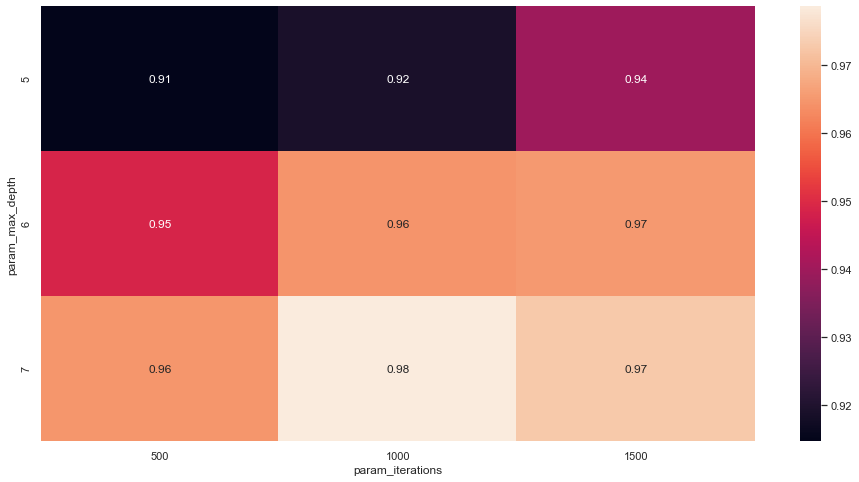

In [71]:
catboost_grid = [0]
param_grid_bag = {'max_depth': [5,6,7],'iterations':[500, 1000, 1500]}
bag=SubestimatorOfStacking(CatBoostClassifier(),param_grid_bag).fit(X_train,
                                                                   y_train,
                                                                   train)

In [28]:
cat = CatBoostClassifier(iterations=1000, max_depth = 7)
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)

Learning rate set to 0.074996
0:	learn: 0.6296234	total: 76.2ms	remaining: 1m 16s
1:	learn: 0.5845606	total: 90.1ms	remaining: 45s
2:	learn: 0.5481352	total: 103ms	remaining: 34.4s
3:	learn: 0.5163403	total: 117ms	remaining: 29.2s
4:	learn: 0.4905832	total: 132ms	remaining: 26.3s
5:	learn: 0.4747941	total: 146ms	remaining: 24.3s
6:	learn: 0.4511307	total: 250ms	remaining: 35.5s
7:	learn: 0.4386083	total: 276ms	remaining: 34.2s
8:	learn: 0.4284663	total: 293ms	remaining: 32.3s
9:	learn: 0.4133185	total: 306ms	remaining: 30.3s
10:	learn: 0.4036012	total: 322ms	remaining: 29s
11:	learn: 0.3953735	total: 337ms	remaining: 27.7s
12:	learn: 0.3797165	total: 352ms	remaining: 26.7s
13:	learn: 0.3707640	total: 367ms	remaining: 25.8s
14:	learn: 0.3665571	total: 382ms	remaining: 25.1s
15:	learn: 0.3628735	total: 397ms	remaining: 24.4s
16:	learn: 0.3535166	total: 412ms	remaining: 23.9s
17:	learn: 0.3494835	total: 428ms	remaining: 23.4s
18:	learn: 0.3422968	total: 444ms	remaining: 22.9s
19:	learn: 0

171:	learn: 0.0724233	total: 3.11s	remaining: 15s
172:	learn: 0.0720824	total: 3.13s	remaining: 15s
173:	learn: 0.0716596	total: 3.15s	remaining: 14.9s
174:	learn: 0.0713333	total: 3.16s	remaining: 14.9s
175:	learn: 0.0709580	total: 3.18s	remaining: 14.9s
176:	learn: 0.0705888	total: 3.2s	remaining: 14.9s
177:	learn: 0.0704719	total: 3.22s	remaining: 14.9s
178:	learn: 0.0697513	total: 3.24s	remaining: 14.9s
179:	learn: 0.0691418	total: 3.27s	remaining: 14.9s
180:	learn: 0.0690359	total: 3.29s	remaining: 14.9s
181:	learn: 0.0688681	total: 3.31s	remaining: 14.9s
182:	learn: 0.0684339	total: 3.33s	remaining: 14.9s
183:	learn: 0.0680265	total: 3.35s	remaining: 14.9s
184:	learn: 0.0677791	total: 3.37s	remaining: 14.9s
185:	learn: 0.0673188	total: 3.39s	remaining: 14.8s
186:	learn: 0.0670033	total: 3.4s	remaining: 14.8s
187:	learn: 0.0667080	total: 3.43s	remaining: 14.8s
188:	learn: 0.0664960	total: 3.44s	remaining: 14.8s
189:	learn: 0.0658268	total: 3.46s	remaining: 14.8s
190:	learn: 0.0654

341:	learn: 0.0320319	total: 6.31s	remaining: 12.1s
342:	learn: 0.0319627	total: 6.33s	remaining: 12.1s
343:	learn: 0.0319355	total: 6.34s	remaining: 12.1s
344:	learn: 0.0318026	total: 6.36s	remaining: 12.1s
345:	learn: 0.0316210	total: 6.38s	remaining: 12.1s
346:	learn: 0.0315266	total: 6.39s	remaining: 12s
347:	learn: 0.0313187	total: 6.41s	remaining: 12s
348:	learn: 0.0312493	total: 6.42s	remaining: 12s
349:	learn: 0.0311865	total: 6.43s	remaining: 12s
350:	learn: 0.0310245	total: 6.45s	remaining: 11.9s
351:	learn: 0.0309669	total: 6.47s	remaining: 11.9s
352:	learn: 0.0309465	total: 6.48s	remaining: 11.9s
353:	learn: 0.0308625	total: 6.5s	remaining: 11.9s
354:	learn: 0.0307196	total: 6.51s	remaining: 11.8s
355:	learn: 0.0305125	total: 6.52s	remaining: 11.8s
356:	learn: 0.0303697	total: 6.54s	remaining: 11.8s
357:	learn: 0.0303157	total: 6.55s	remaining: 11.8s
358:	learn: 0.0300406	total: 6.57s	remaining: 11.7s
359:	learn: 0.0298848	total: 6.58s	remaining: 11.7s
360:	learn: 0.0298621

508:	learn: 0.0165498	total: 9s	remaining: 8.69s
509:	learn: 0.0165026	total: 9.03s	remaining: 8.67s
510:	learn: 0.0164390	total: 9.04s	remaining: 8.65s
511:	learn: 0.0164148	total: 9.06s	remaining: 8.63s
512:	learn: 0.0163444	total: 9.08s	remaining: 8.62s
513:	learn: 0.0163121	total: 9.1s	remaining: 8.6s
514:	learn: 0.0162781	total: 9.11s	remaining: 8.58s
515:	learn: 0.0161929	total: 9.13s	remaining: 8.56s
516:	learn: 0.0161775	total: 9.14s	remaining: 8.54s
517:	learn: 0.0160842	total: 9.16s	remaining: 8.52s
518:	learn: 0.0160713	total: 9.17s	remaining: 8.5s
519:	learn: 0.0159483	total: 9.19s	remaining: 8.48s
520:	learn: 0.0158929	total: 9.2s	remaining: 8.46s
521:	learn: 0.0157981	total: 9.22s	remaining: 8.44s
522:	learn: 0.0157007	total: 9.24s	remaining: 8.43s
523:	learn: 0.0156928	total: 9.25s	remaining: 8.41s
524:	learn: 0.0156670	total: 9.27s	remaining: 8.38s
525:	learn: 0.0155920	total: 9.28s	remaining: 8.37s
526:	learn: 0.0155752	total: 9.3s	remaining: 8.35s
527:	learn: 0.015549

671:	learn: 0.0096025	total: 12.1s	remaining: 5.9s
672:	learn: 0.0095917	total: 12.1s	remaining: 5.88s
673:	learn: 0.0095468	total: 12.1s	remaining: 5.86s
674:	learn: 0.0095285	total: 12.1s	remaining: 5.85s
675:	learn: 0.0095112	total: 12.2s	remaining: 5.83s
676:	learn: 0.0094925	total: 12.2s	remaining: 5.81s
677:	learn: 0.0094381	total: 12.2s	remaining: 5.79s
678:	learn: 0.0093947	total: 12.2s	remaining: 5.78s
679:	learn: 0.0093723	total: 12.2s	remaining: 5.76s
680:	learn: 0.0093510	total: 12.3s	remaining: 5.74s
681:	learn: 0.0093062	total: 12.3s	remaining: 5.72s
682:	learn: 0.0092547	total: 12.3s	remaining: 5.71s
683:	learn: 0.0092115	total: 12.3s	remaining: 5.69s
684:	learn: 0.0091981	total: 12.3s	remaining: 5.67s
685:	learn: 0.0091642	total: 12.4s	remaining: 5.66s
686:	learn: 0.0091526	total: 12.4s	remaining: 5.63s
687:	learn: 0.0091393	total: 12.4s	remaining: 5.62s
688:	learn: 0.0090817	total: 12.4s	remaining: 5.6s
689:	learn: 0.0090623	total: 12.4s	remaining: 5.58s
690:	learn: 0.

831:	learn: 0.0063221	total: 14.8s	remaining: 2.98s
832:	learn: 0.0063221	total: 14.8s	remaining: 2.96s
833:	learn: 0.0063122	total: 14.8s	remaining: 2.94s
834:	learn: 0.0062776	total: 14.8s	remaining: 2.92s
835:	learn: 0.0062707	total: 14.8s	remaining: 2.91s
836:	learn: 0.0062652	total: 14.9s	remaining: 2.89s
837:	learn: 0.0062503	total: 14.9s	remaining: 2.88s
838:	learn: 0.0062388	total: 14.9s	remaining: 2.86s
839:	learn: 0.0062191	total: 14.9s	remaining: 2.84s
840:	learn: 0.0062191	total: 14.9s	remaining: 2.83s
841:	learn: 0.0062156	total: 15s	remaining: 2.81s
842:	learn: 0.0062022	total: 15s	remaining: 2.79s
843:	learn: 0.0061940	total: 15s	remaining: 2.77s
844:	learn: 0.0061907	total: 15s	remaining: 2.76s
845:	learn: 0.0061779	total: 15s	remaining: 2.74s
846:	learn: 0.0061633	total: 15.1s	remaining: 2.72s
847:	learn: 0.0061632	total: 15.1s	remaining: 2.7s
848:	learn: 0.0061479	total: 15.1s	remaining: 2.69s
849:	learn: 0.0061354	total: 15.1s	remaining: 2.67s
850:	learn: 0.0061163	t

997:	learn: 0.0054838	total: 17.7s	remaining: 35.4ms
998:	learn: 0.0054838	total: 17.7s	remaining: 17.7ms
999:	learn: 0.0054837	total: 17.7s	remaining: 0us


In [29]:
#set iterations of 1000 and max_depth of 7 tends to have best performance
# let's check for the performance metrics
print(f"Accuracy Score of Cat Boost Classifier is : {accuracy}")
print(f"Classification port : \n{clf_report}")

Accuracy Score of Cat Boost Classifier is : 0.9988608188702004
Classification port : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9395
           1       1.00      1.00      1.00      5528

    accuracy                           1.00     14923
   macro avg       1.00      1.00      1.00     14923
weighted avg       1.00      1.00      1.00     14923



In [30]:
confusion_matrix(y_pred, y_test)

array([[9393,   15],
       [   2, 5513]])